In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [7]:
from exp_config import data_conf

## Prepare train, validation and test data

In [8]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:01, 667.39it/s]
100%|██████████| 700/700 [00:07<00:00, 98.23it/s] 
8280it [00:00, 229483.18it/s]
7920it [00:00, 227909.08it/s]
720it [00:00, 779.52it/s]
100%|██████████| 720/720 [00:07<00:00, 93.61it/s] 
8280it [00:00, 233993.43it/s]
720it [00:00, 785.74it/s]
100%|██████████| 720/720 [00:07<00:00, 93.27it/s] 
8280it [00:00, 233782.36it/s]
700it [00:00, 746.30it/s]
100%|██████████| 700/700 [00:07<00:00, 98.87it/s] 
8280it [00:00, 223901.01it/s]
509it [00:00, 1101.51it/s]
100%|██████████| 509/509 [00:02<00:00, 189.70it/s]
3664it [00:00, 225836.23it/s]
700it [00:00, 805.41it/s]
100%|██████████| 700/700 [00:07<00:00, 98.86it/s] 
8280it [00:00, 236043.45it/s]
700it [00:00, 817.84it/s]
100%|██████████| 700/700 [00:07<00:00, 98.61it/s] 
8280it [00:00, 75436.96it/s]
710it [00:01, 374.54it/s]
100%|██████████| 710/710 [00:07<00:00, 96.69it/s] 
8280it [00:00, 226002.09it/s]
710it [00:01, 376.53it/s]
100%|██████████| 710/710 [00:07<00:00, 96.42it/s] 
8280it [00:00, 225856.58it/s]
710it [

In [9]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [10]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [11]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [12]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [14]:
device = 'cuda:0'

In [15]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [26]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.13078


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.035683
Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.024708


100%|██████████| 248/248 [00:18<00:00, 13.49it/s]


Mean val loss: 0.025508


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.020859


100%|██████████| 248/248 [00:18<00:00, 13.49it/s]


Mean val loss: 0.024344


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018604


100%|██████████| 248/248 [00:18<00:00, 13.50it/s]


Mean val loss: 0.022556


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017846


100%|██████████| 248/248 [00:18<00:00, 13.48it/s]


Mean val loss: 0.020951


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017304


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039151
EarlyStopping counter: 1 out of 15
Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017093


100%|██████████| 248/248 [00:18<00:00, 13.46it/s]


Mean val loss: 0.020409


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016644


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.020517
EarlyStopping counter: 1 out of 15
Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016289


100%|██████████| 248/248 [00:18<00:00, 13.47it/s]


Mean val loss: 0.01999


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016069


100%|██████████| 248/248 [00:18<00:00, 13.45it/s]


Mean val loss: 0.019166


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016034


100%|██████████| 248/248 [00:18<00:00, 13.46it/s]


Mean val loss: 0.019012


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015835


100%|██████████| 248/248 [00:18<00:00, 13.48it/s]


Mean val loss: 0.018913


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015715


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018928
EarlyStopping counter: 1 out of 15
Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015536


100%|██████████| 248/248 [00:18<00:00, 13.48it/s]


Mean val loss: 0.01864


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015415


100%|██████████| 248/248 [00:18<00:00, 13.47it/s]


Mean val loss: 0.018635


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015452


100%|██████████| 248/248 [00:18<00:00, 13.47it/s]


Mean val loss: 0.018494


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015286


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.021013
EarlyStopping counter: 1 out of 15
Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015159


100%|██████████| 248/248 [00:18<00:00, 13.48it/s]


Mean val loss: 0.018316


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015112


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018562
EarlyStopping counter: 1 out of 15
Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.015028


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.020055
EarlyStopping counter: 2 out of 15
Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.014998


100%|██████████| 248/248 [00:18<00:00, 13.45it/s]


Mean val loss: 0.01809


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.014918


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.020567
EarlyStopping counter: 1 out of 15
Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0148


100%|██████████| 248/248 [00:18<00:00, 13.46it/s]


Mean val loss: 0.017963


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.014684


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018283
EarlyStopping counter: 1 out of 15
Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.014542


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018032
EarlyStopping counter: 2 out of 15
Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.014325


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018646
EarlyStopping counter: 3 out of 15
Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.01409


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018229
EarlyStopping counter: 4 out of 15
Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.013931


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018451
EarlyStopping counter: 5 out of 15
Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.013307


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.019062
EarlyStopping counter: 6 out of 15
Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.012869


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018975
EarlyStopping counter: 7 out of 15
Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.012166


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.019381
EarlyStopping counter: 8 out of 15
Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.011557


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.01984
EarlyStopping counter: 9 out of 15
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.010844


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.020384
EarlyStopping counter: 10 out of 15
Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.010206


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.021282
EarlyStopping counter: 11 out of 15
Epoch 34...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0094971


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.021767
EarlyStopping counter: 12 out of 15
Epoch 35...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.008928


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022685
EarlyStopping counter: 13 out of 15
Epoch 36...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0084549


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022636
EarlyStopping counter: 14 out of 15
Epoch 37...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0077151


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022966
EarlyStopping counter: 15 out of 15


100%|██████████| 259/259 [03:15<00:00,  1.32it/s]


## Dump experiment results

In [16]:
import pickle
import json

In [27]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [17]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [28]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [29]:
from itertools import chain

In [30]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [31]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

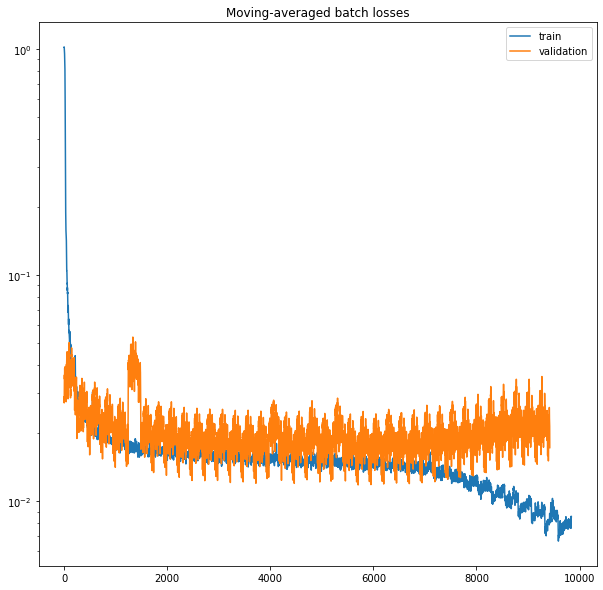

In [32]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [33]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

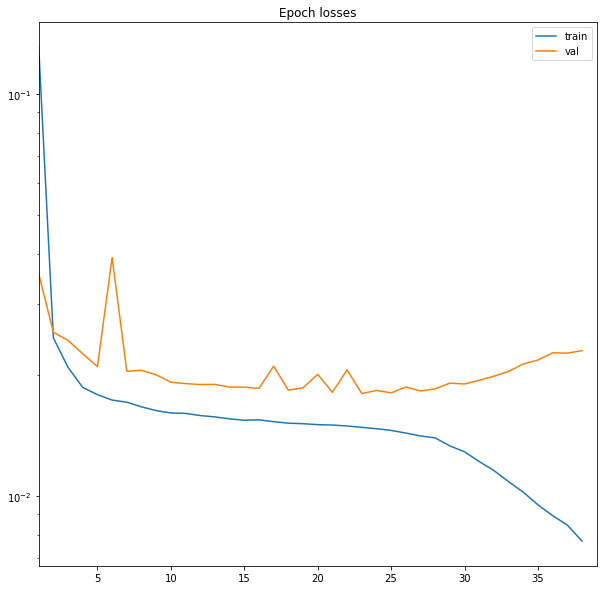

In [34]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [35]:
import os

In [36]:
import torch

In [37]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [38]:
threshold = 0.5
to_plot = 10

Prediction for carb96558:


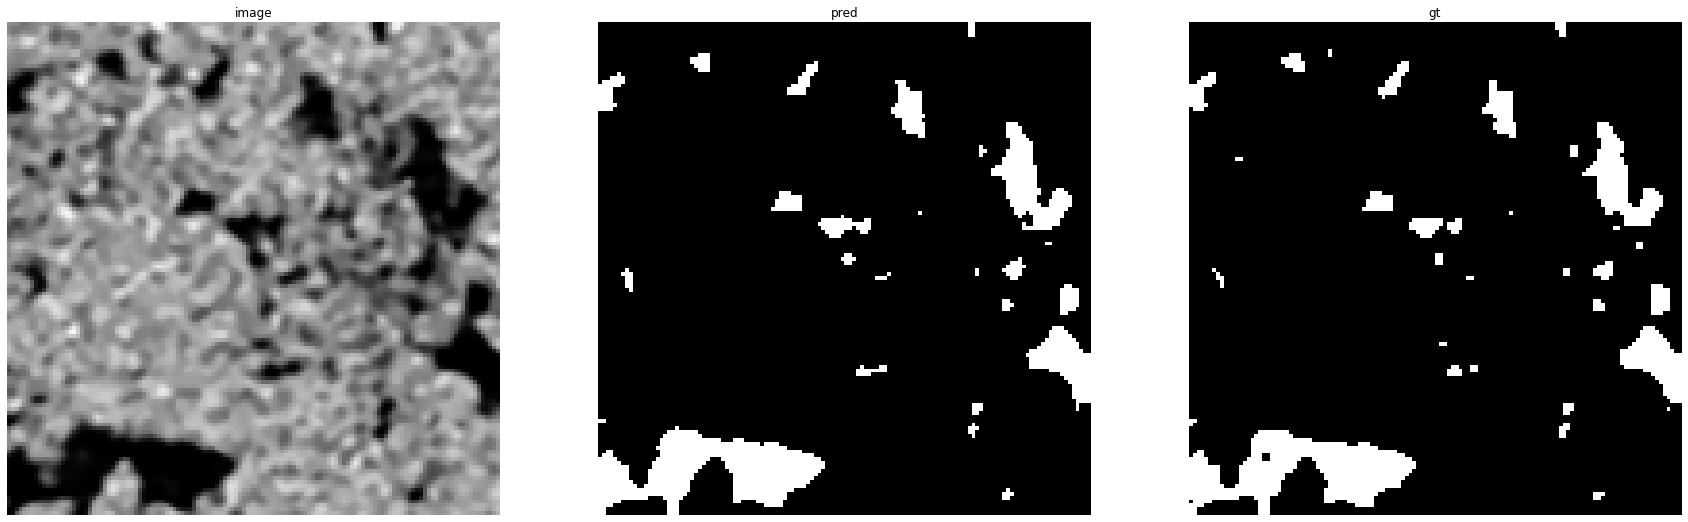

accuracy    : 0.99334716796875
precision   : 0.9531772575250836
recall      : 0.9733606557377049
f1          : 0.9631632308212233
pr_auc      : 0.9963304275304847
iou         : 0.9289439374185137


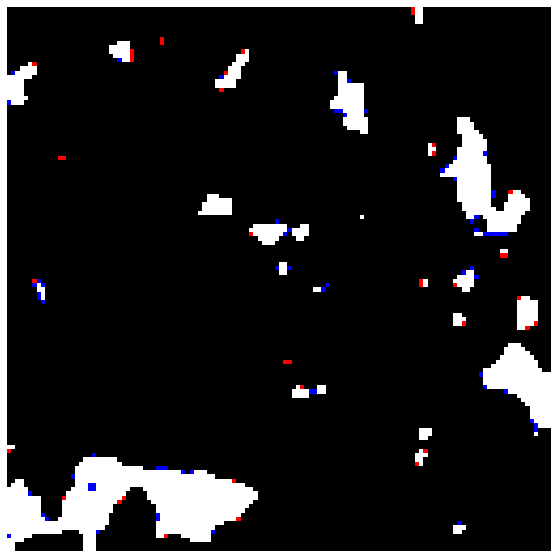

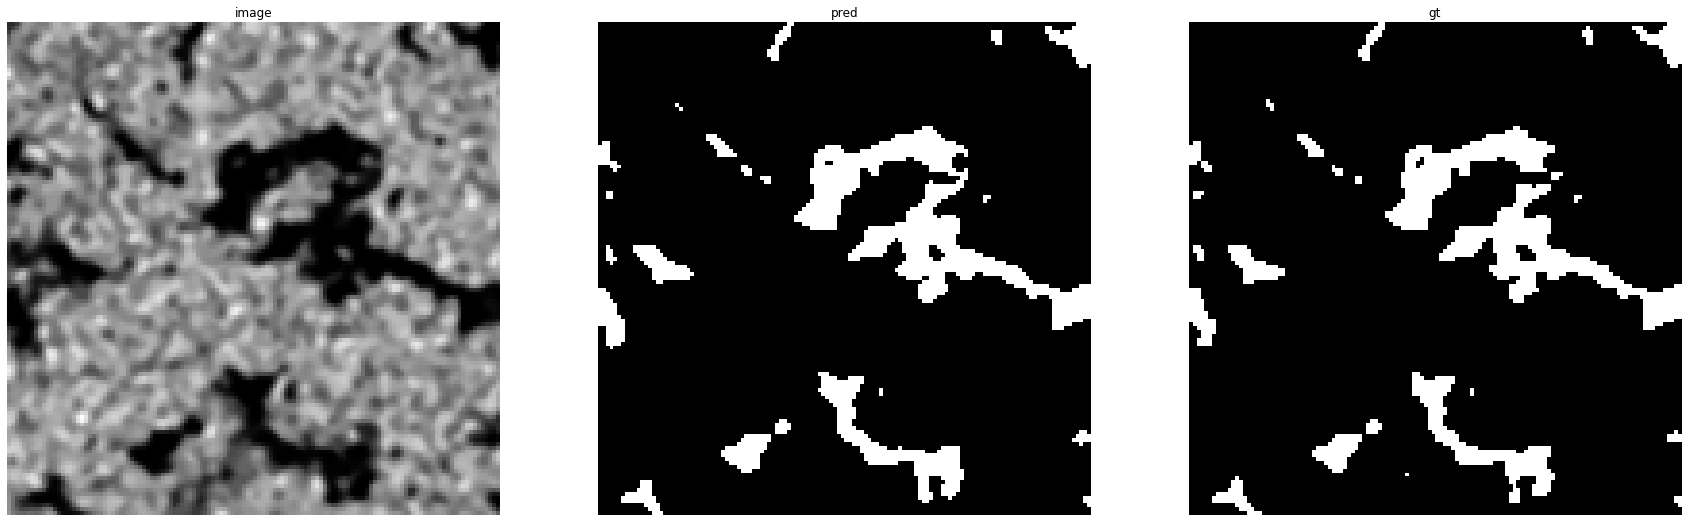

accuracy    : 0.9915771484375
precision   : 0.9436392914653784
recall      : 0.981574539363484
f1          : 0.9622331691297208
pr_auc      : 0.9962258326714566
iou         : 0.9272151898734177


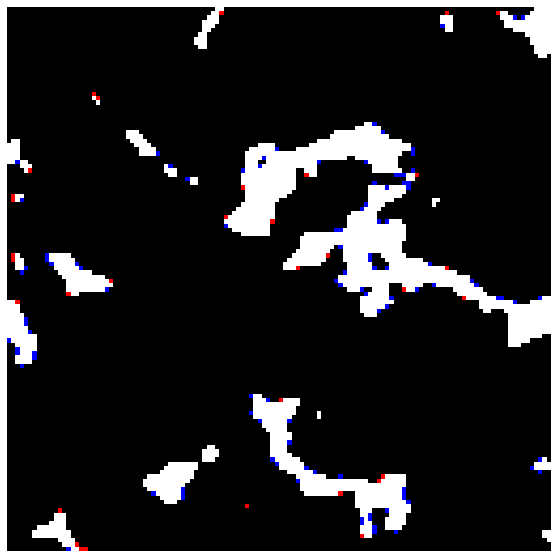

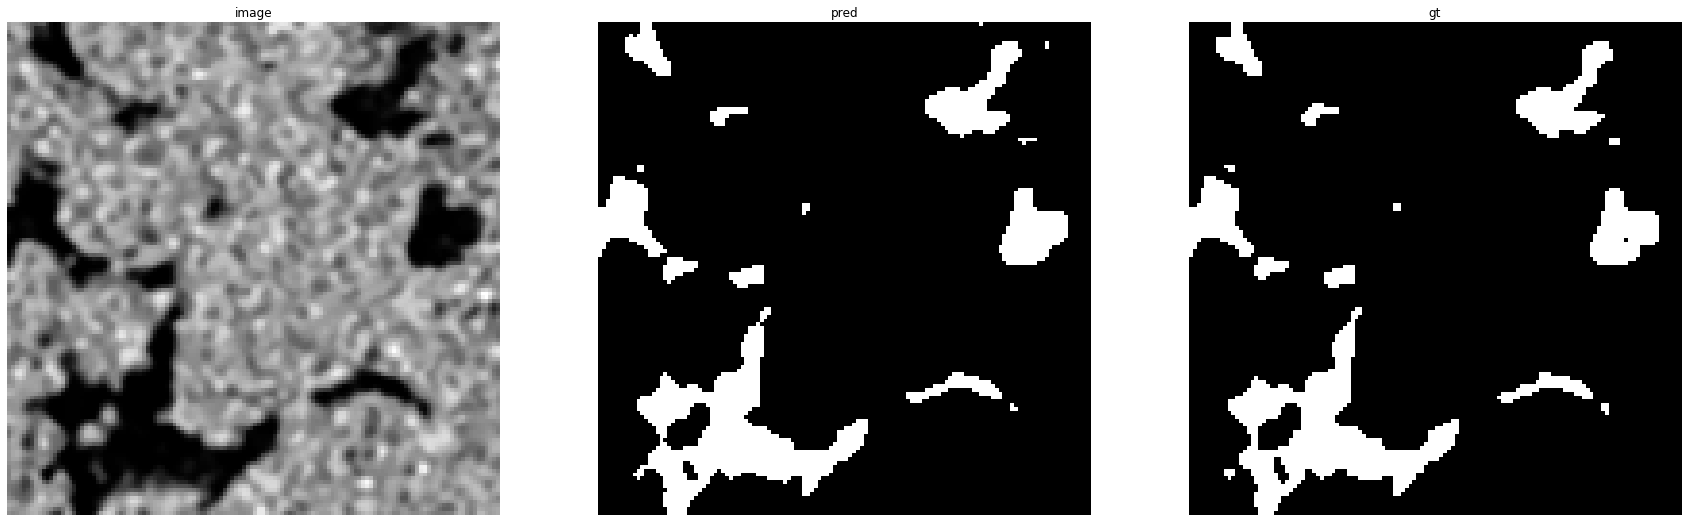

accuracy    : 0.9945068359375
precision   : 0.9677098857426726
recall      : 0.9873289406994424
f1          : 0.9774209734069241
pr_auc      : 0.998647829902178
iou         : 0.9558390578999019


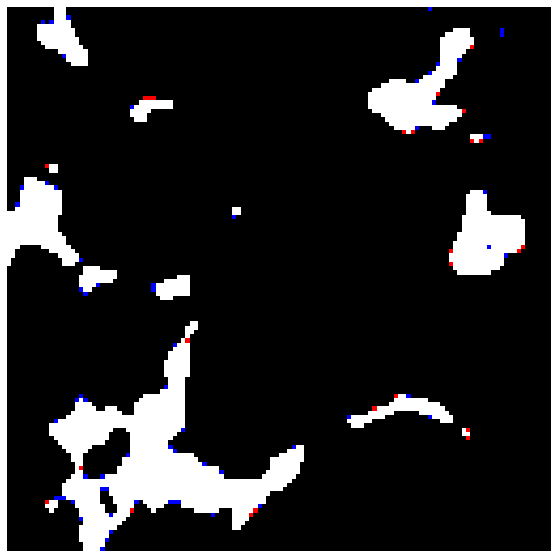

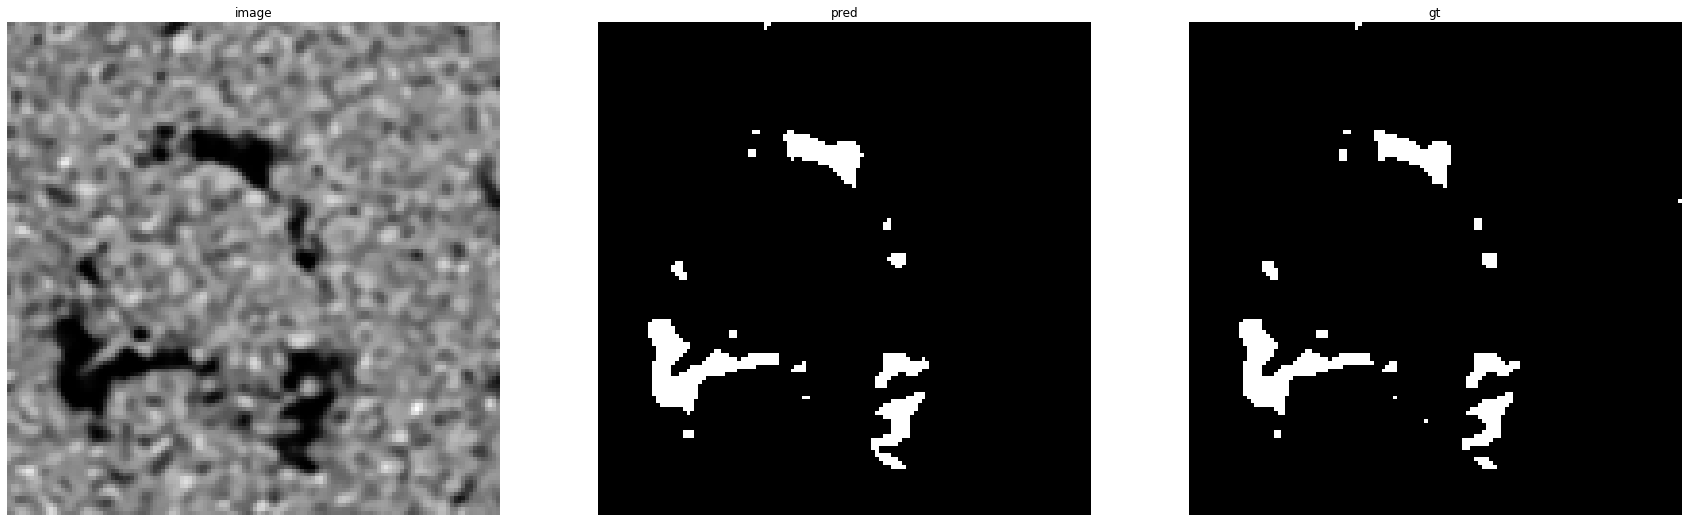

accuracy    : 0.99664306640625
precision   : 0.9428152492668622
recall      : 0.9757207890743551
f1          : 0.958985831469053
pr_auc      : 0.9962487085398477
iou         : 0.9212034383954155


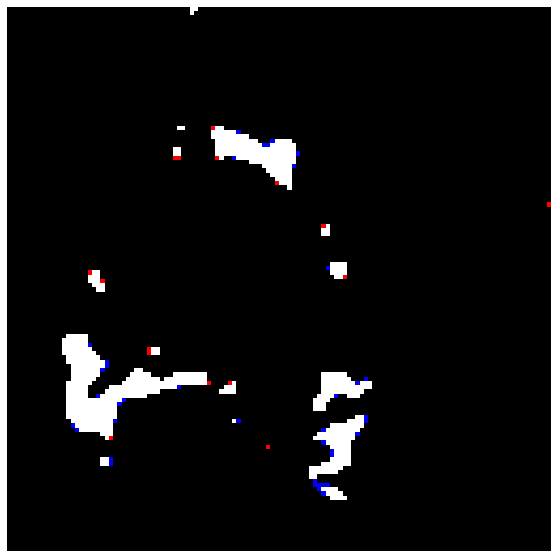

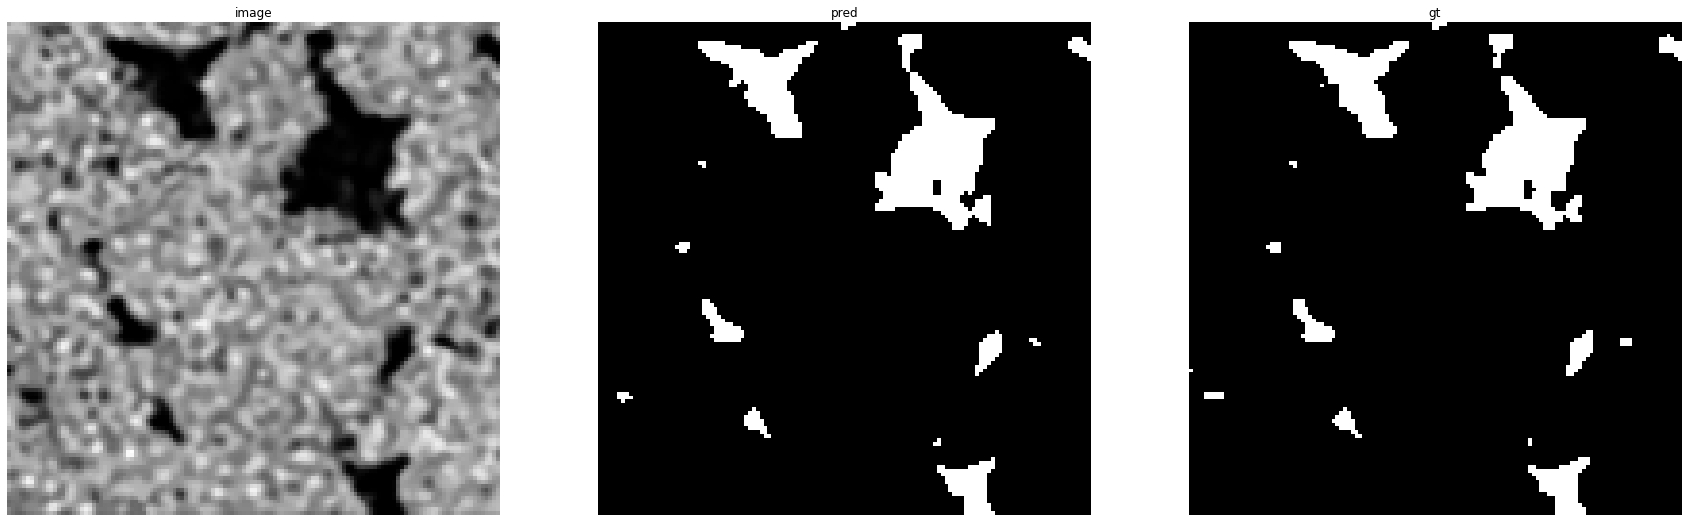

accuracy    : 0.99530029296875
precision   : 0.967016491754123
recall      : 0.9750566893424036
f1          : 0.9710199473089952
pr_auc      : 0.9972281864400241
iou         : 0.9436722750548646


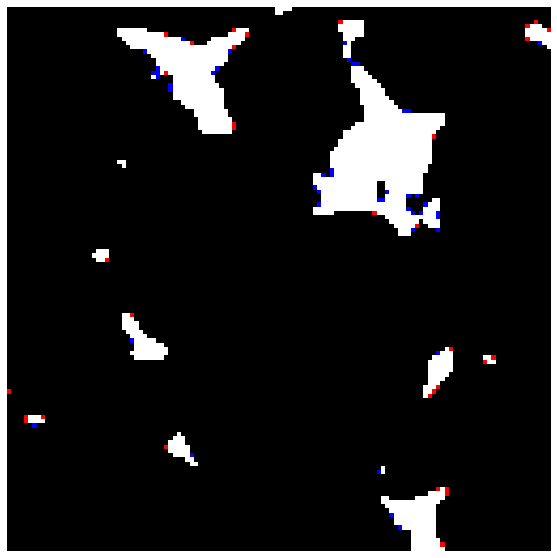

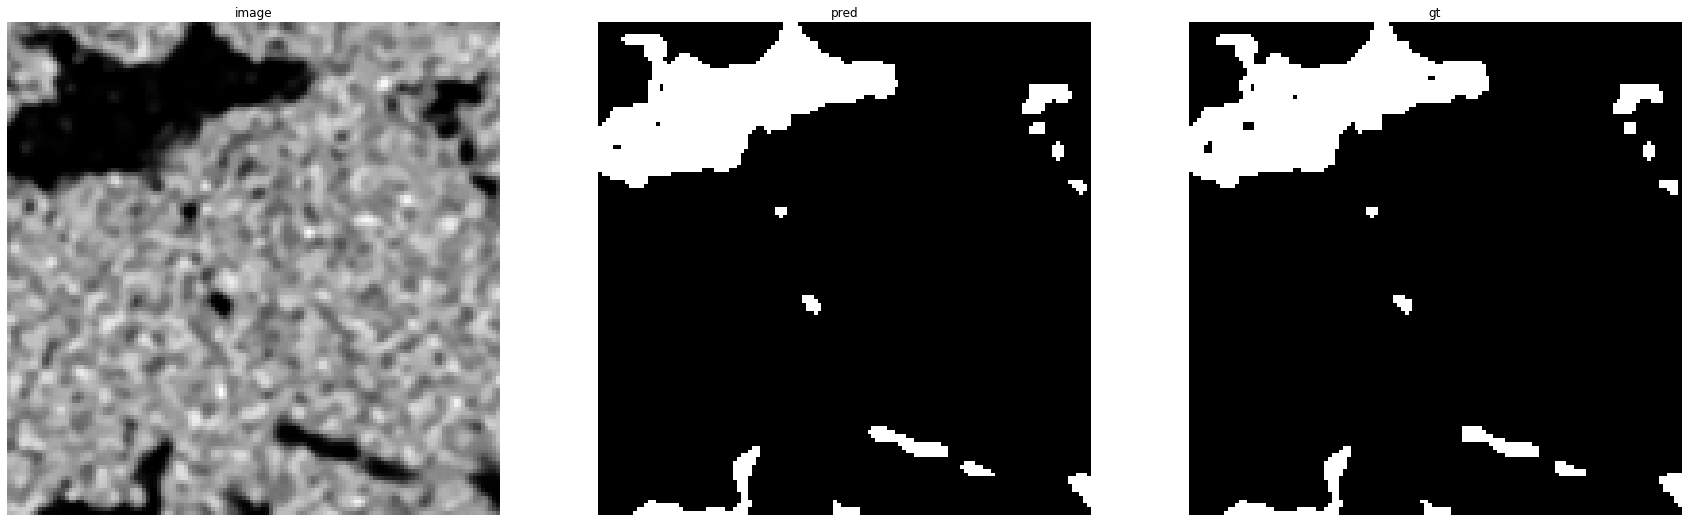

accuracy    : 0.9964599609375
precision   : 0.9826216484607746
recall      : 0.9885114885114885
f1          : 0.9855577689243028
pr_auc      : 0.9991921676224954
iou         : 0.9715267550319097


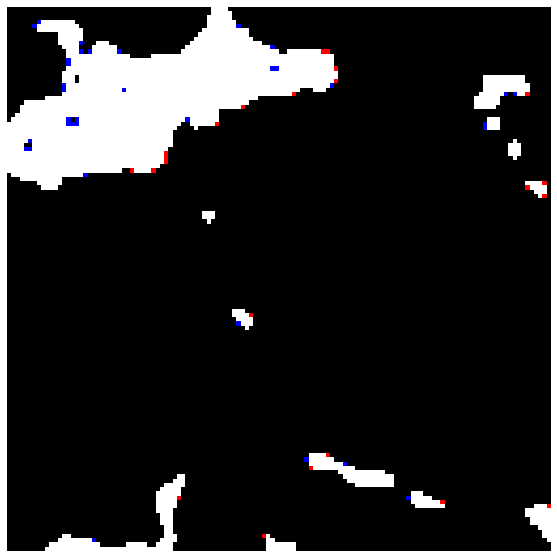

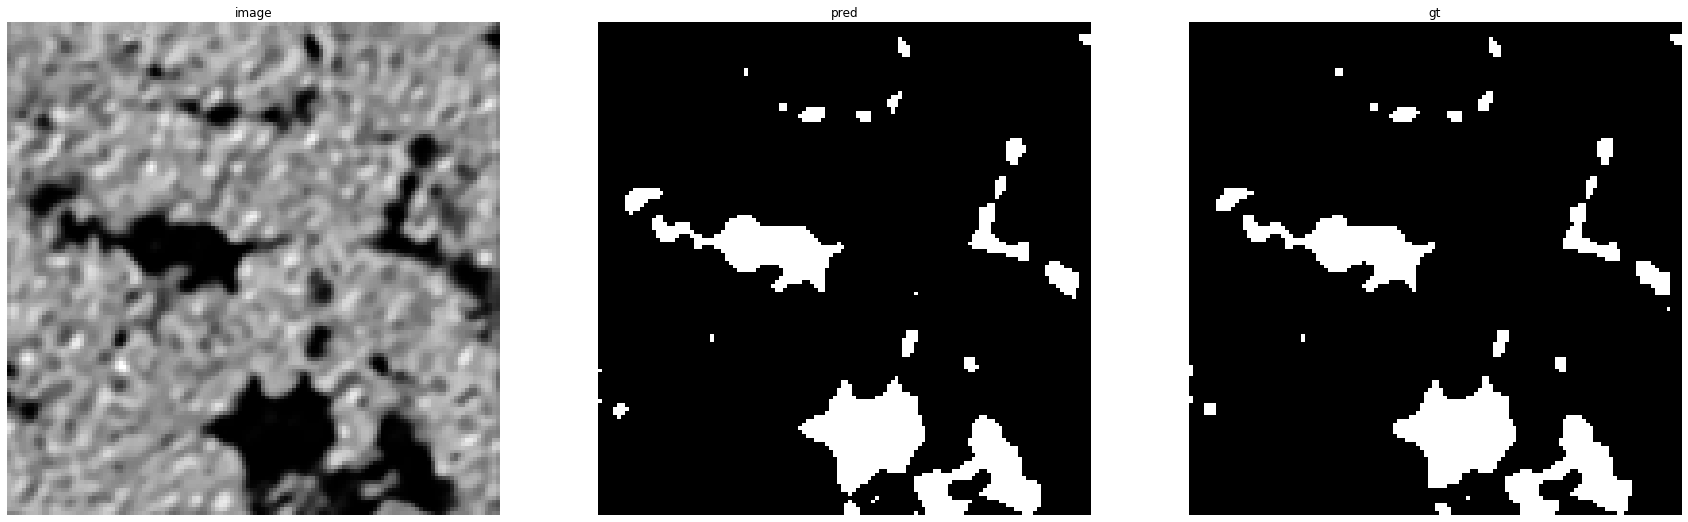

accuracy    : 0.99420166015625
precision   : 0.961405529953917
recall      : 0.9835002946375958
f1          : 0.9723274104281969
pr_auc      : 0.998232631188862
iou         : 0.9461451247165533


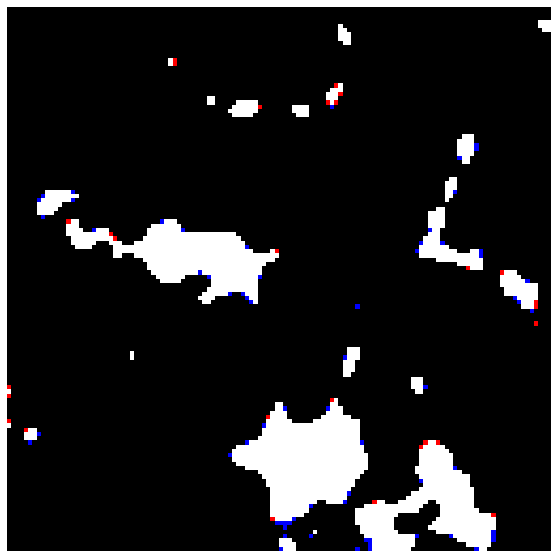

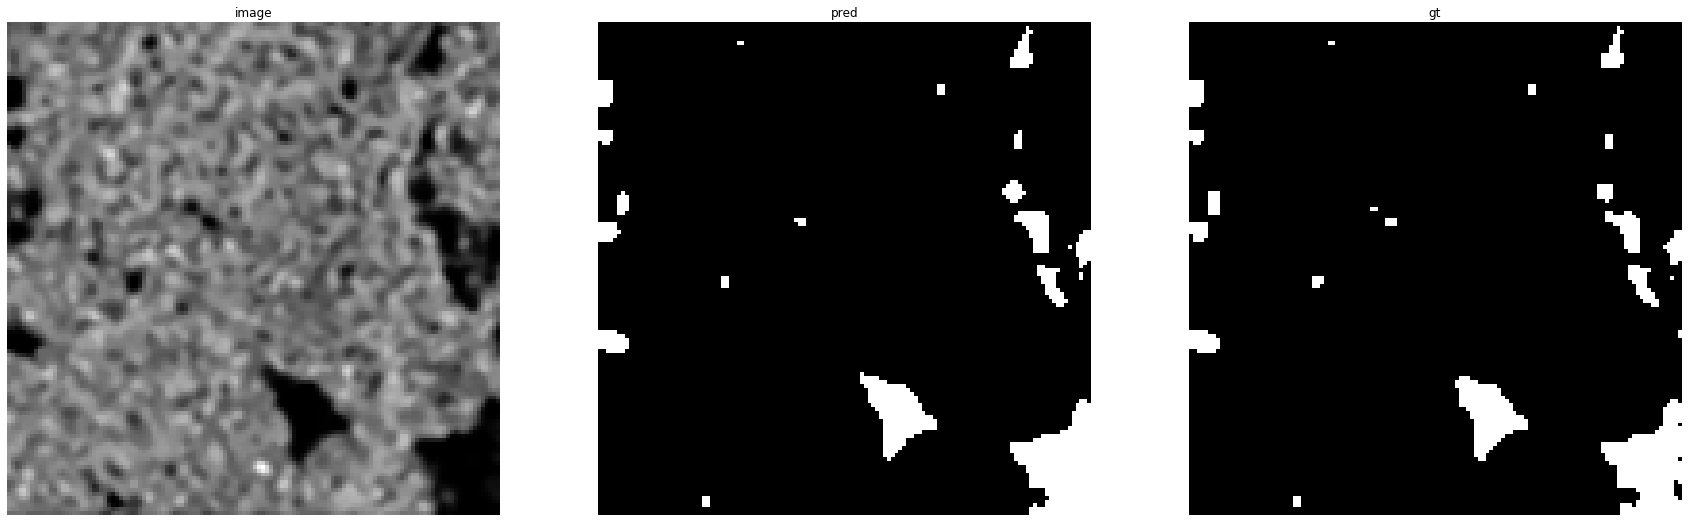

accuracy    : 0.99566650390625
precision   : 0.9526813880126183
recall      : 0.9721030042918455
f1          : 0.9622942113648433
pr_auc      : 0.9961953059570634
iou         : 0.9273285568065507


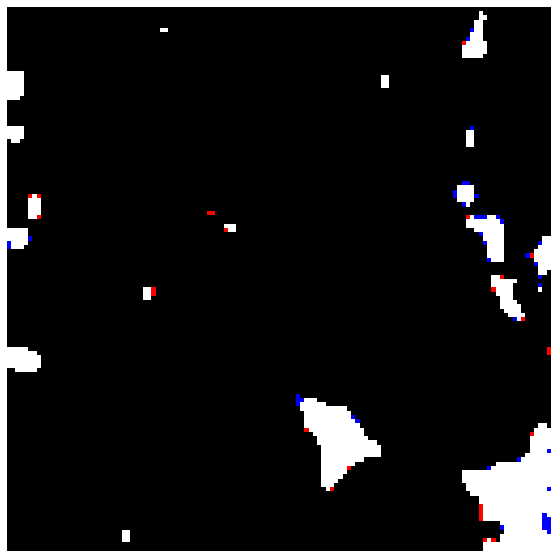

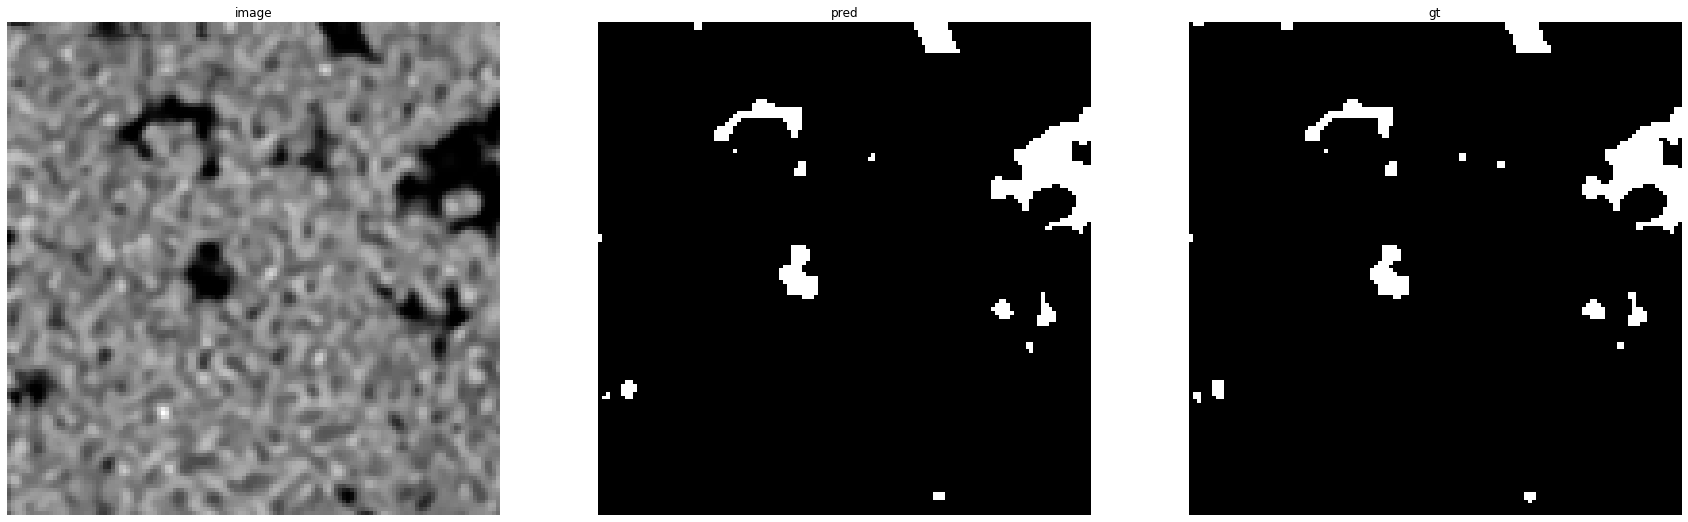

accuracy    : 0.99688720703125
precision   : 0.9657534246575342
recall      : 0.9644322845417237
f1          : 0.9650924024640658
pr_auc      : 0.9958181361472713
iou         : 0.9325396825396826


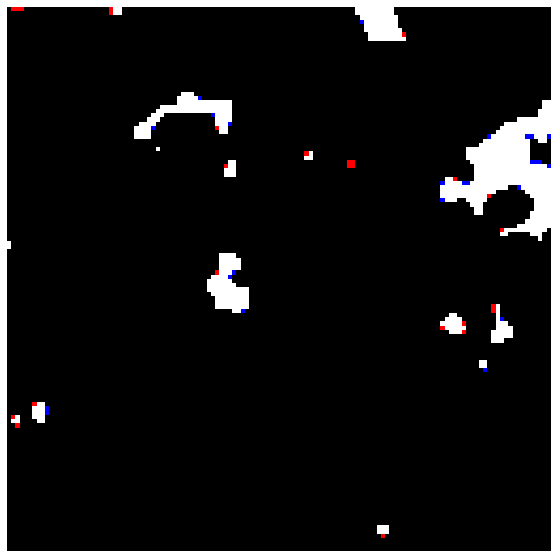

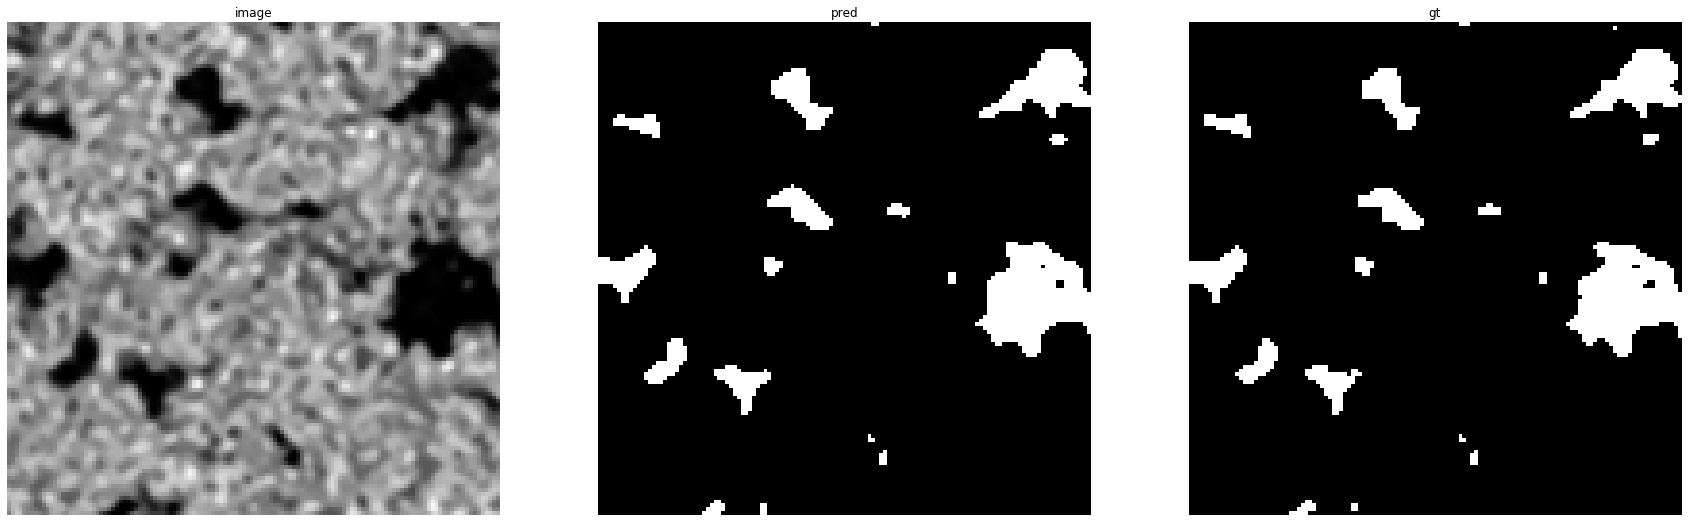

accuracy    : 0.99530029296875
precision   : 0.9649859943977591
recall      : 0.9807829181494662
f1          : 0.9728203318037416
pr_auc      : 0.9978226832013901
iou         : 0.9470790378006873


Prediction for carb71:


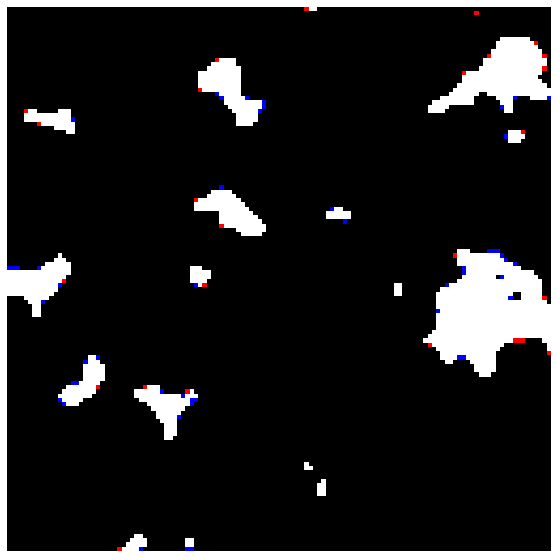

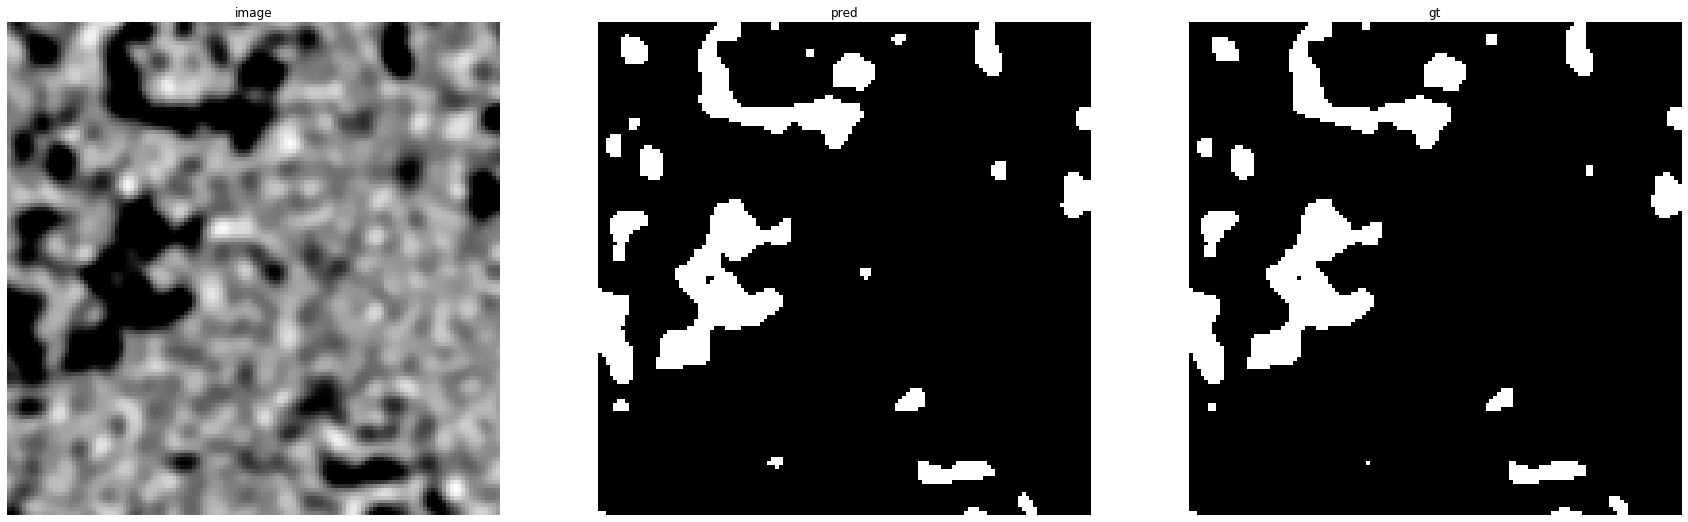

accuracy    : 0.99139404296875
precision   : 0.939873417721519
recall      : 0.9850746268656716
f1          : 0.9619433198380568
pr_auc      : 0.9942720884188531
iou         : 0.9266770670826833


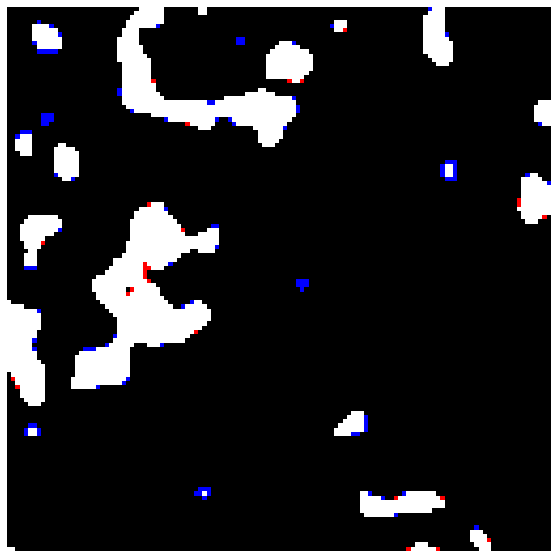

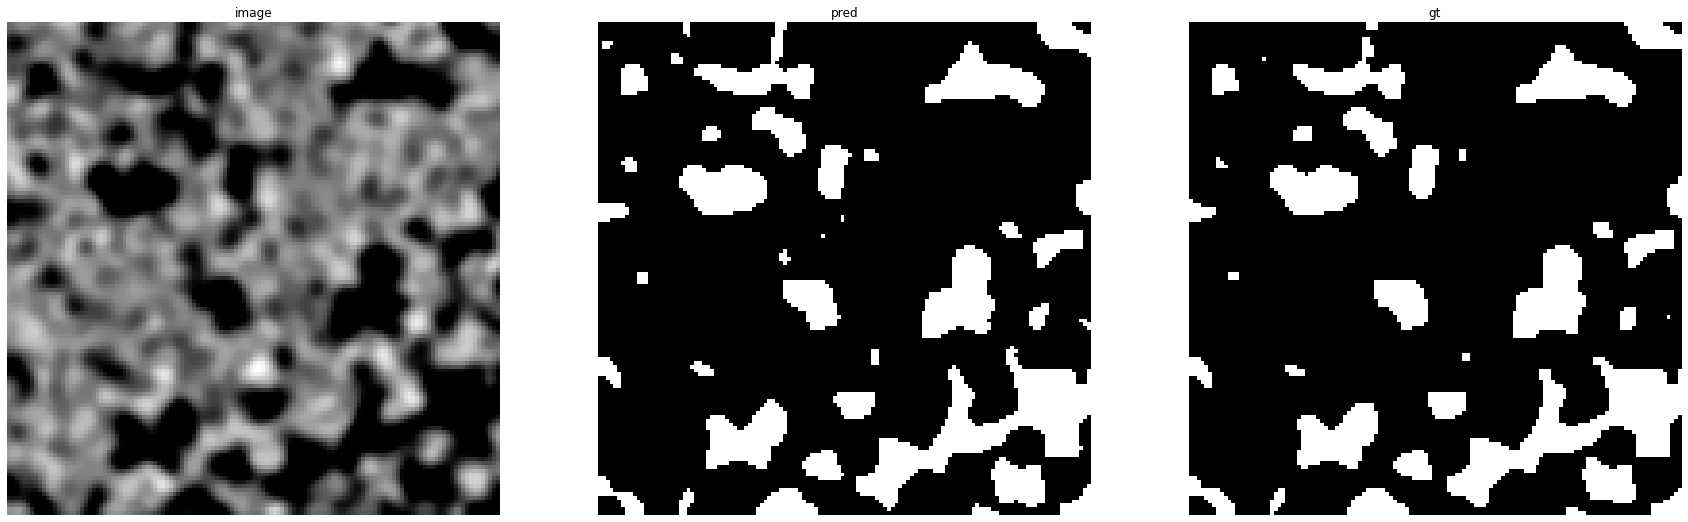

accuracy    : 0.98675537109375
precision   : 0.950337216431637
recall      : 0.9825673534072901
f1          : 0.9661835748792271
pr_auc      : 0.9959840301956111
iou         : 0.9345794392523364


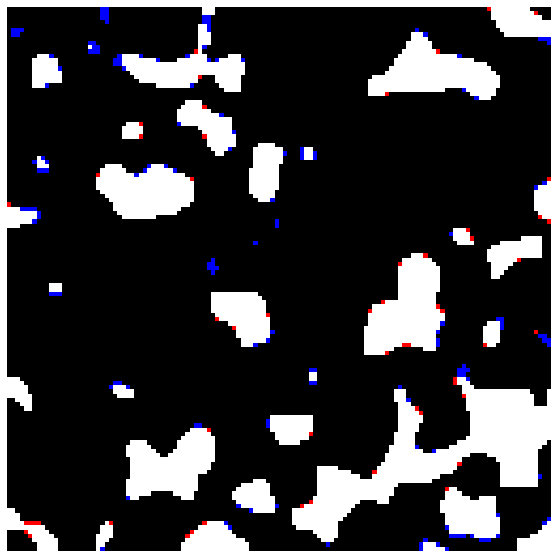

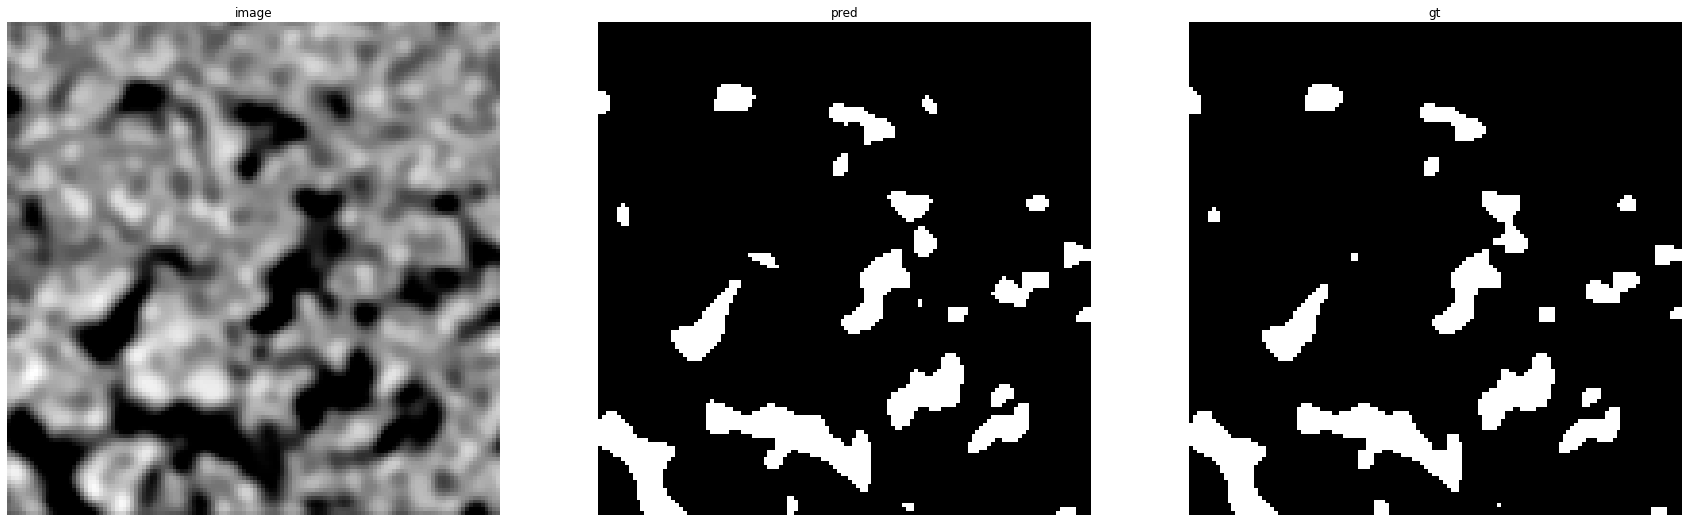

accuracy    : 0.98883056640625
precision   : 0.9270888770622672
recall      : 0.9742729306487695
f1          : 0.9500954458685573
pr_auc      : 0.9886680803491527
iou         : 0.9049350649350649


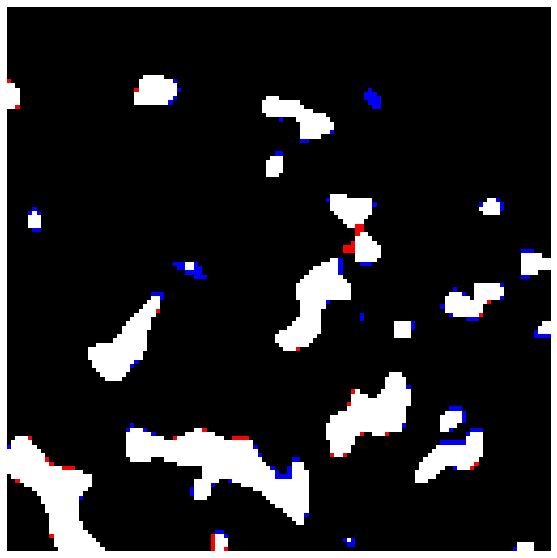

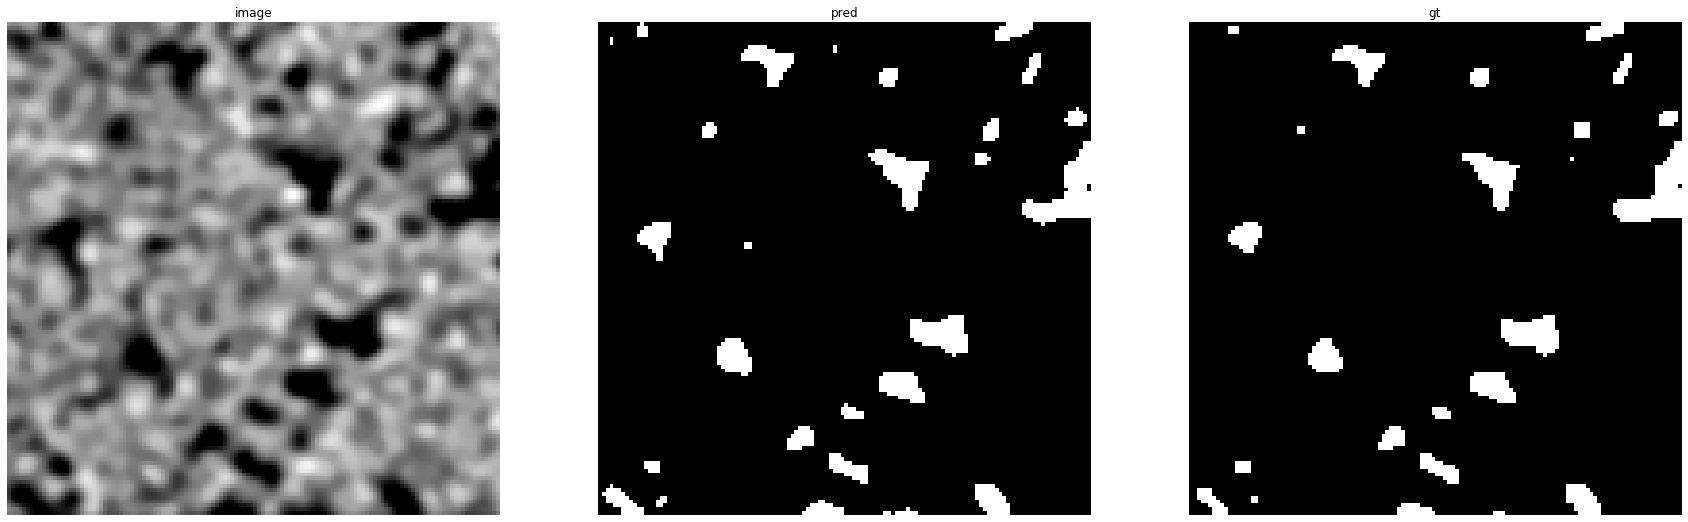

accuracy    : 0.99237060546875
precision   : 0.9018691588785047
recall      : 0.9796954314720813
f1          : 0.9391727493917276
pr_auc      : 0.9888987662937118
iou         : 0.8853211009174312


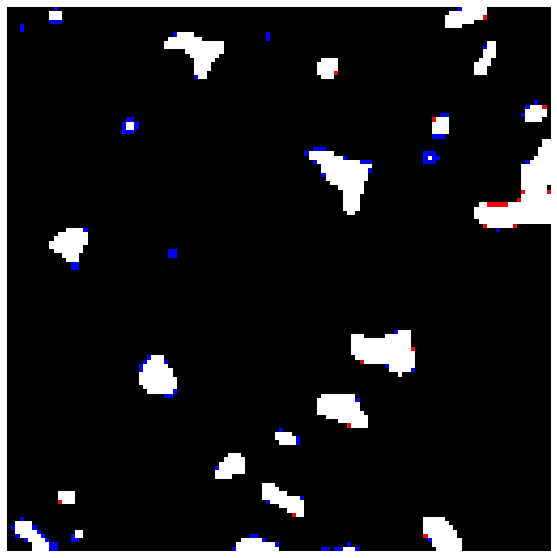

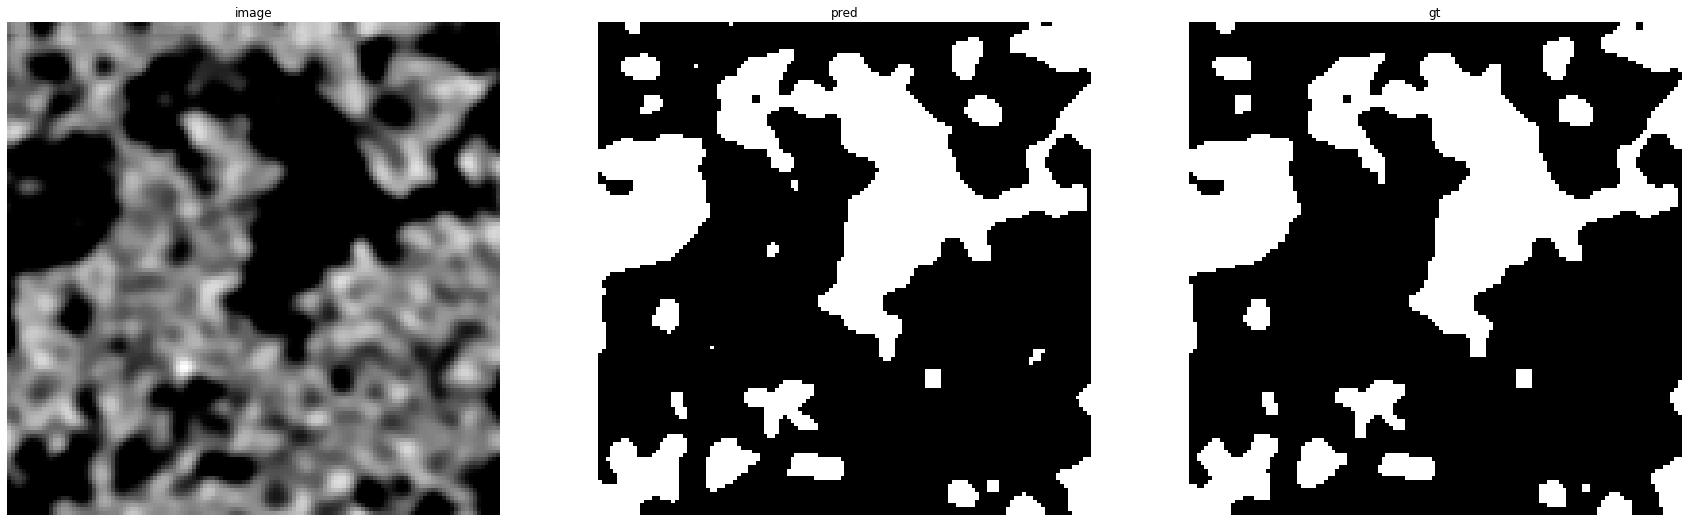

accuracy    : 0.98809814453125
precision   : 0.9698399671727533
recall      : 0.9899476439790575
f1          : 0.979790651881024
pr_auc      : 0.998364221508389
iou         : 0.9603819585534336


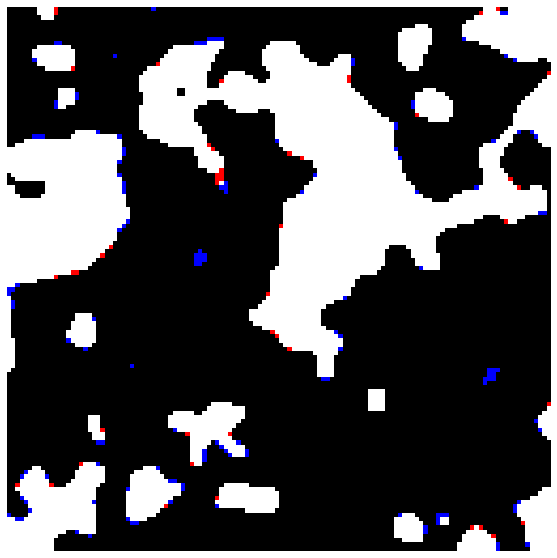

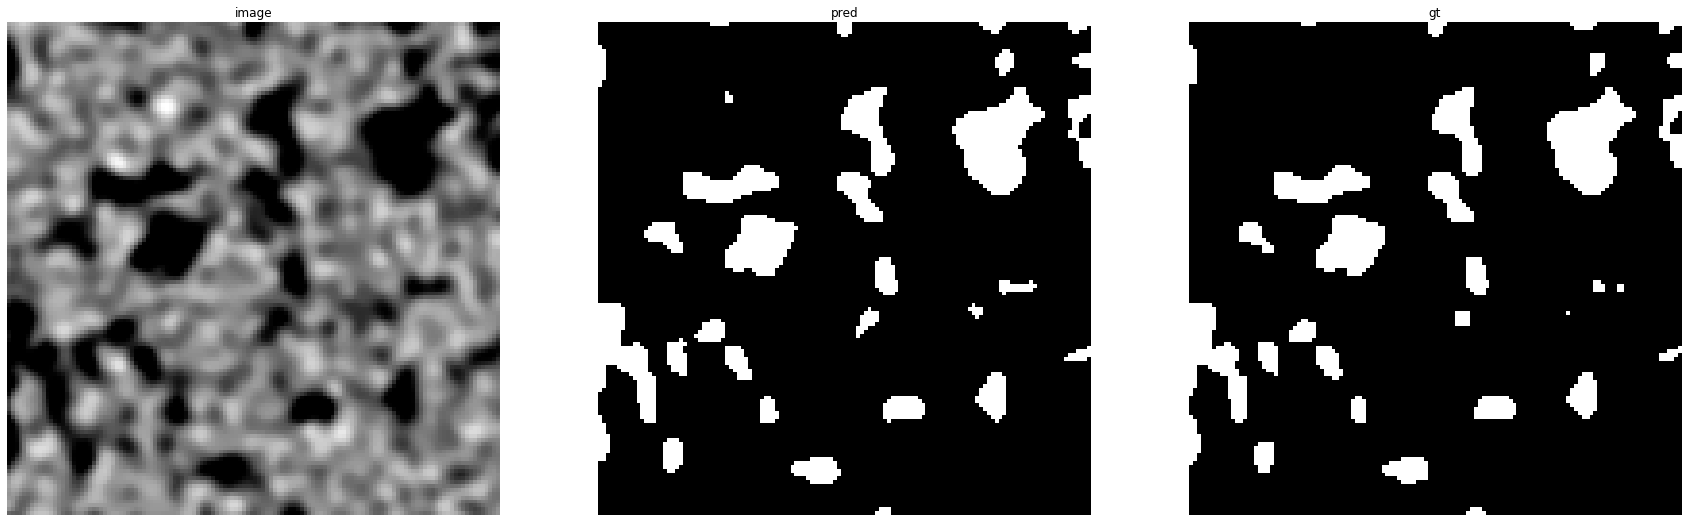

accuracy    : 0.9906005859375
precision   : 0.9361167002012073
recall      : 0.9856991525423728
f1          : 0.9602683178534571
pr_auc      : 0.9947425486452426
iou         : 0.9235732009925558


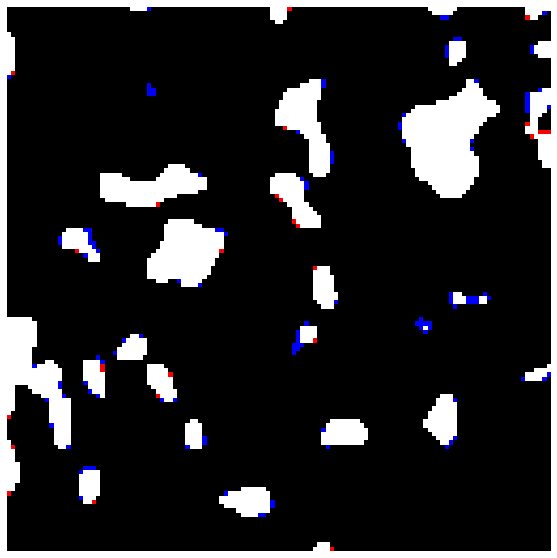

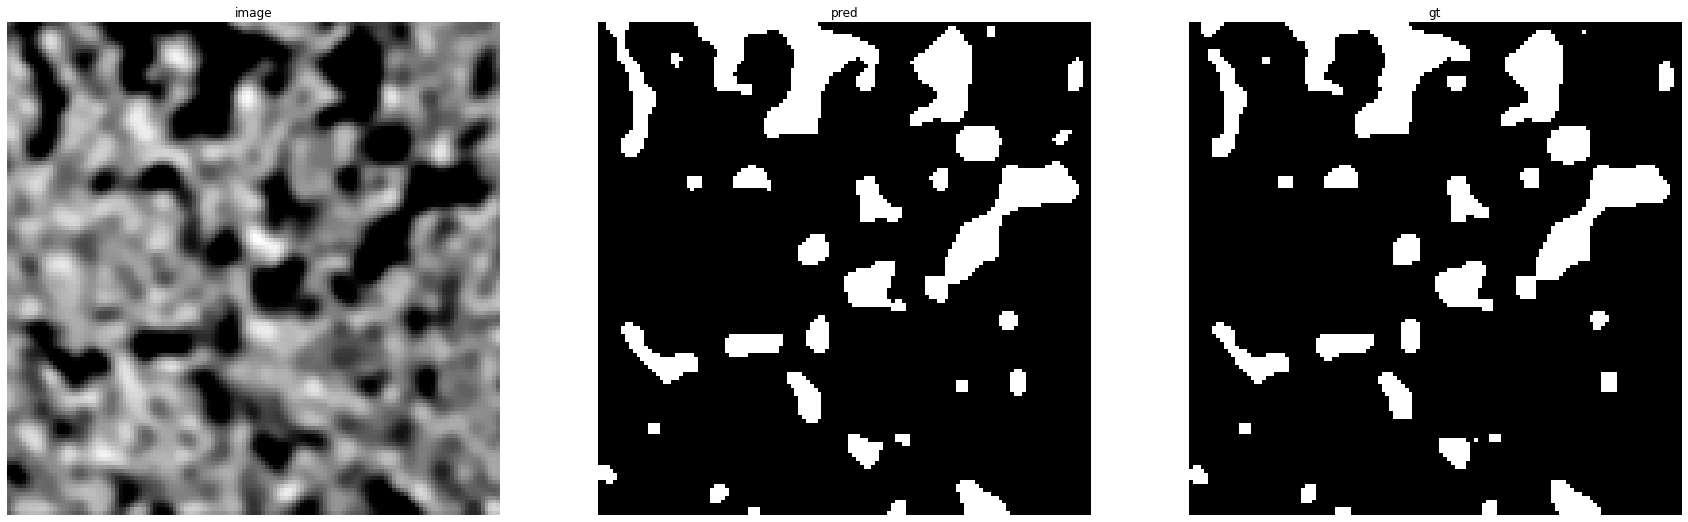

accuracy    : 0.98797607421875
precision   : 0.9399764613573951
recall      : 0.9819672131147541
f1          : 0.9605131288835439
pr_auc      : 0.9923508265333449
iou         : 0.9240262244504435


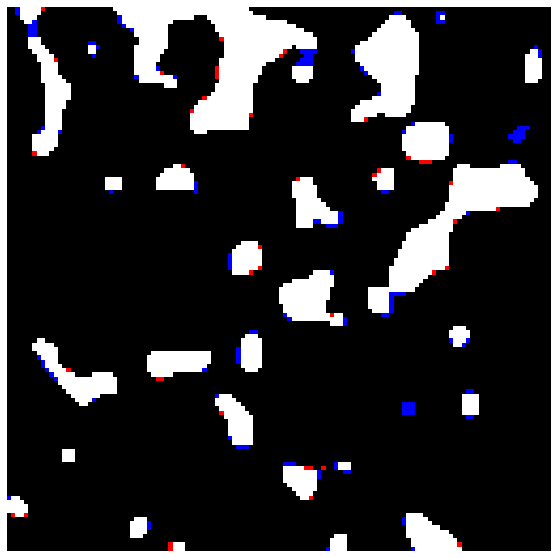

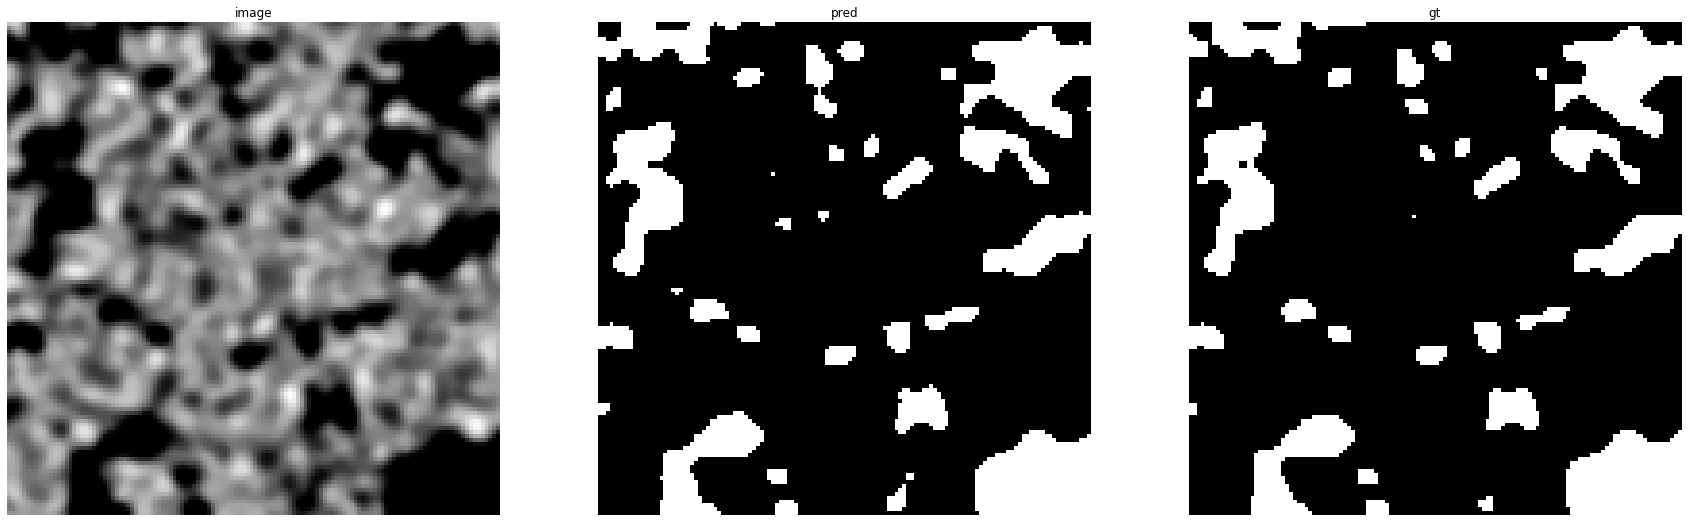

accuracy    : 0.98736572265625
precision   : 0.9496291718170581
recall      : 0.9858838626884825
f1          : 0.9674169683614041
pr_auc      : 0.9964849607882924
iou         : 0.936890243902439


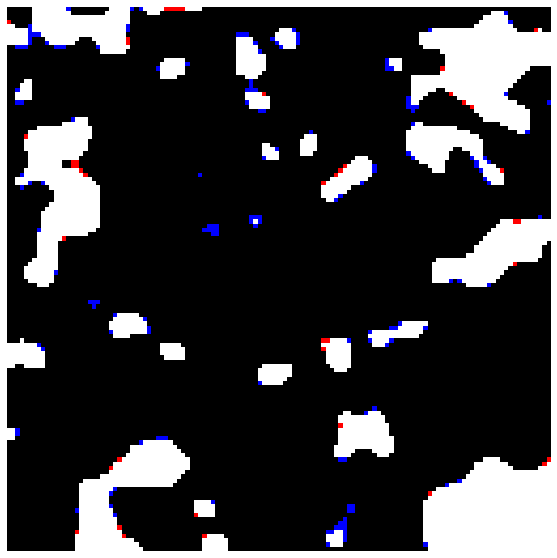

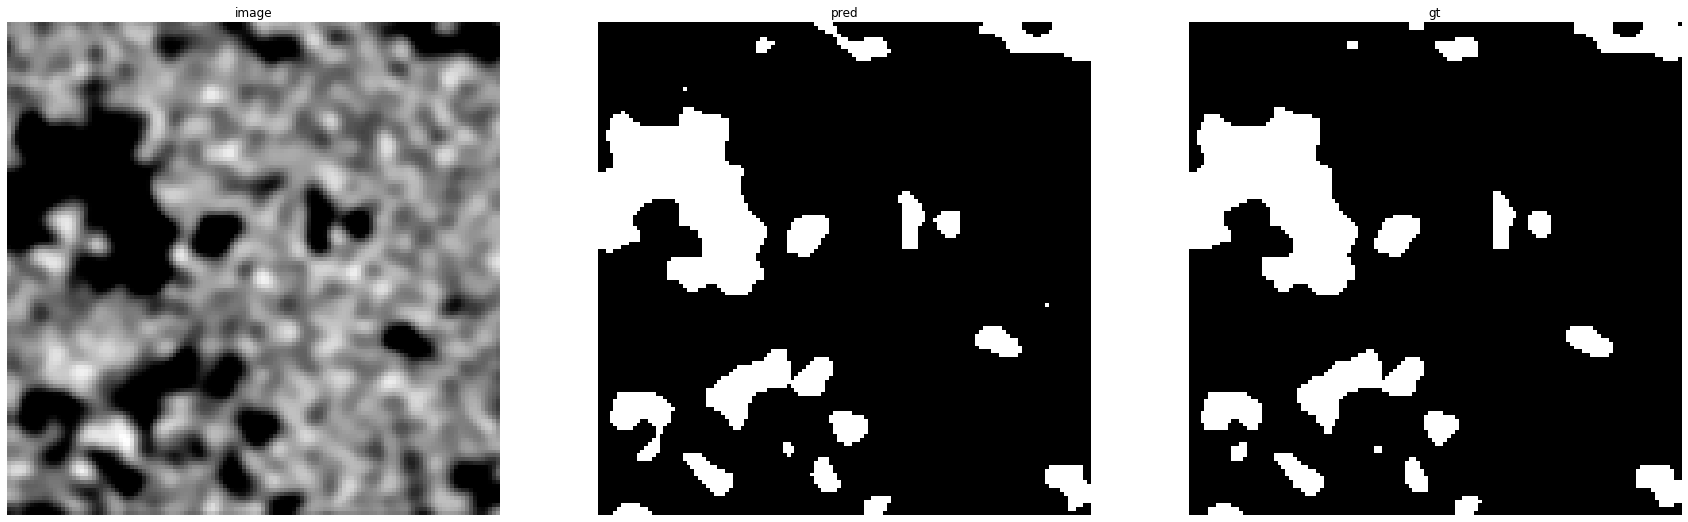

accuracy    : 0.9913330078125
precision   : 0.9604713036868111
recall      : 0.9851851851851852
f1          : 0.972671285604311
pr_auc      : 0.9976997225599713
iou         : 0.9467965530161109


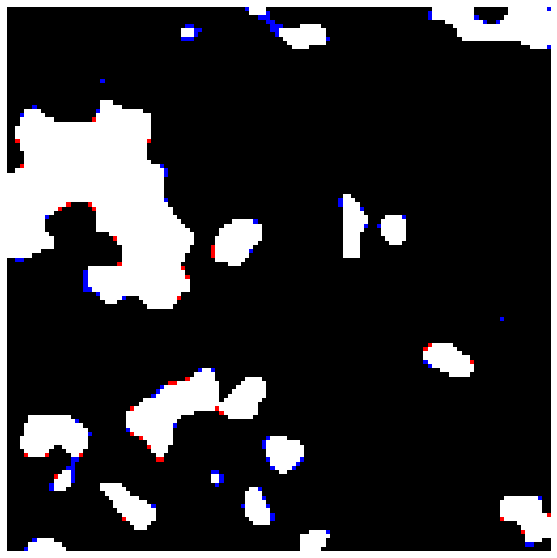

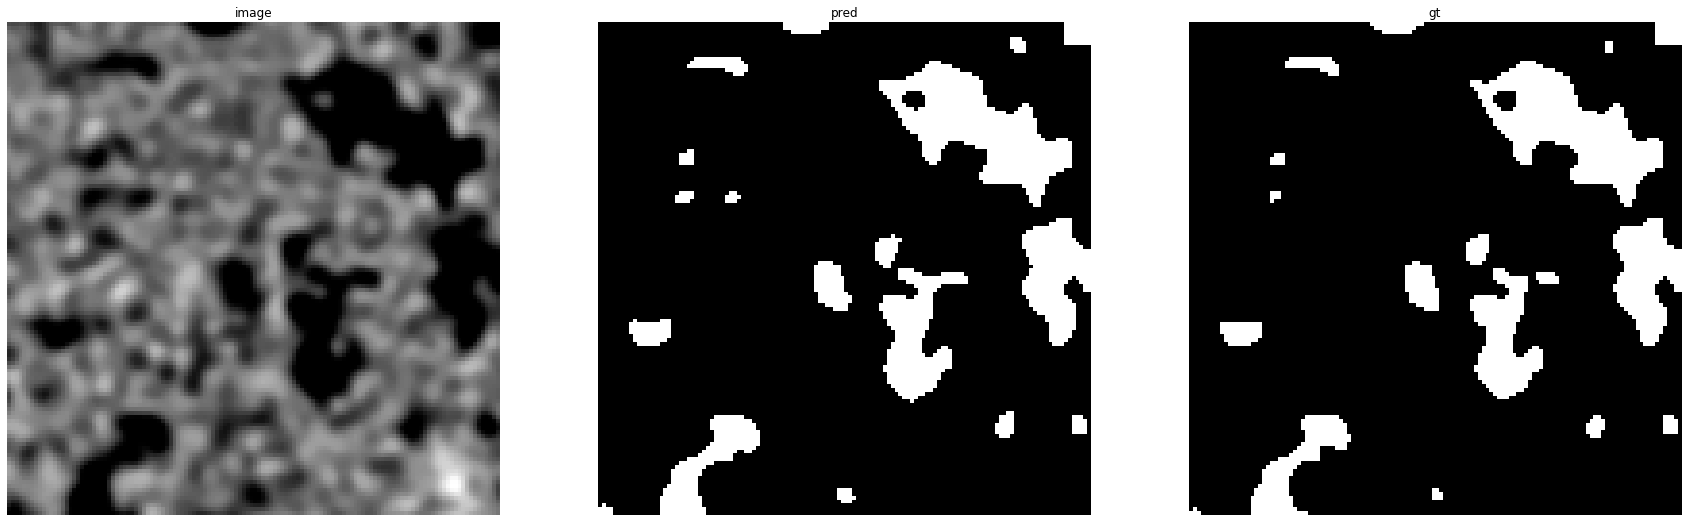

accuracy    : 0.9908447265625
precision   : 0.94750656167979
recall      : 0.9863387978142076
f1          : 0.9665327978580991
pr_auc      : 0.9956055305043807
iou         : 0.9352331606217616


Prediction for carbRNF:


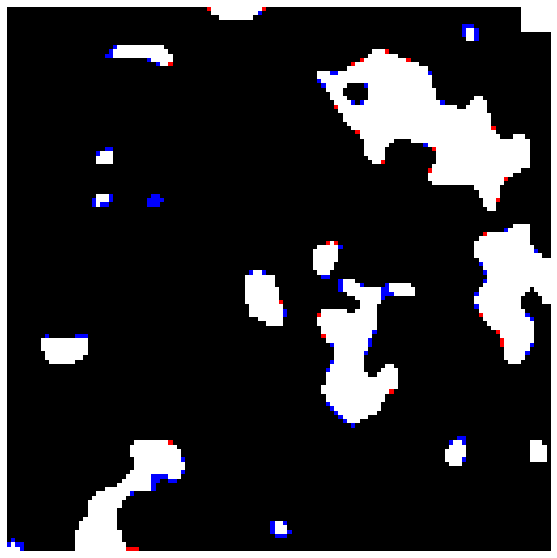

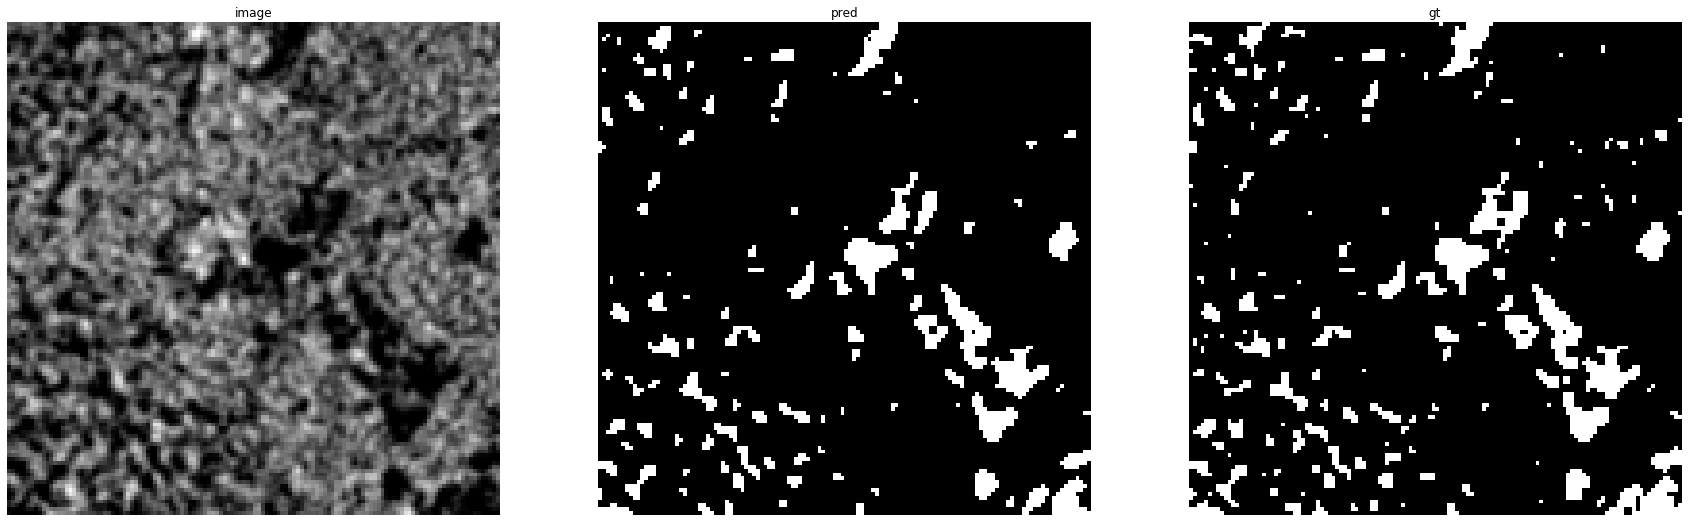

accuracy    : 0.9766845703125
precision   : 0.9742765273311897
recall      : 0.815831987075929
f1          : 0.888042203985932
pr_auc      : 0.9777290828768154
iou         : 0.7986294148655773


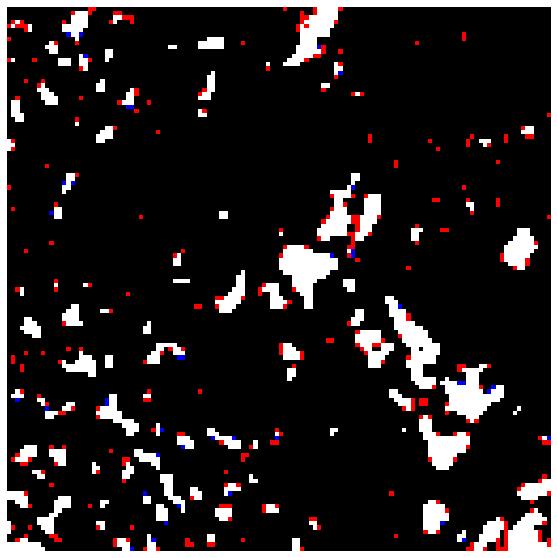

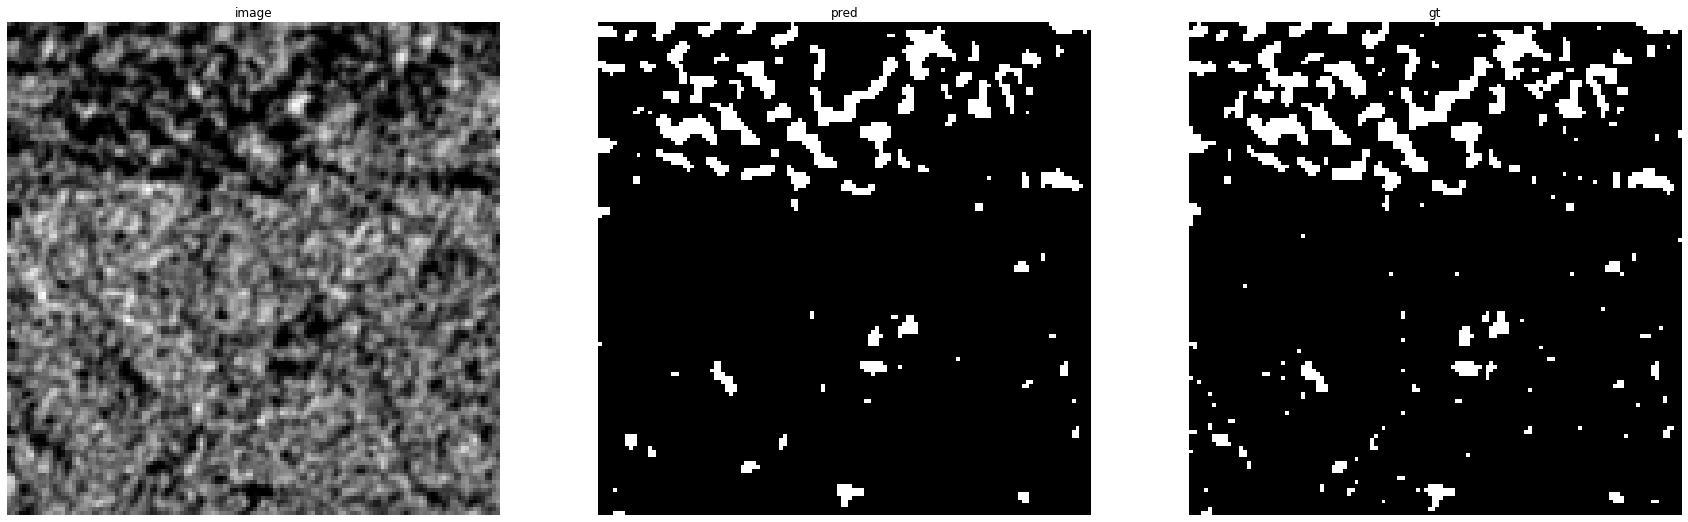

accuracy    : 0.97607421875
precision   : 0.9709257842387146
recall      : 0.7818853974121996
f1          : 0.8662116040955631
pr_auc      : 0.9719992865724566
iou         : 0.7639975918121613


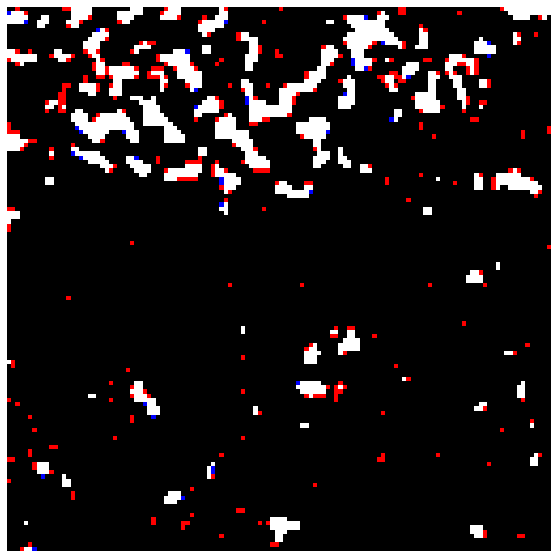

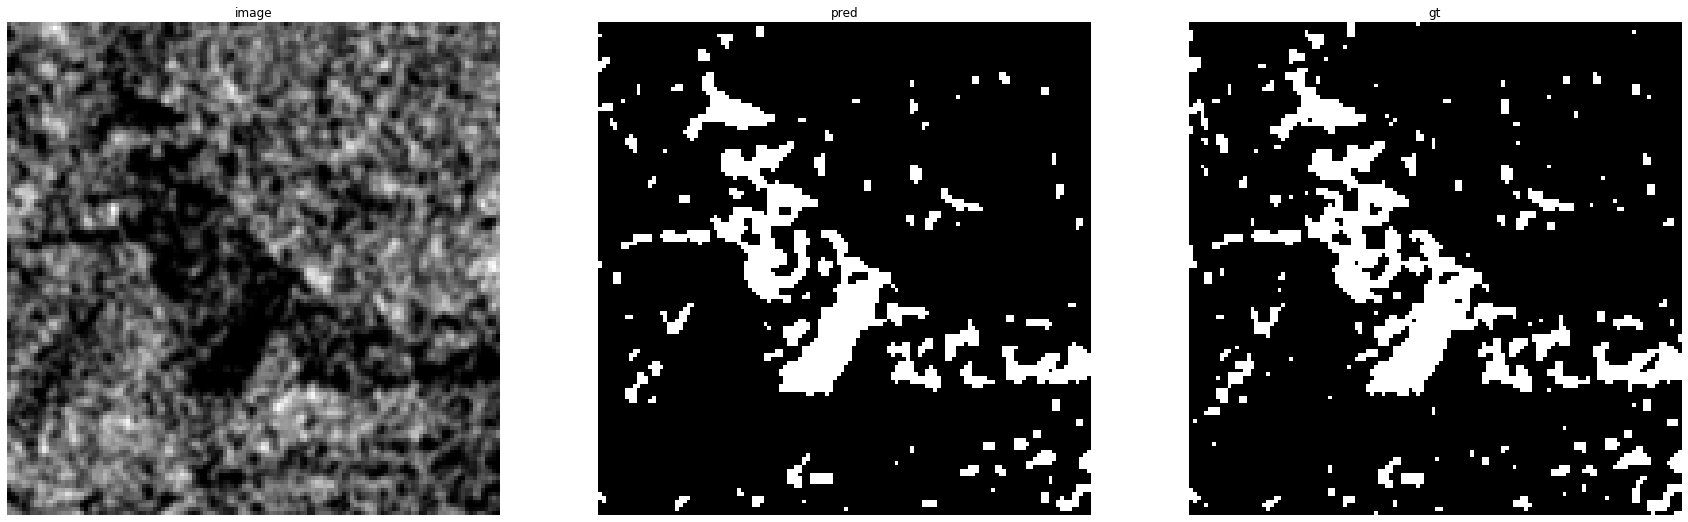

accuracy    : 0.97247314453125
precision   : 0.9799412915851272
recall      : 0.8300870285951099
f1          : 0.8988108593224142
pr_auc      : 0.9853035743816086
iou         : 0.8162184189079055


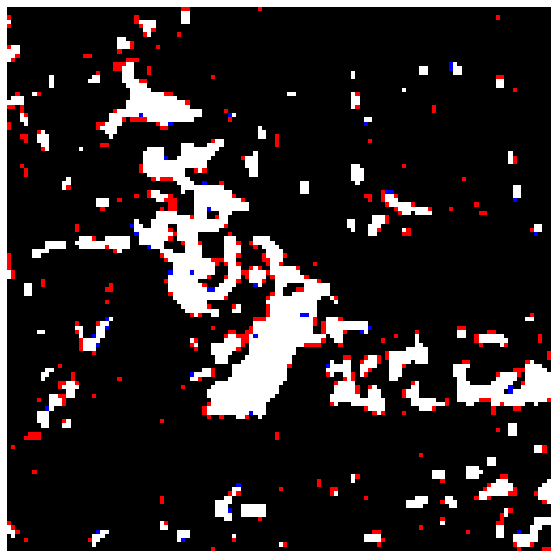

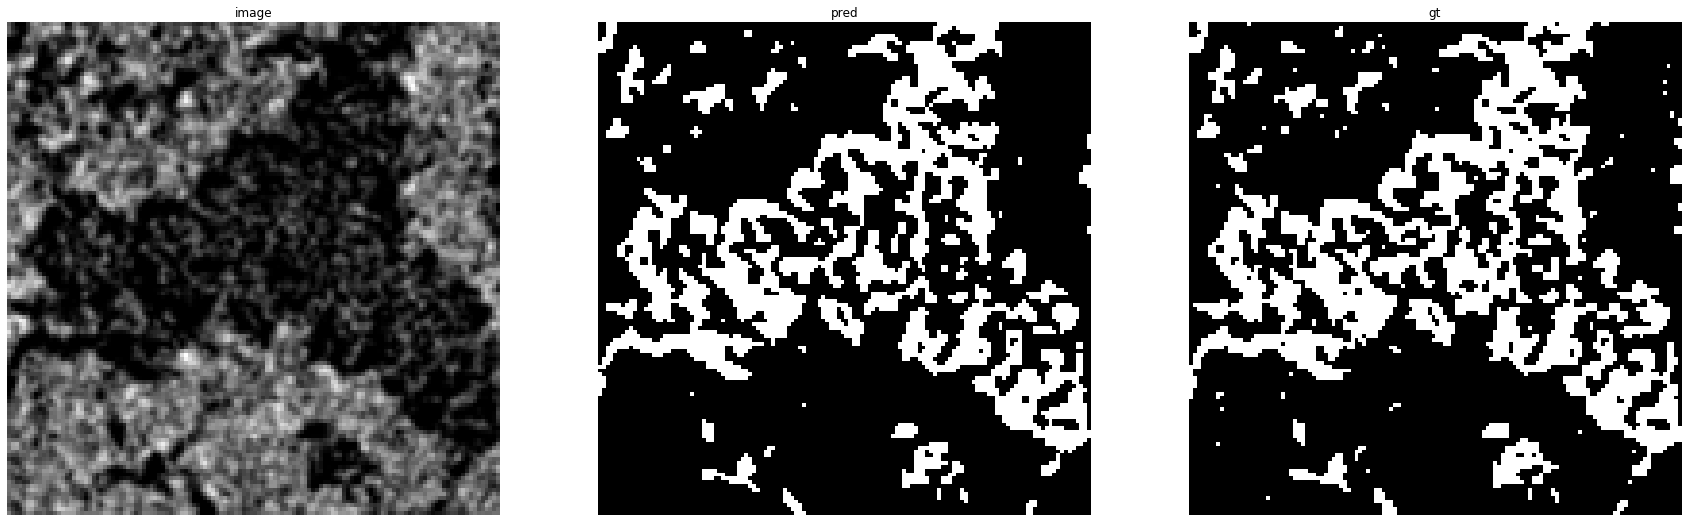

accuracy    : 0.96075439453125
precision   : 0.9761194029850746
recall      : 0.8776560053679267
f1          : 0.9242727593922977
pr_auc      : 0.9887577364507735
iou         : 0.859207357127217


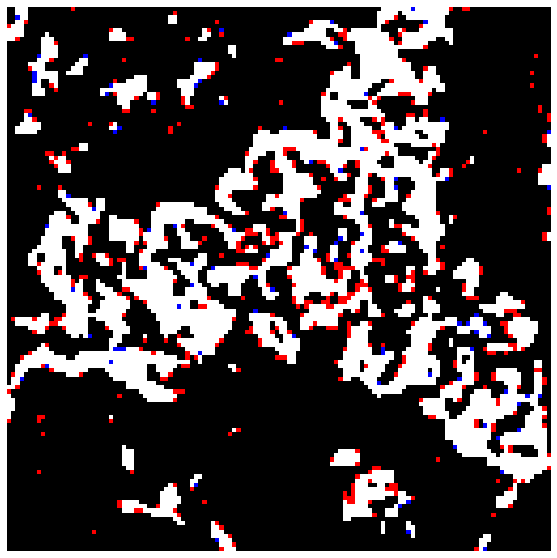

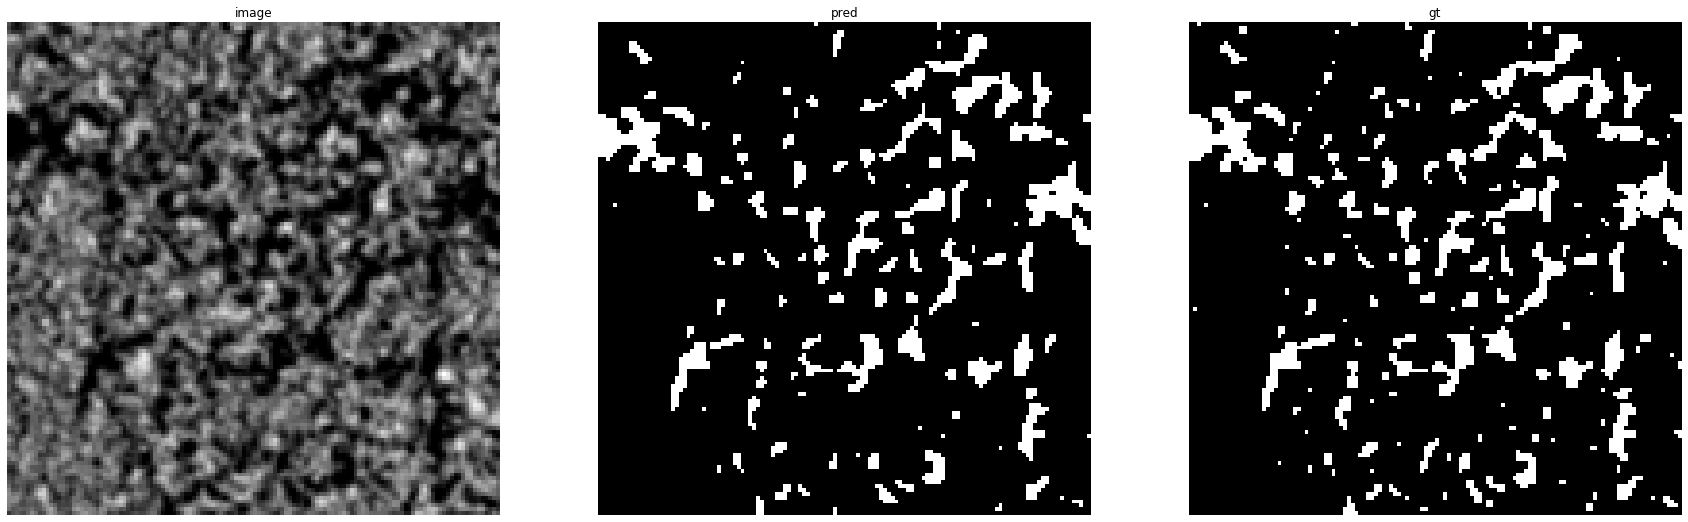

accuracy    : 0.9720458984375
precision   : 0.9659211927582535
recall      : 0.8215579710144928
f1          : 0.8879099363680861
pr_auc      : 0.9785481983034373
iou         : 0.7984154929577465


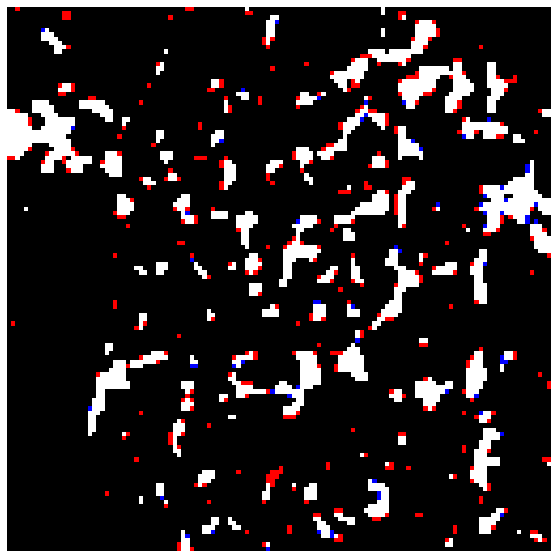

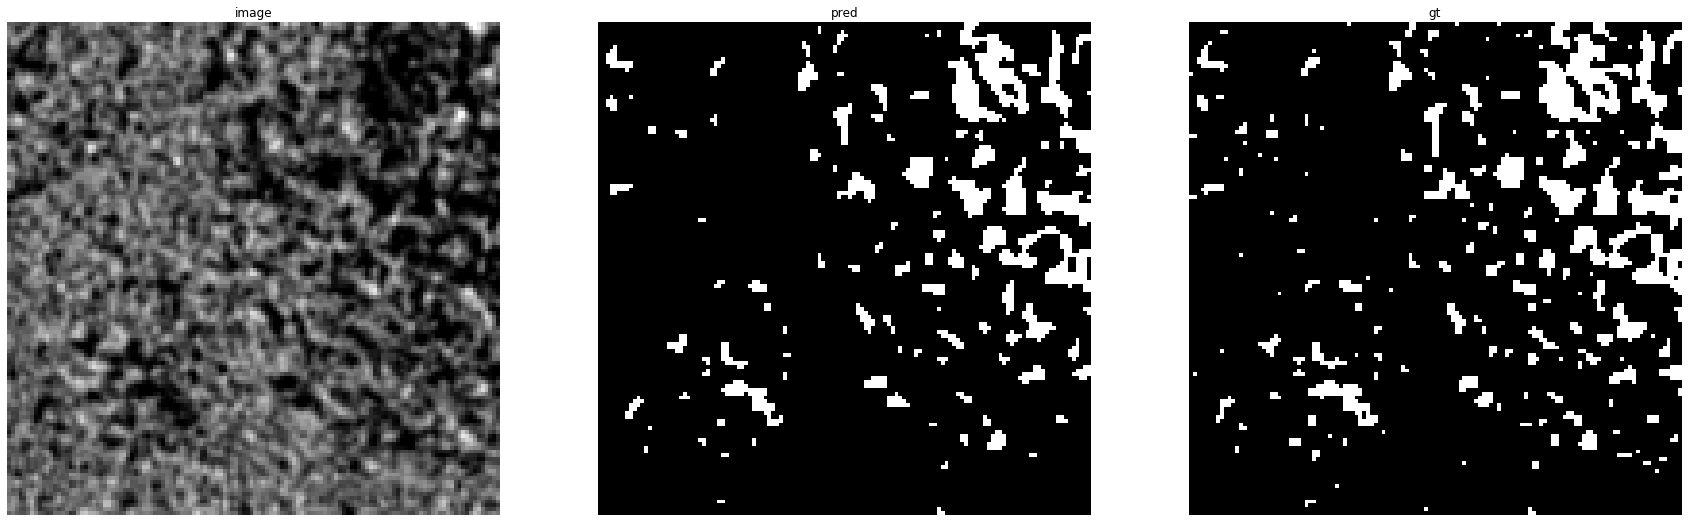

accuracy    : 0.970947265625
precision   : 0.9633607075173721
recall      : 0.7848687596500258
f1          : 0.8650028360748724
pr_auc      : 0.9680671111231307
iou         : 0.7621189405297352


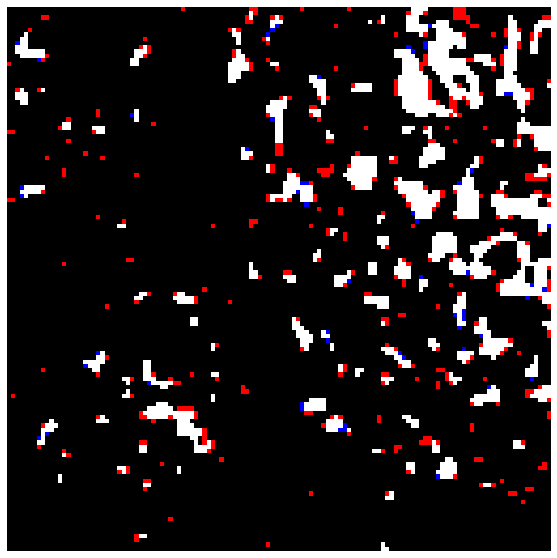

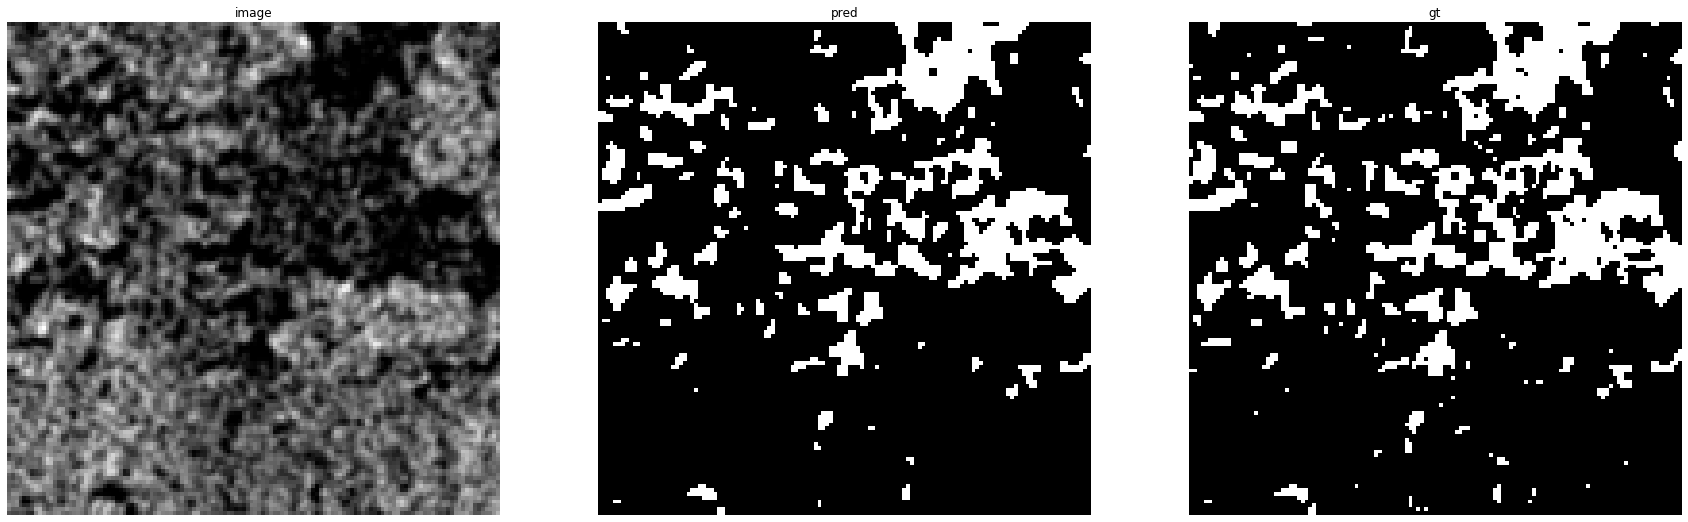

accuracy    : 0.96795654296875
precision   : 0.983206106870229
recall      : 0.8426561988877985
f1          : 0.907521578298397
pr_auc      : 0.9876459421230581
iou         : 0.8306997742663657


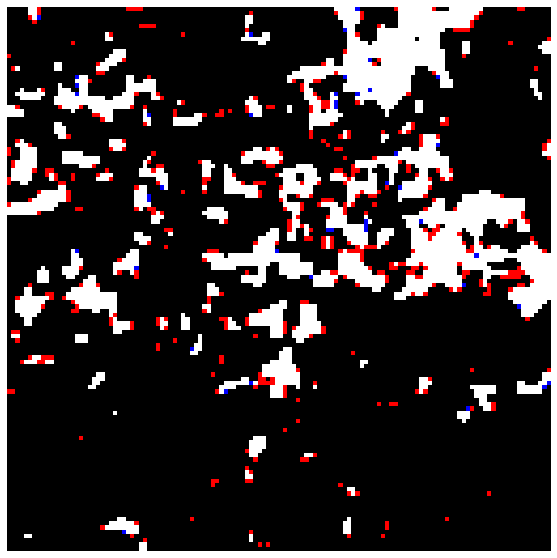

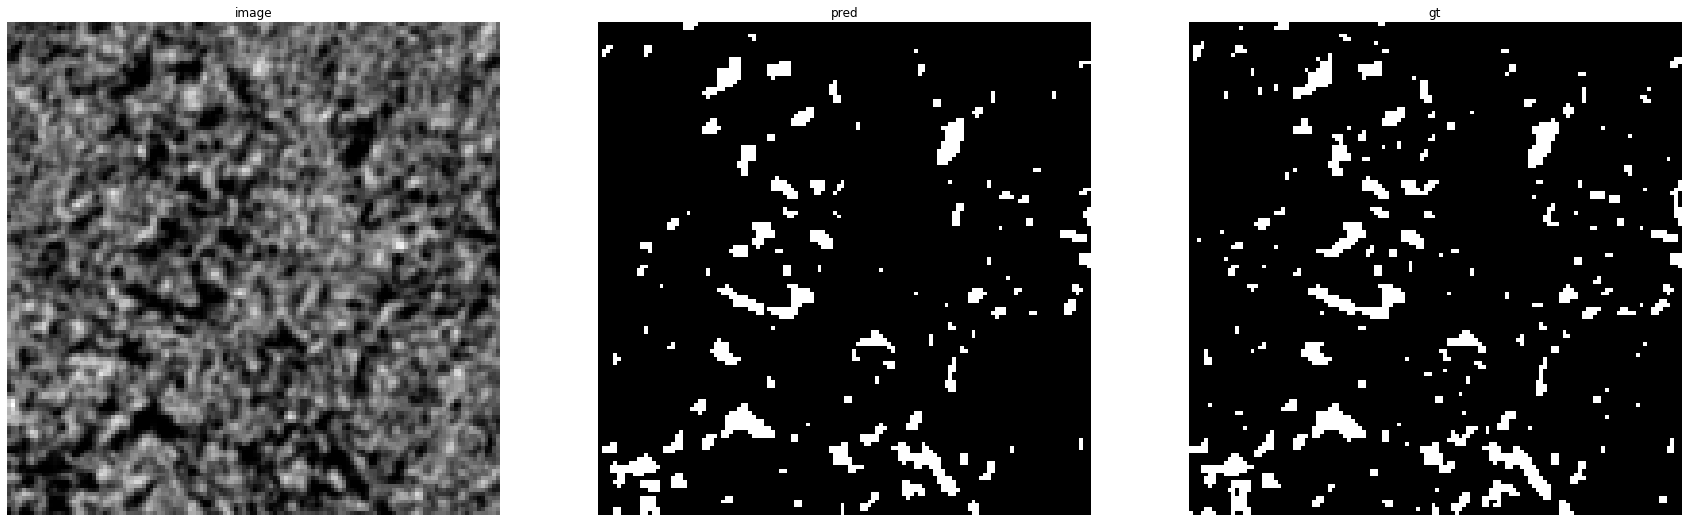

accuracy    : 0.9779052734375
precision   : 0.9630606860158312
recall      : 0.773851590106007
f1          : 0.8581504702194358
pr_auc      : 0.9634702874293225
iou         : 0.7515442690459849


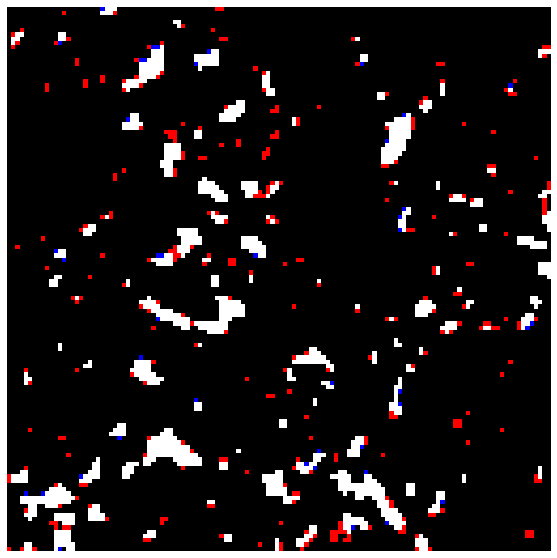

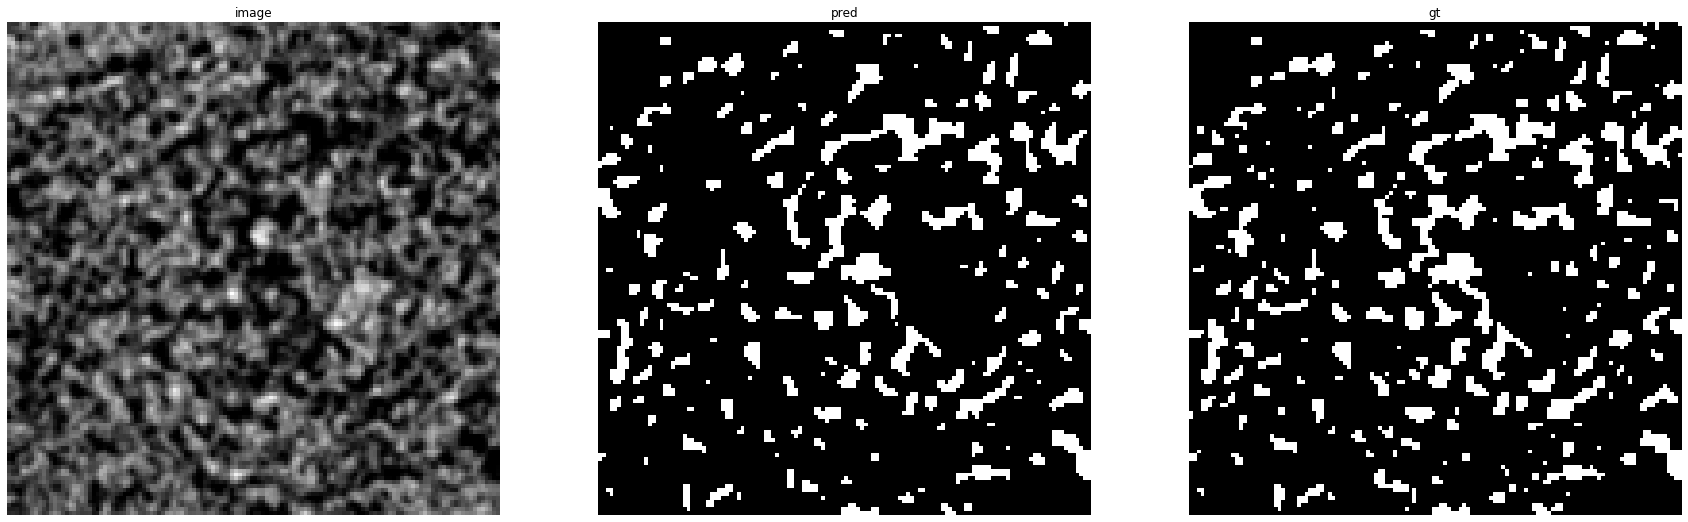

accuracy    : 0.96343994140625
precision   : 0.9706422018348624
recall      : 0.7981893625047152
f1          : 0.8760091078451666
pr_auc      : 0.9743685961499848
iou         : 0.7793738489871087


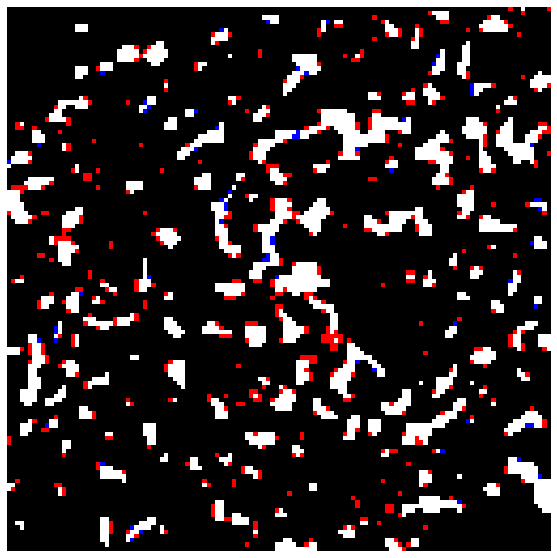

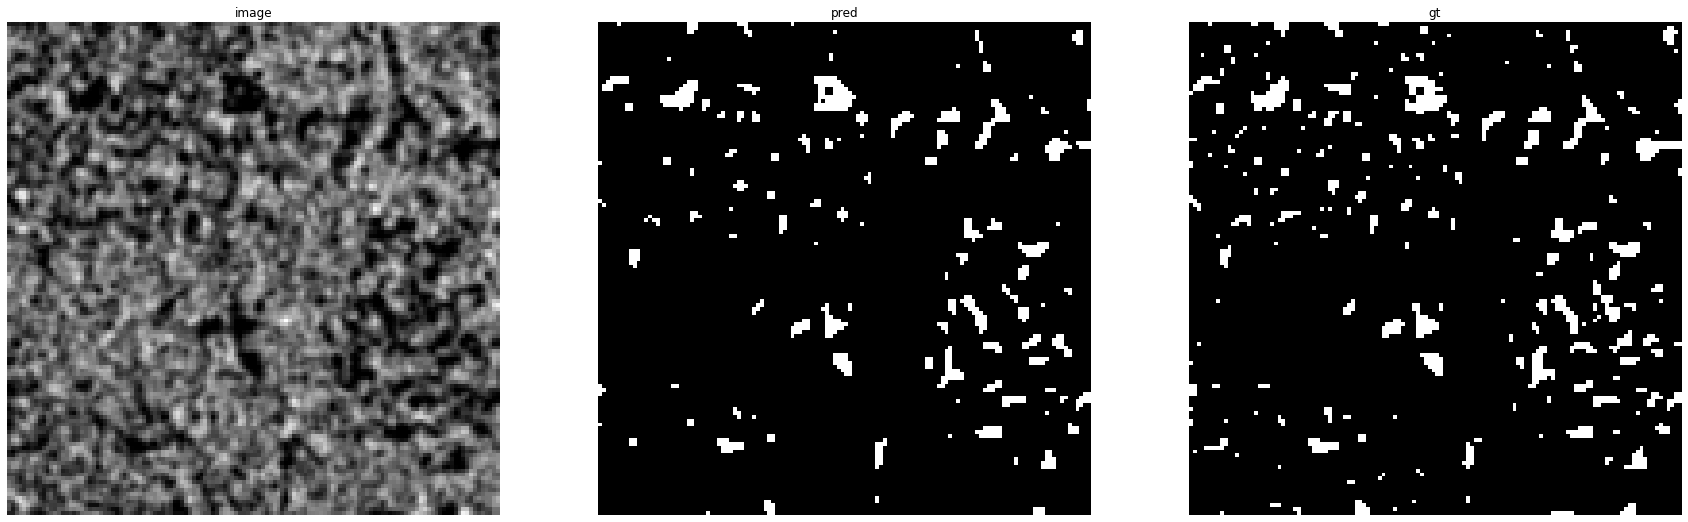

accuracy    : 0.97698974609375
precision   : 0.9581920903954803
recall      : 0.7138047138047138
f1          : 0.8181379643029426
pr_auc      : 0.9497375222686198
iou         : 0.6922448979591836


Prediction for SPE_carb10_58_box3:


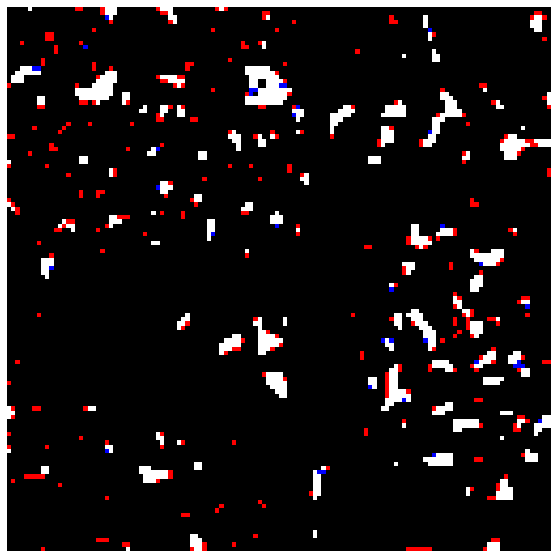

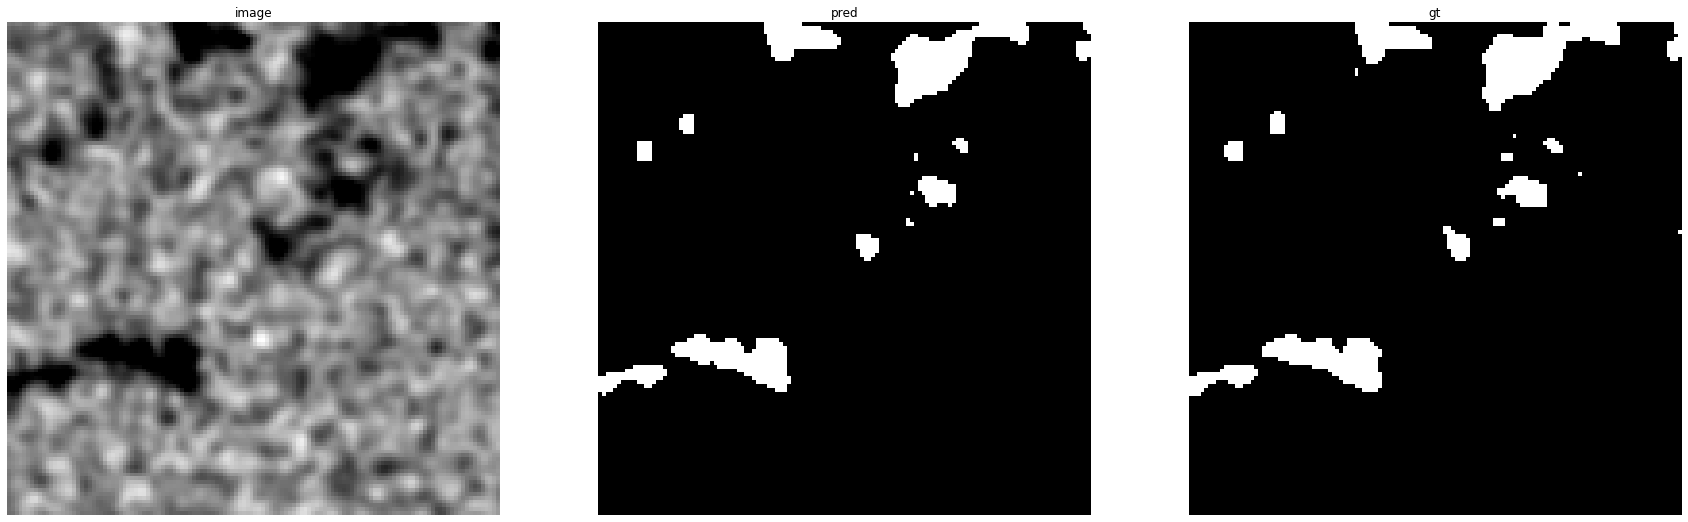

accuracy    : 0.992919921875
precision   : 0.9947970863683663
recall      : 0.8959700093720713
f1          : 0.942800788954635
pr_auc      : 0.9970979118963632
iou         : 0.8917910447761194


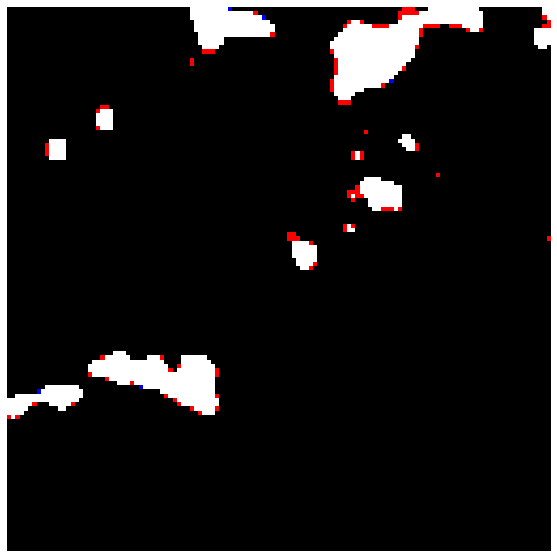

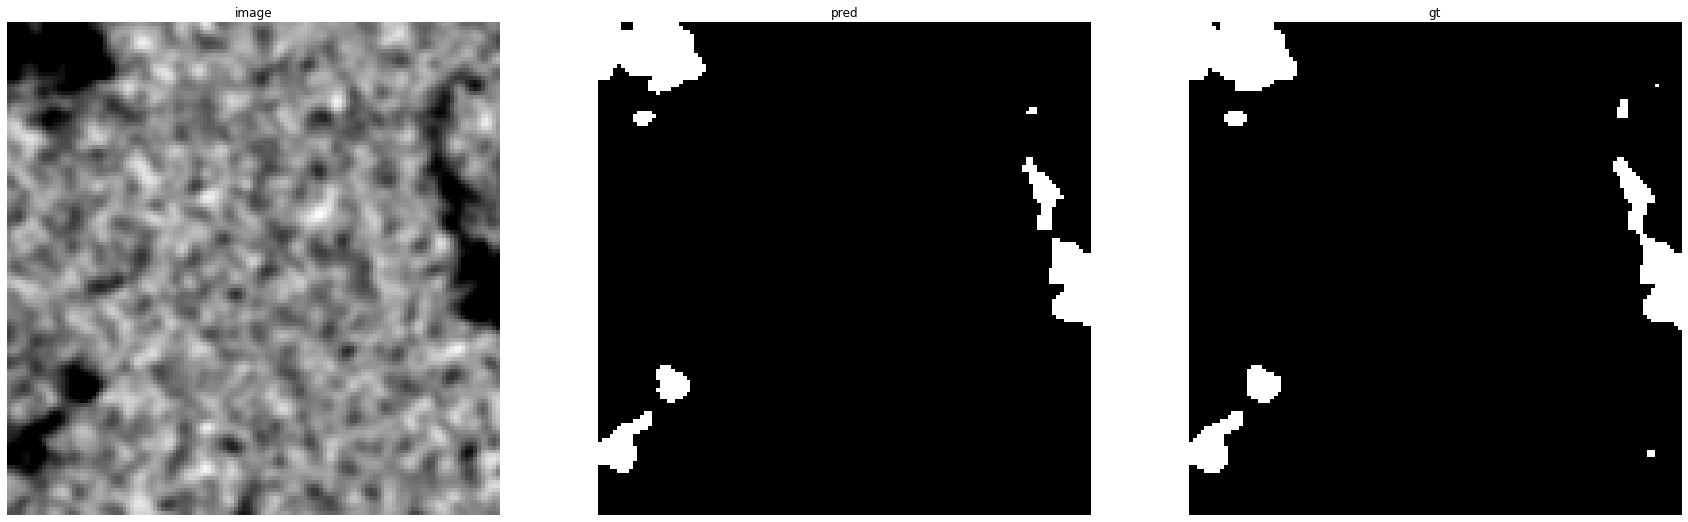

accuracy    : 0.99560546875
precision   : 0.9988399071925754
recall      : 0.9238197424892703
f1          : 0.959866220735786
pr_auc      : 0.9981831177215758
iou         : 0.9228295819935691


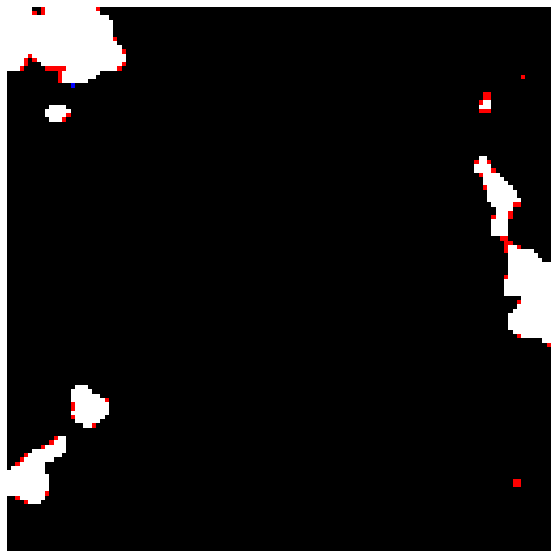

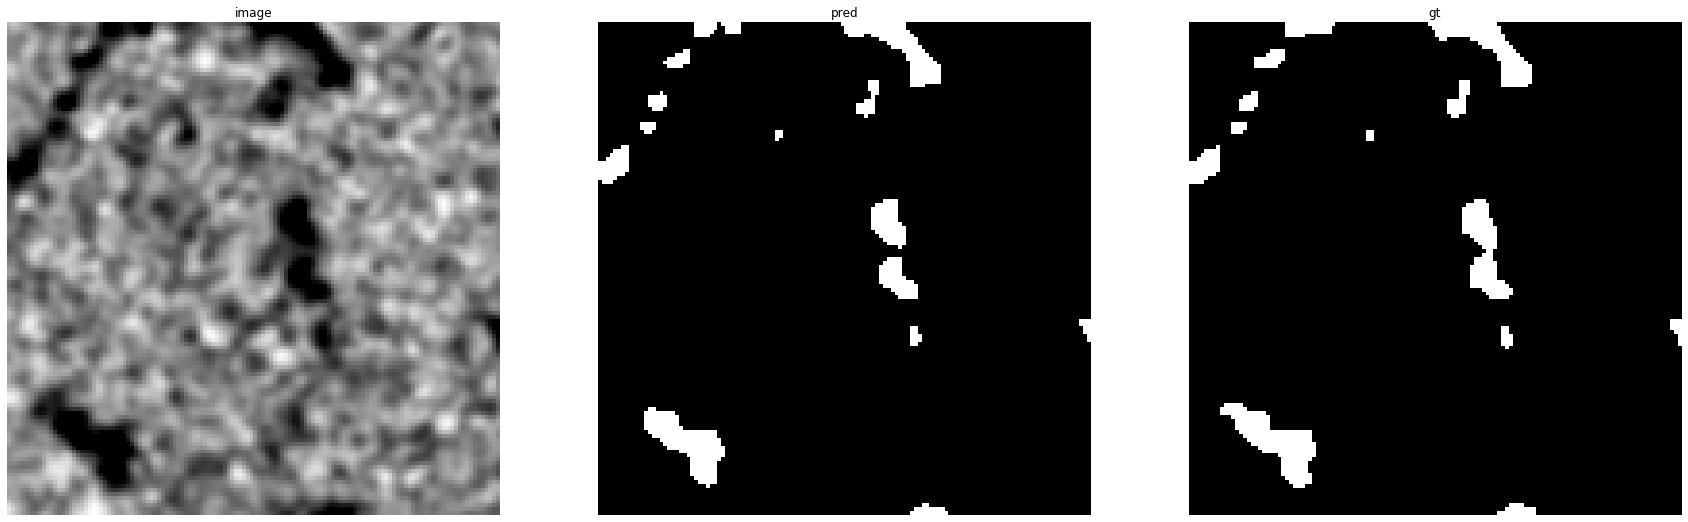

accuracy    : 0.9942626953125
precision   : 0.9918144611186903
recall      : 0.8920245398773006
f1          : 0.9392764857881136
pr_auc      : 0.9945780698213126
iou         : 0.8855054811205847


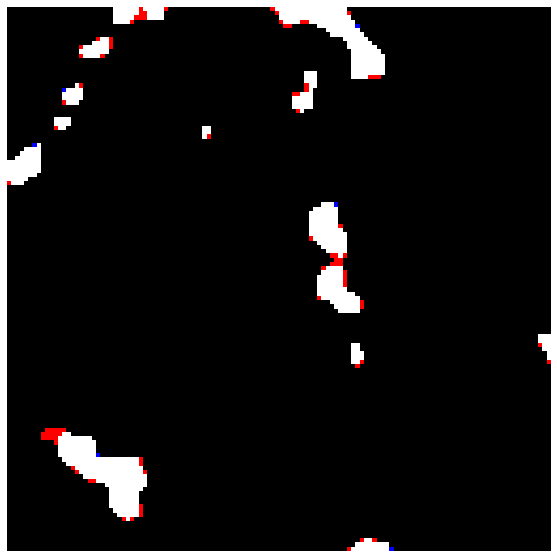

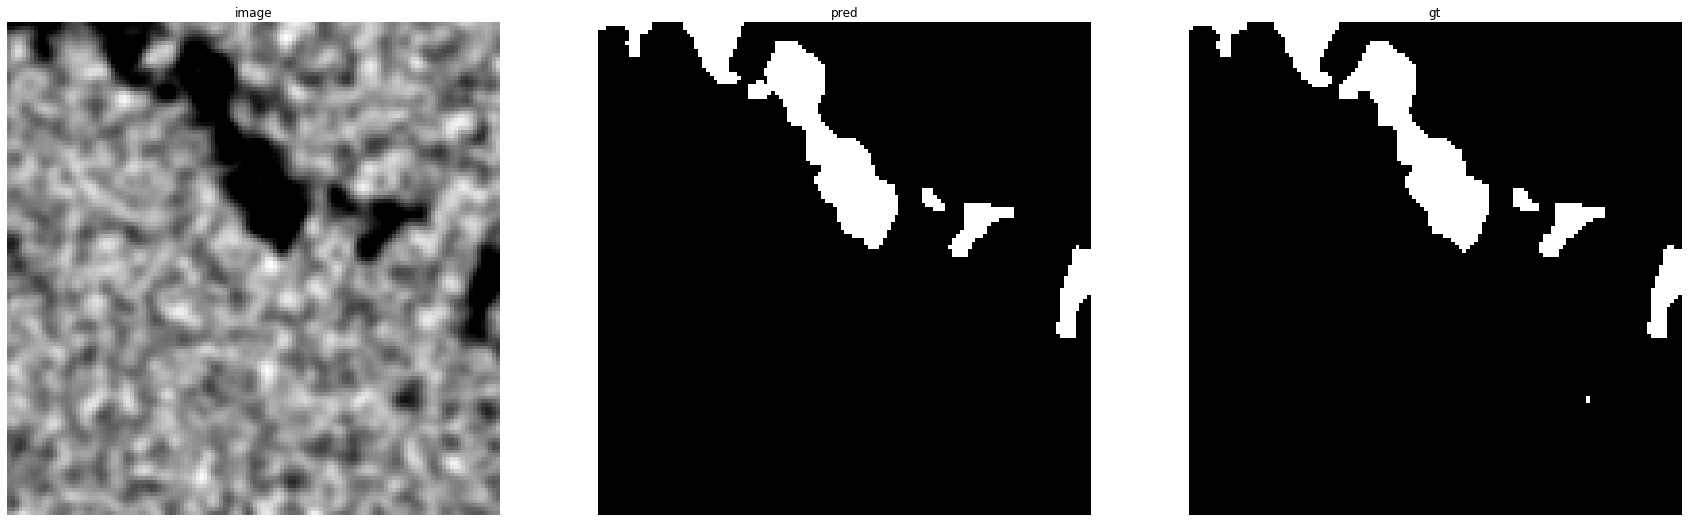

accuracy    : 0.99609375
precision   : 0.9949195596951735
recall      : 0.9529602595296026
f1          : 0.9734879867439934
pr_auc      : 0.998756320127816
iou         : 0.9483454398708636


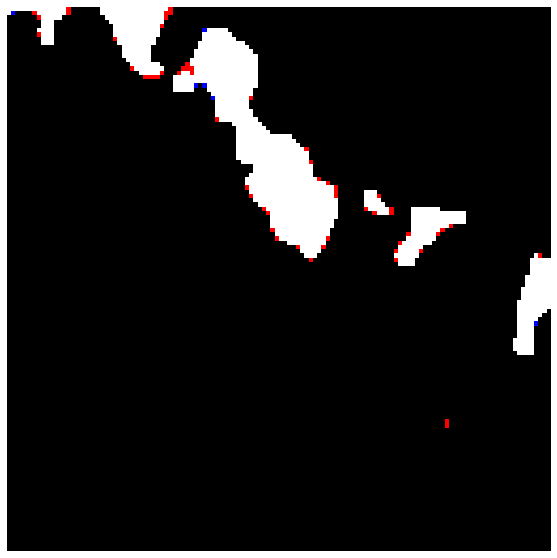

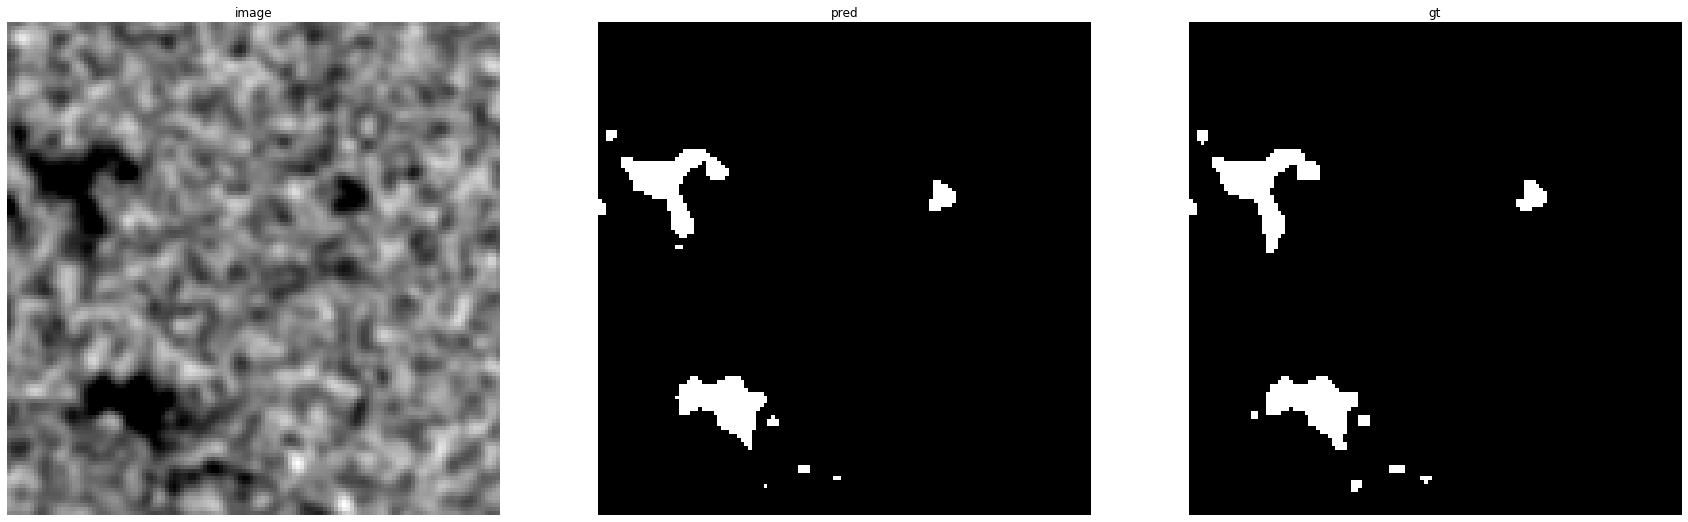

accuracy    : 0.9959716796875
precision   : 0.9926873857404022
recall      : 0.8975206611570248
f1          : 0.9427083333333333
pr_auc      : 0.9957773874963277
iou         : 0.8916256157635468


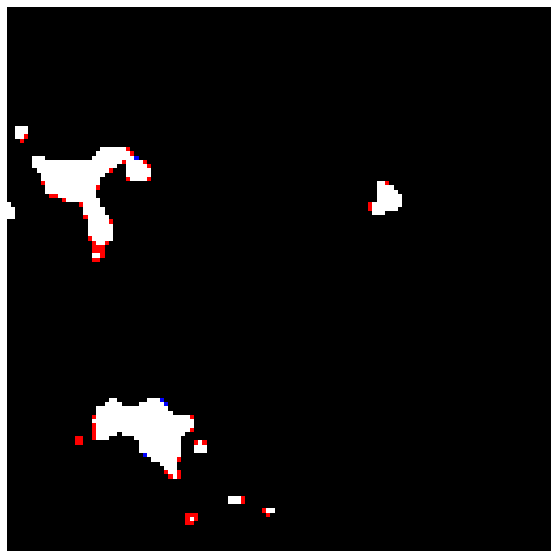

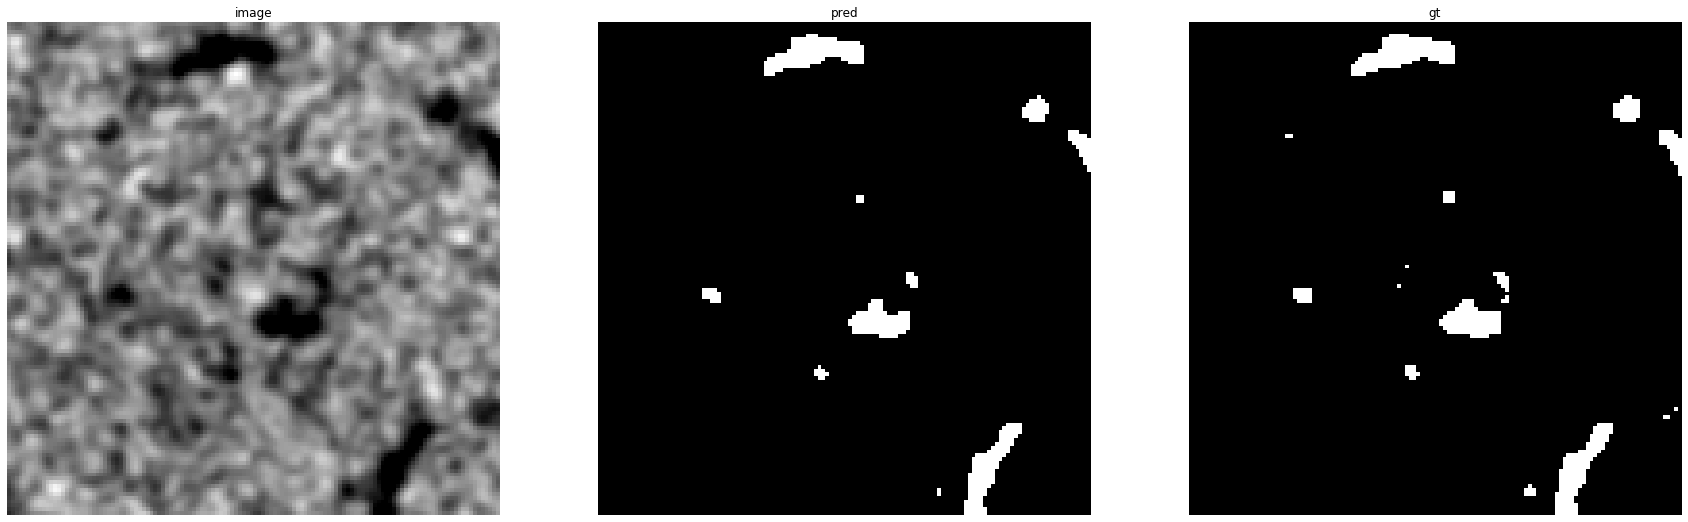

accuracy    : 0.99639892578125
precision   : 0.9941176470588236
recall      : 0.9005328596802842
f1          : 0.9450139794967382
pr_auc      : 0.9962453645739109
iou         : 0.8957597173144877


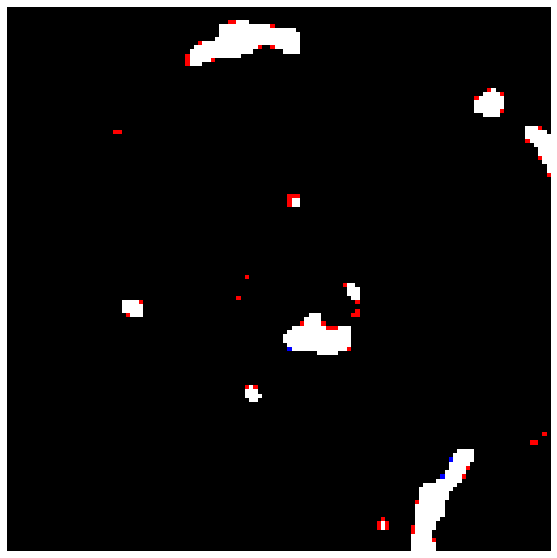

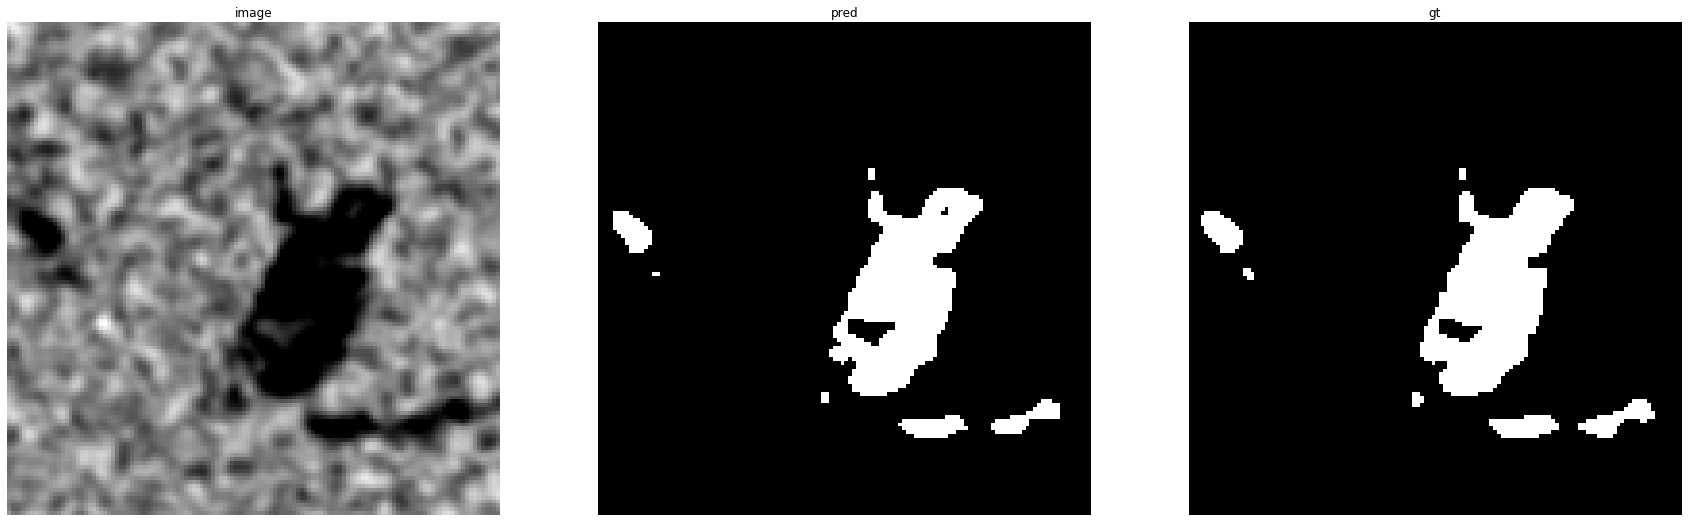

accuracy    : 0.99493408203125
precision   : 0.9977924944812362
recall      : 0.9442896935933147
f1          : 0.970304114490161
pr_auc      : 0.9989488211153233
iou         : 0.9423210562890897


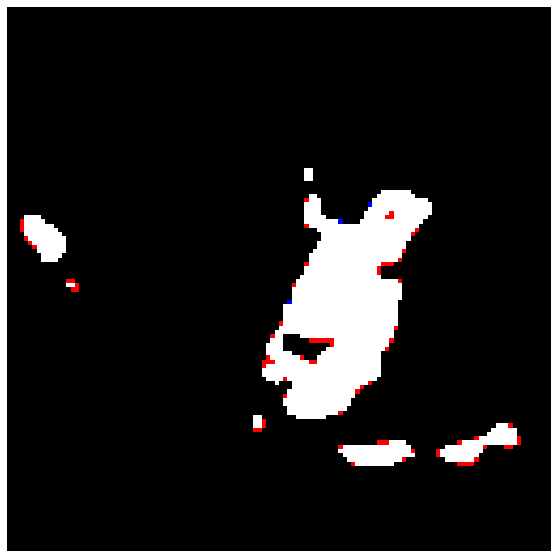

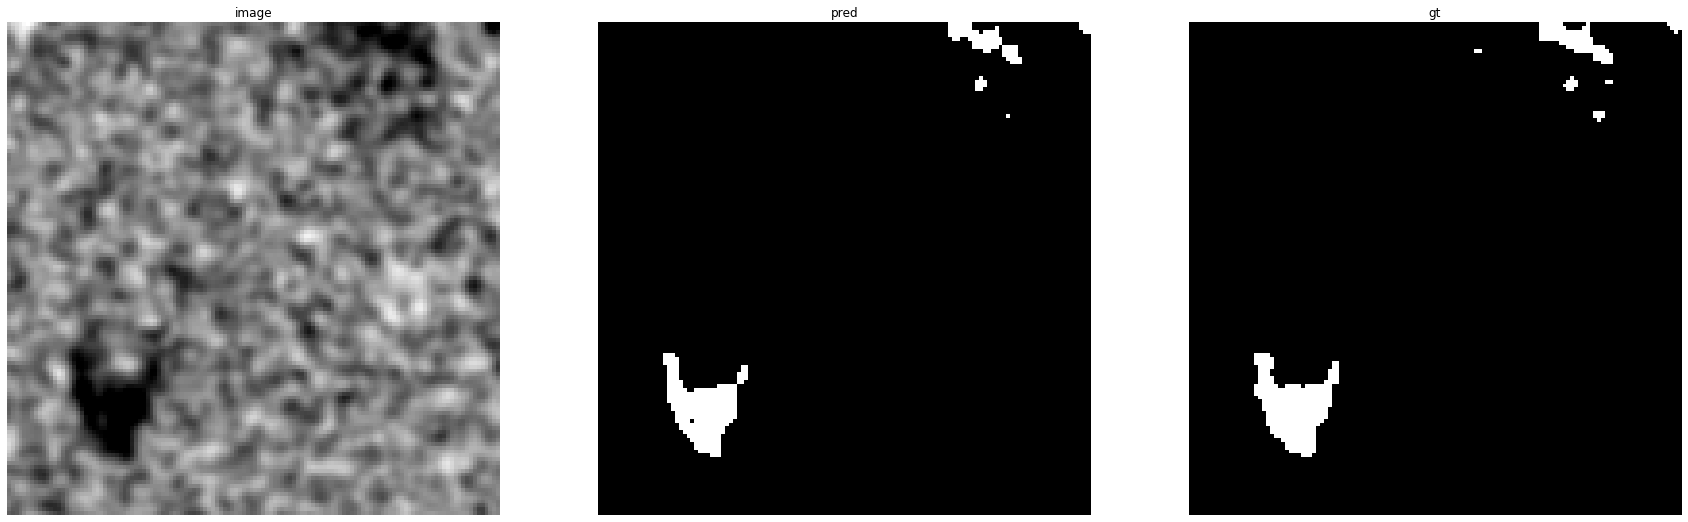

accuracy    : 0.9959716796875
precision   : 0.9893899204244032
recall      : 0.8574712643678161
f1          : 0.91871921182266
pr_auc      : 0.9949562838432124
iou         : 0.8496583143507973


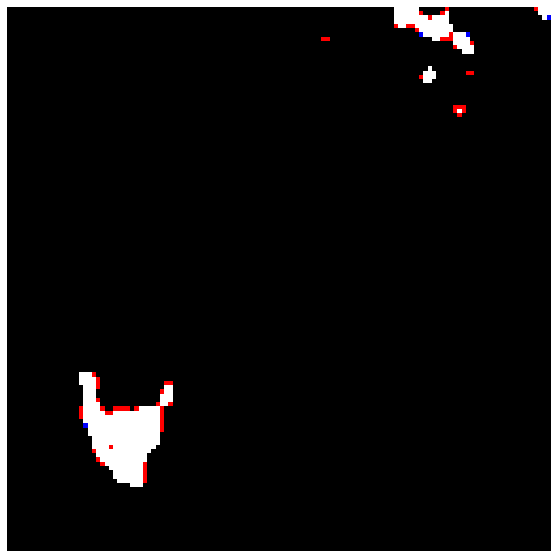

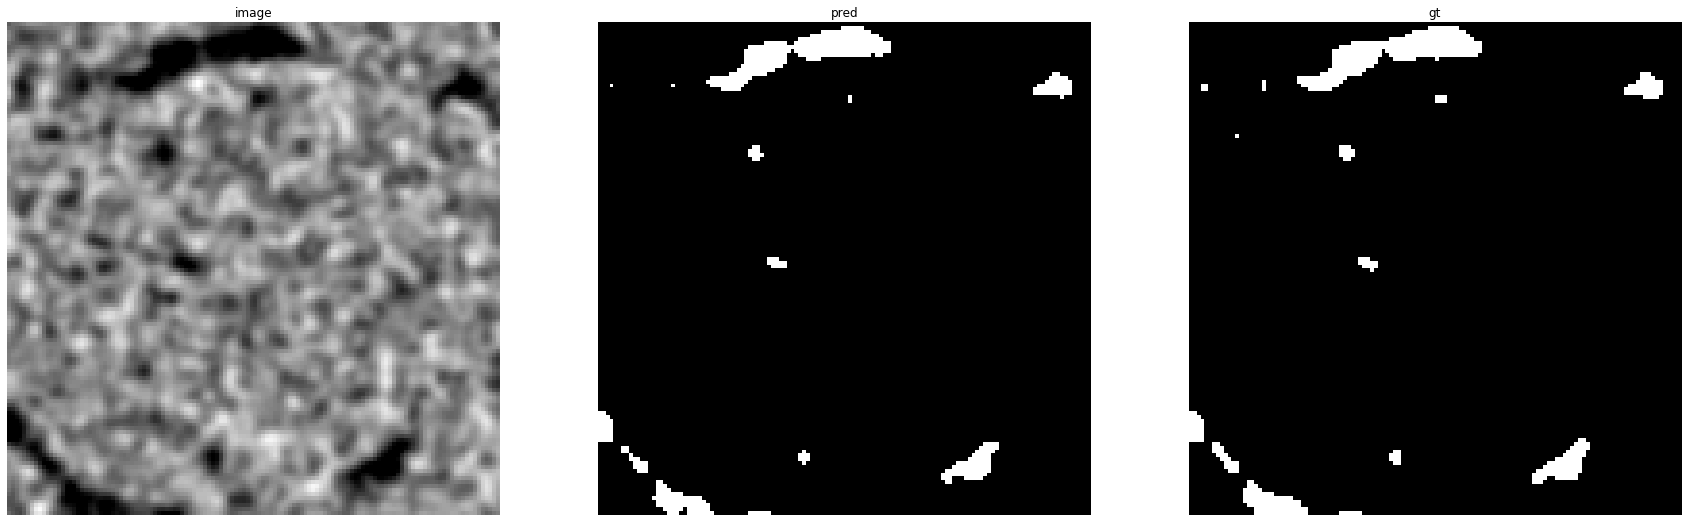

accuracy    : 0.99591064453125
precision   : 0.9965337954939342
recall      : 0.8984375
f1          : 0.9449465899753493
pr_auc      : 0.9976350958400682
iou         : 0.8956386292834891


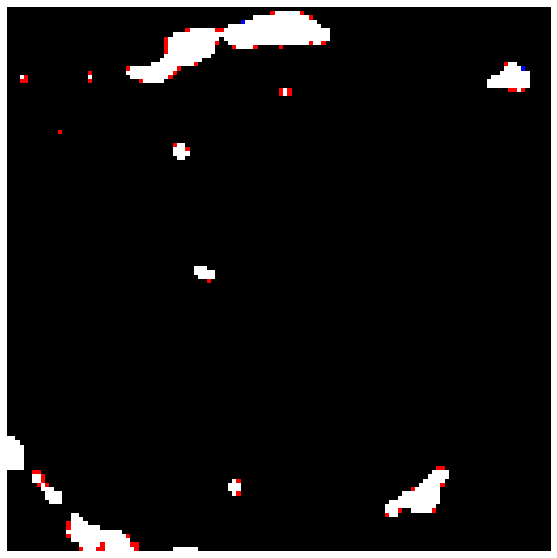

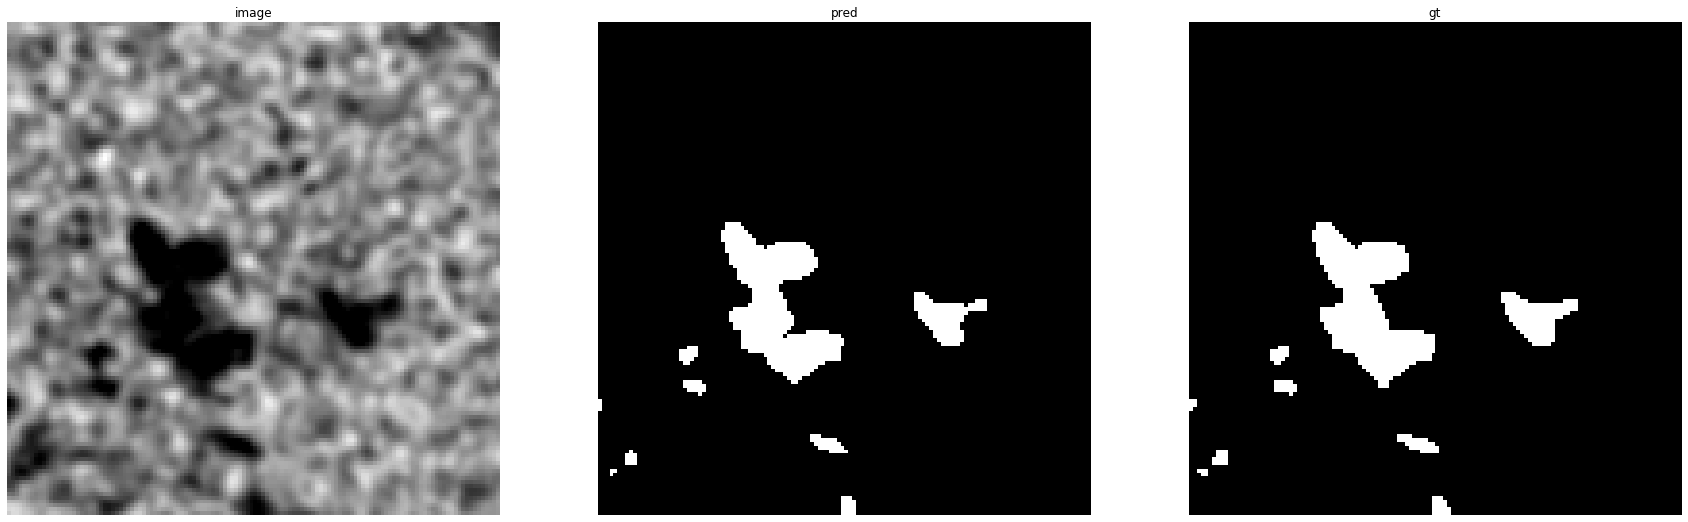

accuracy    : 0.9954833984375
precision   : 0.9988425925925926
recall      : 0.9220085470085471
f1          : 0.9588888888888889
pr_auc      : 0.9984232926988701
iou         : 0.9210245464247598


Prediction for SoilAh-1:


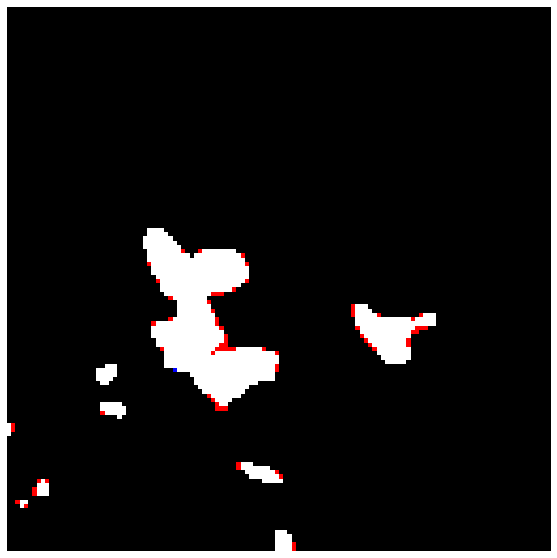

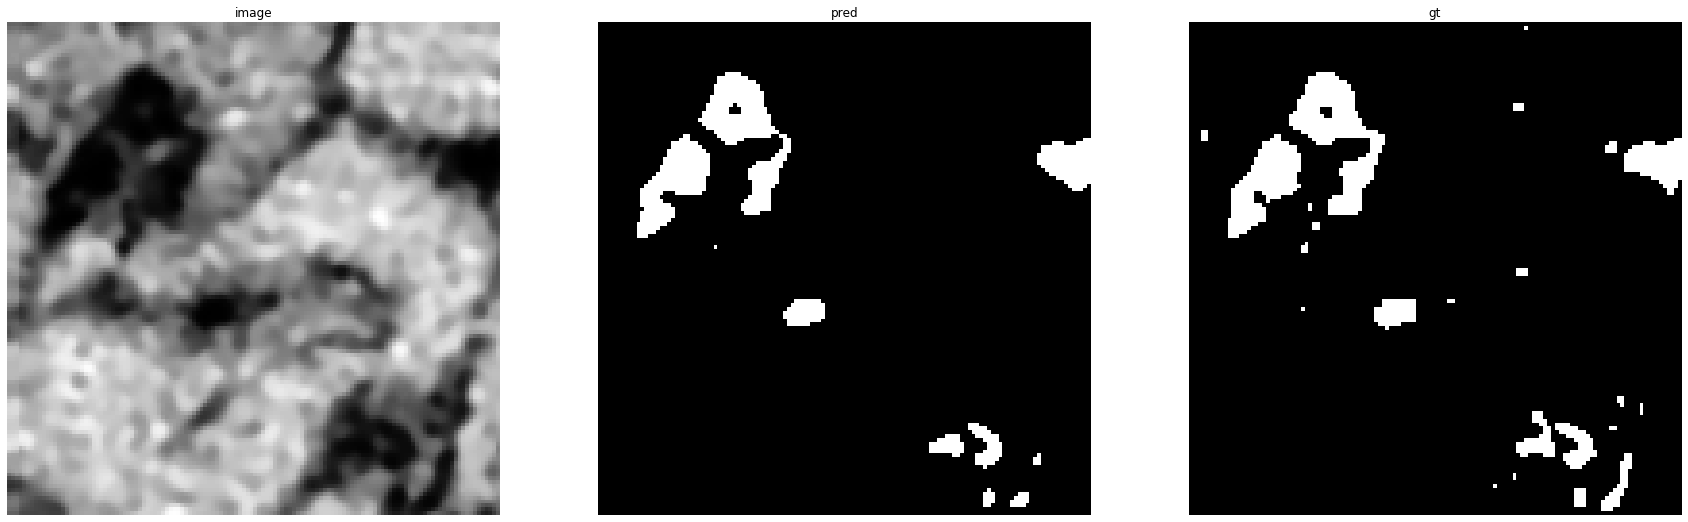

accuracy    : 0.98834228515625
precision   : 0.9871931696905016
recall      : 0.8378623188405797
f1          : 0.9064184223419893
pr_auc      : 0.9849349460723493
iou         : 0.828853046594982


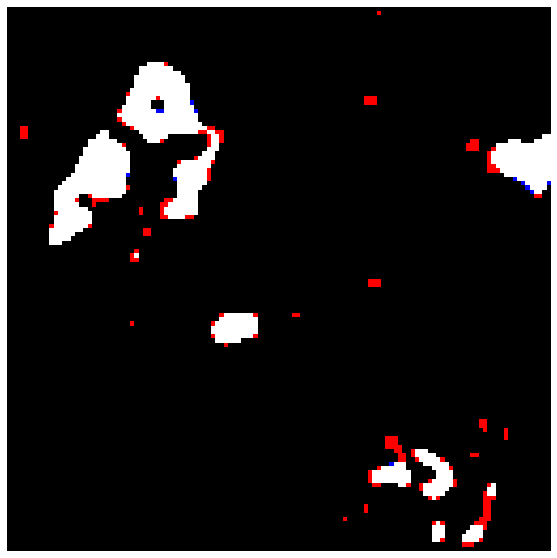

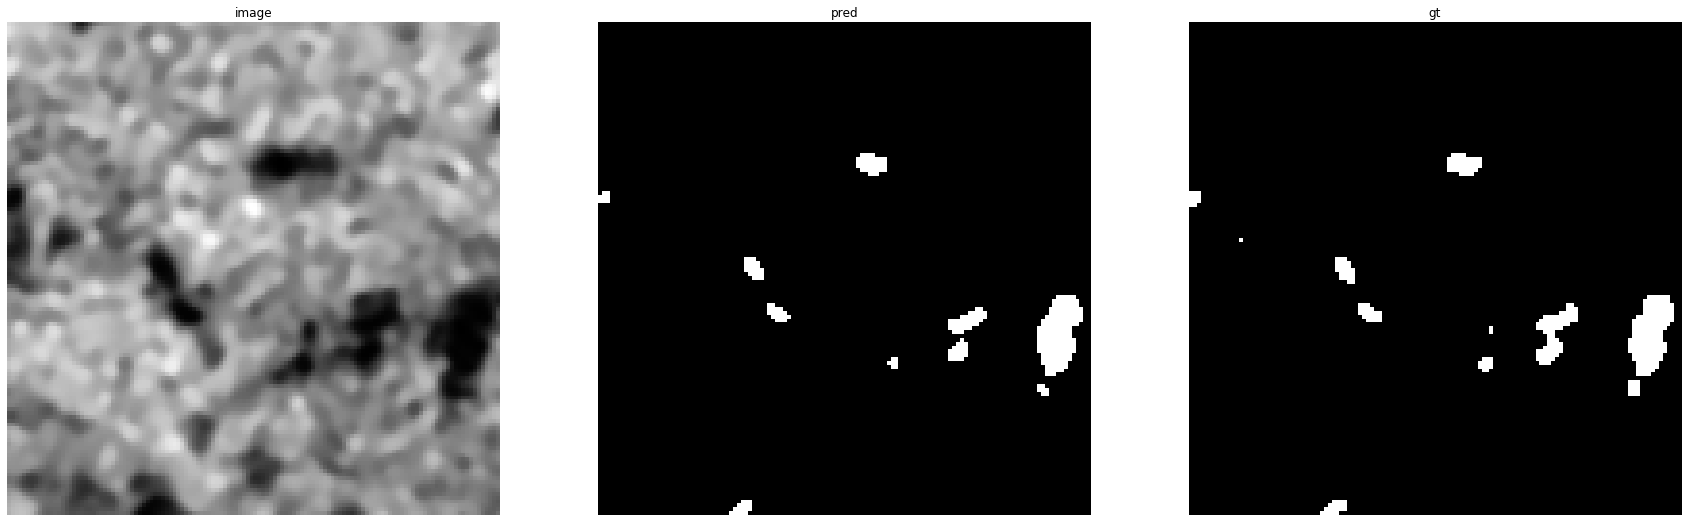

accuracy    : 0.99615478515625
precision   : 0.9801699716713881
recall      : 0.8606965174129353
f1          : 0.9165562913907285
pr_auc      : 0.9898169156467412
iou         : 0.8459657701711492


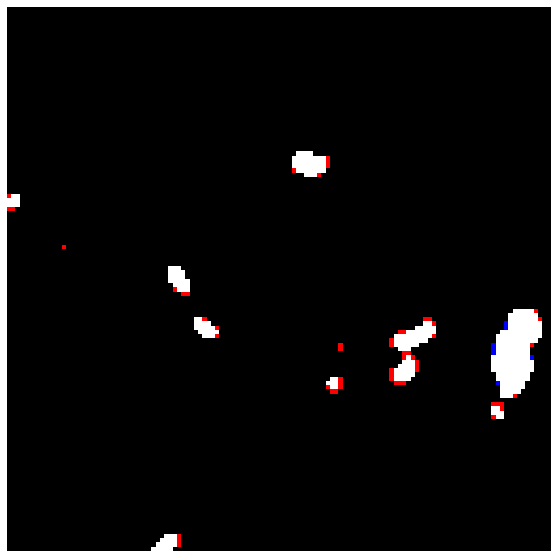

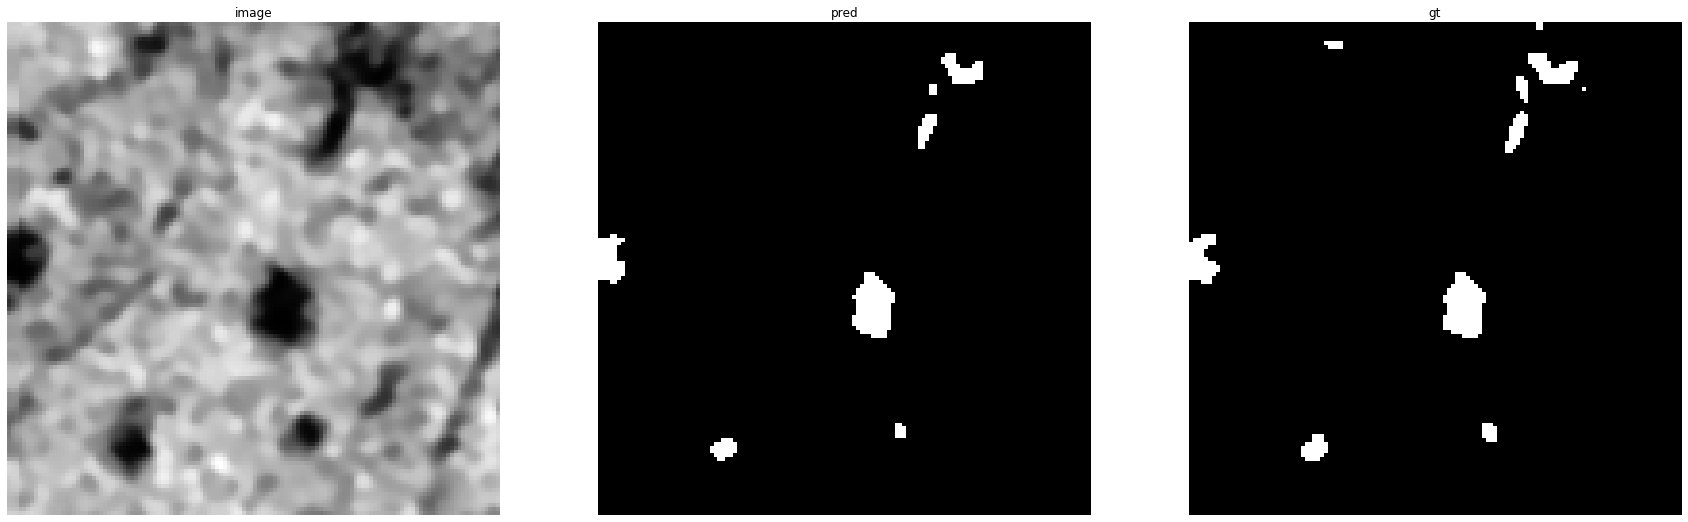

accuracy    : 0.99578857421875
precision   : 0.991044776119403
recall      : 0.8341708542713567
f1          : 0.9058663028649386
pr_auc      : 0.9880246054744471
iou         : 0.827930174563591


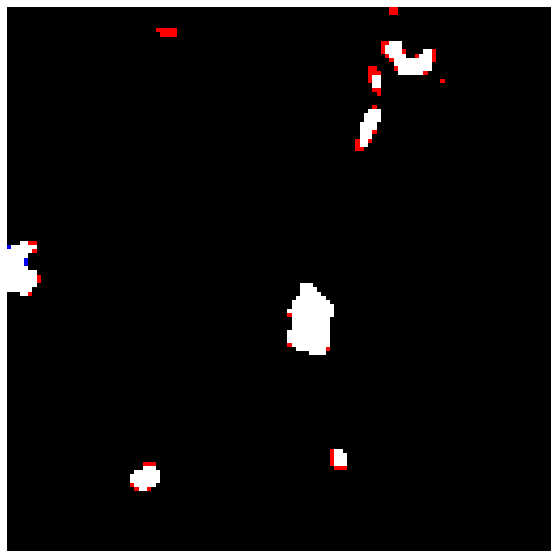

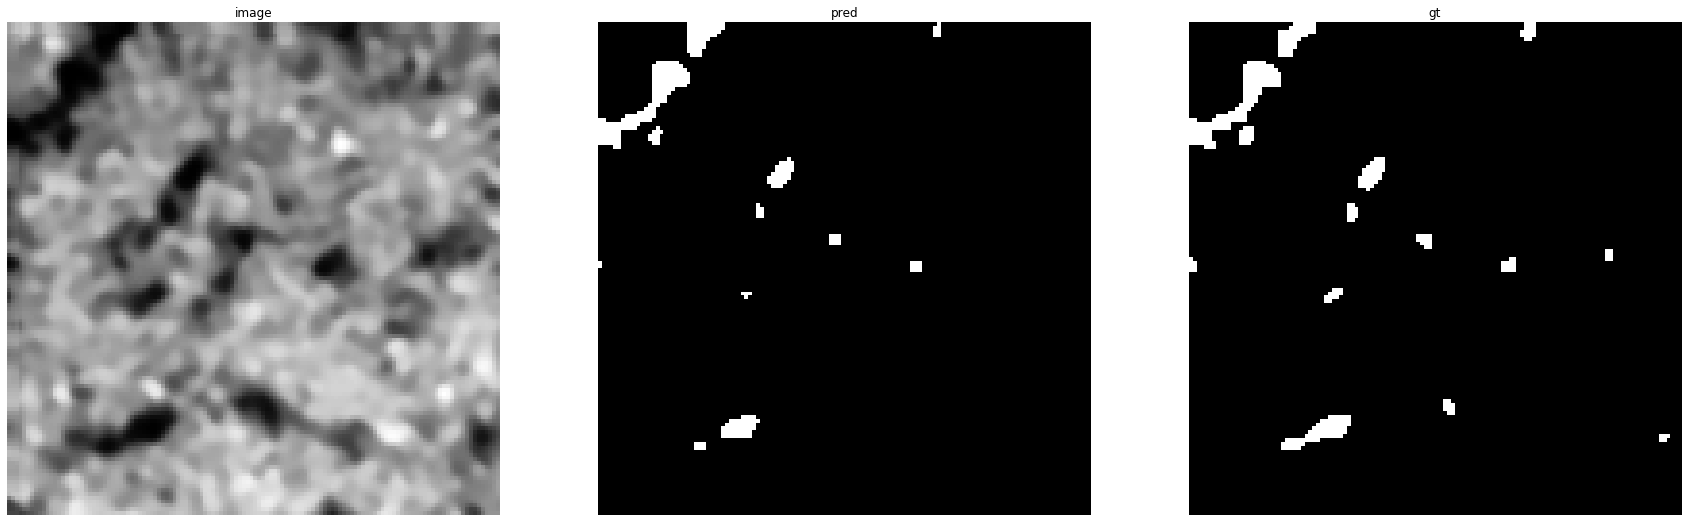

accuracy    : 0.99334716796875
precision   : 0.9744318181818182
recall      : 0.7742663656884876
f1          : 0.8628930817610063
pr_auc      : 0.9685320018559306
iou         : 0.7588495575221239


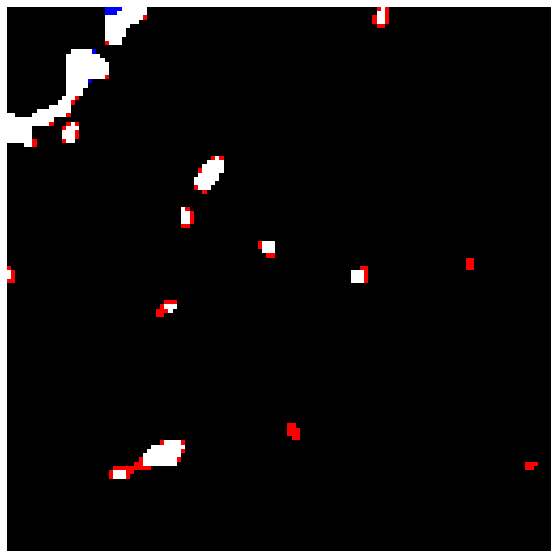

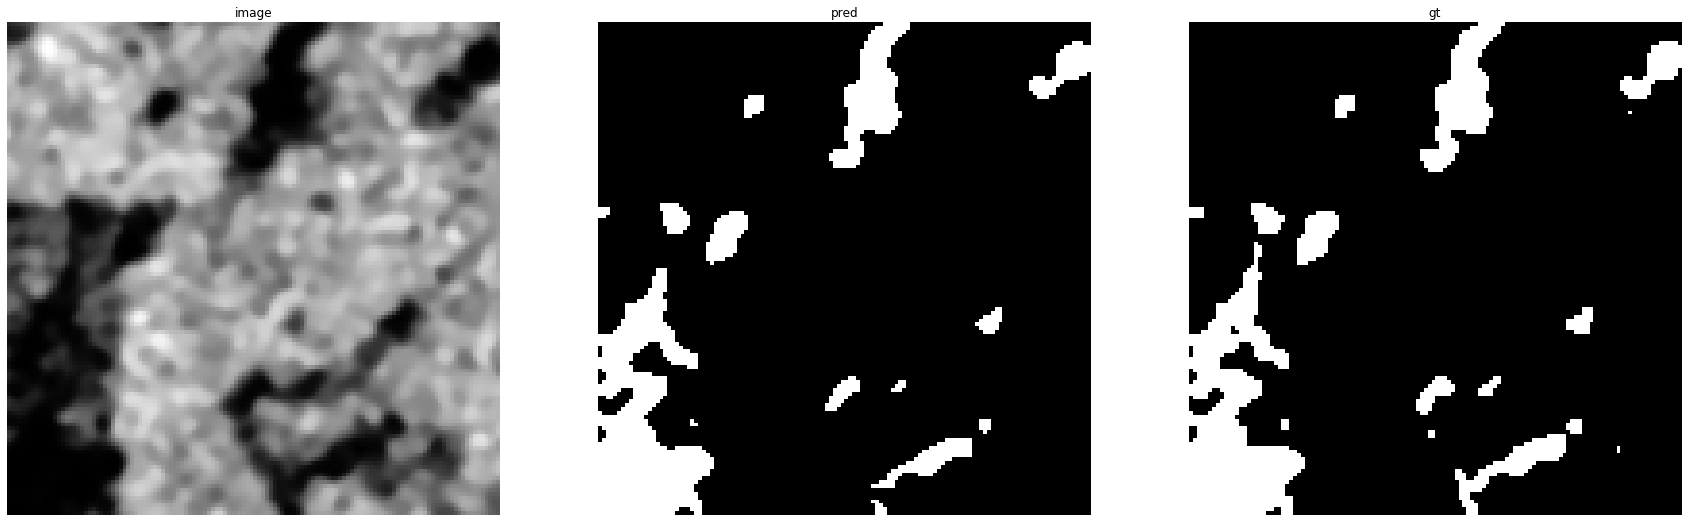

accuracy    : 0.987548828125
precision   : 0.9856991525423728
recall      : 0.9131501472031404
f1          : 0.9480387162506368
pr_auc      : 0.9953518126645748
iou         : 0.9012106537530267


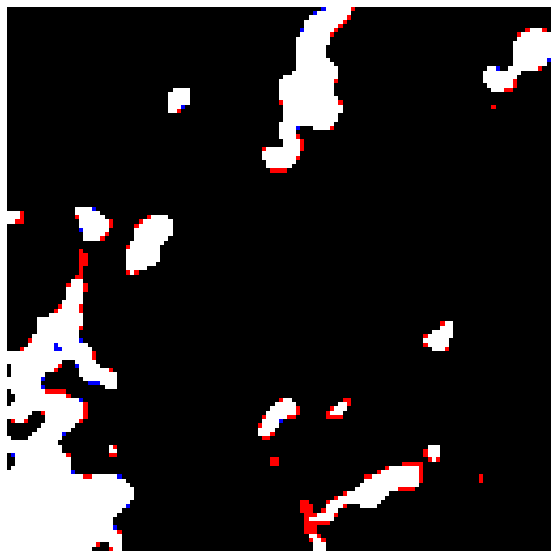

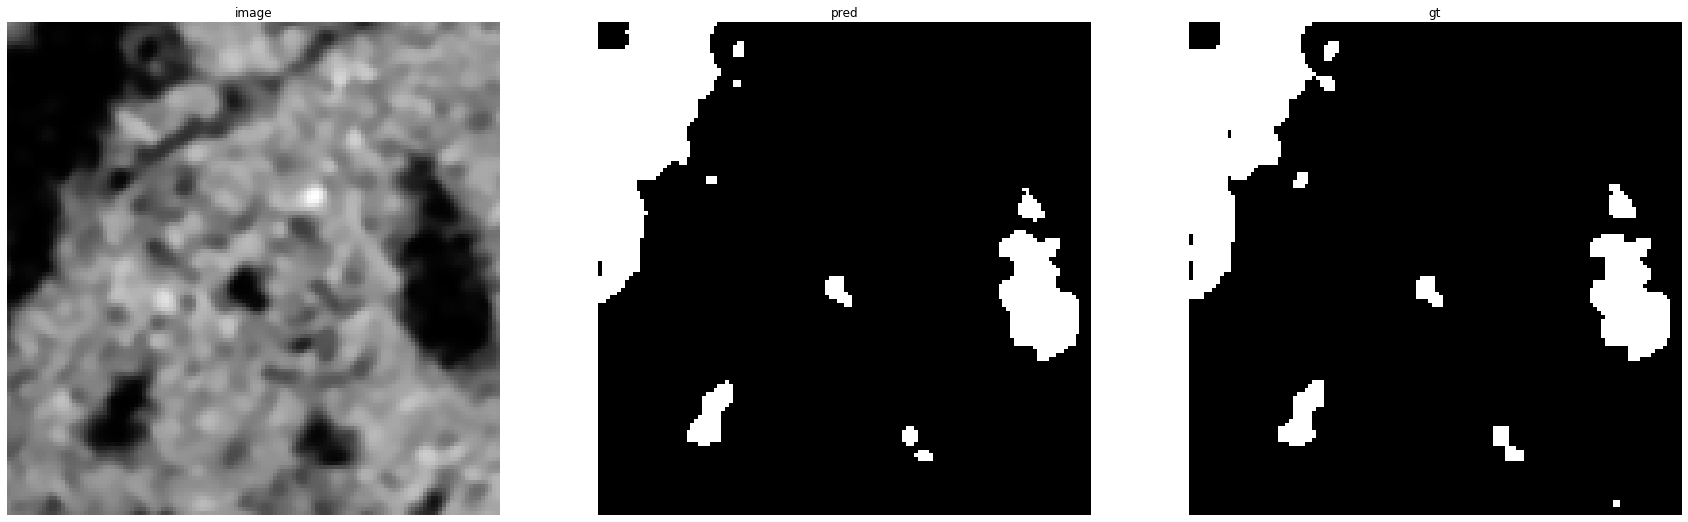

accuracy    : 0.993896484375
precision   : 0.985812133072407
recall      : 0.9659635666347076
f1          : 0.9757869249394673
pr_auc      : 0.9982966812920341
iou         : 0.9527186761229315


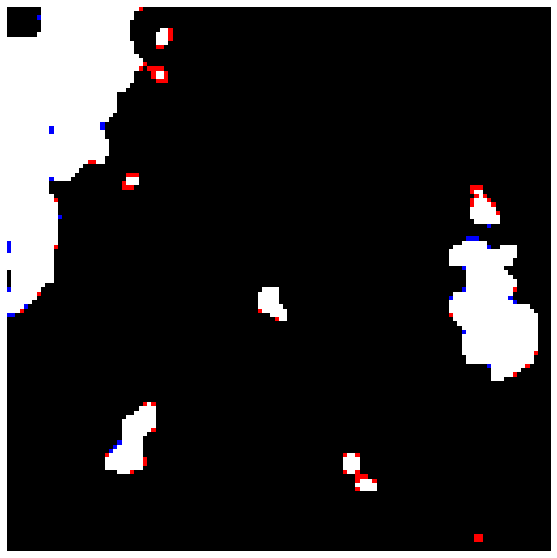

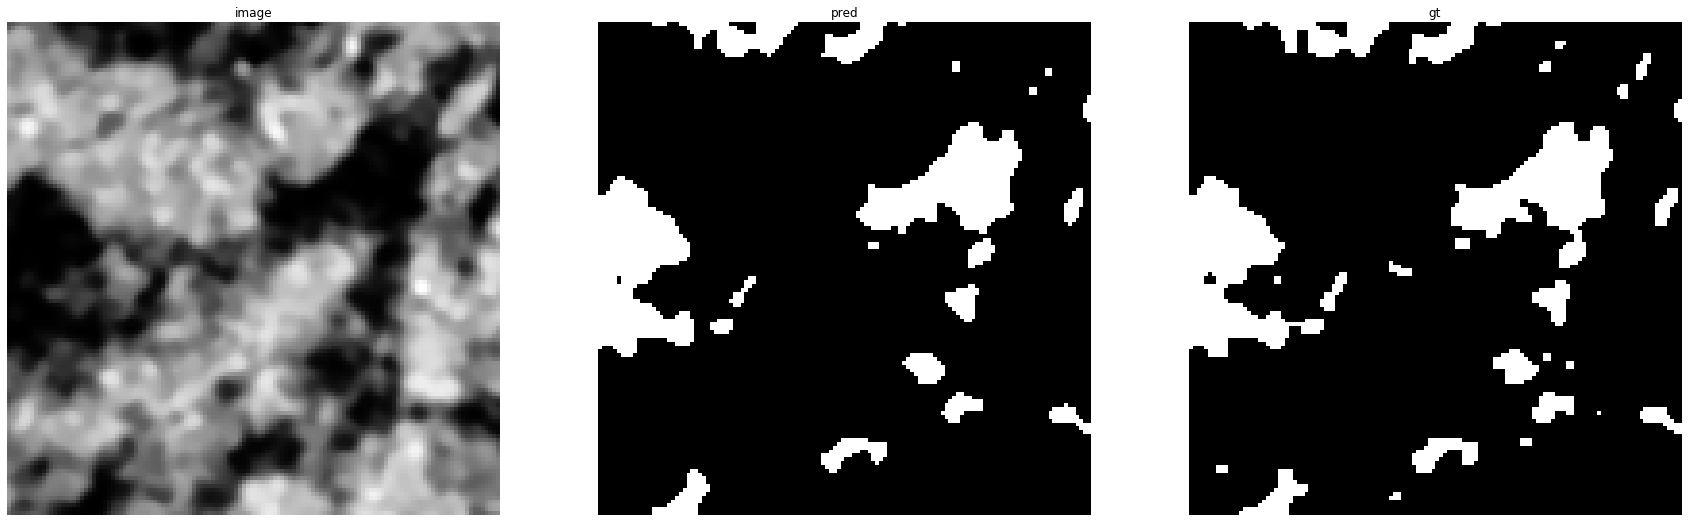

accuracy    : 0.98284912109375
precision   : 0.9845031905195989
recall      : 0.8973826339842127
f1          : 0.938926320365138
pr_auc      : 0.9930354918691313
iou         : 0.8848832445718967


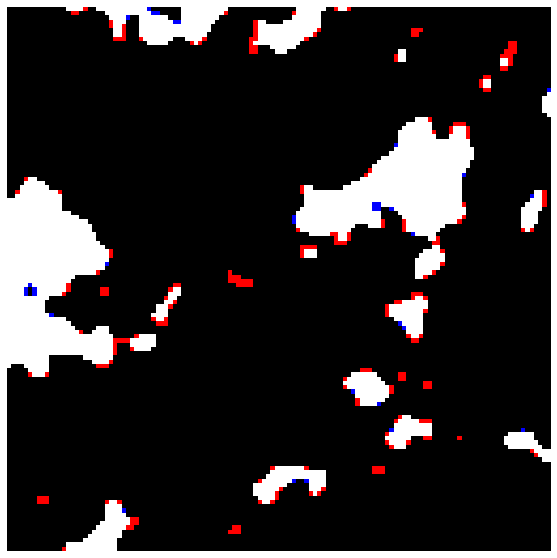

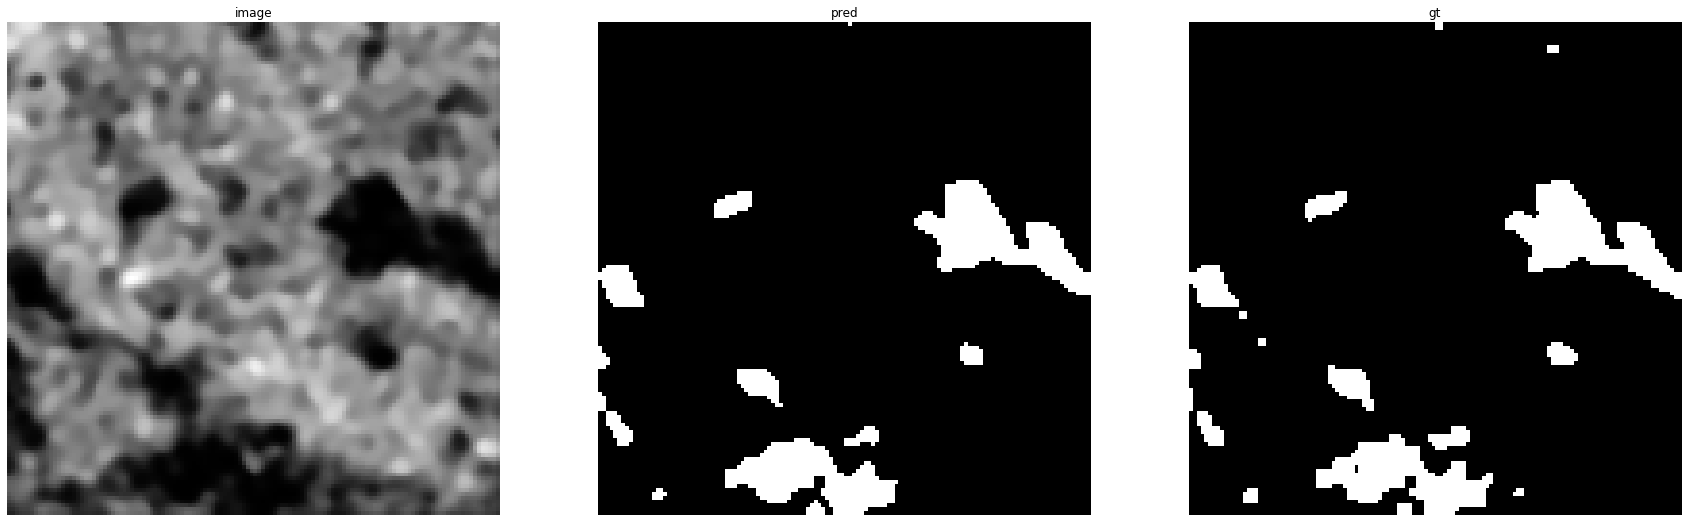

accuracy    : 0.99114990234375
precision   : 0.977110157367668
recall      : 0.9235970250169033
f1          : 0.9496002780674314
pr_auc      : 0.9925000797875816
iou         : 0.9040370615486433


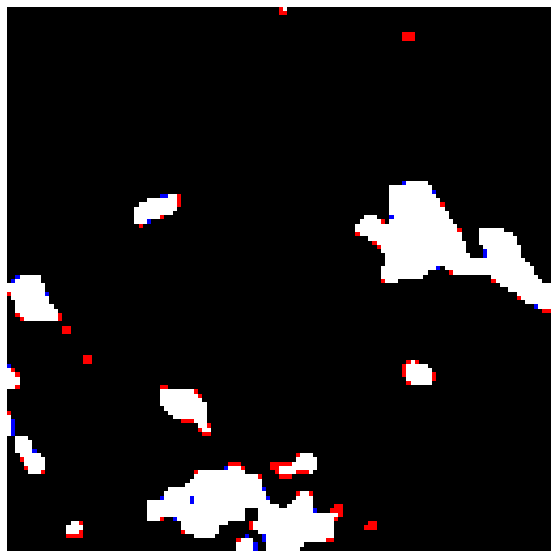

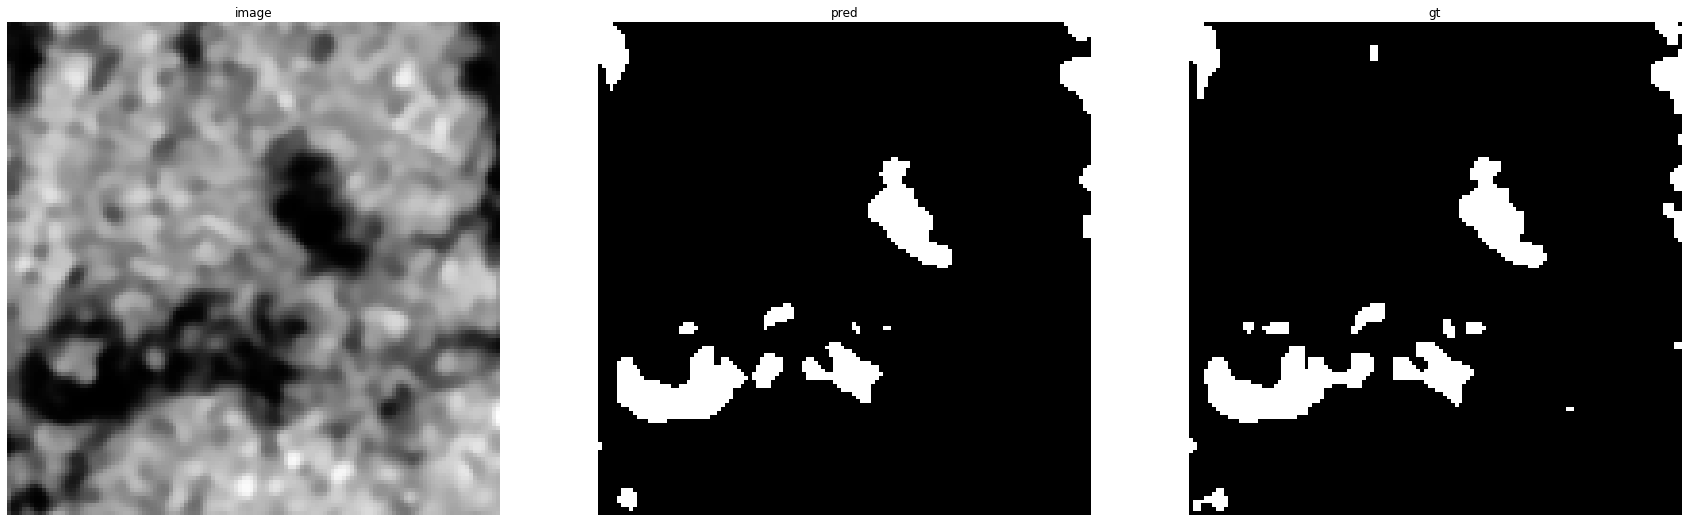

accuracy    : 0.989501953125
precision   : 0.984822934232715
recall      : 0.8835098335854765
f1          : 0.9314194577352471
pr_auc      : 0.9933556165418553
iou         : 0.8716417910447761


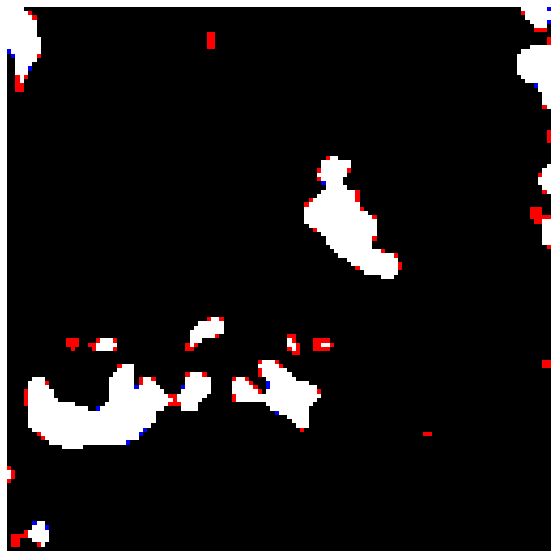

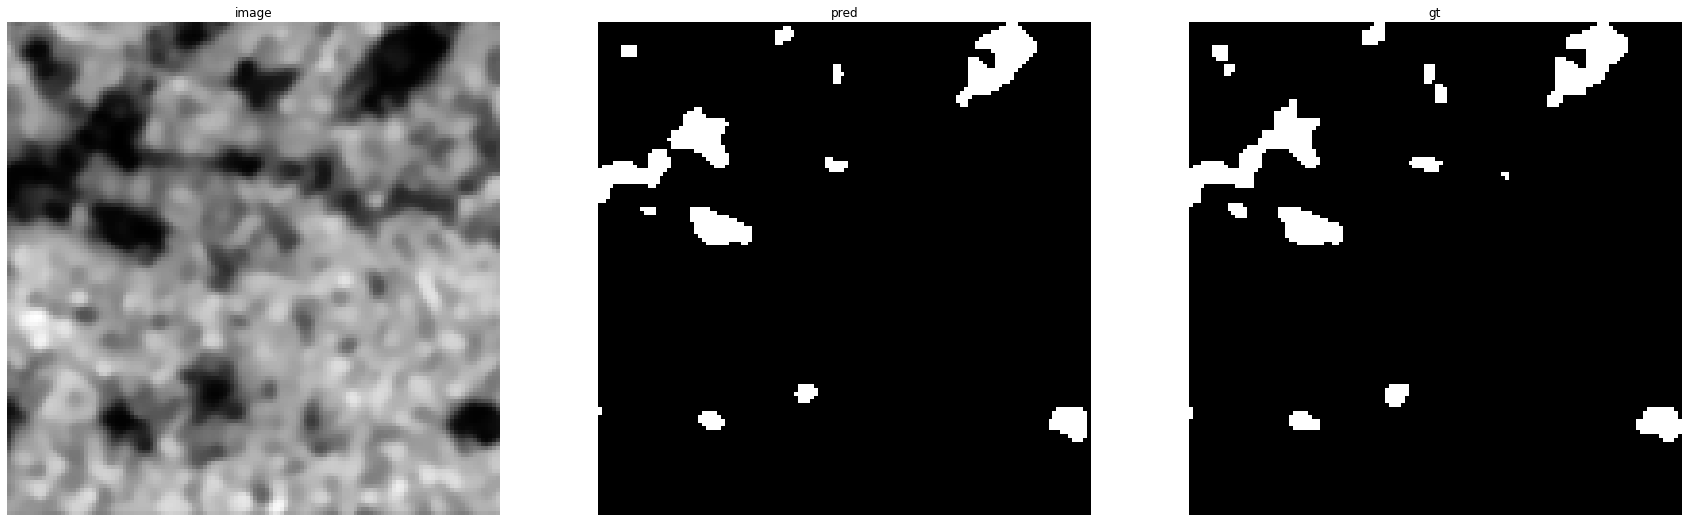

accuracy    : 0.99127197265625
precision   : 0.9872611464968153
recall      : 0.8535242290748899
f1          : 0.9155345540460721
pr_auc      : 0.9880343524448476
iou         : 0.8442265795206971


Prediction for SoilB-2:


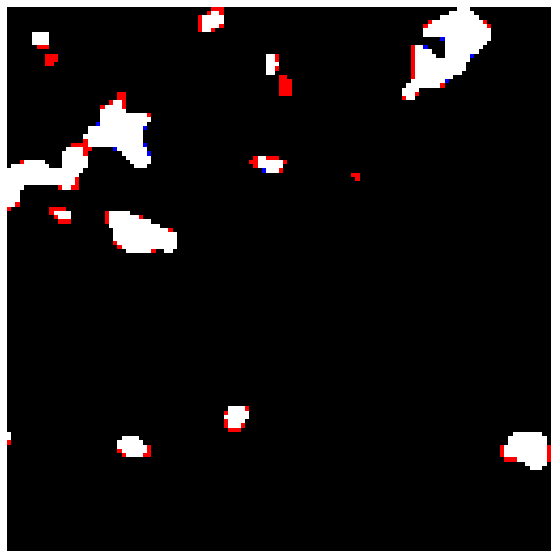

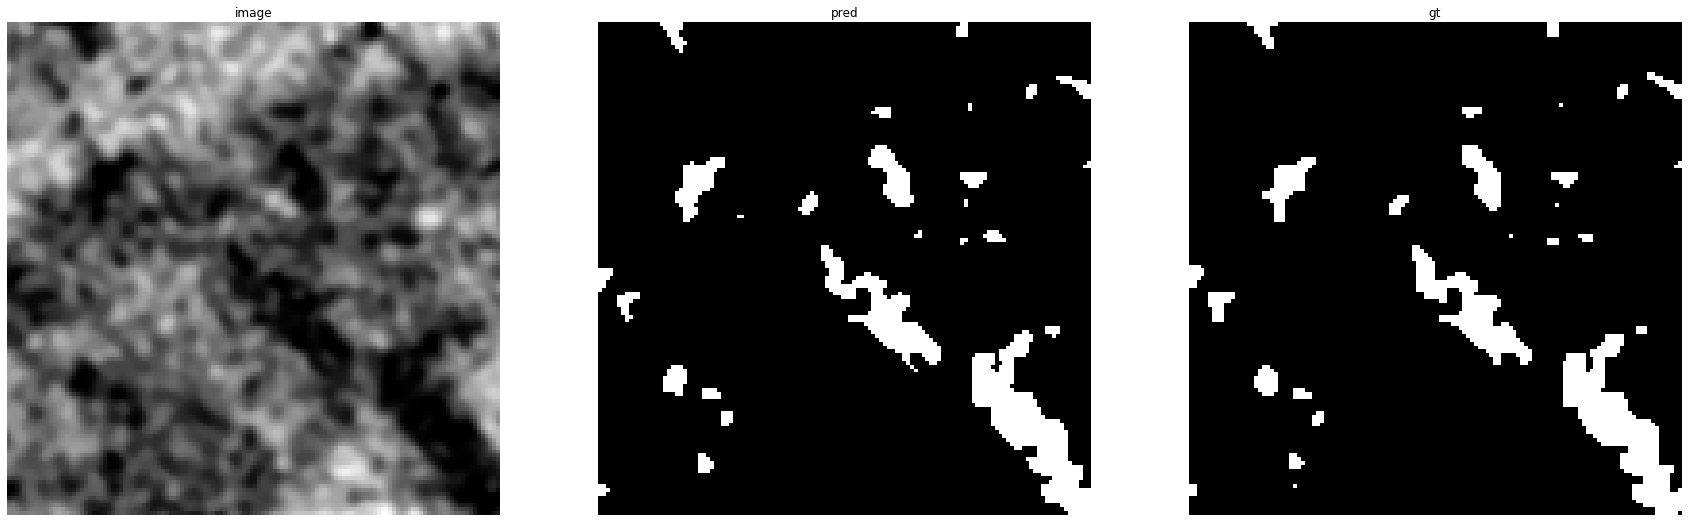

accuracy    : 0.9906005859375
precision   : 0.9394166043380703
recall      : 0.945071482317532
f1          : 0.9422355588897223
pr_auc      : 0.9899539921418095
iou         : 0.8907801418439716


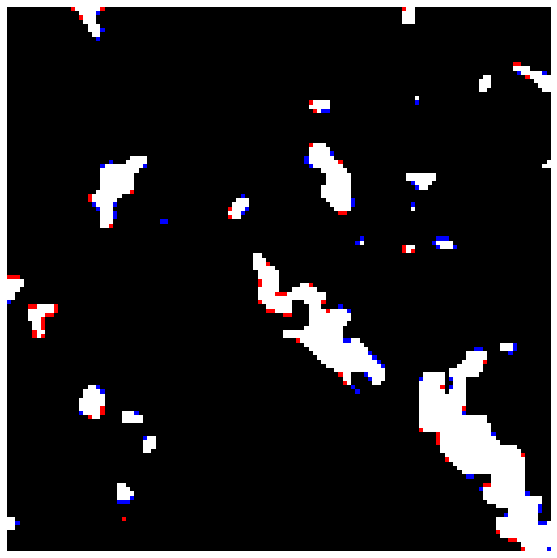

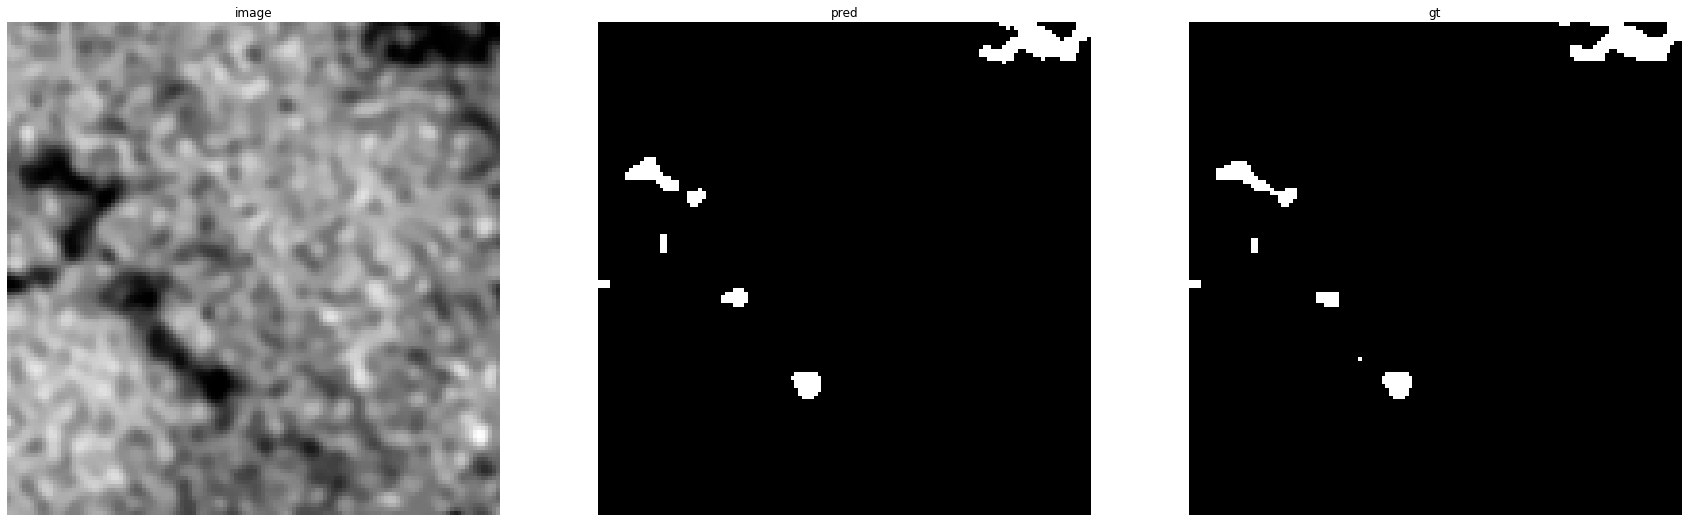

accuracy    : 0.9974365234375
precision   : 0.9429429429429429
recall      : 0.9317507418397626
f1          : 0.9373134328358209
pr_auc      : 0.9894589635171067
iou         : 0.8820224719101124


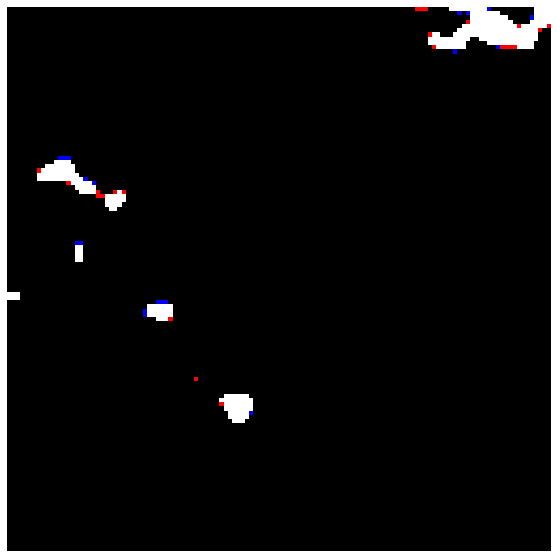

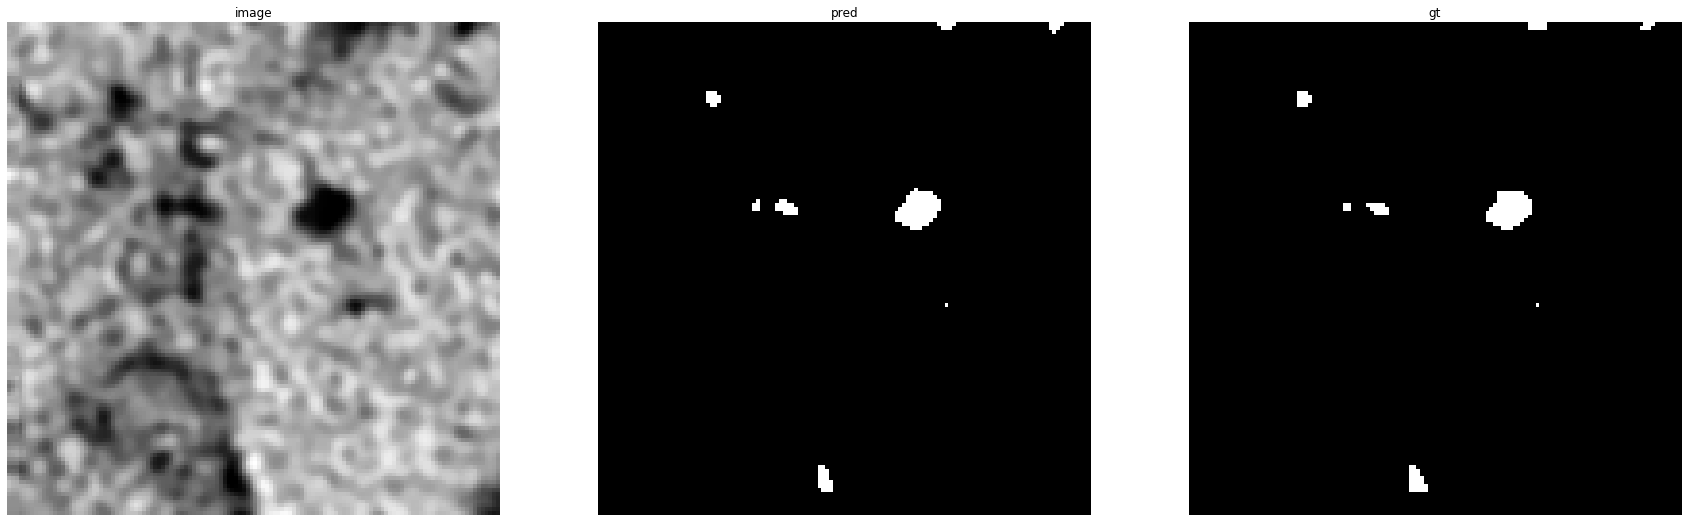

accuracy    : 0.9990234375
precision   : 0.9565217391304348
recall      : 0.9447852760736196
f1          : 0.9506172839506172
pr_auc      : 0.9935336052264352
iou         : 0.9058823529411765


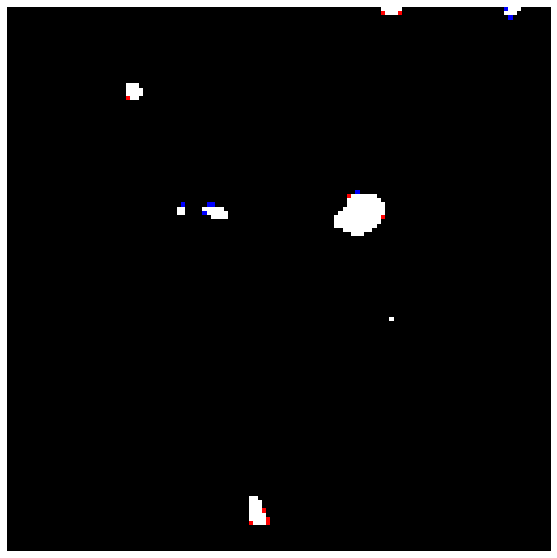

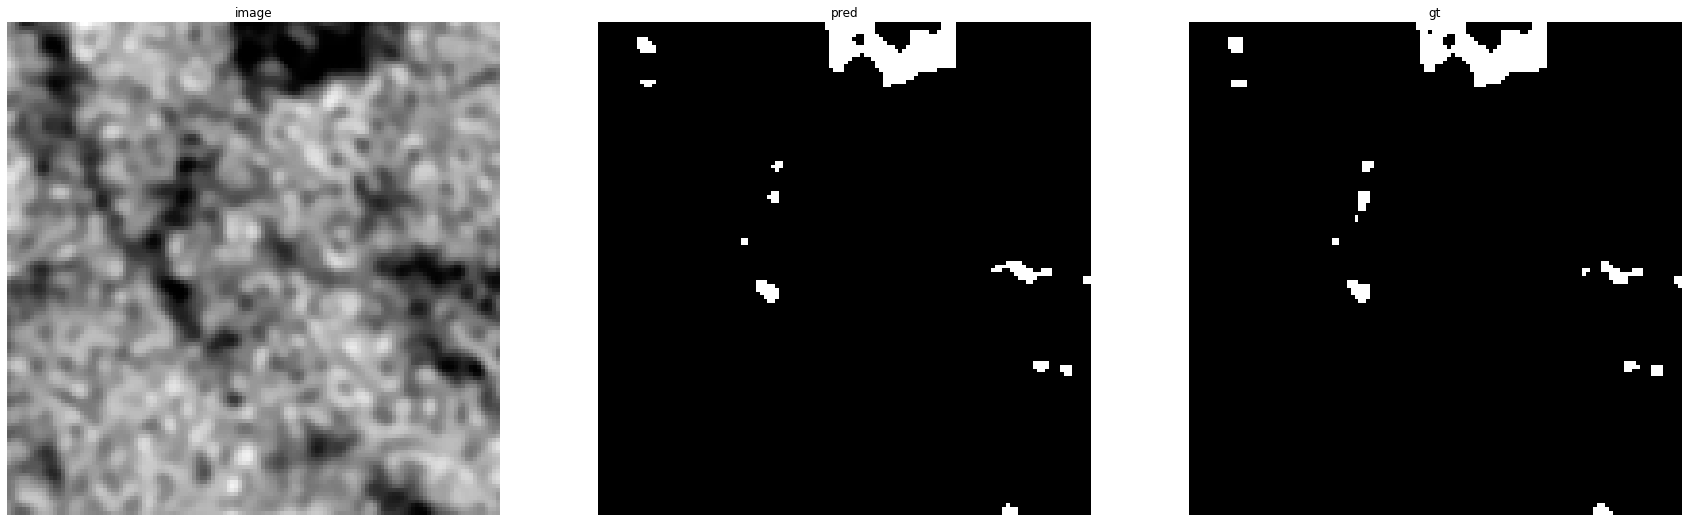

accuracy    : 0.99700927734375
precision   : 0.9582463465553236
recall      : 0.9405737704918032
f1          : 0.9493278179937953
pr_auc      : 0.9910028674304141
iou         : 0.9035433070866141


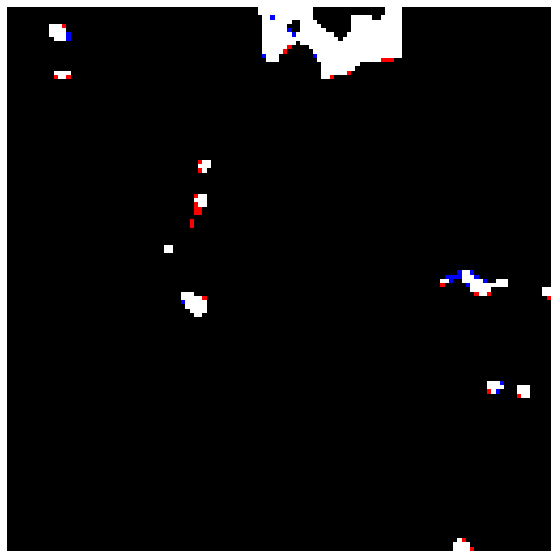

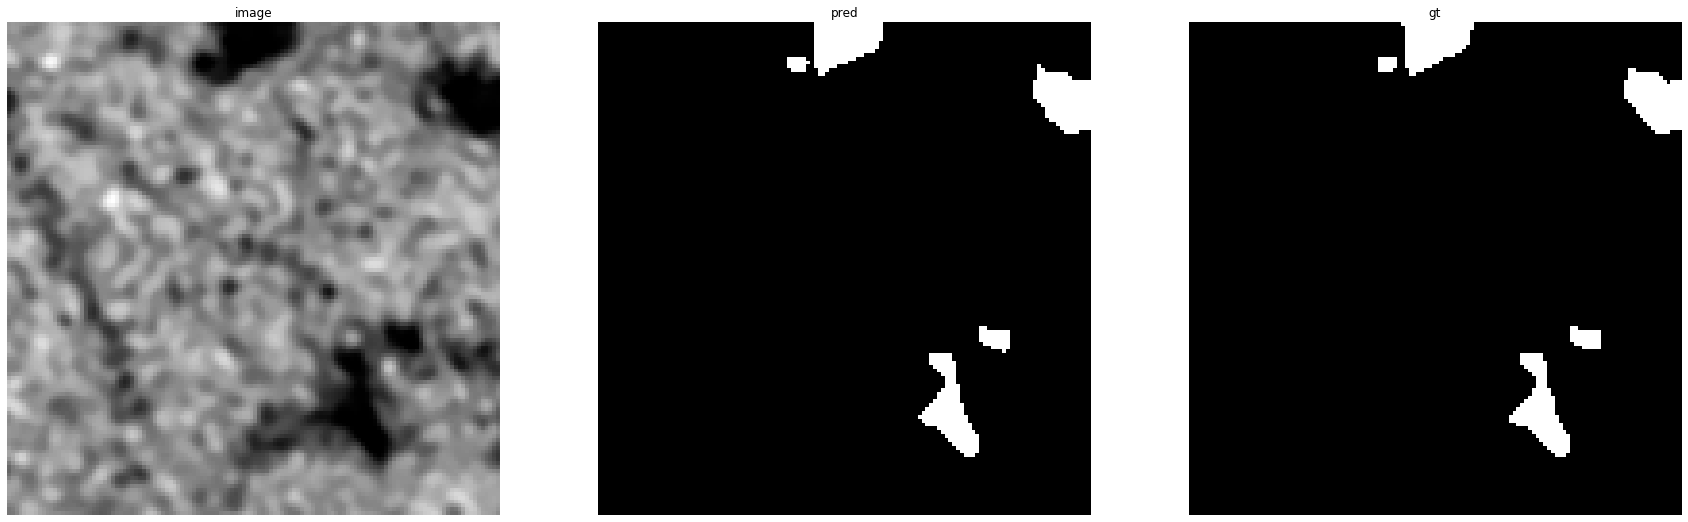

accuracy    : 0.9986572265625
precision   : 0.9759615384615384
recall      : 0.9886363636363636
f1          : 0.9822580645161291
pr_auc      : 0.9992096172774629
iou         : 0.96513470681458


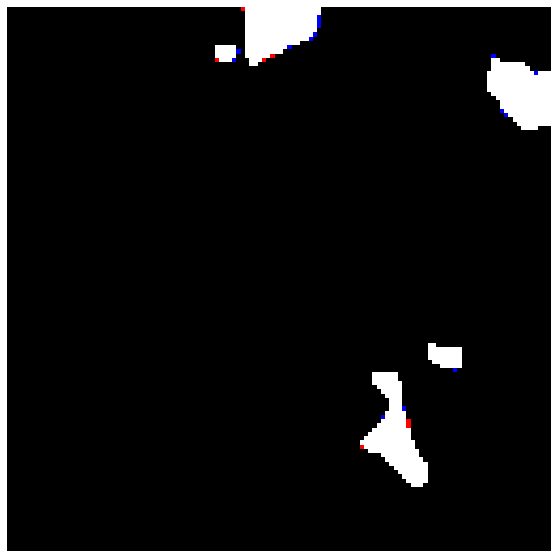

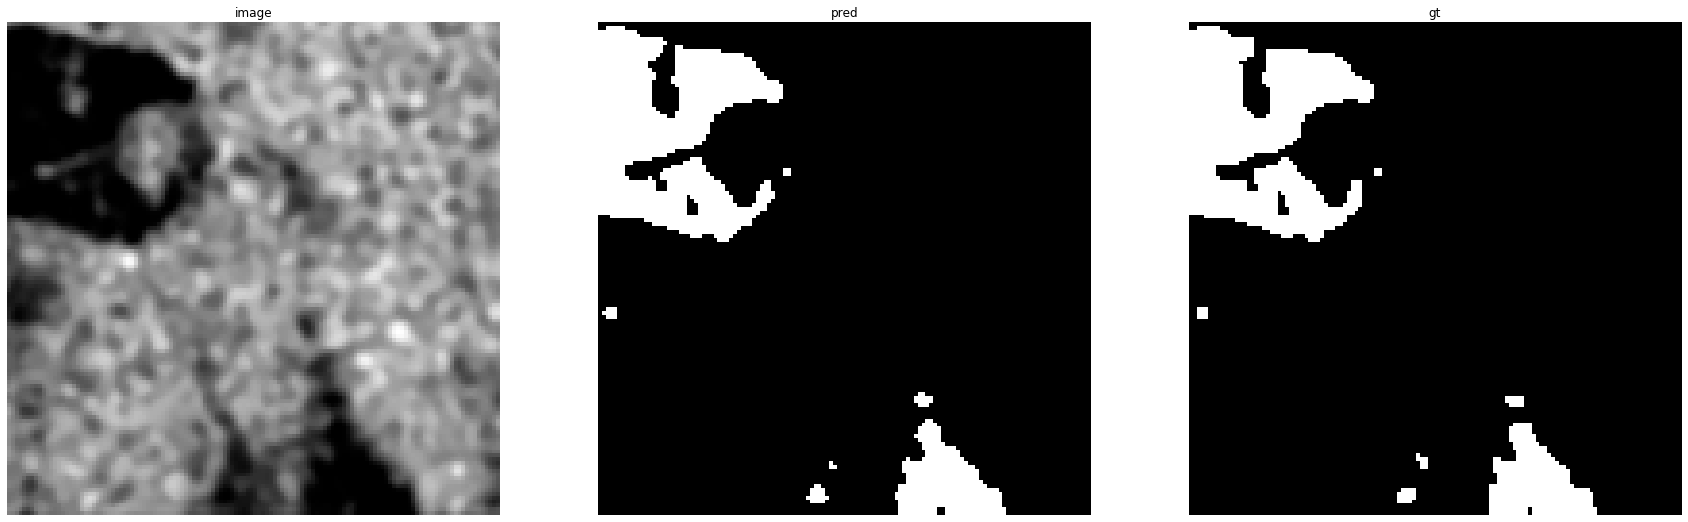

accuracy    : 0.995361328125
precision   : 0.9805389221556886
recall      : 0.9815184815184815
f1          : 0.981028457314029
pr_auc      : 0.9988656400410019
iou         : 0.9627633512983832


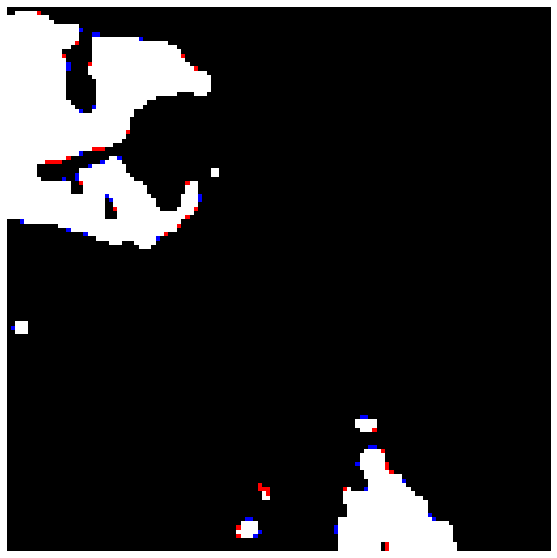

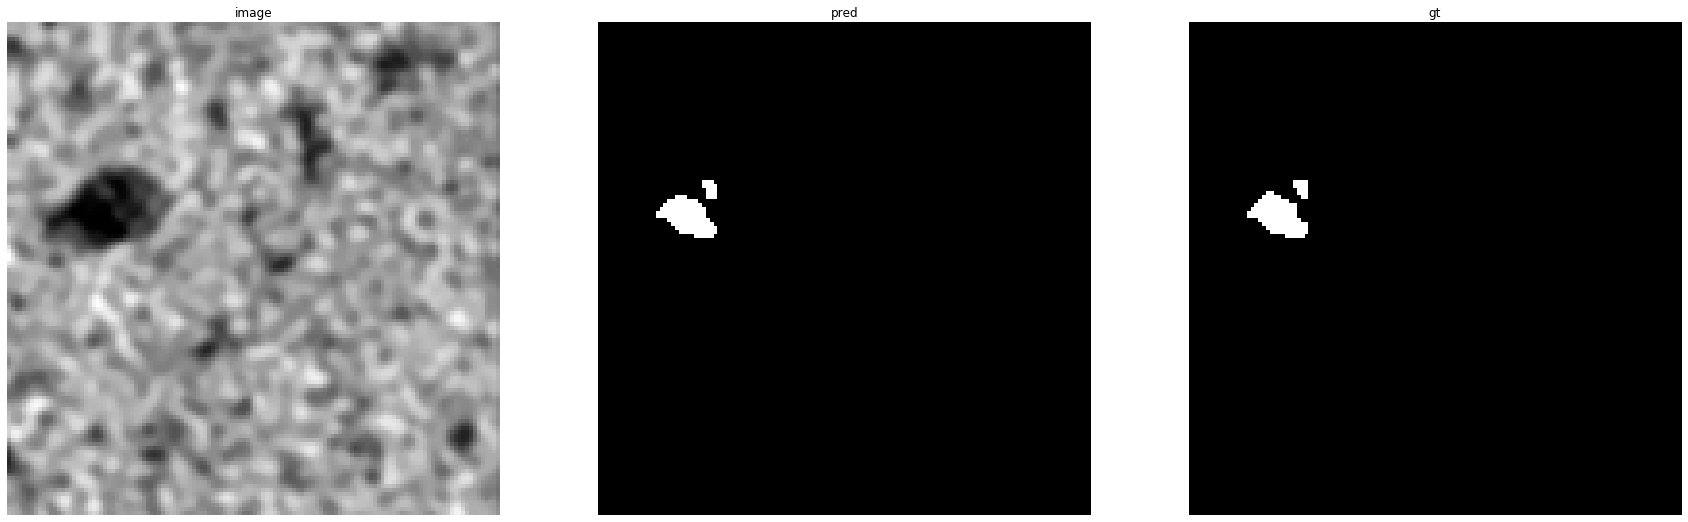

accuracy    : 0.99951171875
precision   : 0.991869918699187
recall      : 0.9457364341085271
f1          : 0.9682539682539683
pr_auc      : 0.9981871763370707
iou         : 0.9384615384615385


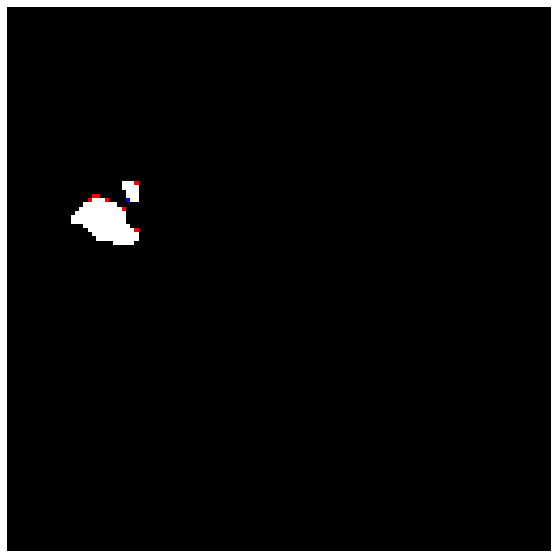

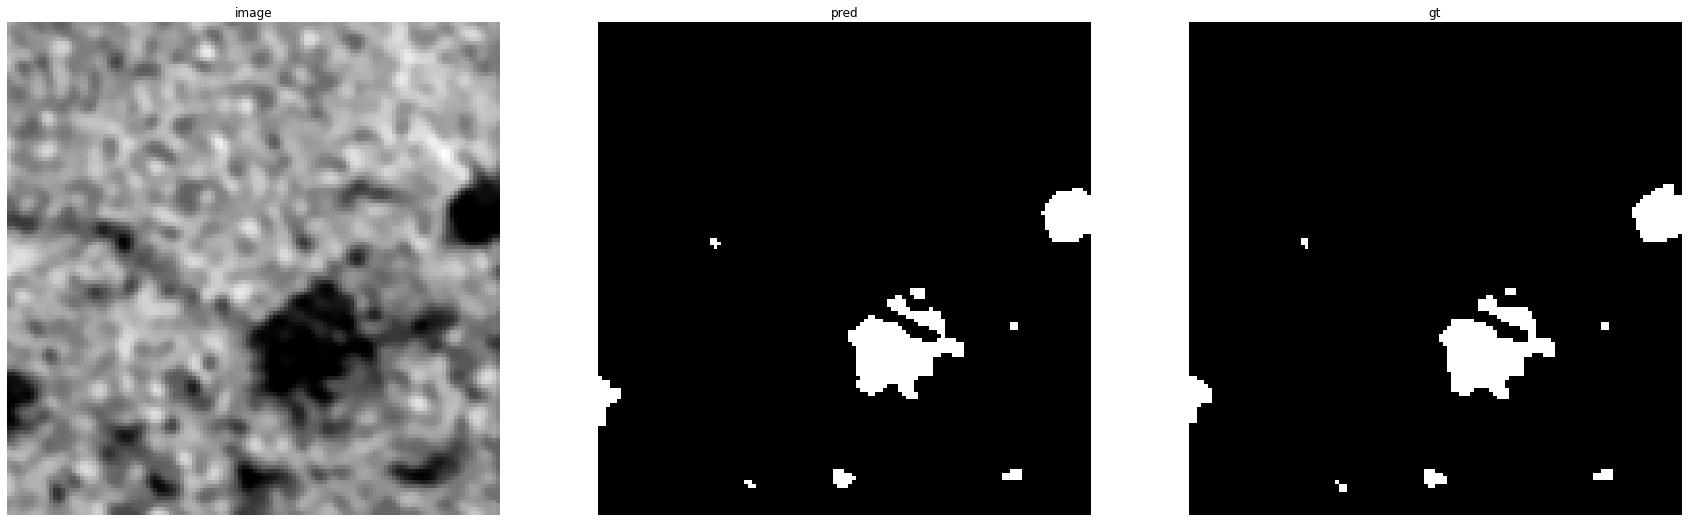

accuracy    : 0.99676513671875
precision   : 0.9682779456193353
recall      : 0.9524517087667161
f1          : 0.9602996254681648
pr_auc      : 0.9957928191525348
iou         : 0.9236311239193083


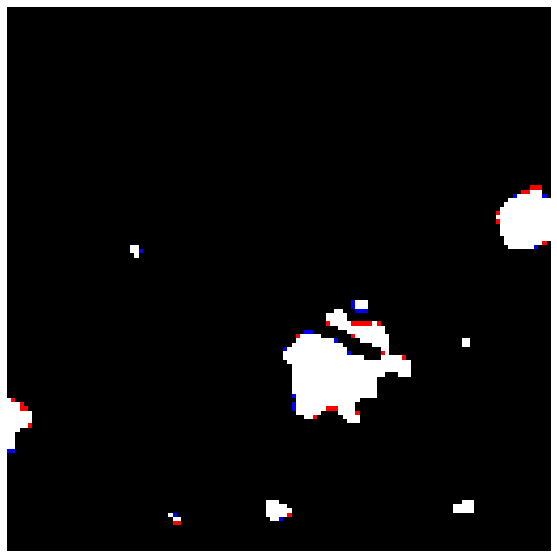

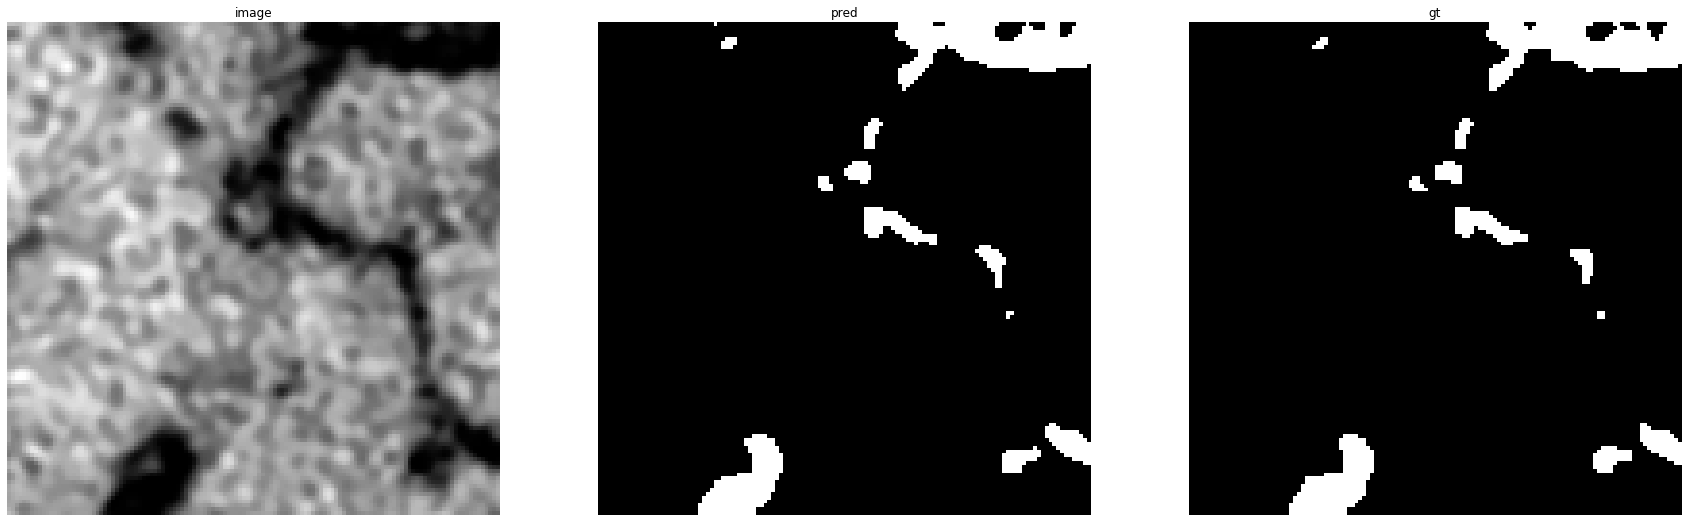

accuracy    : 0.99560546875
precision   : 0.9636363636363636
recall      : 0.9706959706959707
f1          : 0.9671532846715328
pr_auc      : 0.9964843899889814
iou         : 0.9363957597173145


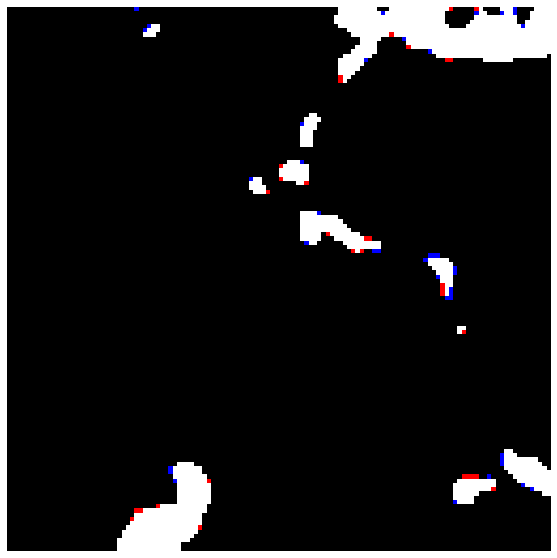

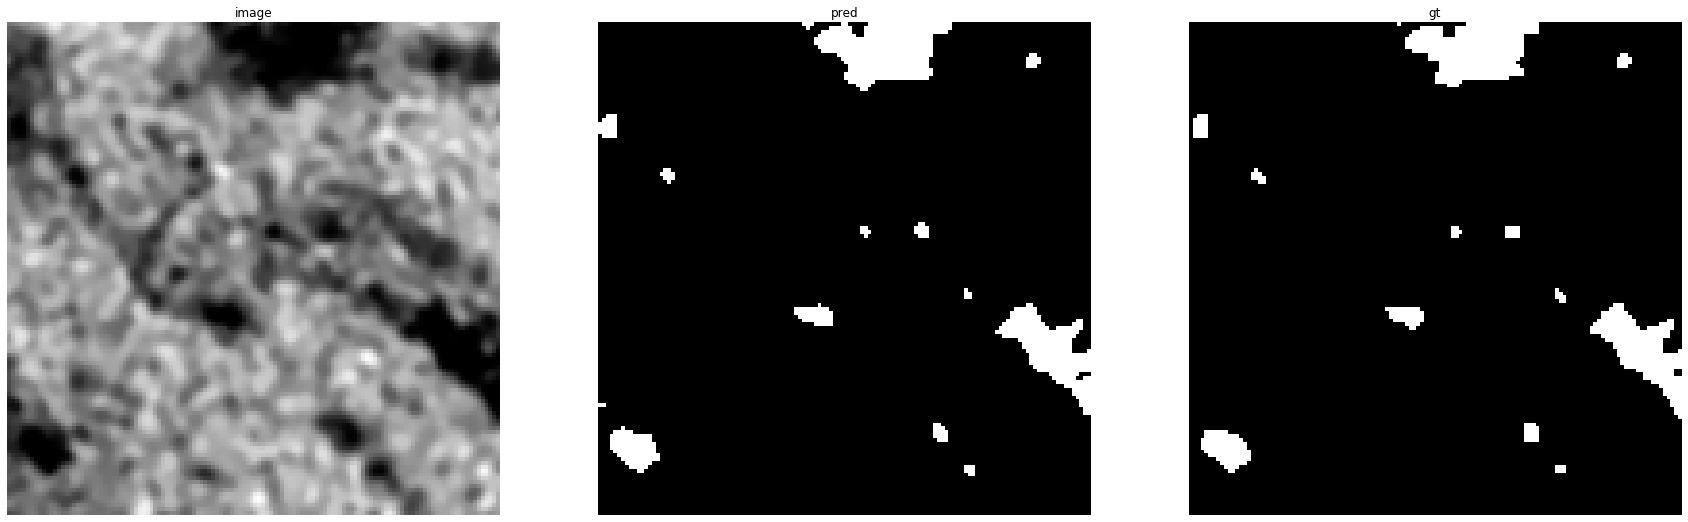

accuracy    : 0.99517822265625
precision   : 0.9458023379383634
recall      : 0.9694989106753813
f1          : 0.9575040344271114
pr_auc      : 0.995288959432607
iou         : 0.9184726522187823


Prediction for TeTree_subset1:


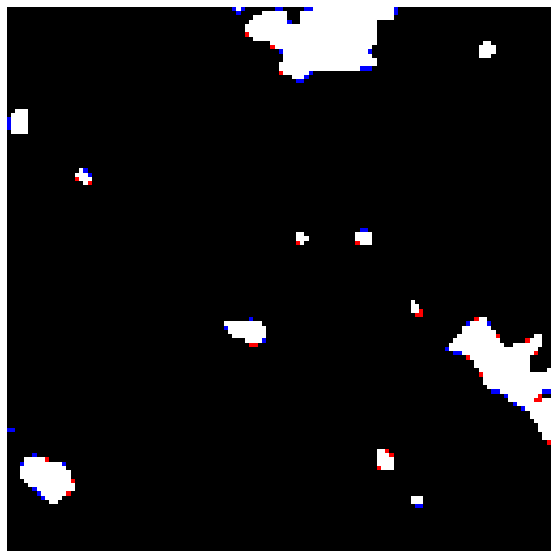

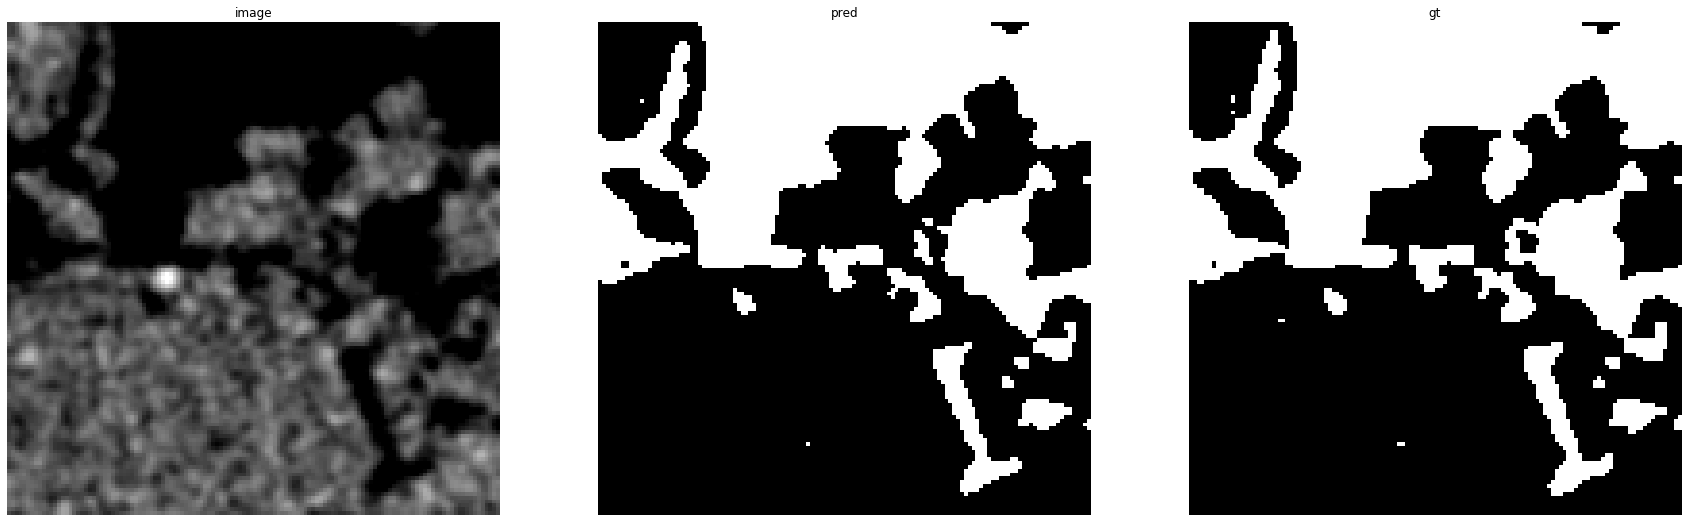

accuracy    : 0.98687744140625
precision   : 0.9986399183951037
recall      : 0.9659595461272817
f1          : 0.9820279194182062
pr_auc      : 0.9994865001884303
iou         : 0.9646904253572015


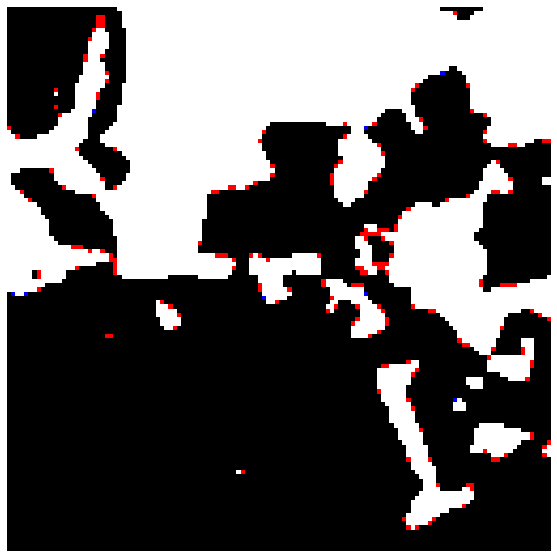

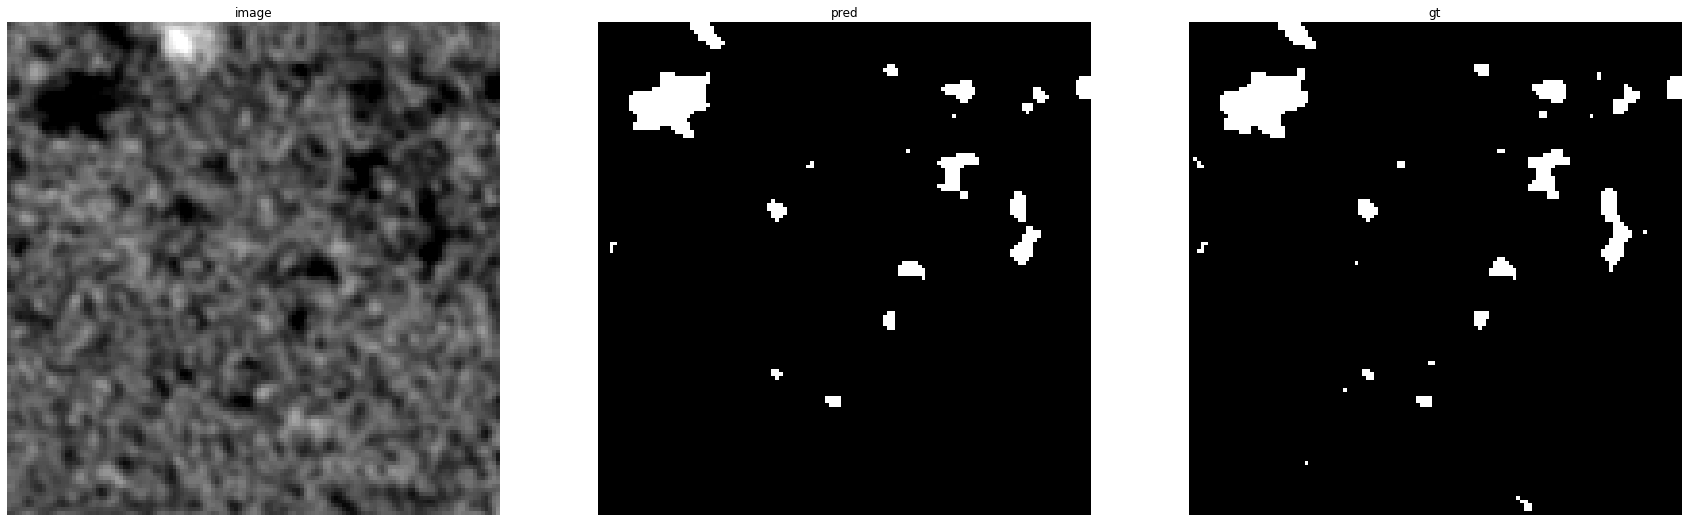

accuracy    : 0.992431640625
precision   : 0.9929203539823008
recall      : 0.8237885462555066
f1          : 0.9004815409309791
pr_auc      : 0.9891735760471656
iou         : 0.8189781021897811


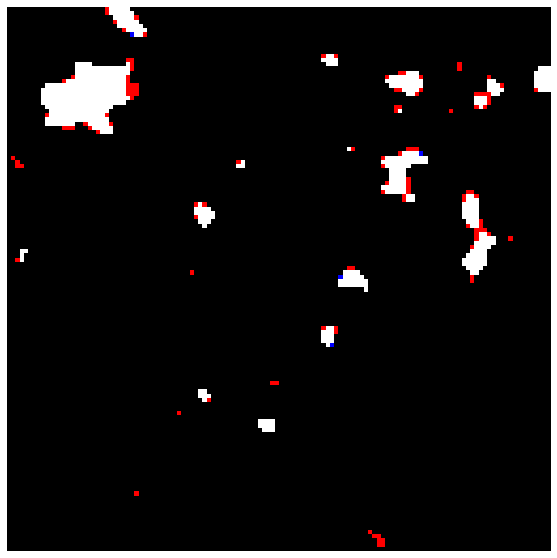

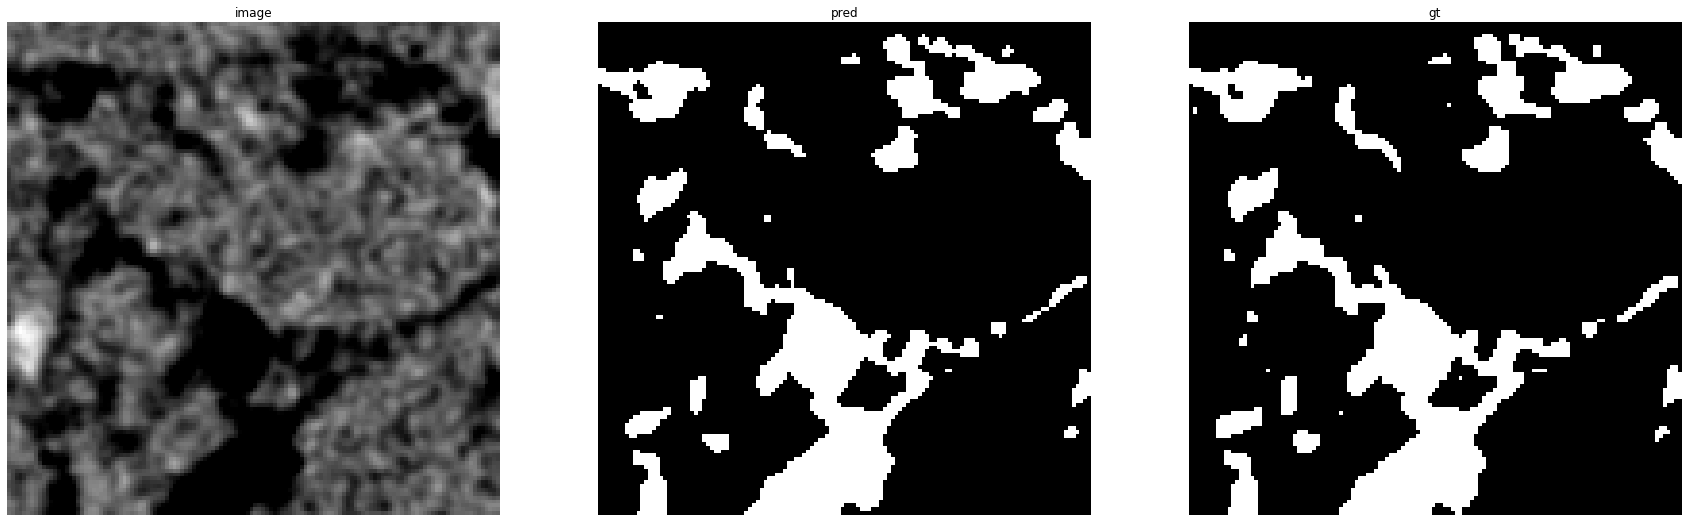

accuracy    : 0.9820556640625
precision   : 0.9904542462146149
recall      : 0.91905925473427
f1          : 0.9534220532319392
pr_auc      : 0.9969208212911735
iou         : 0.9109900090826522


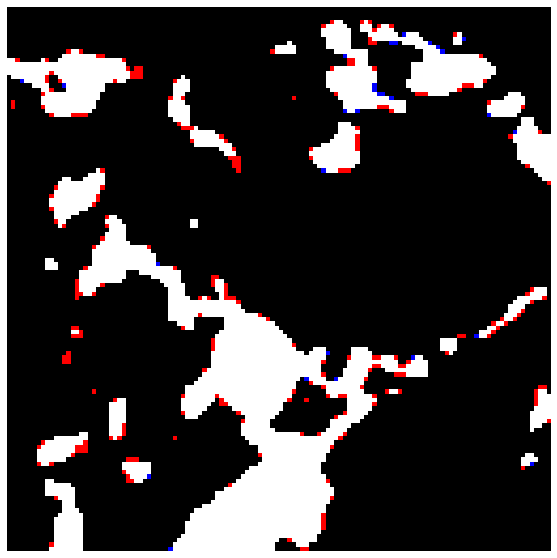

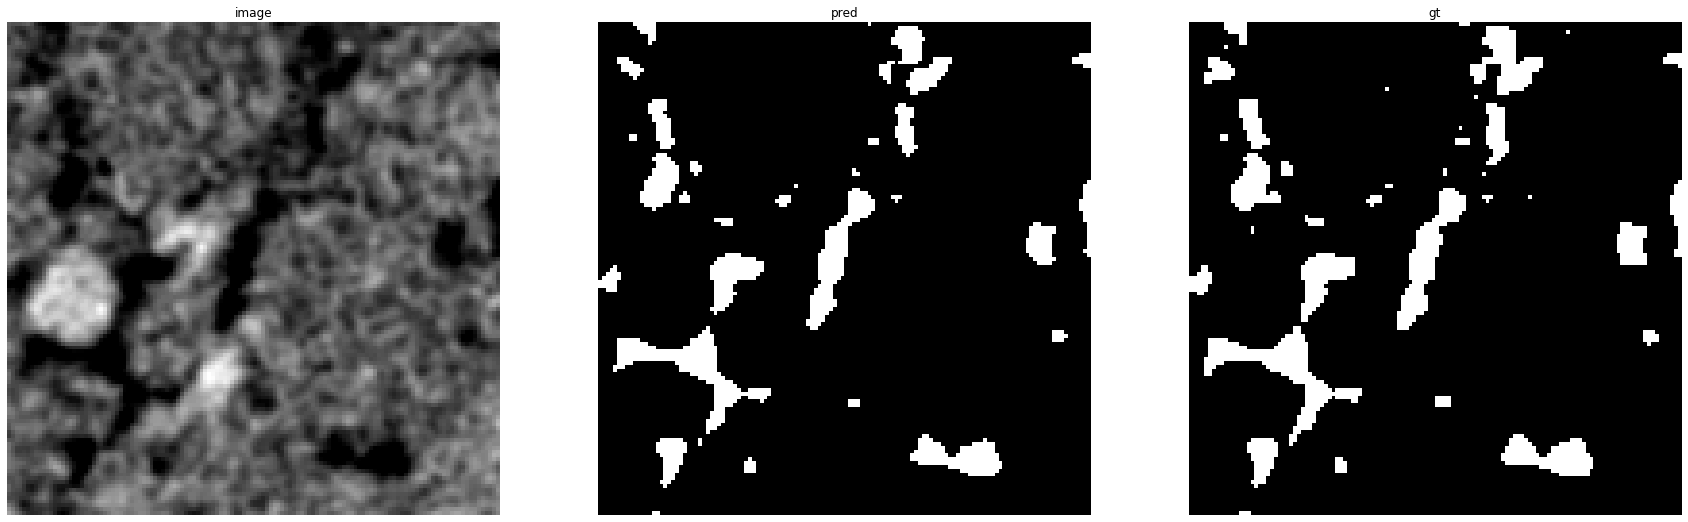

accuracy    : 0.987548828125
precision   : 0.9957894736842106
recall      : 0.8775510204081632
f1          : 0.9329388560157791
pr_auc      : 0.9933737783566481
iou         : 0.8743068391866913


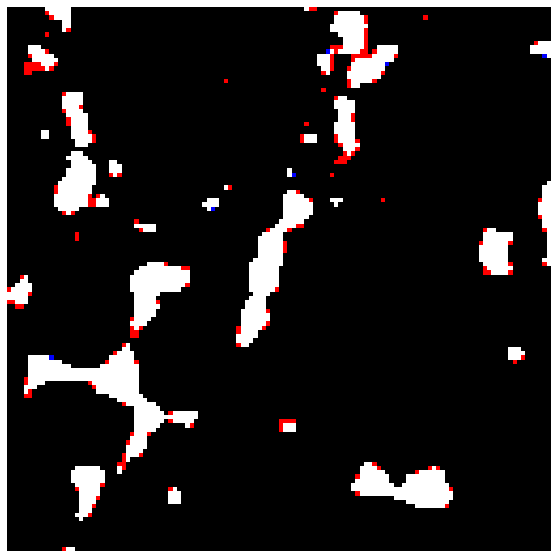

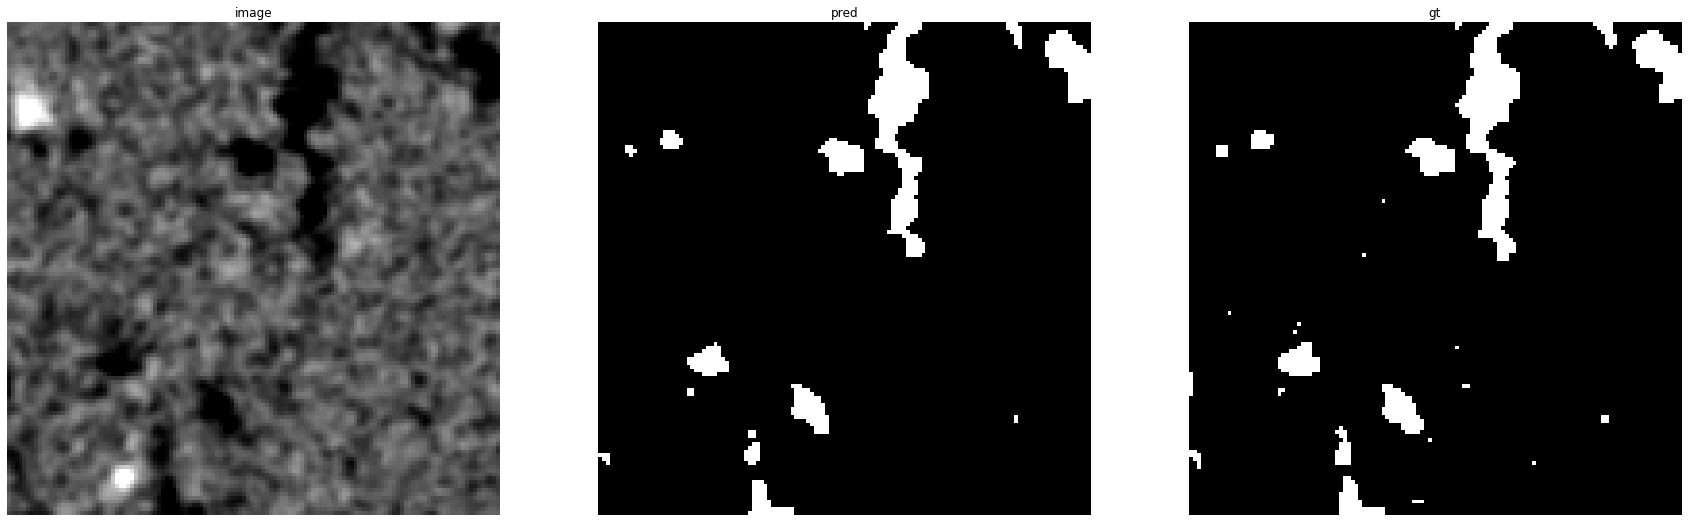

accuracy    : 0.992919921875
precision   : 0.9914712153518124
recall      : 0.8959537572254336
f1          : 0.9412955465587044
pr_auc      : 0.9966519467319365
iou         : 0.8891013384321224


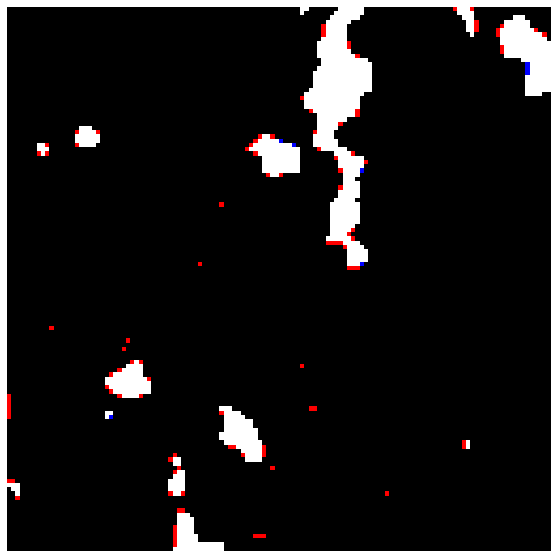

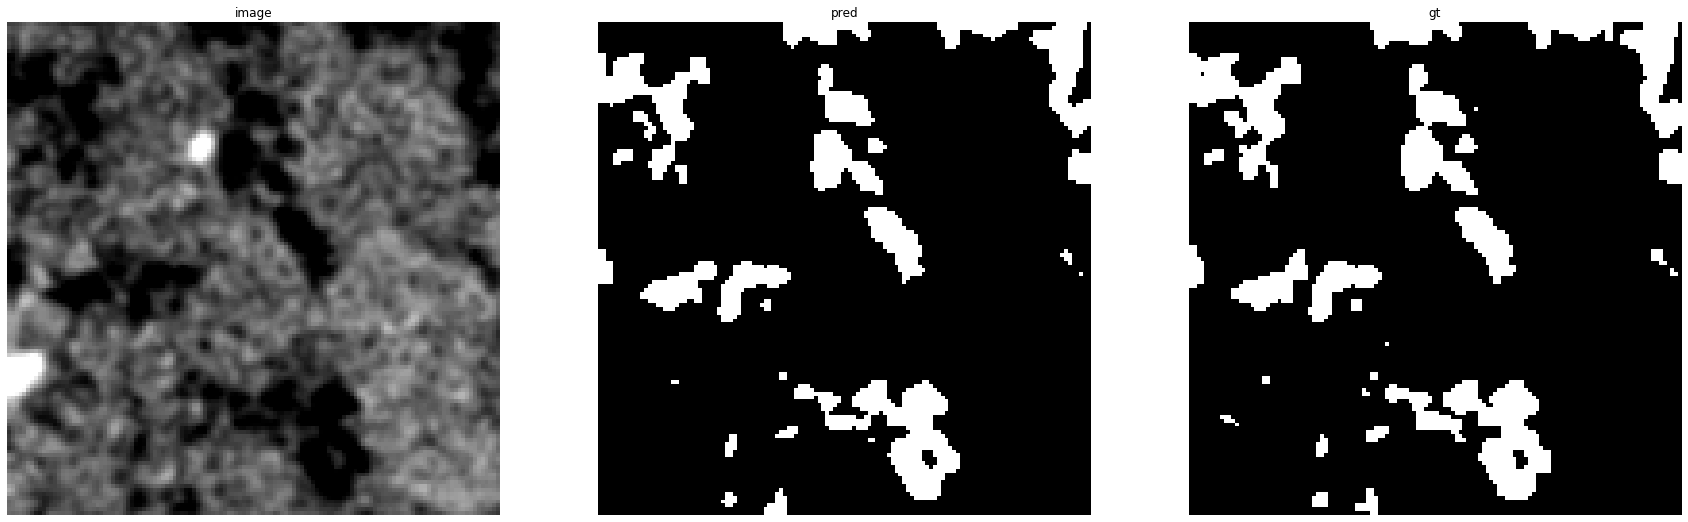

accuracy    : 0.98443603515625
precision   : 0.9904109589041096
recall      : 0.9026217228464419
f1          : 0.9444807315480079
pr_auc      : 0.9953413785126403
iou         : 0.8948019801980198


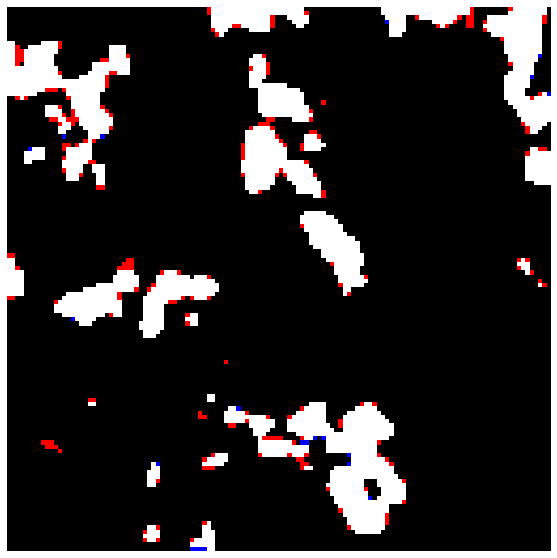

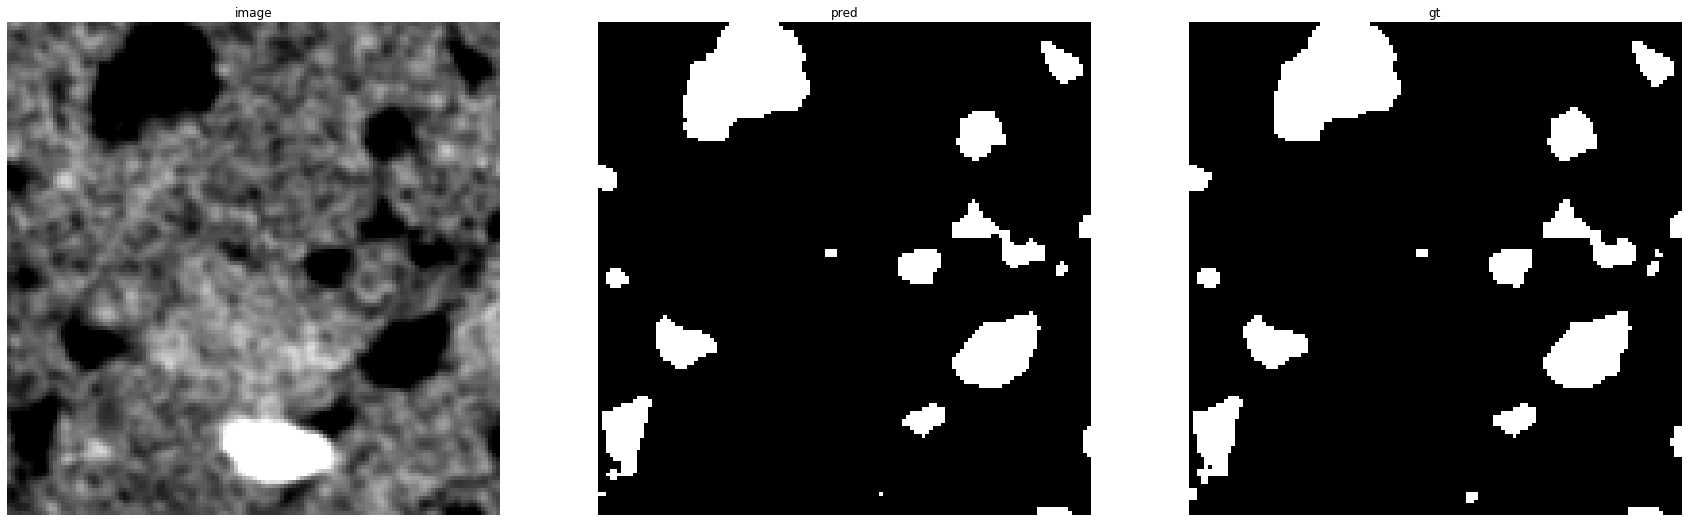

accuracy    : 0.99334716796875
precision   : 0.9952755905511811
recall      : 0.9498997995991983
f1          : 0.972058446552166
pr_auc      : 0.9988867677783972
iou         : 0.9456359102244389


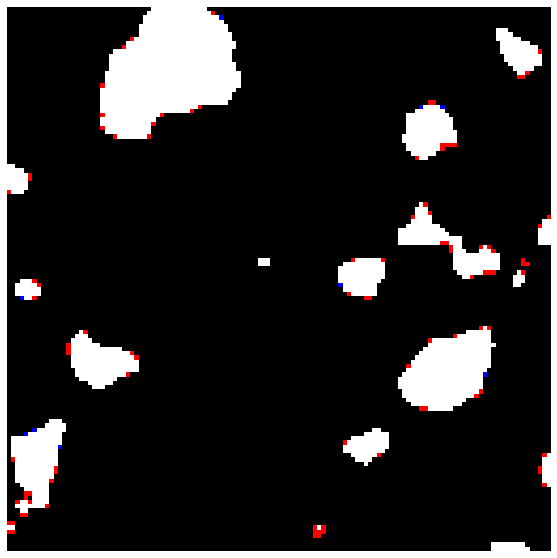

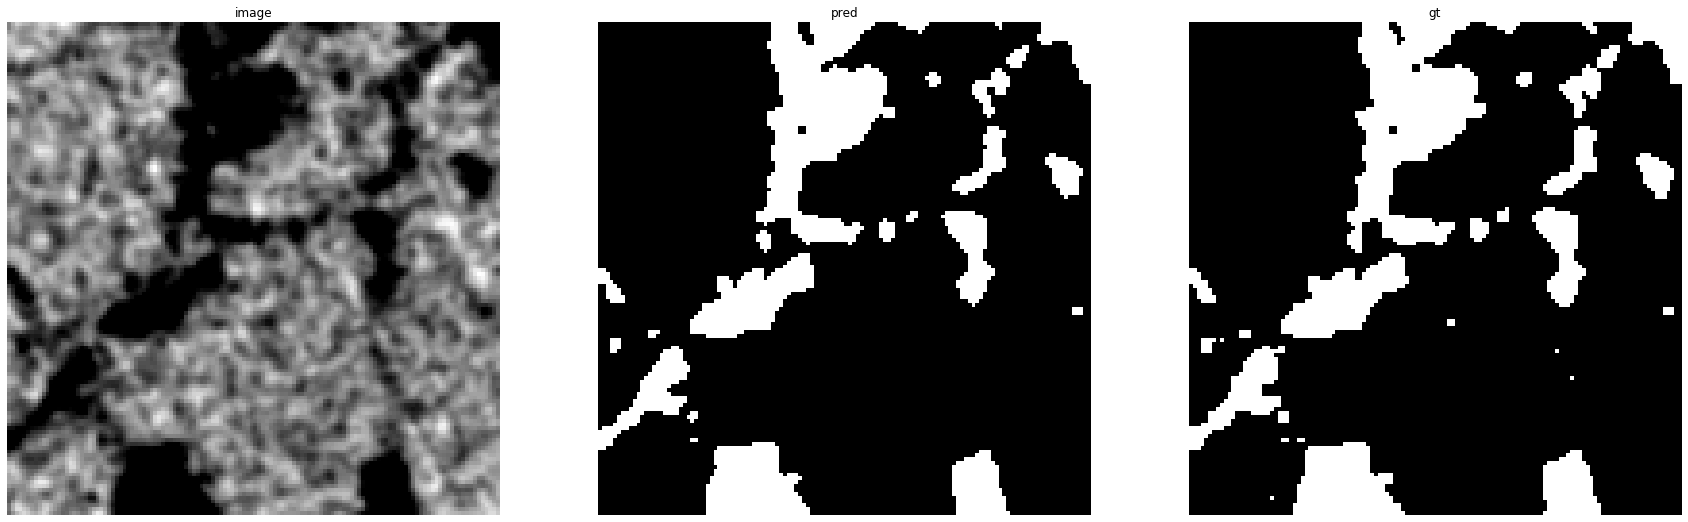

accuracy    : 0.98785400390625
precision   : 0.9962225274725275
recall      : 0.9391388798964067
f1          : 0.9668388601899685
pr_auc      : 0.9985801960211007
iou         : 0.9358064516129032


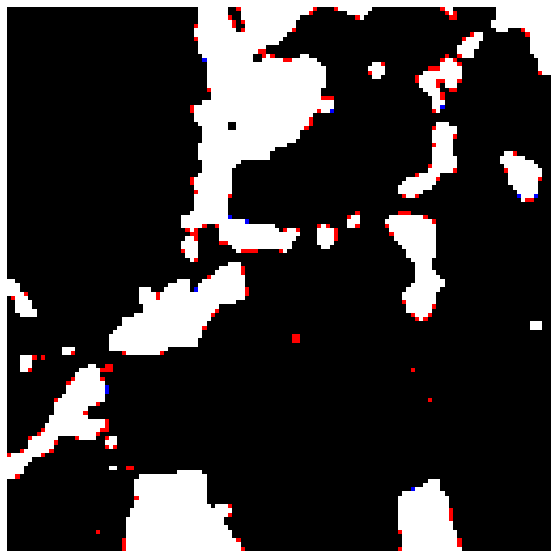

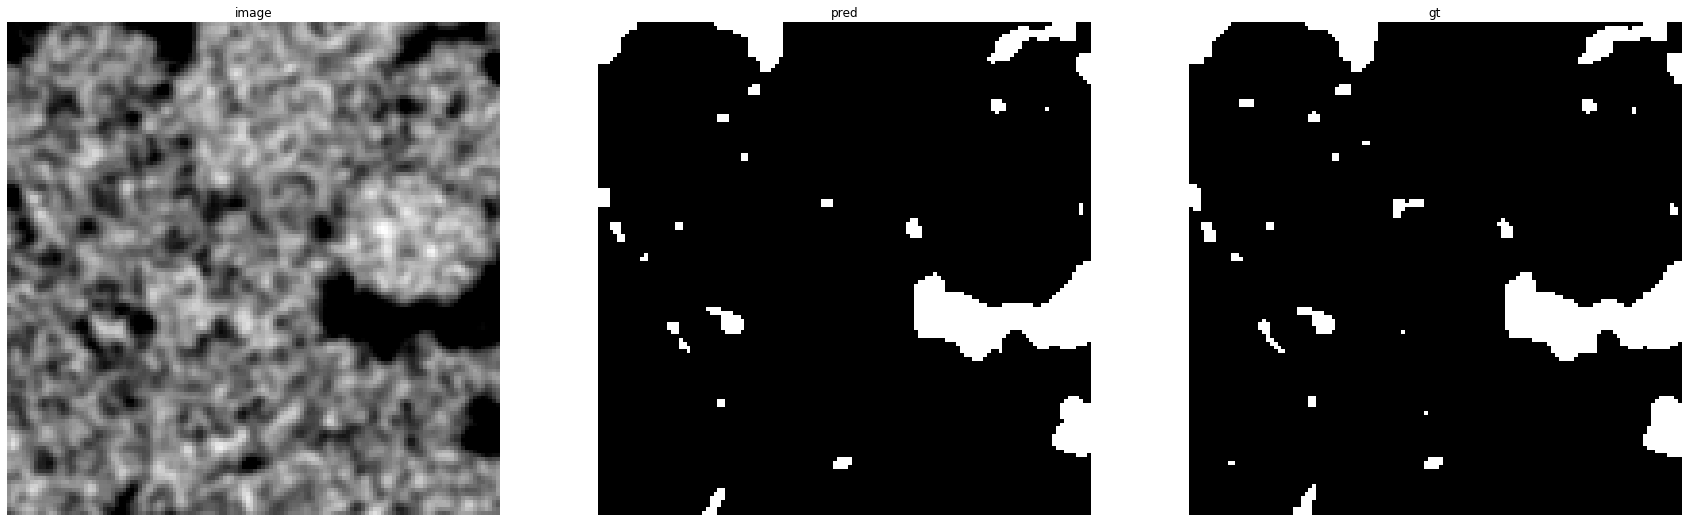

accuracy    : 0.99273681640625
precision   : 0.994431185361973
recall      : 0.9177679882525698
f1          : 0.9545628102329133
pr_auc      : 0.9968934517318264
iou         : 0.9130752373995618


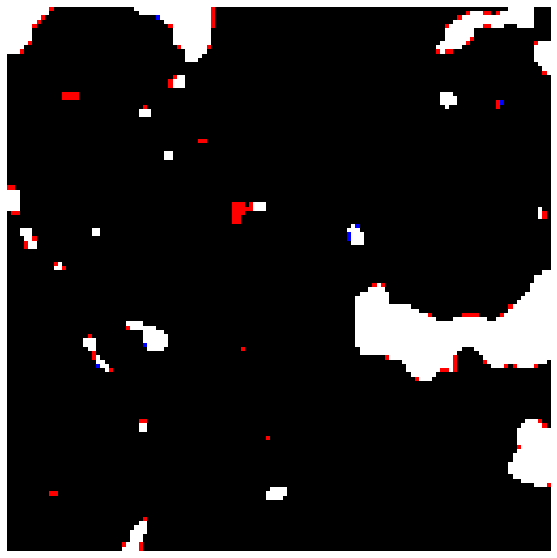

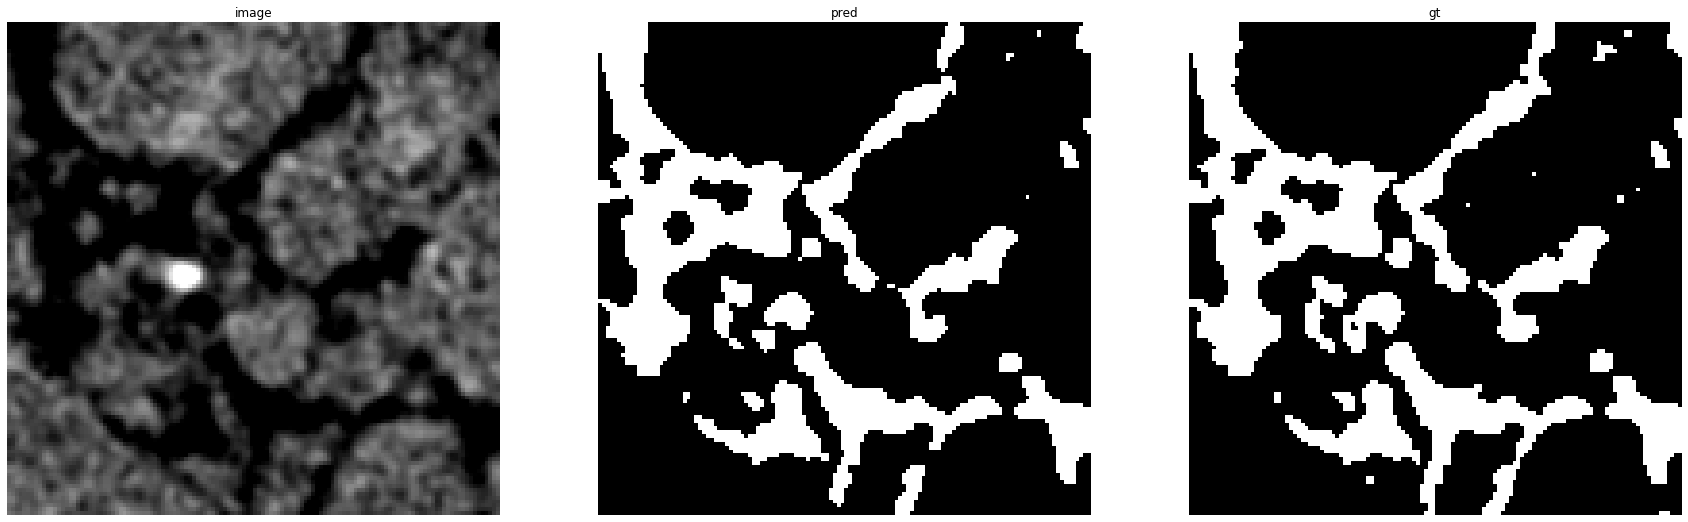

accuracy    : 0.98040771484375
precision   : 0.9947839046199702
recall      : 0.9303135888501742
f1          : 0.9614692113791862
pr_auc      : 0.9977944191962178
iou         : 0.9257975034674064


Prediction for TiTree_subset2:


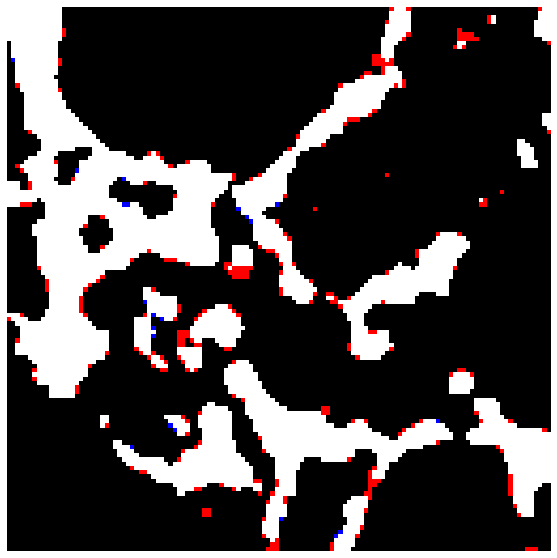

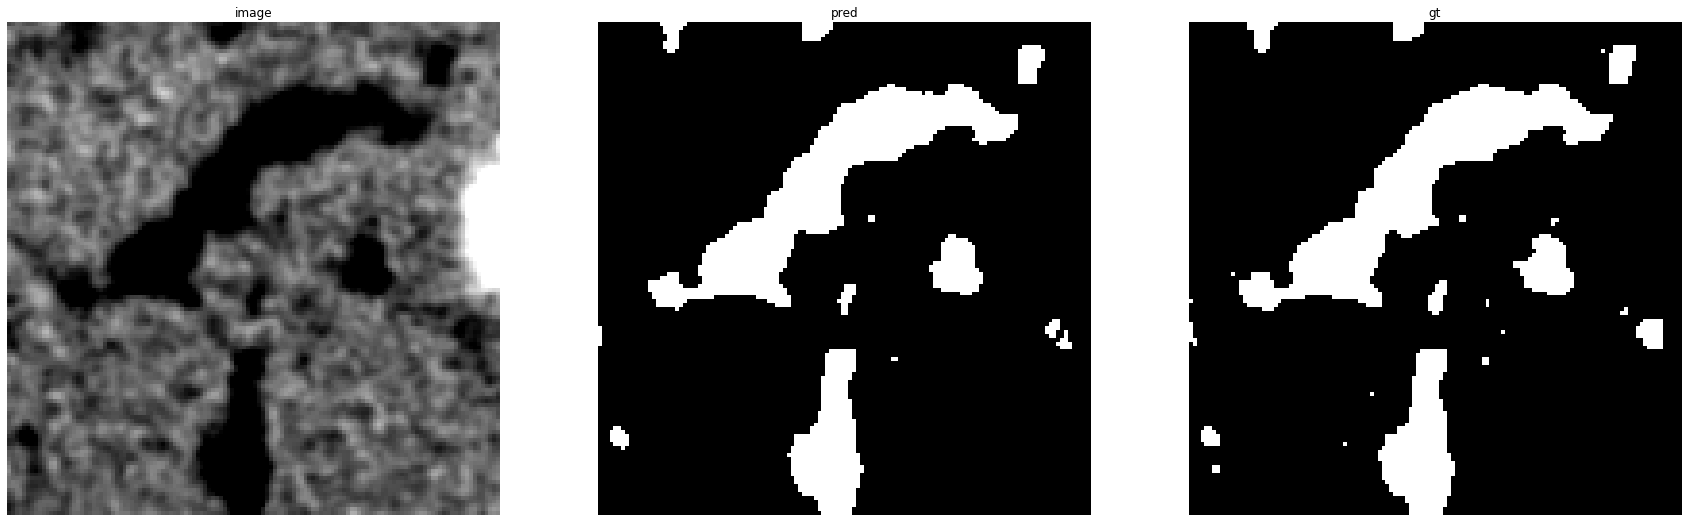

accuracy    : 0.99127197265625
precision   : 0.997874149659864
recall      : 0.9444668008048289
f1          : 0.9704362207980153
pr_auc      : 0.9993615638416479
iou         : 0.942570281124498


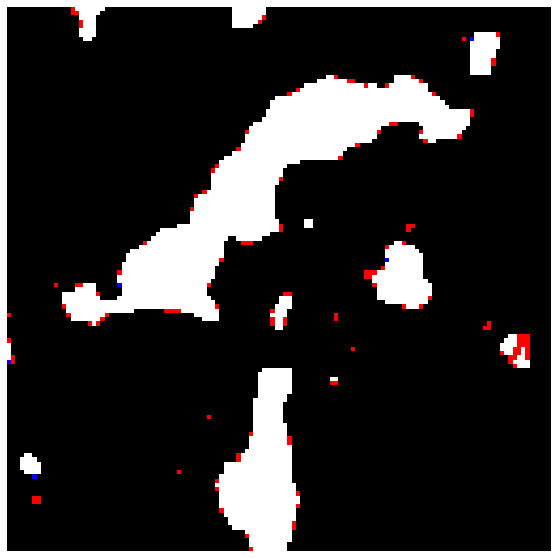

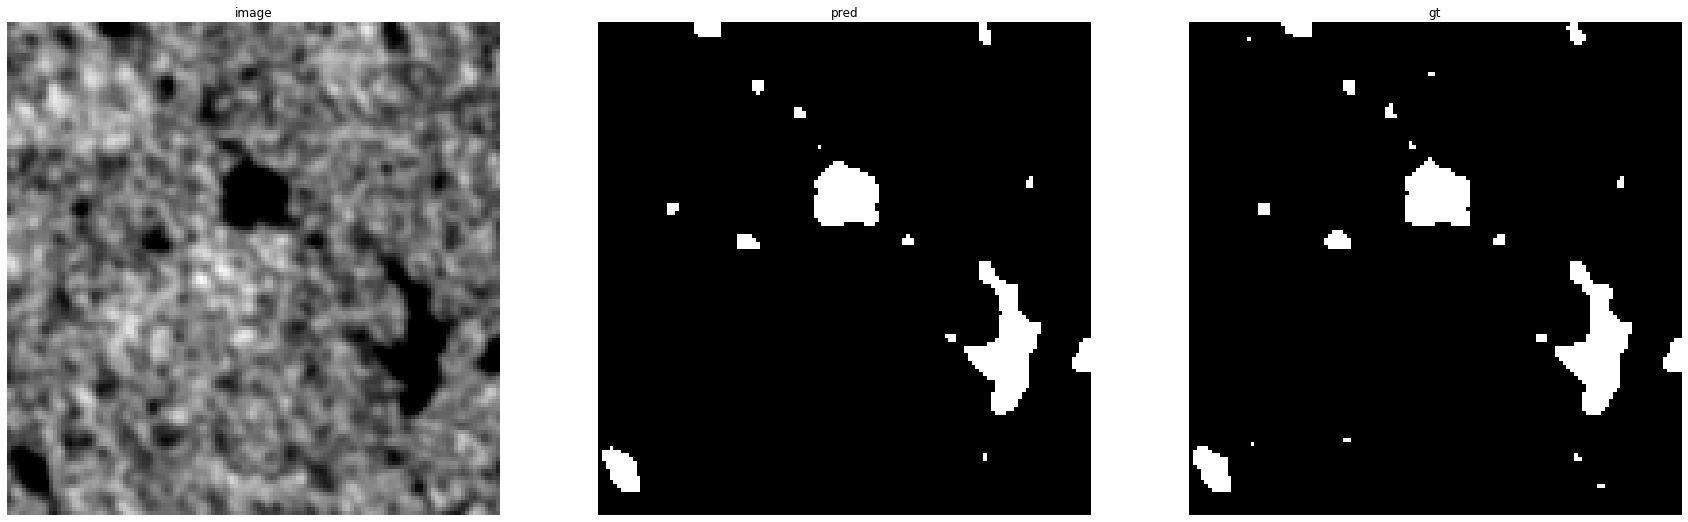

accuracy    : 0.99664306640625
precision   : 0.9950248756218906
recall      : 0.9400705052878966
f1          : 0.9667673716012085
pr_auc      : 0.998180553315578
iou         : 0.935672514619883


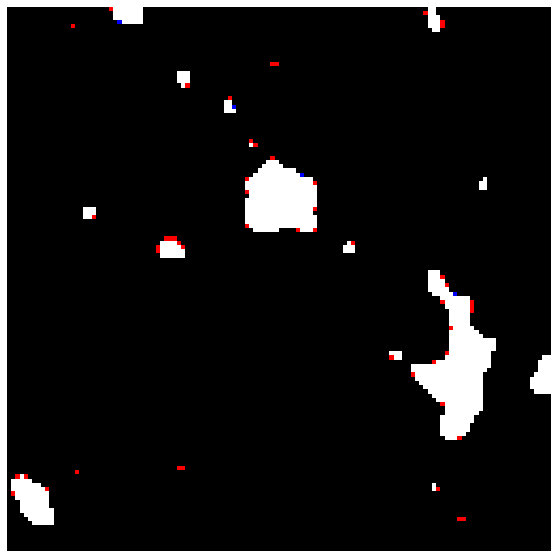

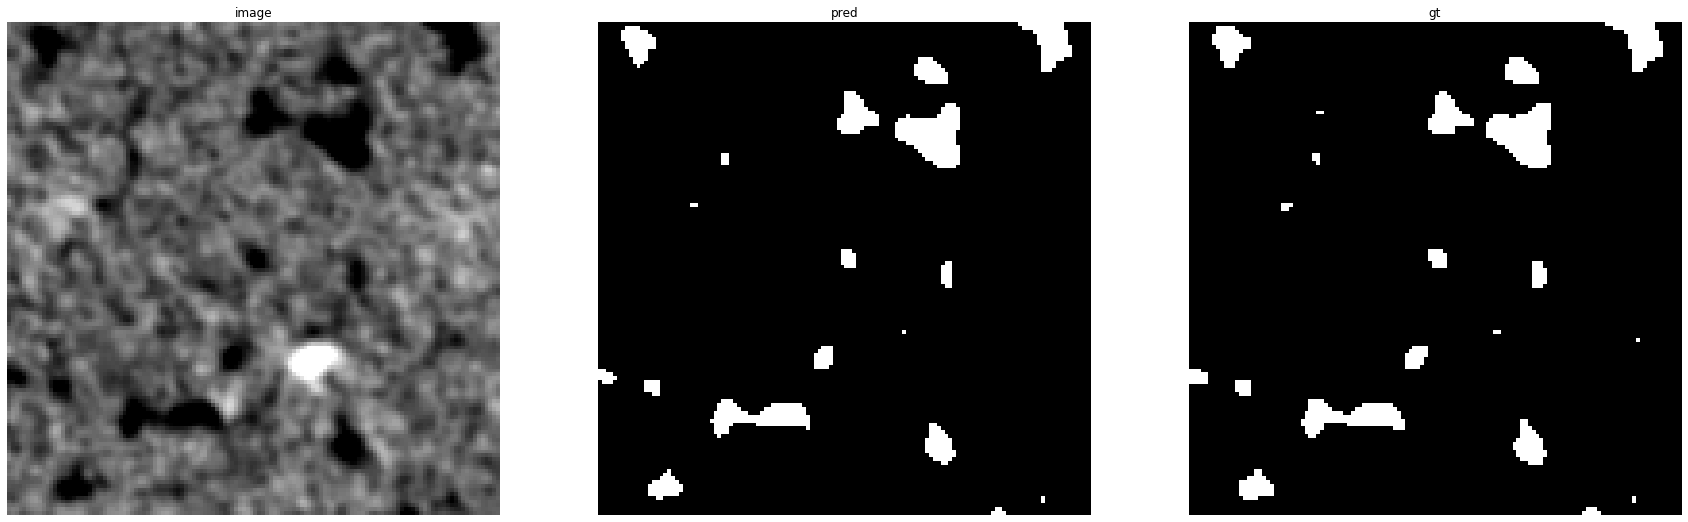

accuracy    : 0.9949951171875
precision   : 0.9937965260545906
recall      : 0.9123006833712984
f1          : 0.9513064133016628
pr_auc      : 0.9974249312990994
iou         : 0.9071347678369196


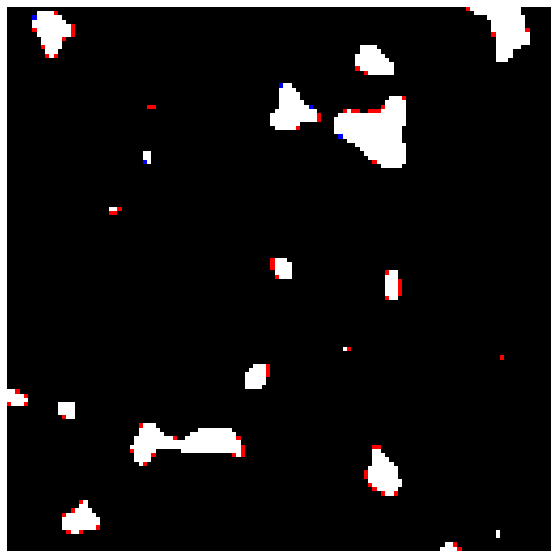

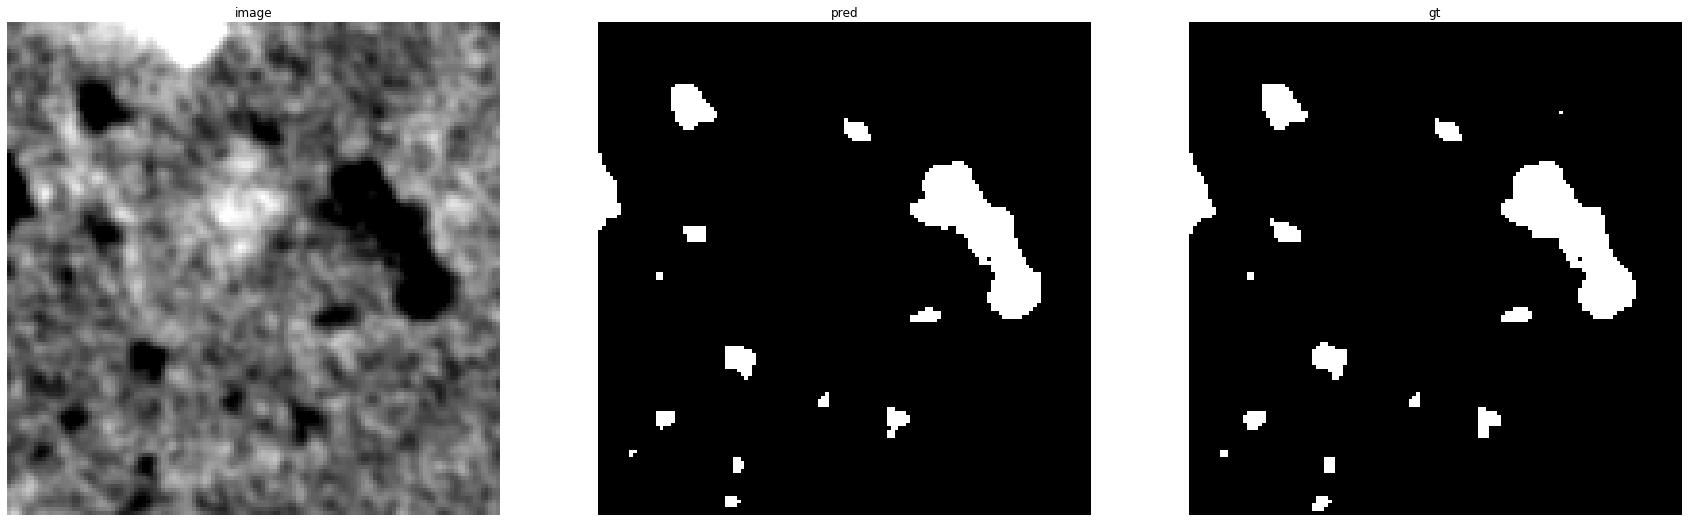

accuracy    : 0.99493408203125
precision   : 0.9958333333333333
recall      : 0.923671497584541
f1          : 0.9583959899749372
pr_auc      : 0.9981942145402887
iou         : 0.9201154956689124


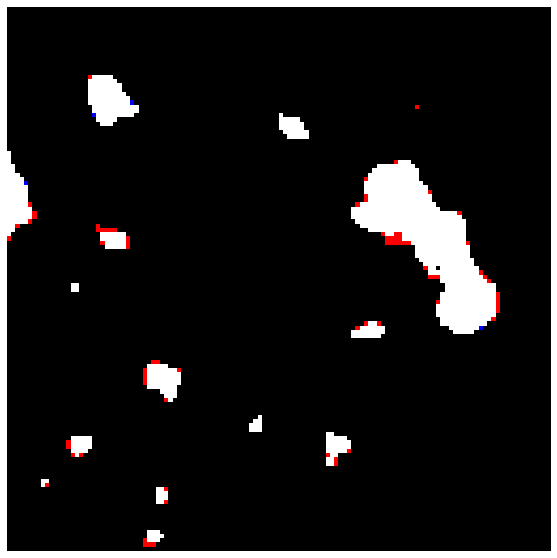

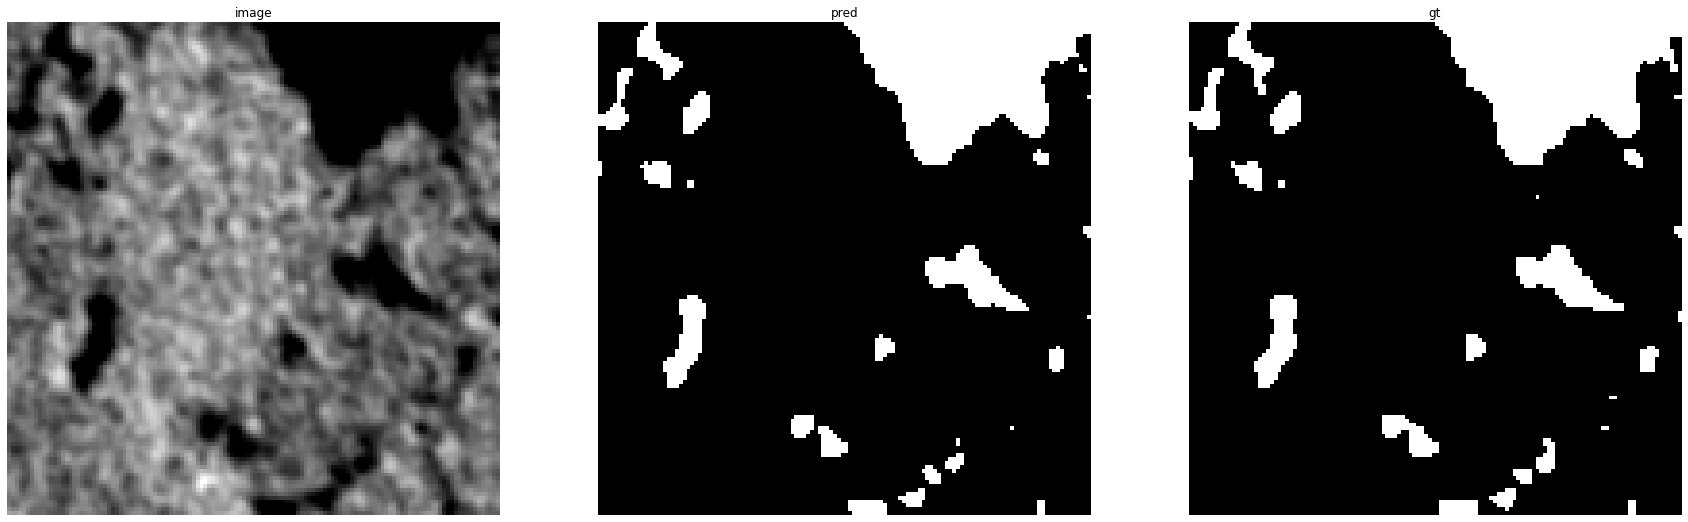

accuracy    : 0.99072265625
precision   : 0.9964444444444445
recall      : 0.9396479463537301
f1          : 0.9672131147540983
pr_auc      : 0.9988836996245791
iou         : 0.9365079365079365


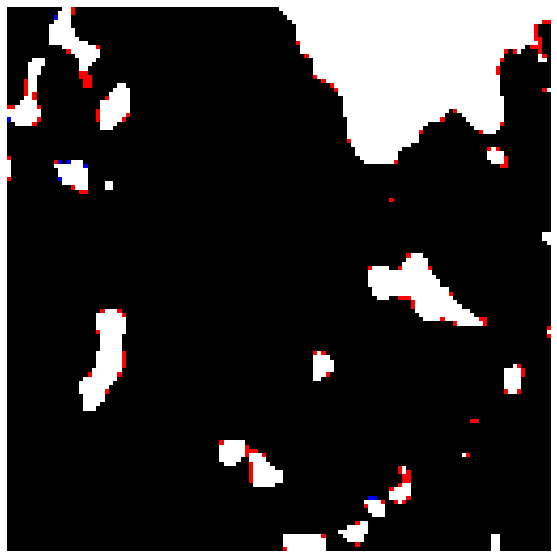

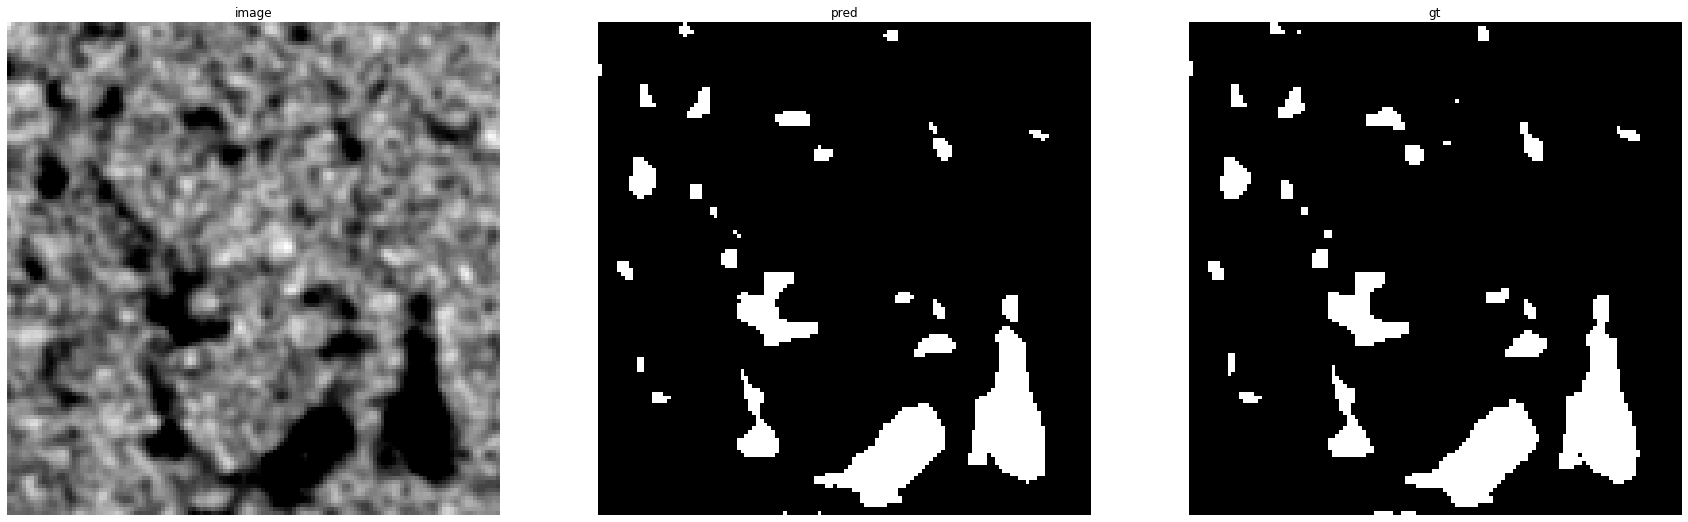

accuracy    : 0.99114990234375
precision   : 0.9956030150753769
recall      : 0.9199071387115496
f1          : 0.9562594268476621
pr_auc      : 0.9972609075978007
iou         : 0.9161849710982659


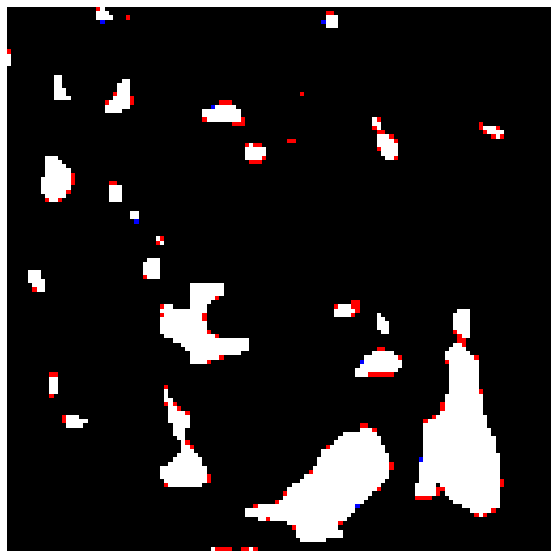

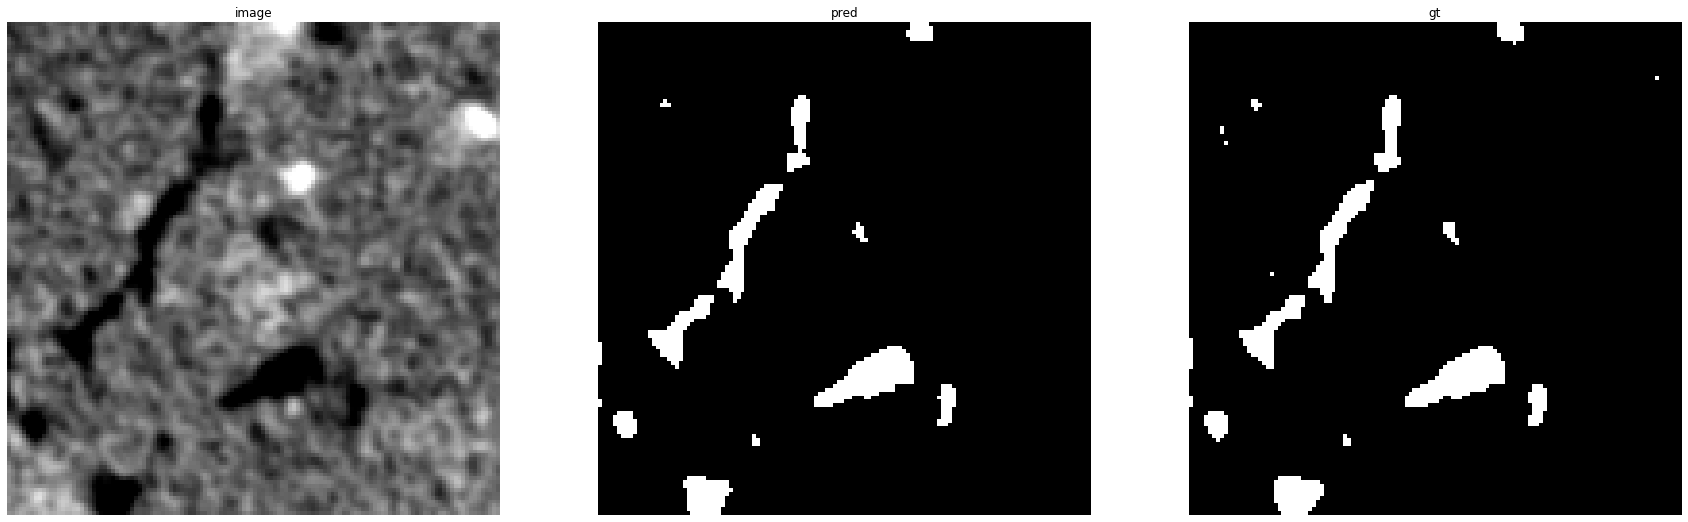

accuracy    : 0.99603271484375
precision   : 0.9987163029525032
recall      : 0.9239904988123515
f1          : 0.9599012954966071
pr_auc      : 0.9977423277221552
iou         : 0.9228944246737841


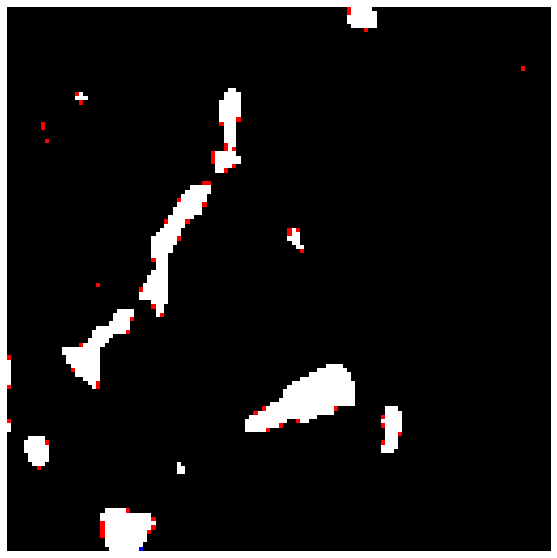

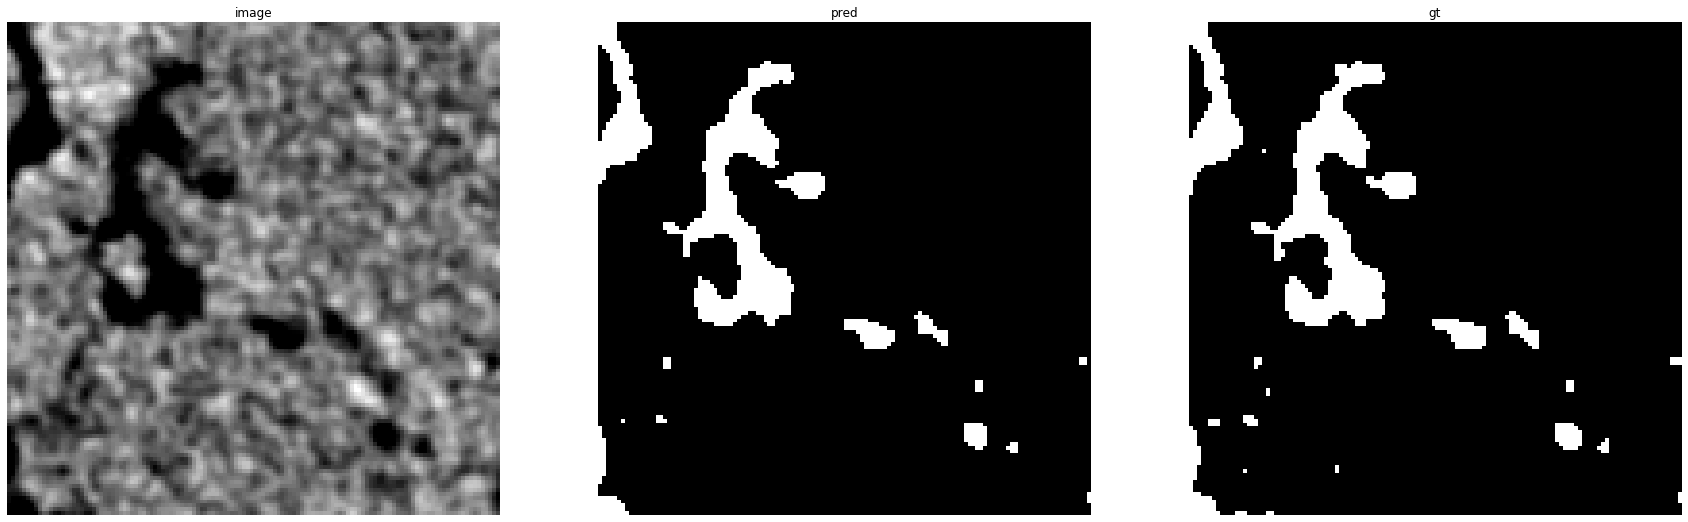

accuracy    : 0.99169921875
precision   : 0.9956772334293948
recall      : 0.9140211640211641
f1          : 0.9531034482758621
pr_auc      : 0.997581444492198
iou         : 0.9104084321475626


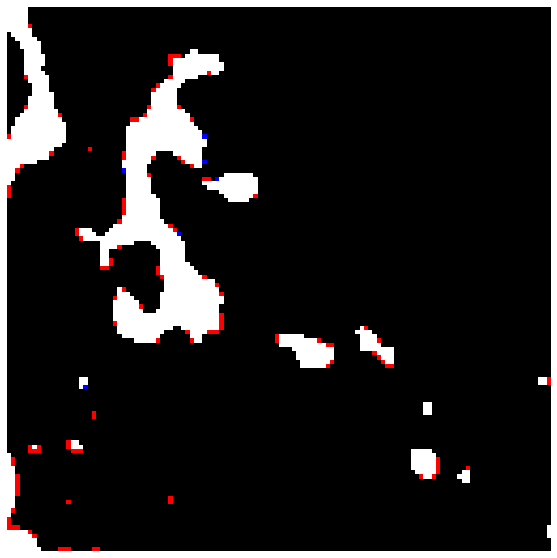

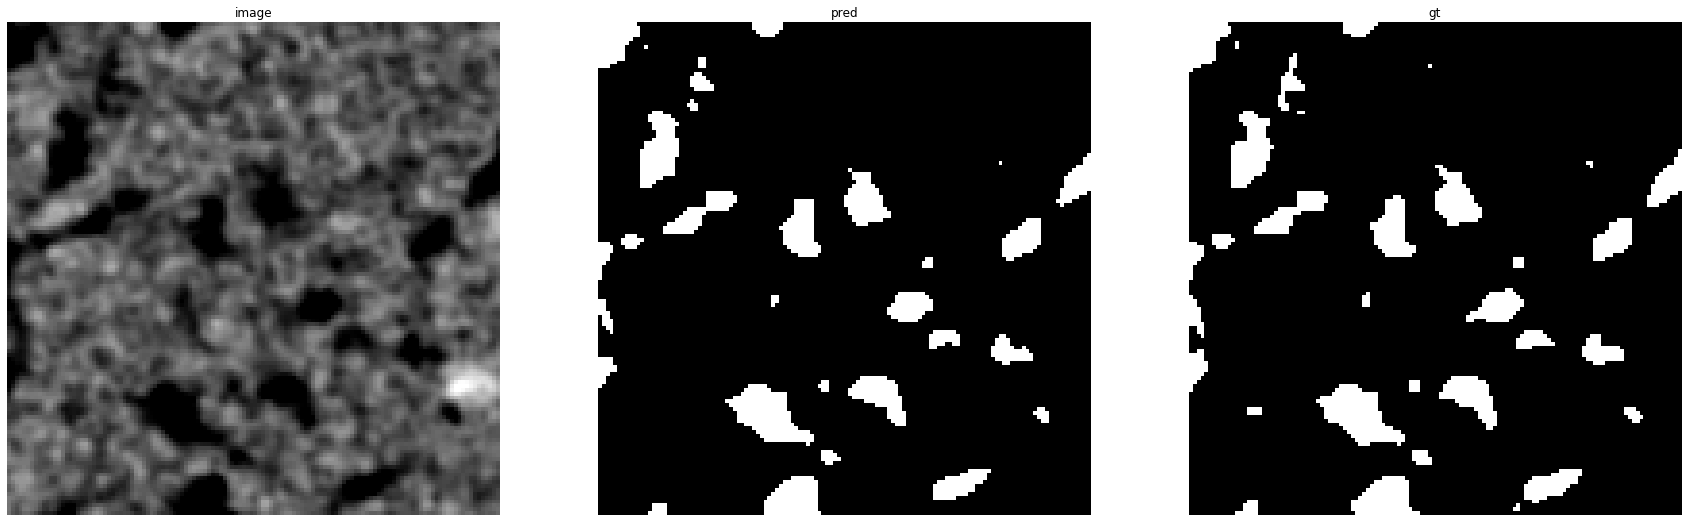

accuracy    : 0.99005126953125
precision   : 0.9895219384413884
recall      : 0.9113389626055488
f1          : 0.9488226059654631
pr_auc      : 0.9946581455410513
iou         : 0.9026284348864994


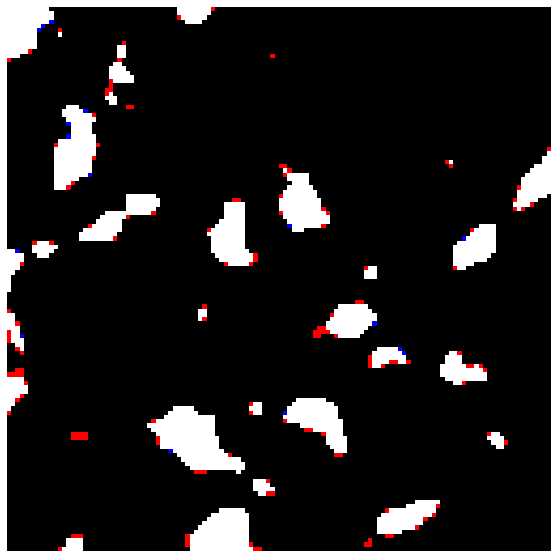

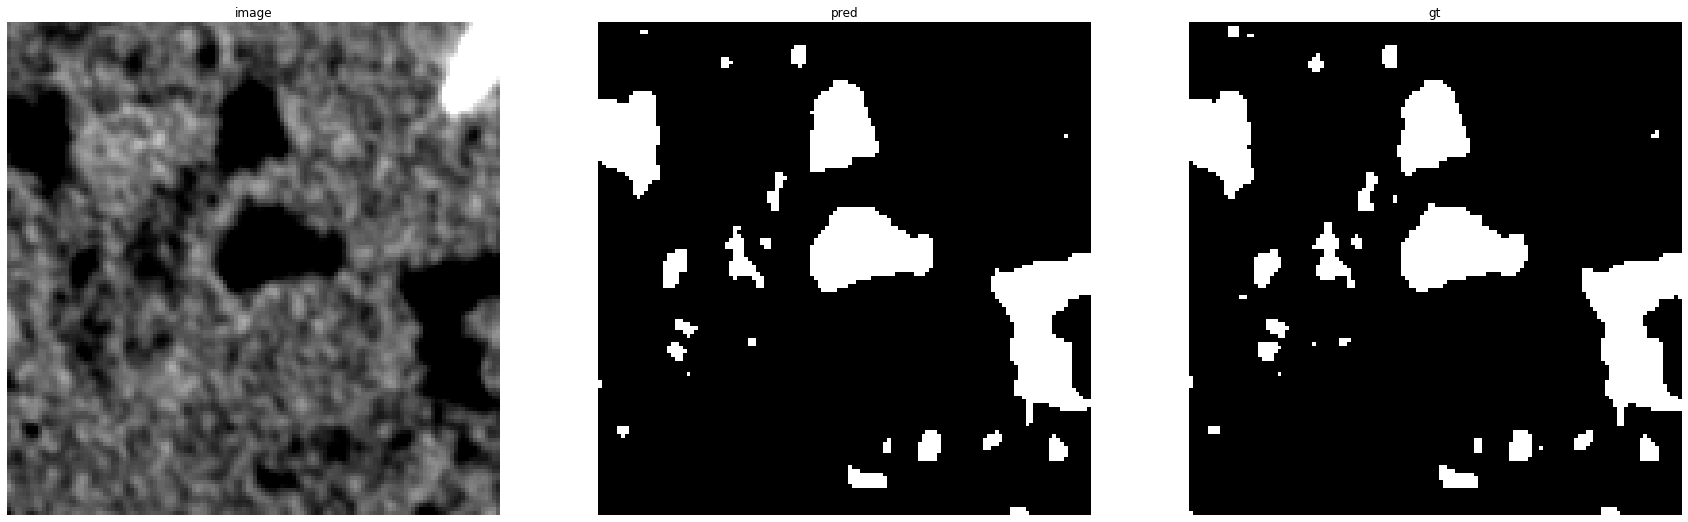

accuracy    : 0.99090576171875
precision   : 0.9948646125116714
recall      : 0.9391802556192155
f1          : 0.9662208116073453
pr_auc      : 0.9984556243850121
iou         : 0.9346491228070175


Prediction for Urna_22:


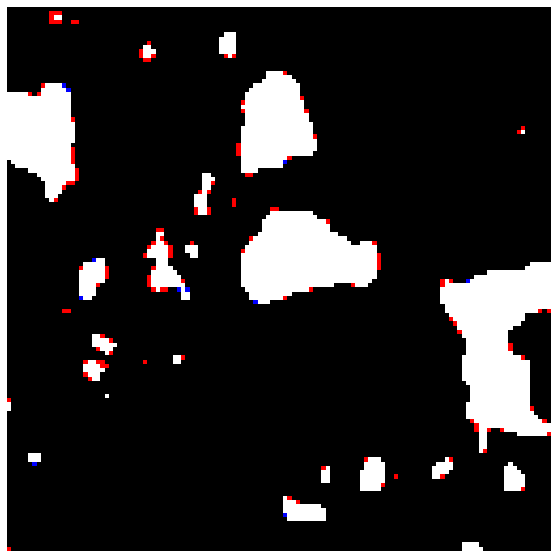

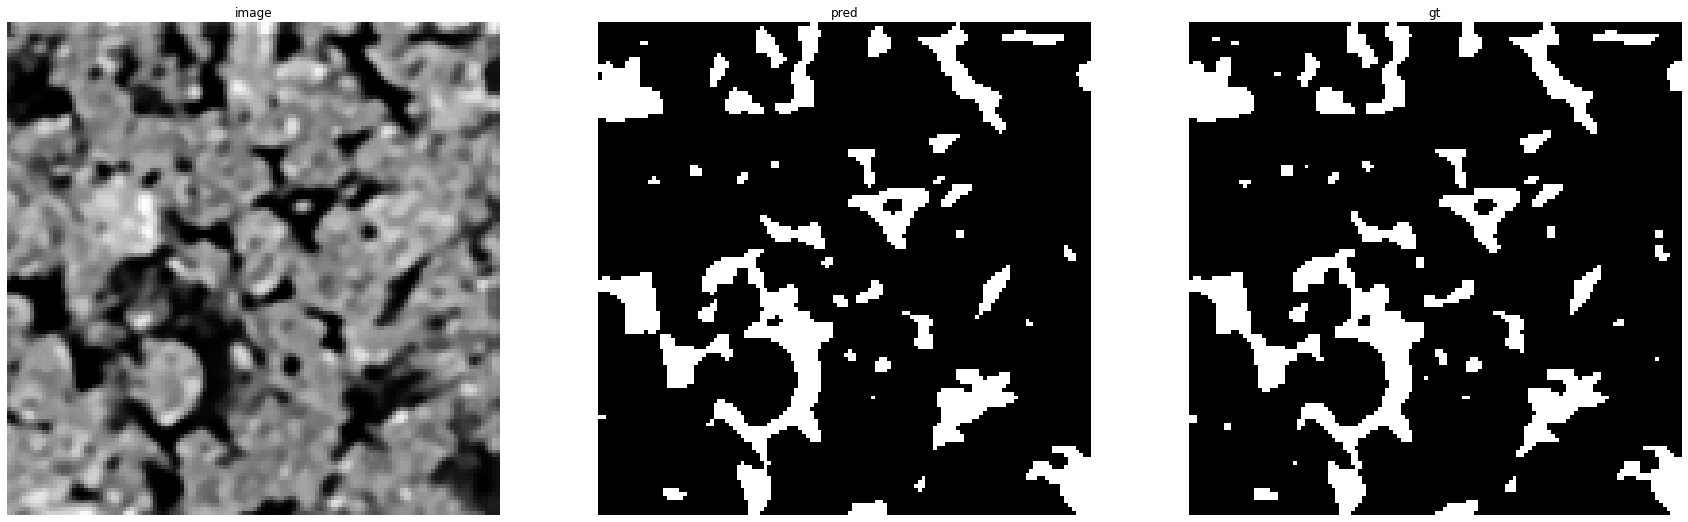

accuracy    : 0.9849853515625
precision   : 0.9698957931300656
recall      : 0.9373368146214099
f1          : 0.9533383915022762
pr_auc      : 0.9942522678675974
iou         : 0.9108372598767669


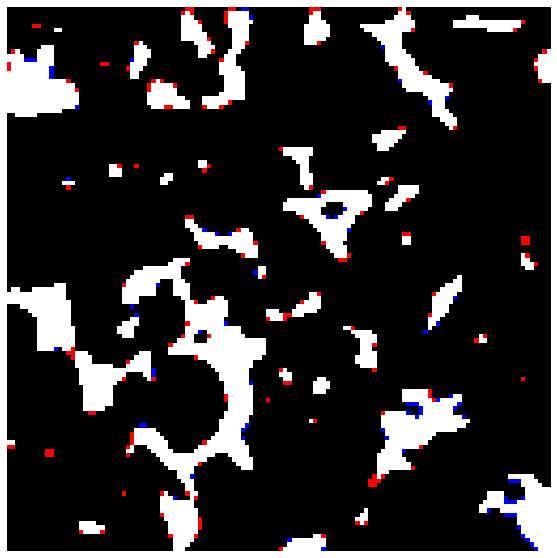

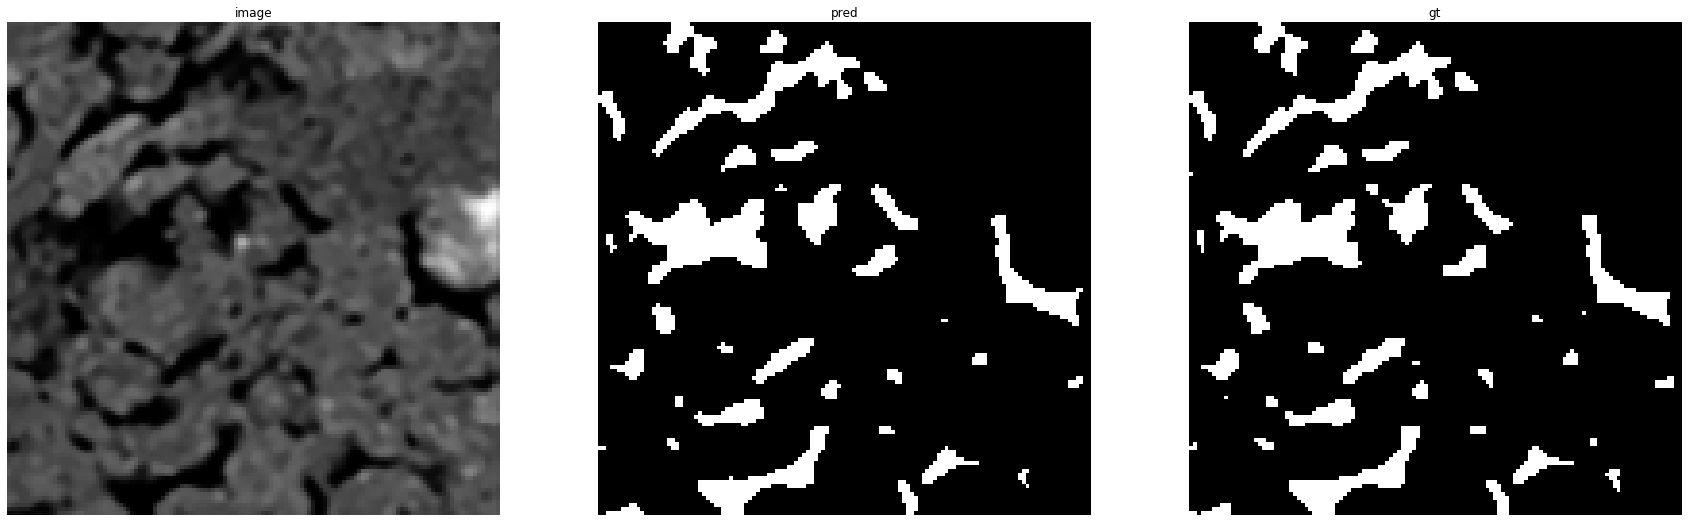

accuracy    : 0.989990234375
precision   : 0.9810094952523738
recall      : 0.9396840593585447
f1          : 0.9599022004889975
pr_auc      : 0.9963874205924613
iou         : 0.922896097790315


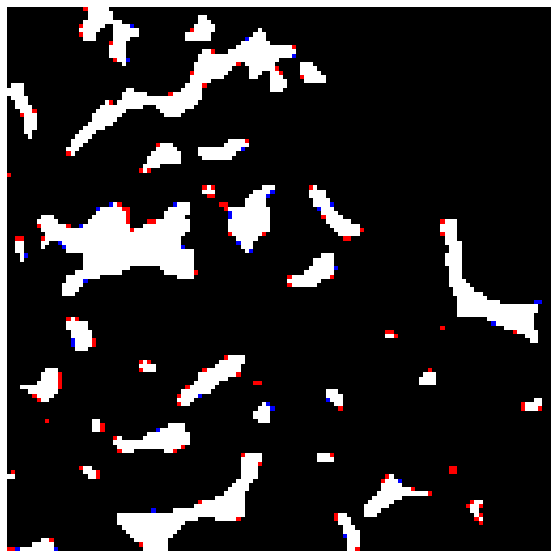

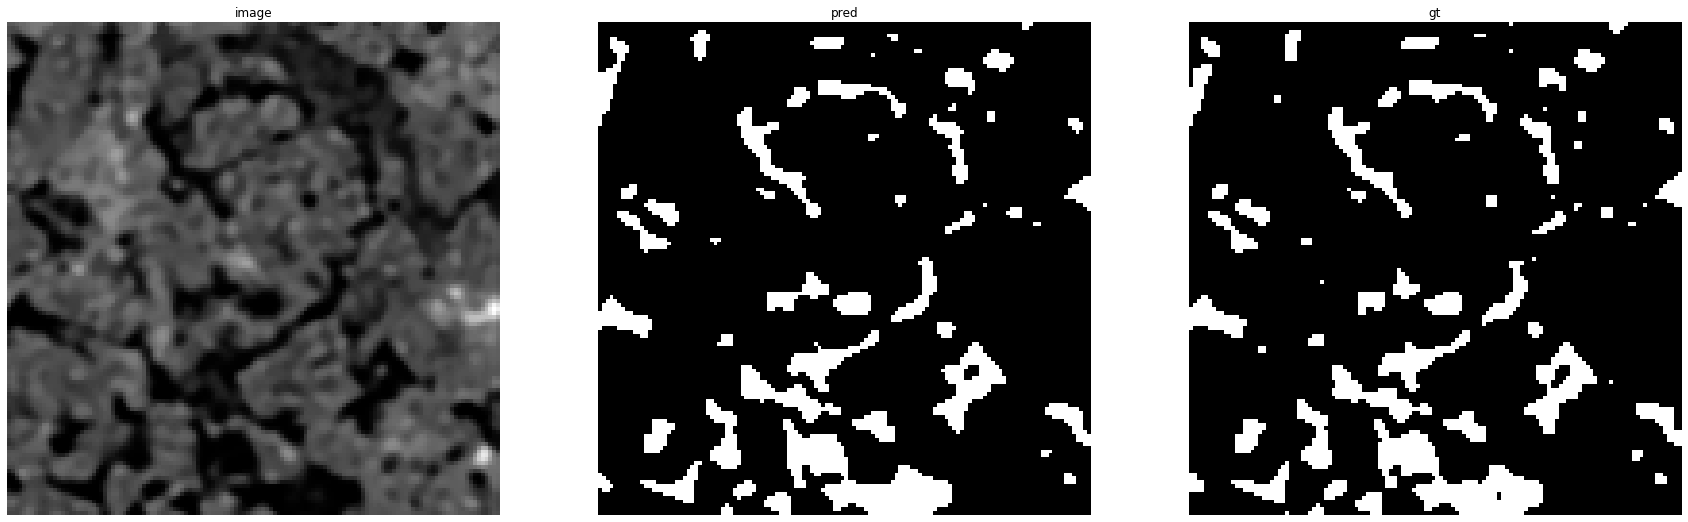

accuracy    : 0.98529052734375
precision   : 0.9602122015915119
recall      : 0.934997847610848
f1          : 0.9474372955288985
pr_auc      : 0.9921744432251728
iou         : 0.9001243265644426


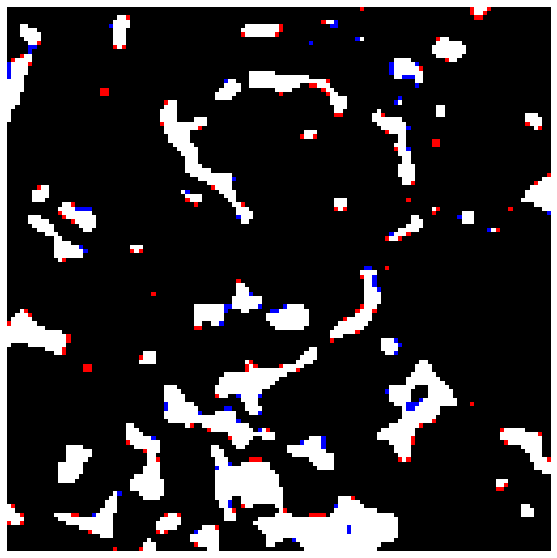

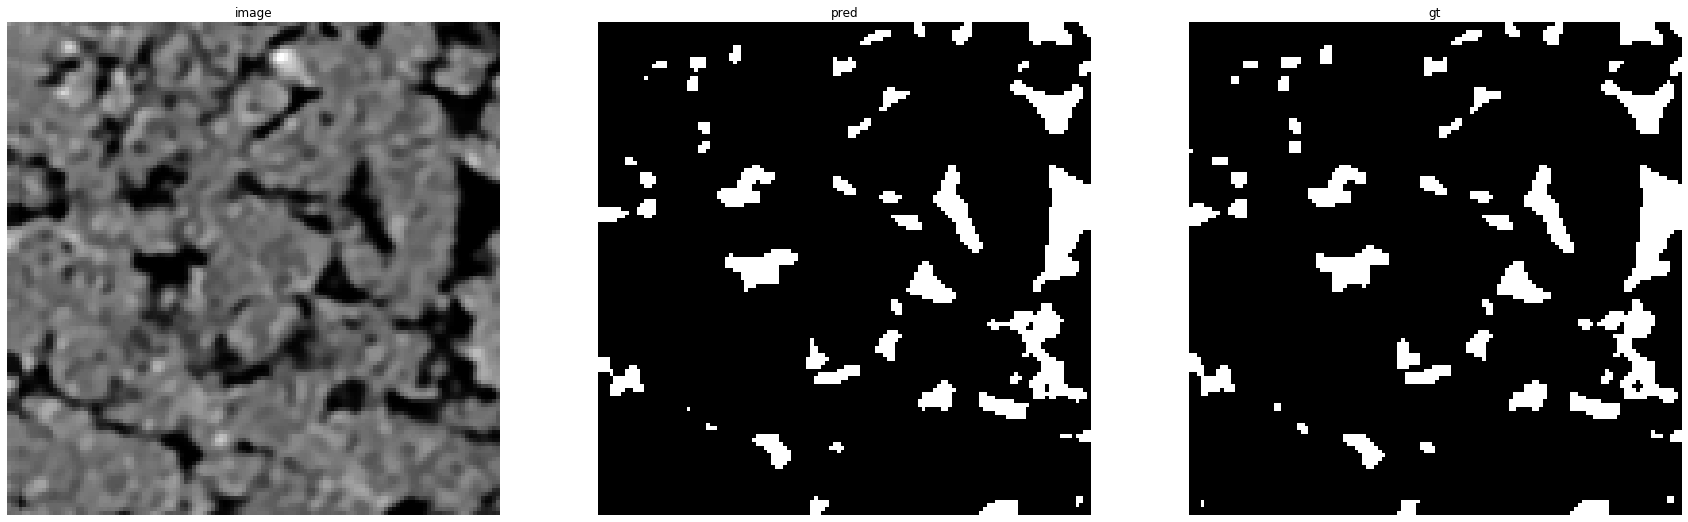

accuracy    : 0.98931884765625
precision   : 0.9797921478060047
recall      : 0.9237887860642352
f1          : 0.9509666573269824
pr_auc      : 0.9945854286101629
iou         : 0.906517094017094


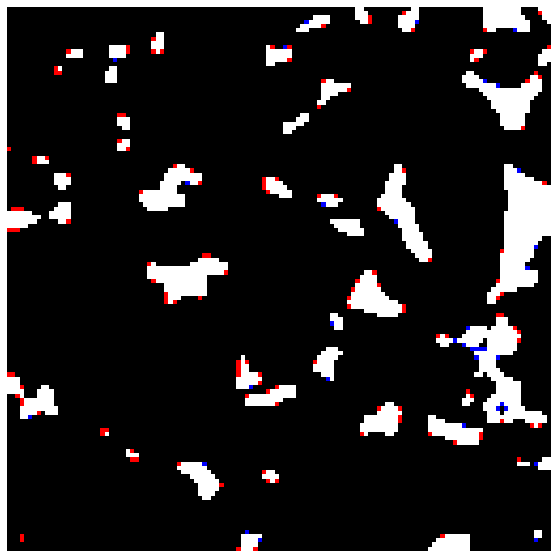

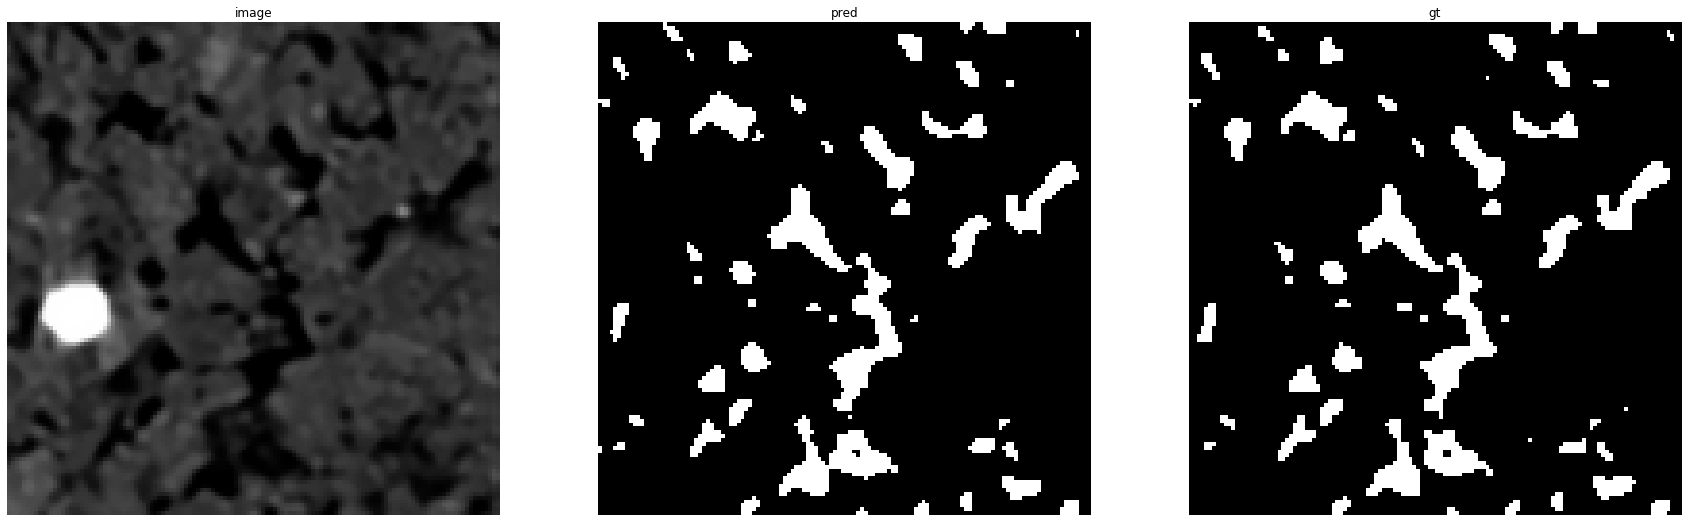

accuracy    : 0.98687744140625
precision   : 0.9583564686285397
recall      : 0.92497320471597
f1          : 0.9413689664575947
pr_auc      : 0.9909301479294801
iou         : 0.8892323544564658


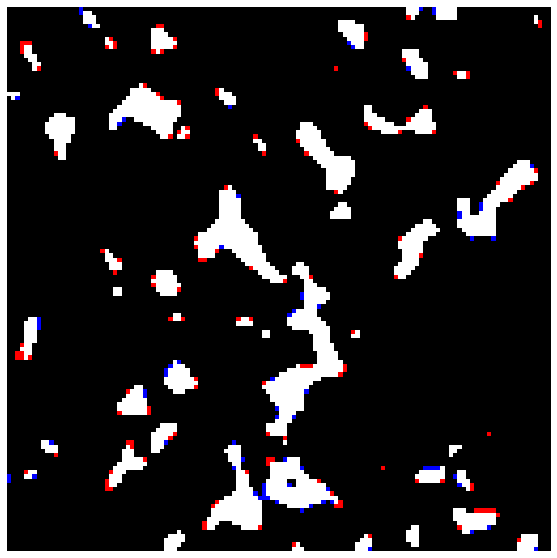

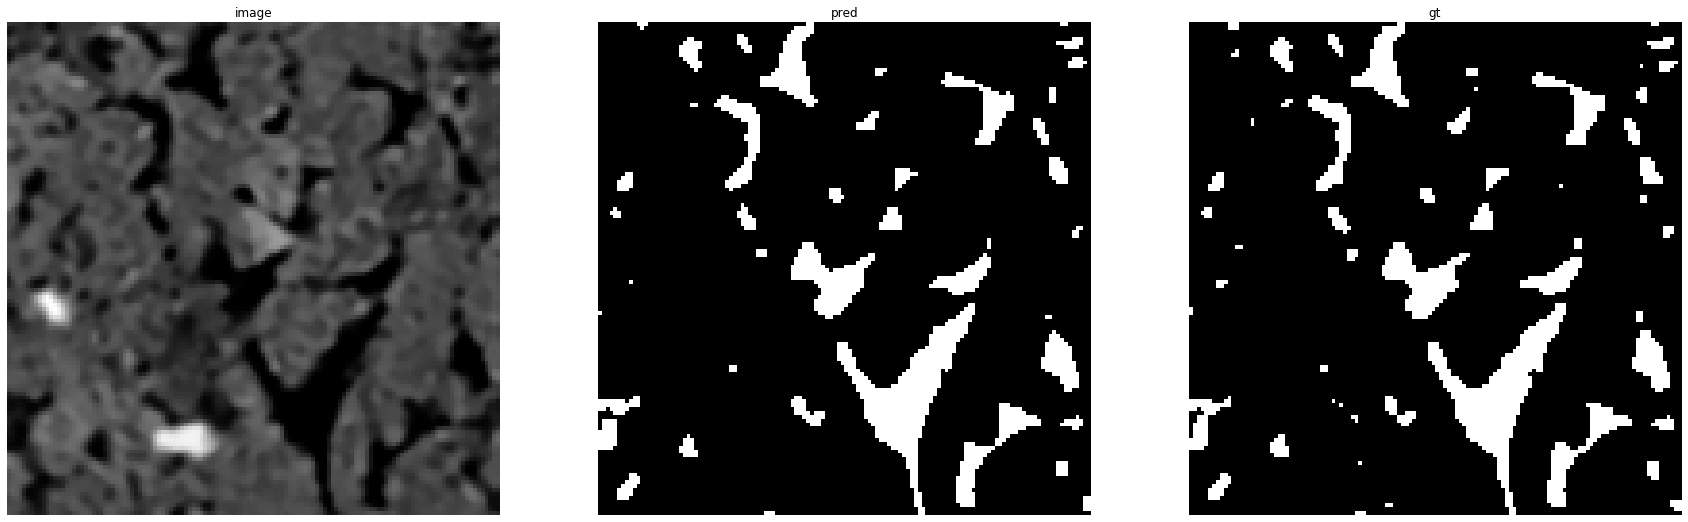

accuracy    : 0.99005126953125
precision   : 0.9789983844911146
recall      : 0.9361483007209063
f1          : 0.9570939720979205
pr_auc      : 0.9948277721273416
iou         : 0.9177183240787481


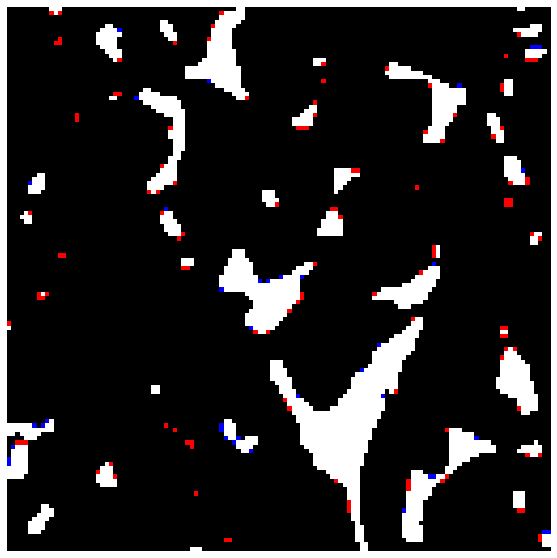

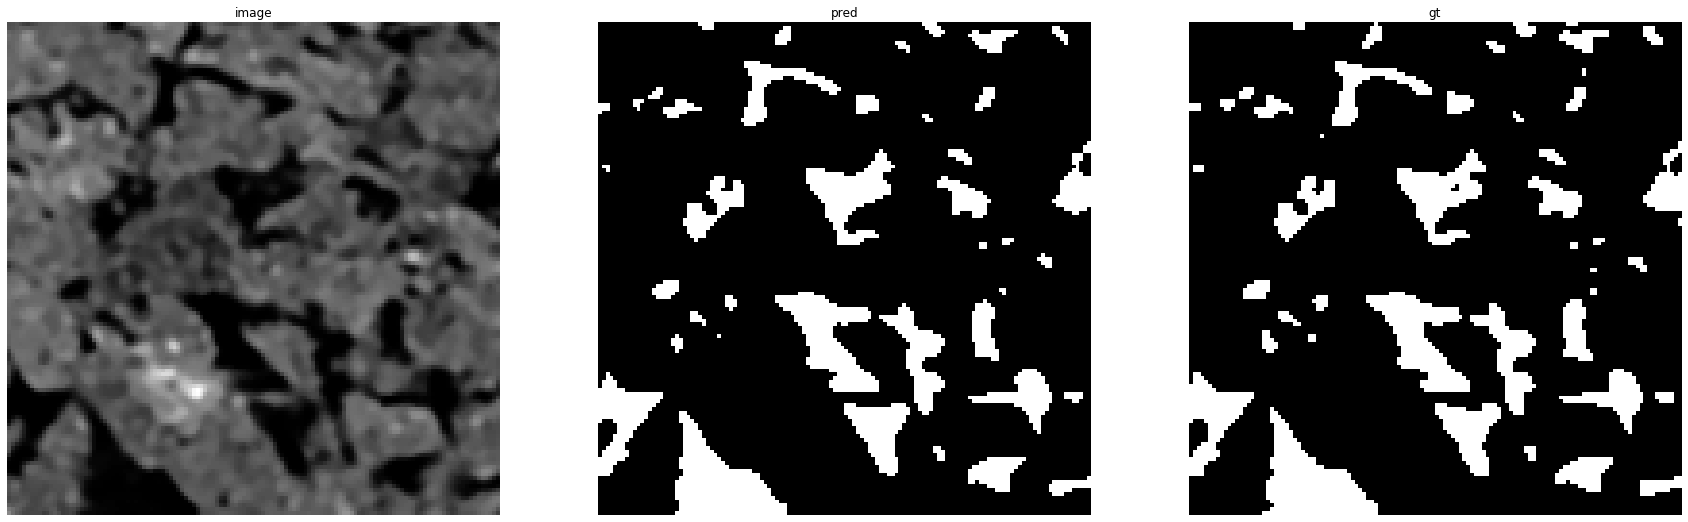

accuracy    : 0.98779296875
precision   : 0.9814456899884035
recall      : 0.9435154217762913
f1          : 0.9621068586585827
pr_auc      : 0.9964826311294532
iou         : 0.9269806498722162


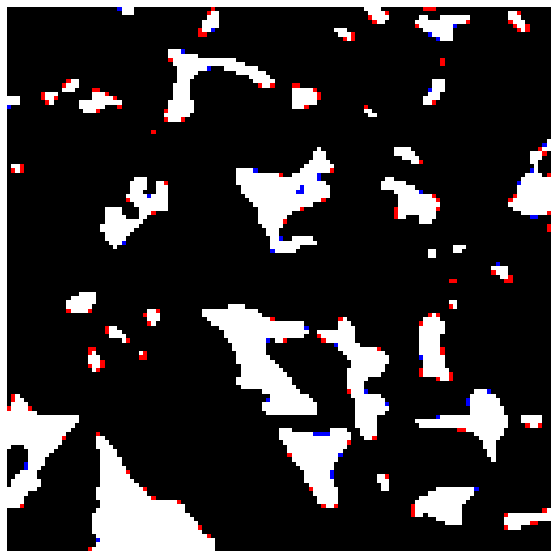

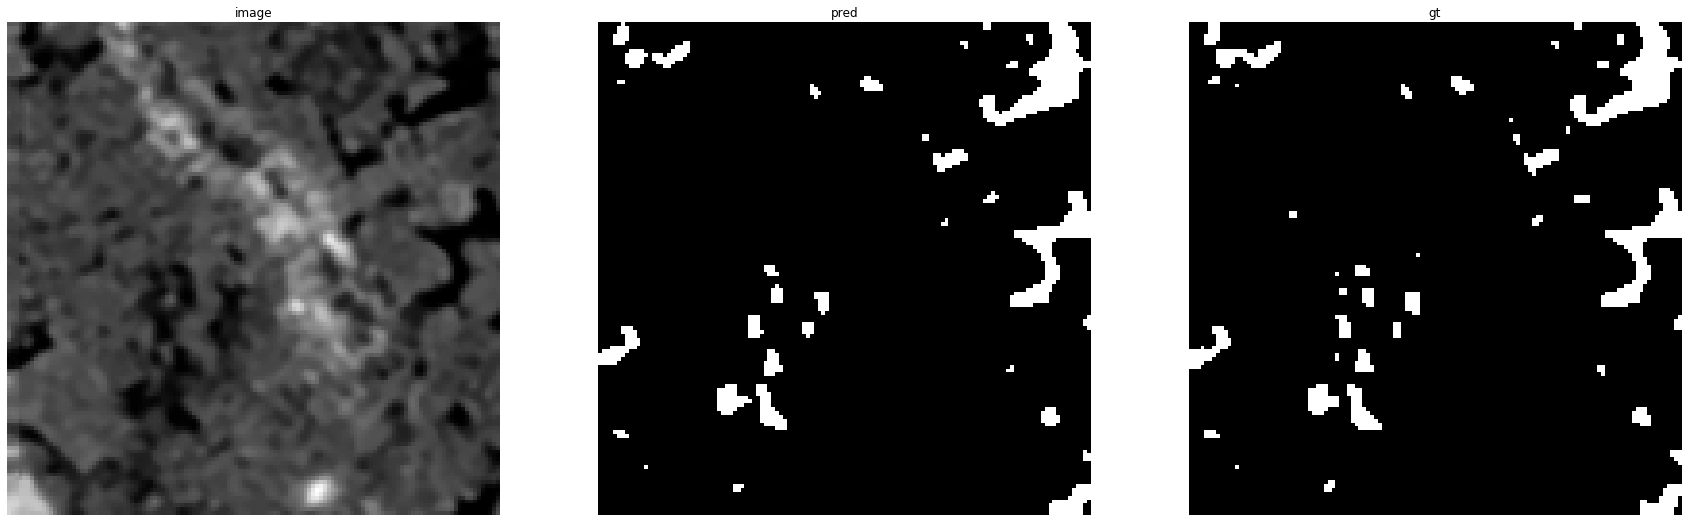

accuracy    : 0.99273681640625
precision   : 0.9727822580645161
recall      : 0.912961210974456
f1          : 0.9419228892142508
pr_auc      : 0.9921420892175334
iou         : 0.8902214022140221


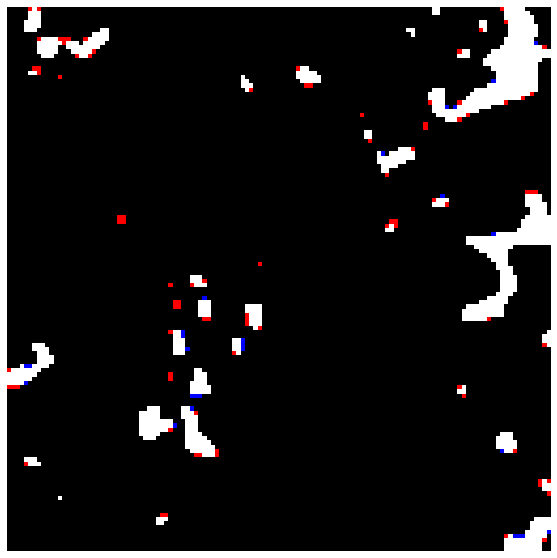

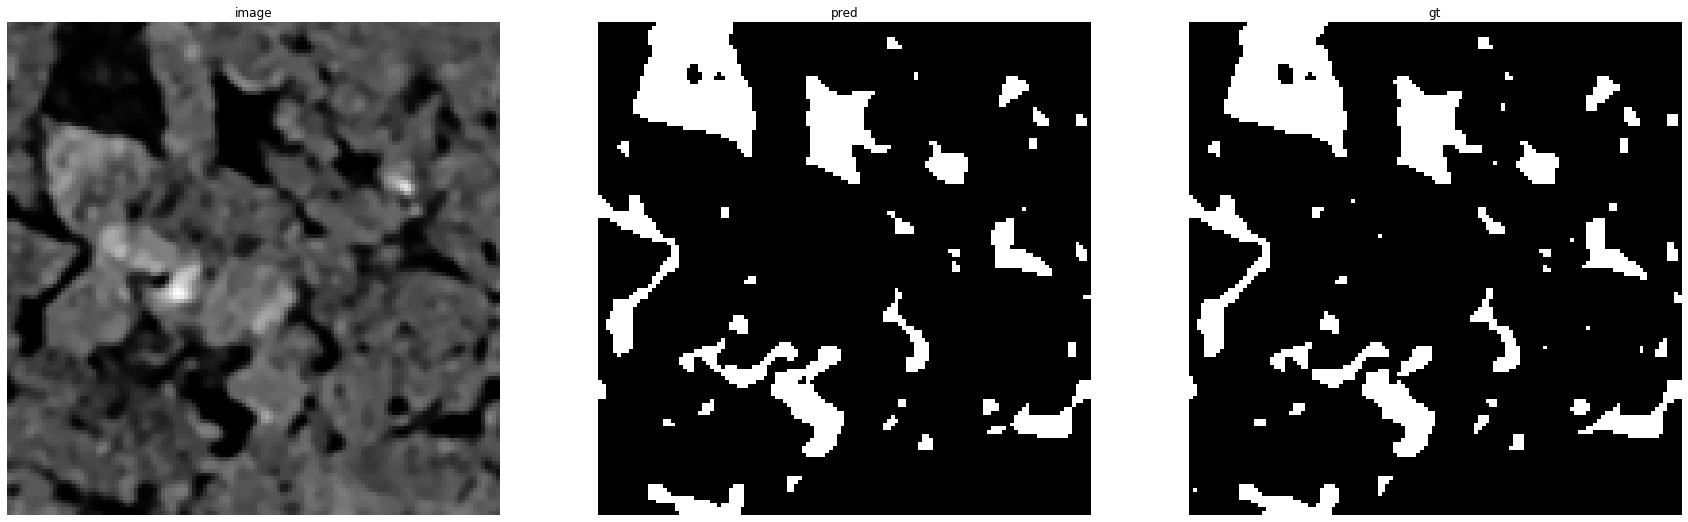

accuracy    : 0.9881591796875
precision   : 0.9755794701986755
recall      : 0.9458266452648475
f1          : 0.9604726976365119
pr_auc      : 0.9957532742659793
iou         : 0.9239513916111329


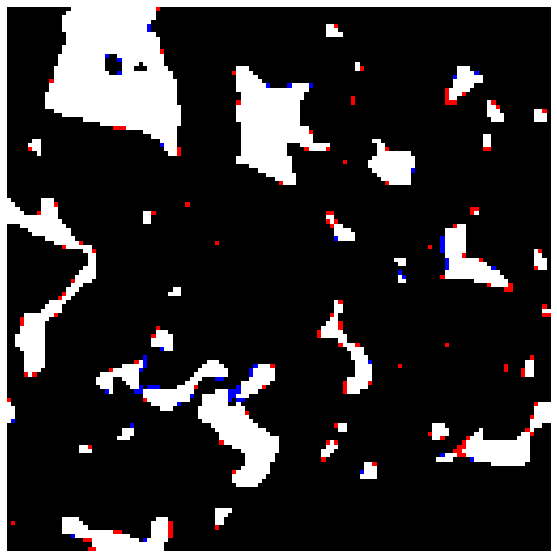

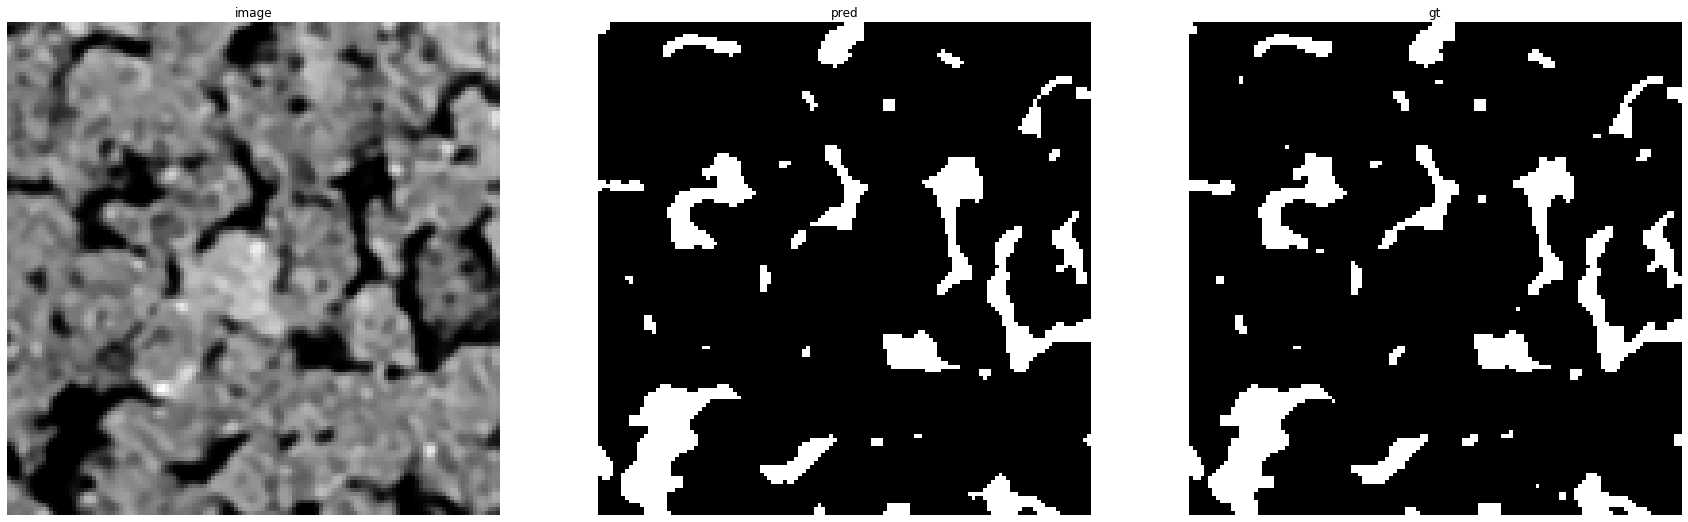

accuracy    : 0.98931884765625
precision   : 0.9773584905660377
recall      : 0.9422464756707595
f1          : 0.9594813614262561
pr_auc      : 0.9952956036112193
iou         : 0.9221183800623053


Prediction for Urna_30:


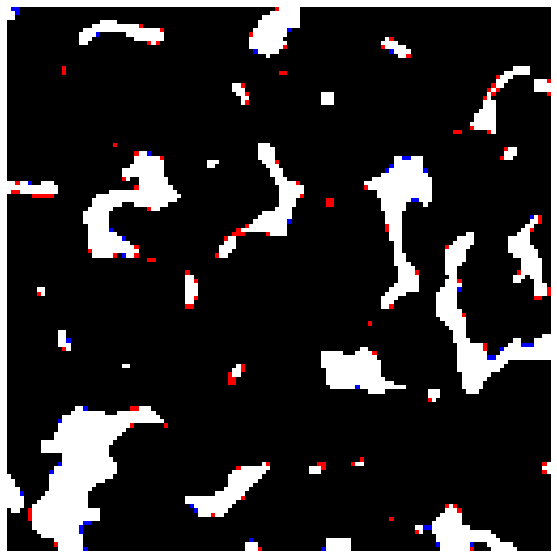

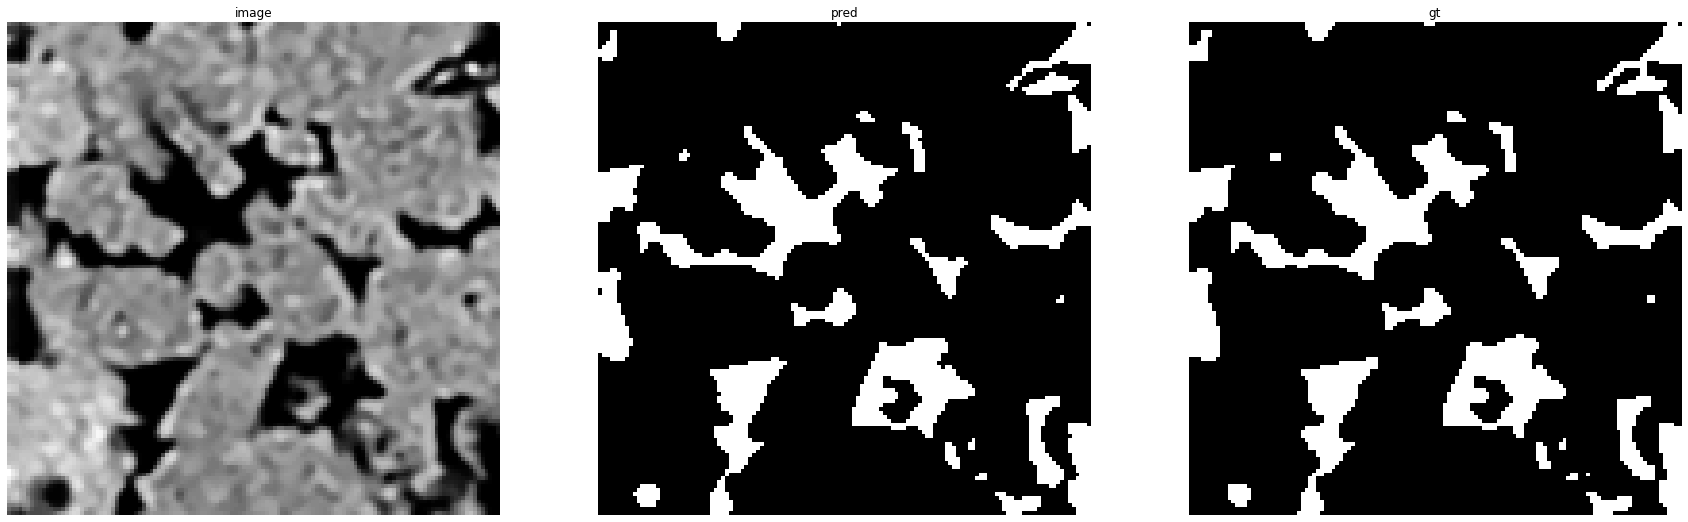

accuracy    : 0.9893798828125
precision   : 0.9838071248650594
recall      : 0.9549423681453021
f1          : 0.9691598723856789
pr_auc      : 0.9978406318381275
iou         : 0.9401650618982118


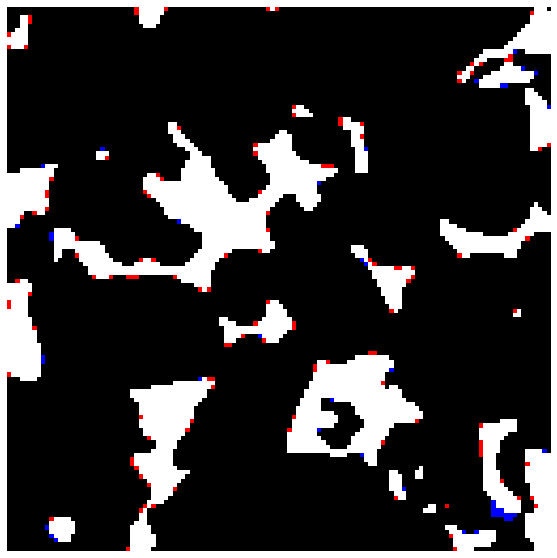

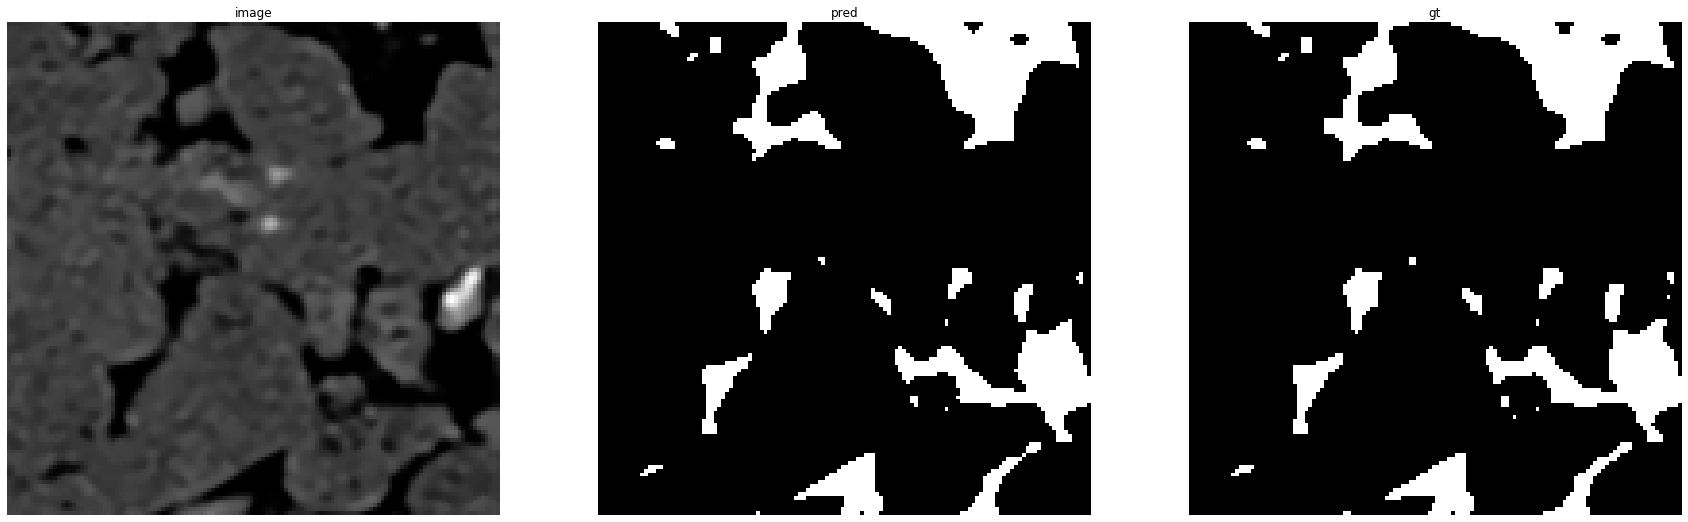

accuracy    : 0.99432373046875
precision   : 0.9923076923076923
recall      : 0.9687108886107635
f1          : 0.9803673210892971
pr_auc      : 0.9987008466010452
iou         : 0.9614906832298137


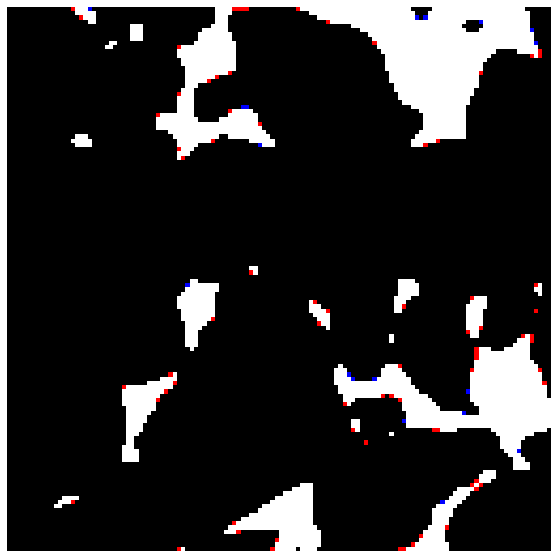

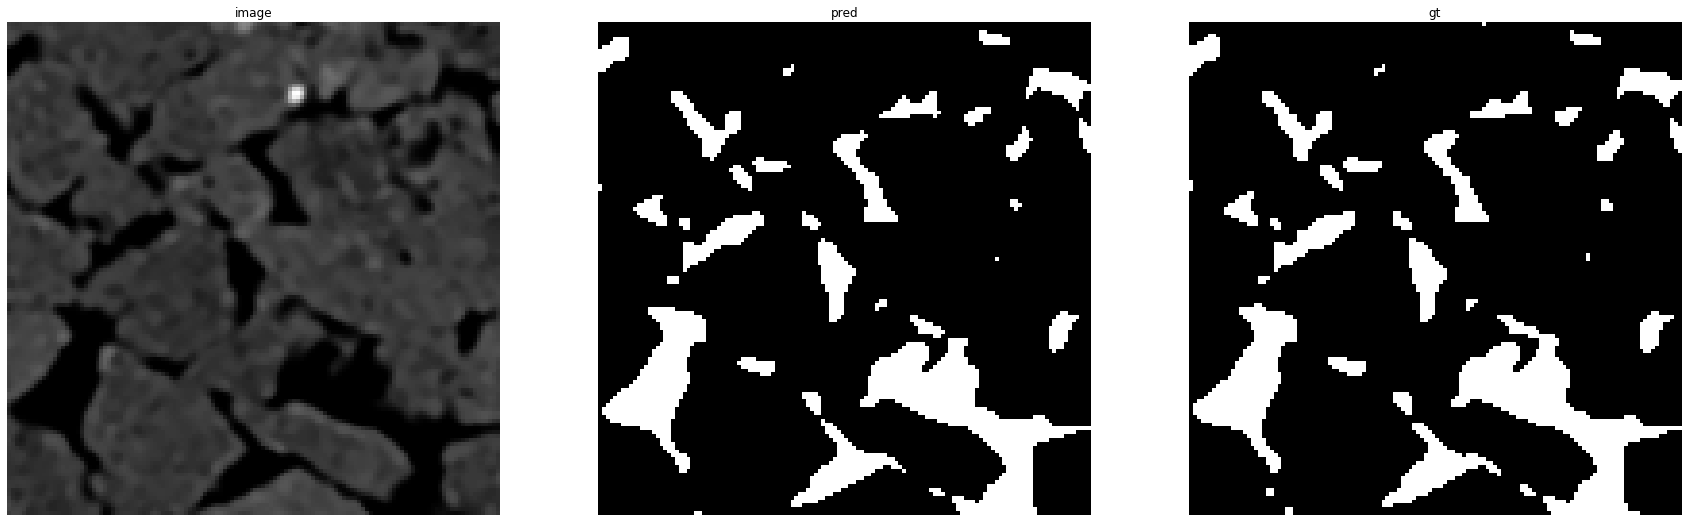

accuracy    : 0.990966796875
precision   : 0.9899107489328677
recall      : 0.9543583988028432
f1          : 0.9718095238095237
pr_auc      : 0.998392212893654
iou         : 0.9451648758799556


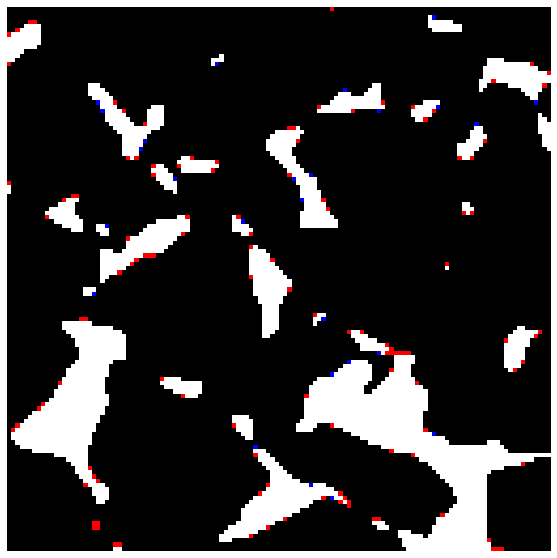

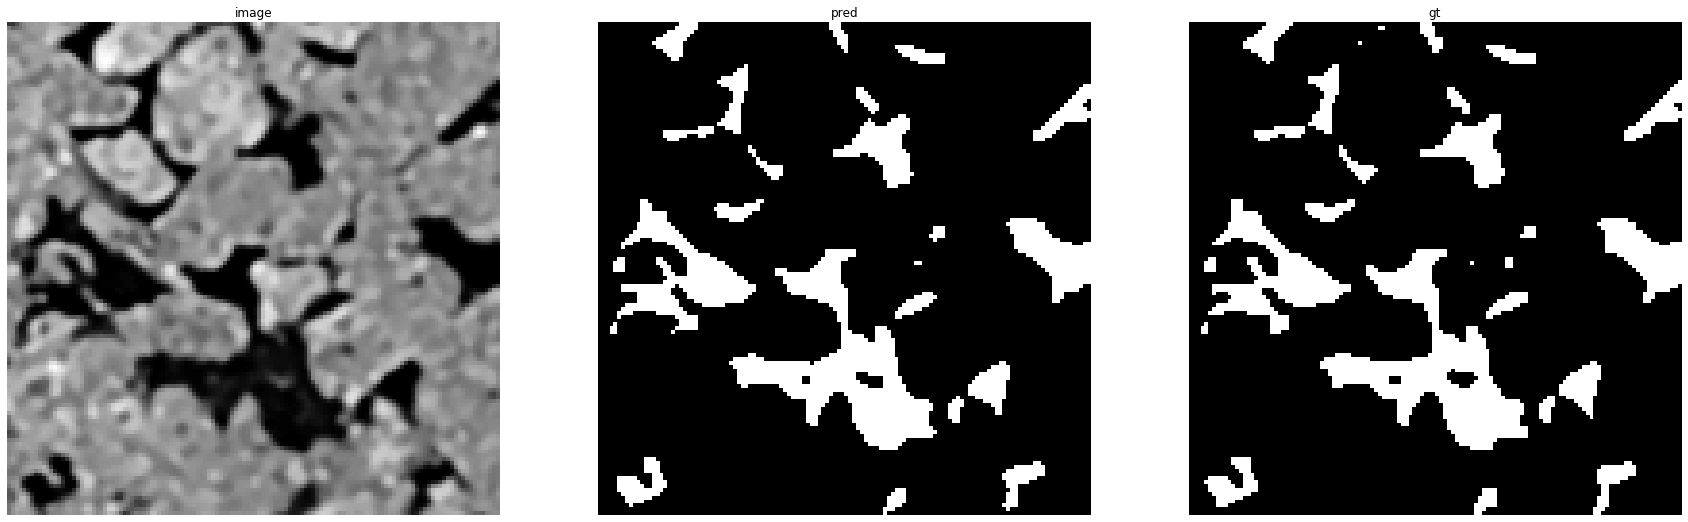

accuracy    : 0.98980712890625
precision   : 0.9812972542777557
recall      : 0.9535962877030162
f1          : 0.967248480094136
pr_auc      : 0.9972927142432054
iou         : 0.9365742499050512


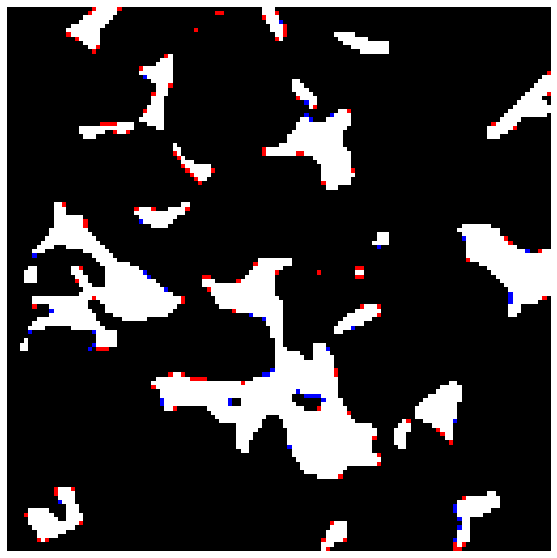

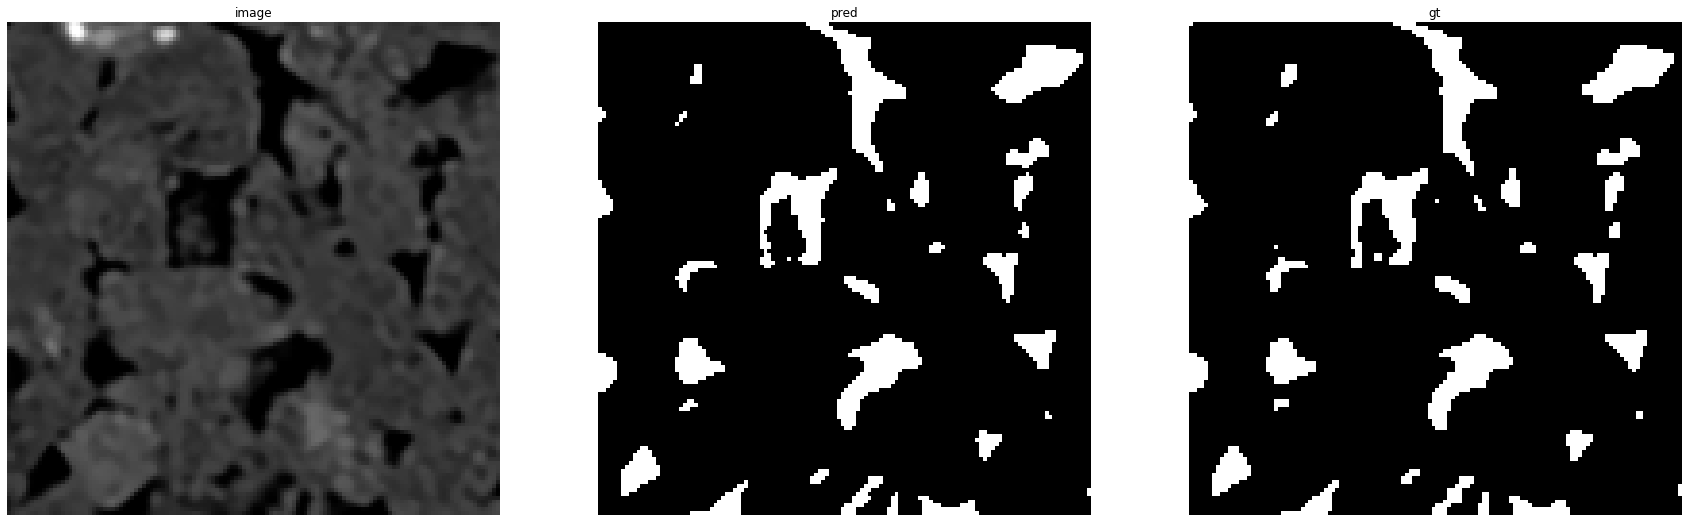

accuracy    : 0.99176025390625
precision   : 0.9852020489470689
recall      : 0.9407608695652174
f1          : 0.9624687239366138
pr_auc      : 0.996974203111955
iou         : 0.927652733118971


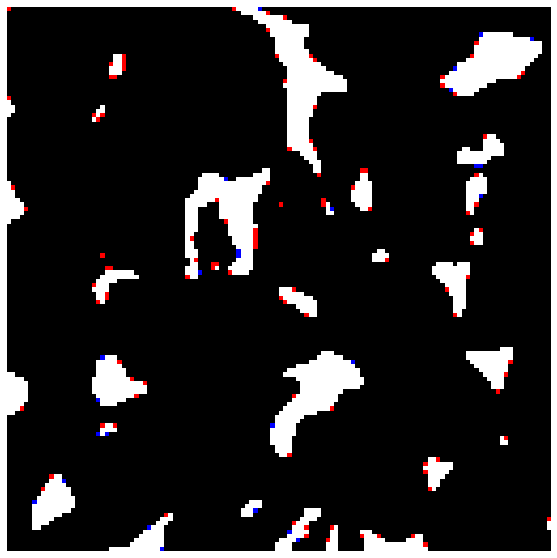

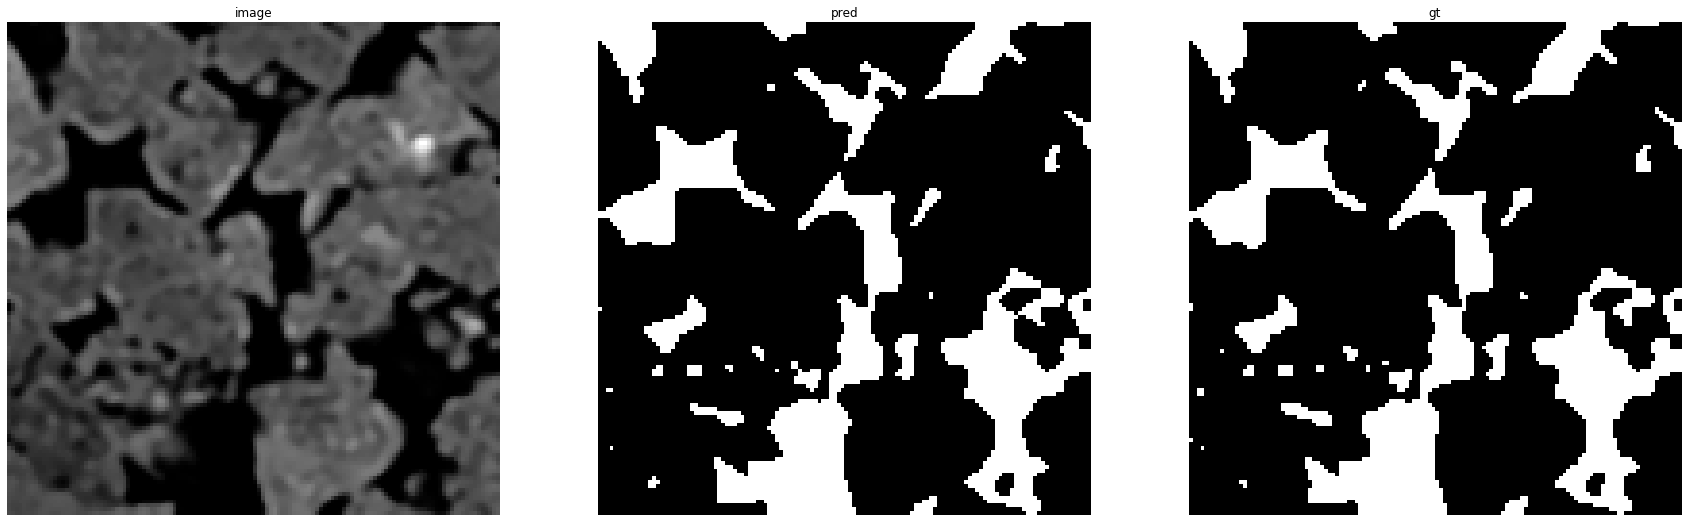

accuracy    : 0.9893798828125
precision   : 0.9855301236516706
recall      : 0.9692108667529107
f1          : 0.9773023741194886
pr_auc      : 0.9986815041729364
iou         : 0.9556122448979592


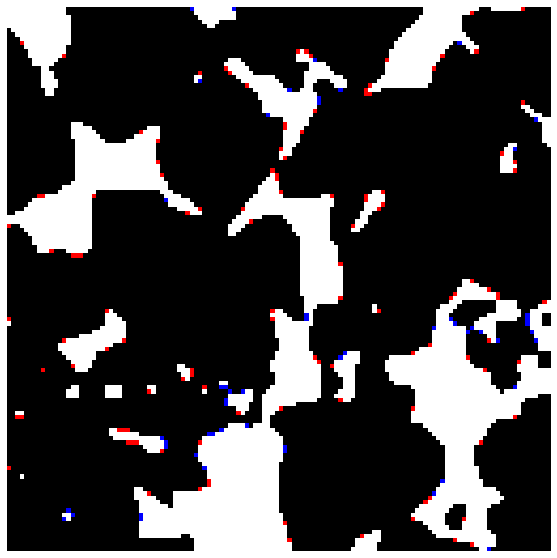

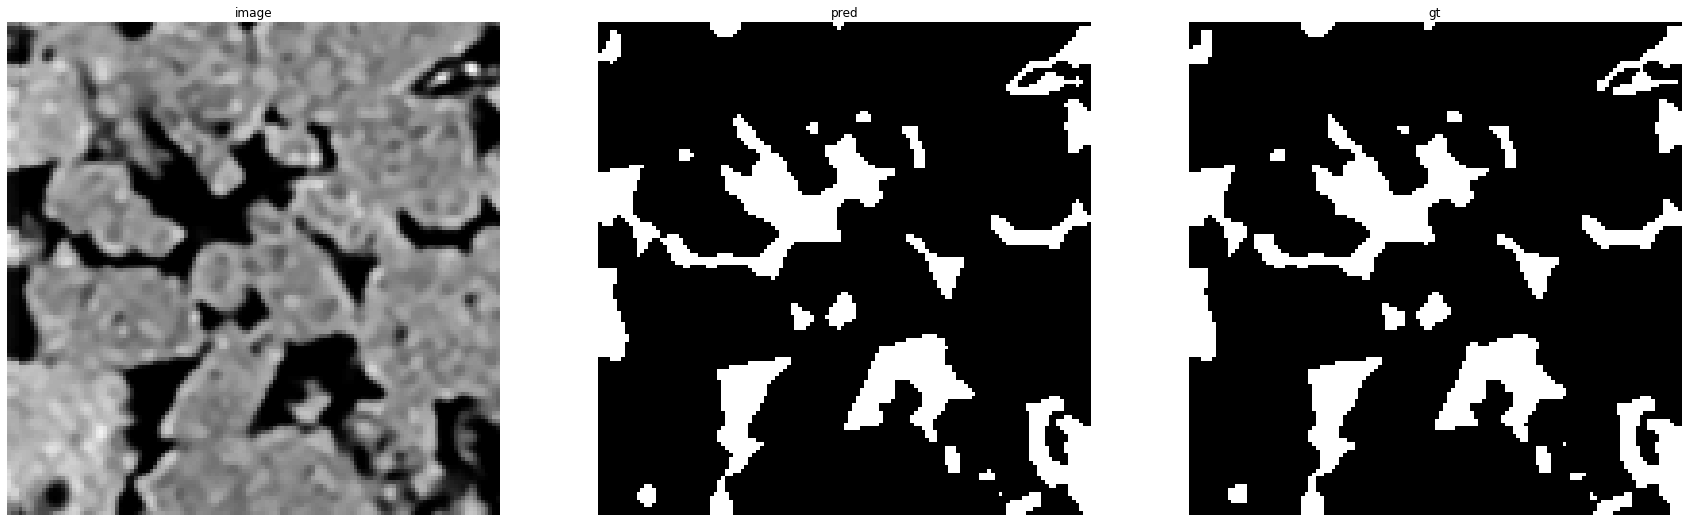

accuracy    : 0.990966796875
precision   : 0.9849069849069849
recall      : 0.9639299209893507
f1          : 0.9743055555555555
pr_auc      : 0.9981801104081123
iou         : 0.949898442789438


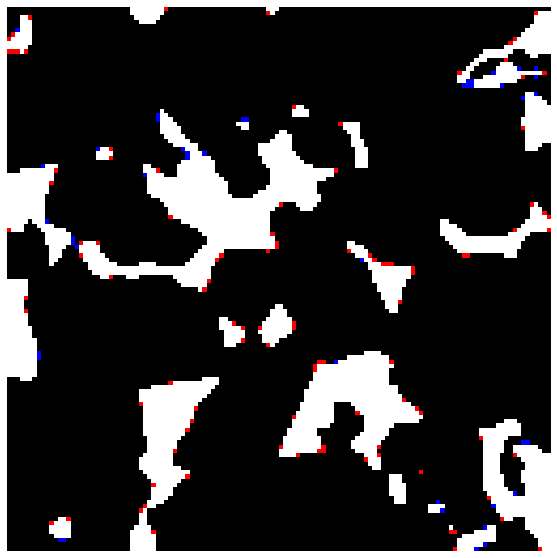

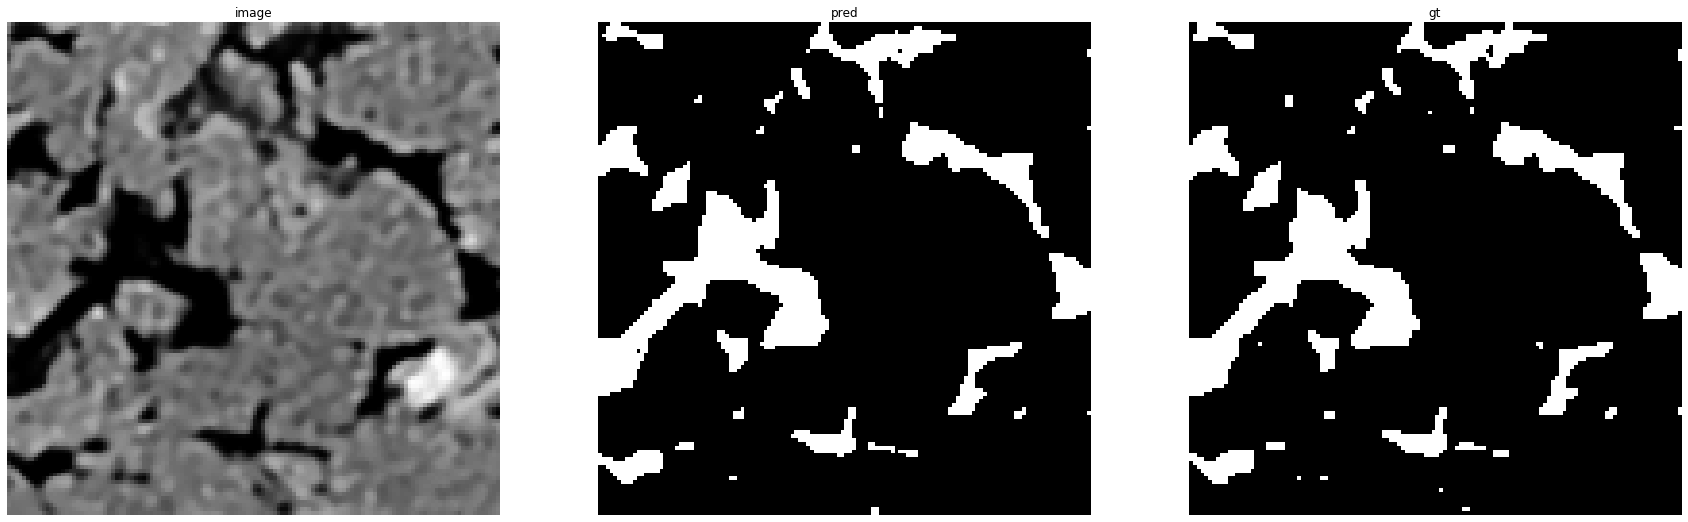

accuracy    : 0.99163818359375
precision   : 0.985501066098081
recall      : 0.9573322286661143
f1          : 0.9712124395881487
pr_auc      : 0.99783532915591
iou         : 0.9440359477124183


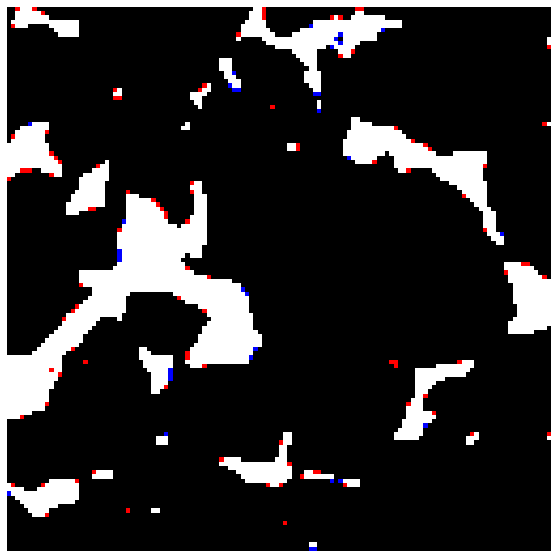

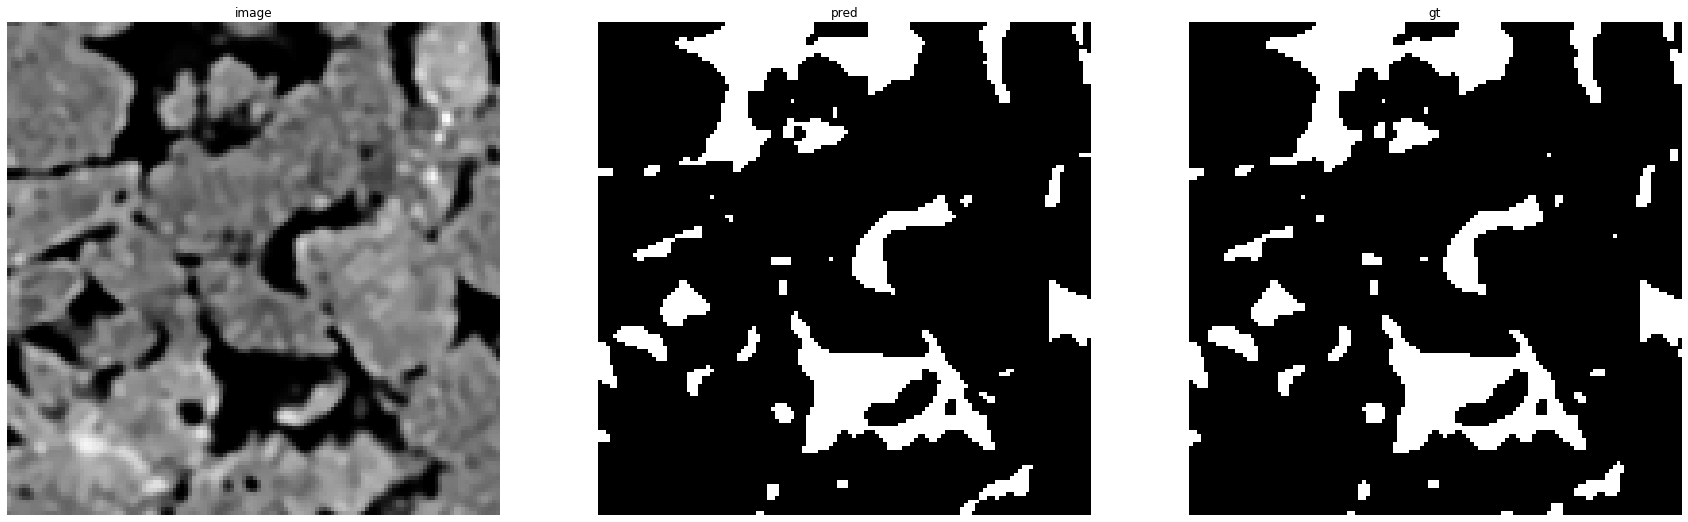

accuracy    : 0.99078369140625
precision   : 0.9843096234309623
recall      : 0.9638101741208603
f1          : 0.9739520441607729
pr_auc      : 0.9981265801289652
iou         : 0.949226630800269


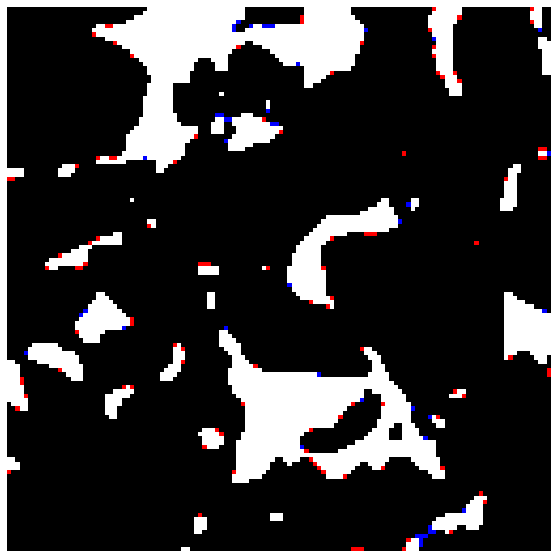

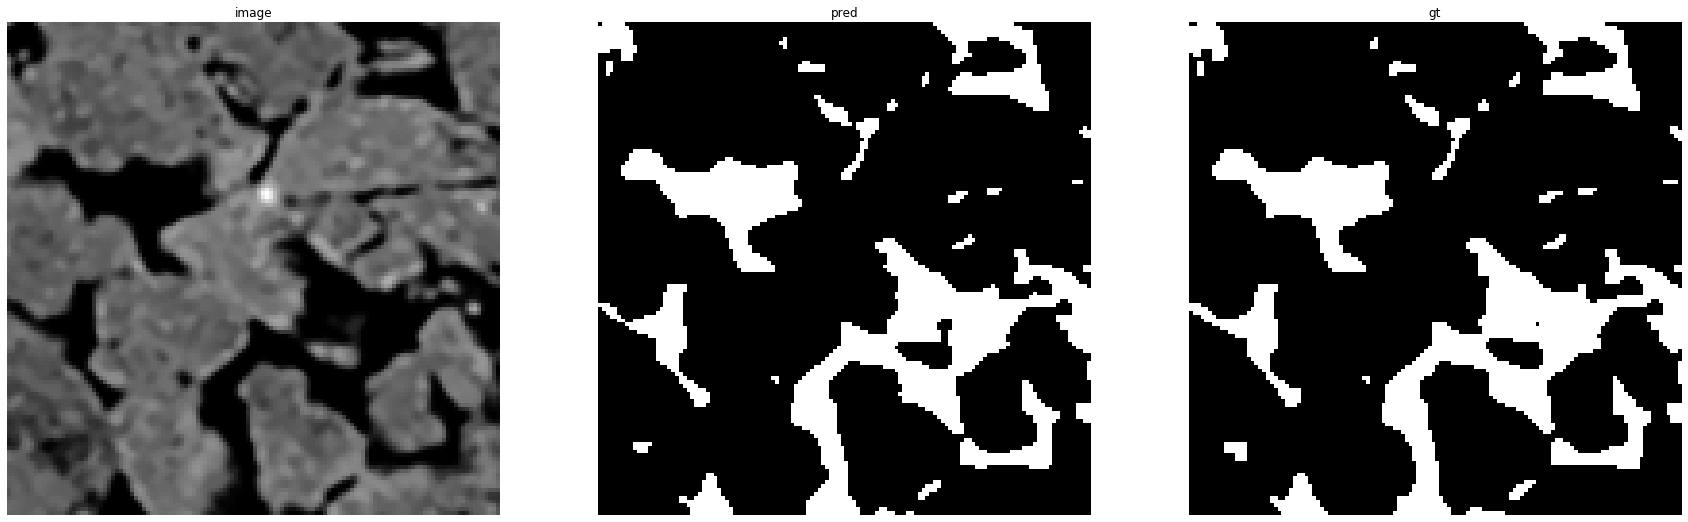

accuracy    : 0.98919677734375
precision   : 0.9862553451435553
recall      : 0.9607259744123773
f1          : 0.9733232856066316
pr_auc      : 0.9979843662433252
iou         : 0.948032883147387


Prediction for Urna_34:


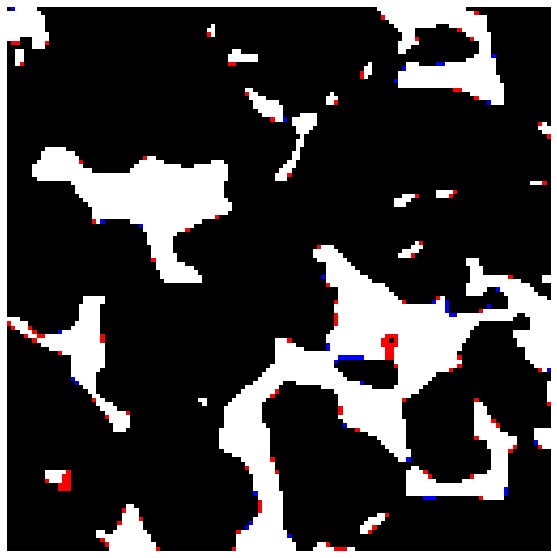

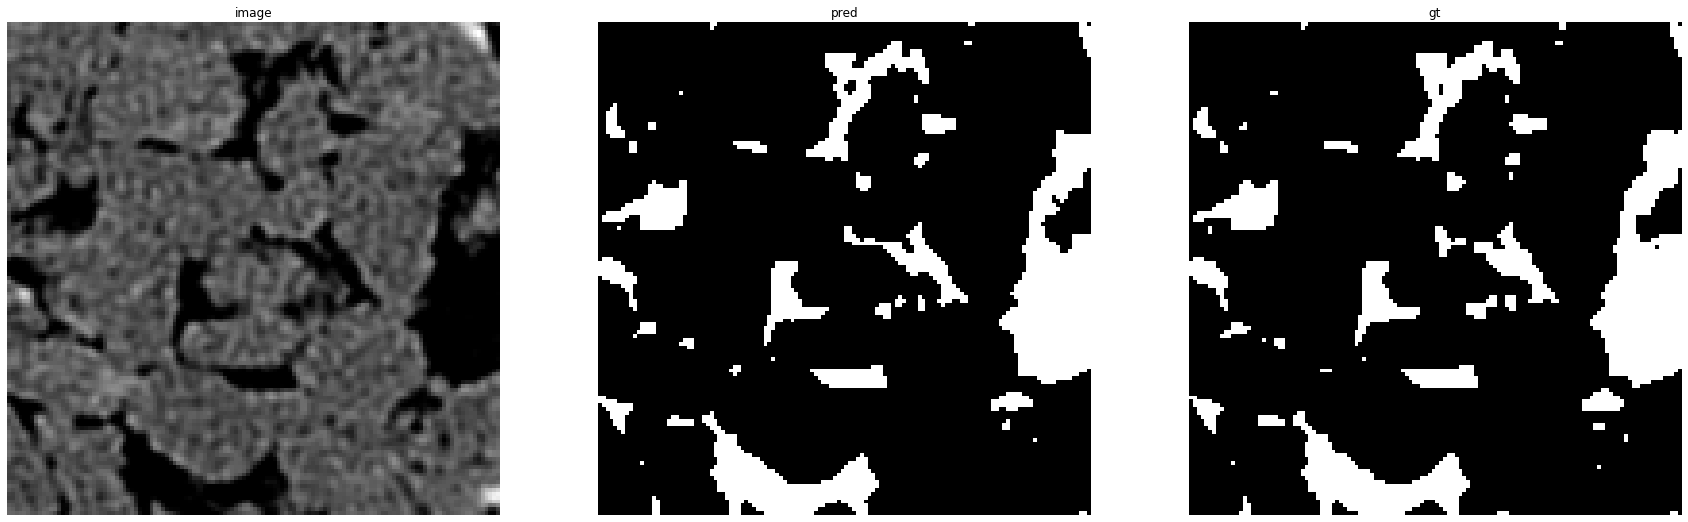

accuracy    : 0.987060546875
precision   : 0.9858670741023682
recall      : 0.9365021770682148
f1          : 0.9605508001488648
pr_auc      : 0.9964484246593949
iou         : 0.9240959541711421


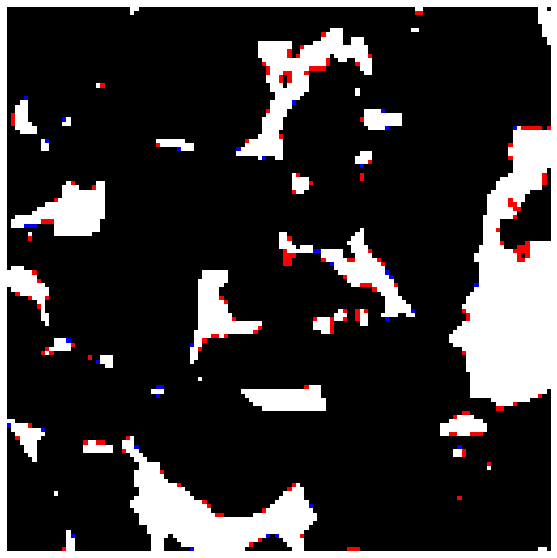

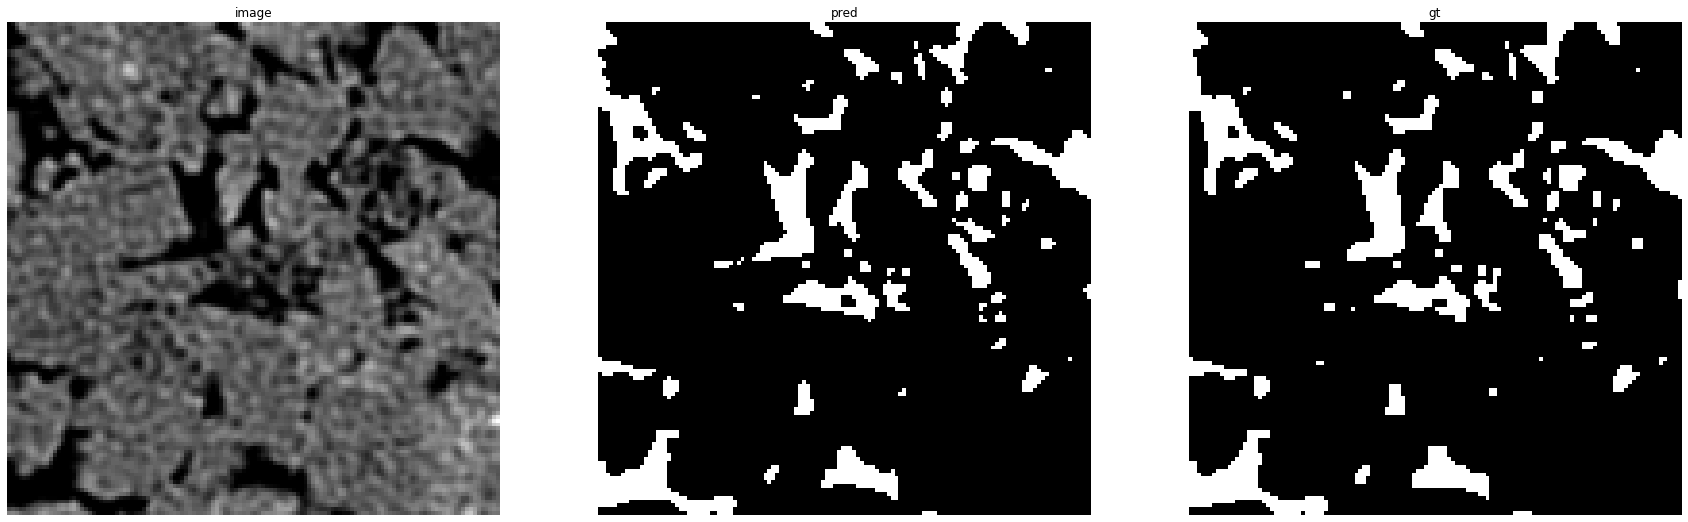

accuracy    : 0.9869384765625
precision   : 0.96938294865756
recall      : 0.932487539646579
f1          : 0.9505773672055428
pr_auc      : 0.9941636932746933
iou         : 0.9058098591549296


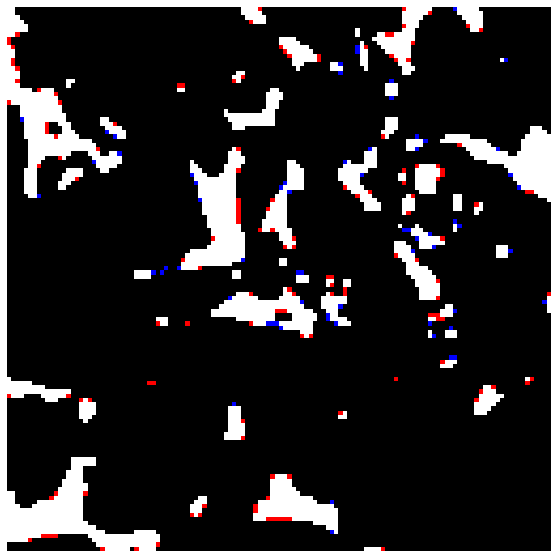

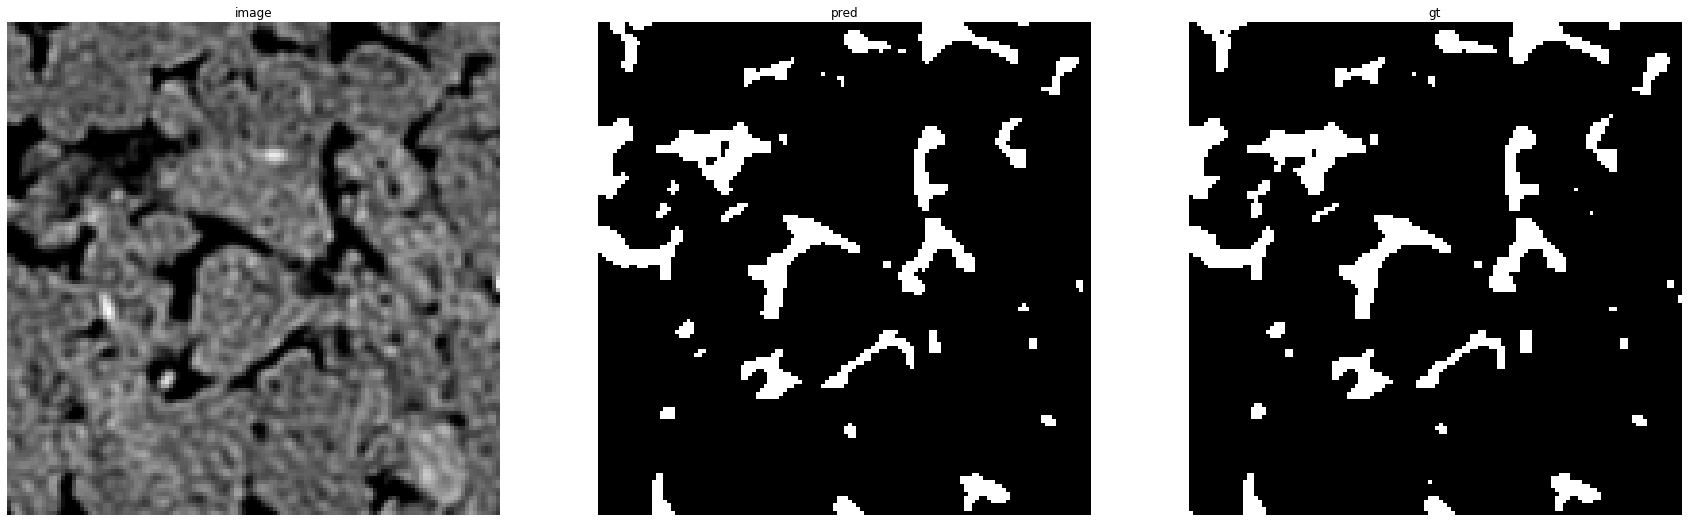

accuracy    : 0.98687744140625
precision   : 0.970756880733945
recall      : 0.9116855142703285
f1          : 0.9402943626770341
pr_auc      : 0.992266110640565
iou         : 0.8873165618448637


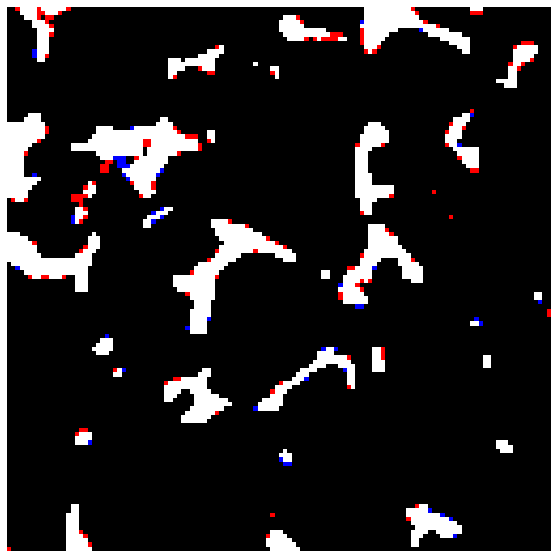

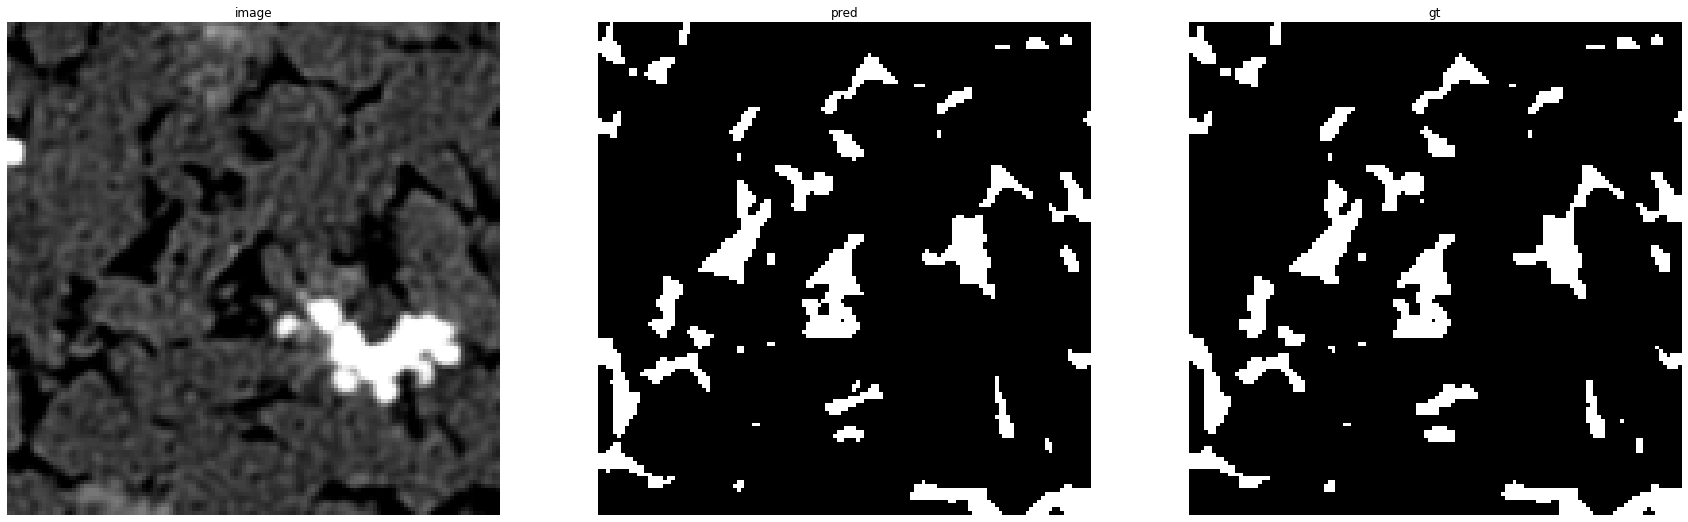

accuracy    : 0.98681640625
precision   : 0.9724919093851133
recall      : 0.9161585365853658
f1          : 0.9434850863422292
pr_auc      : 0.9928587680125454
iou         : 0.8930163447251115


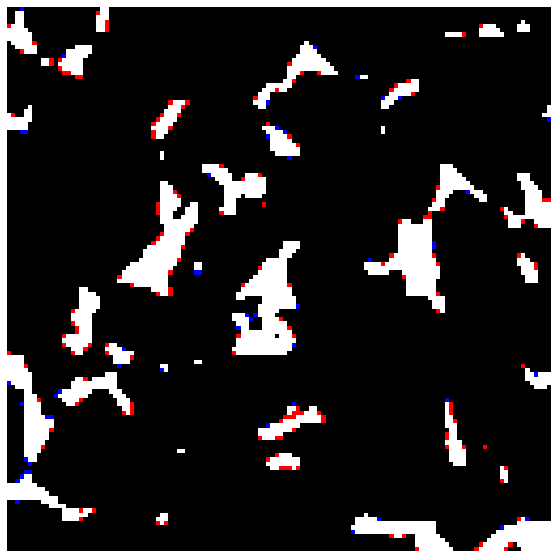

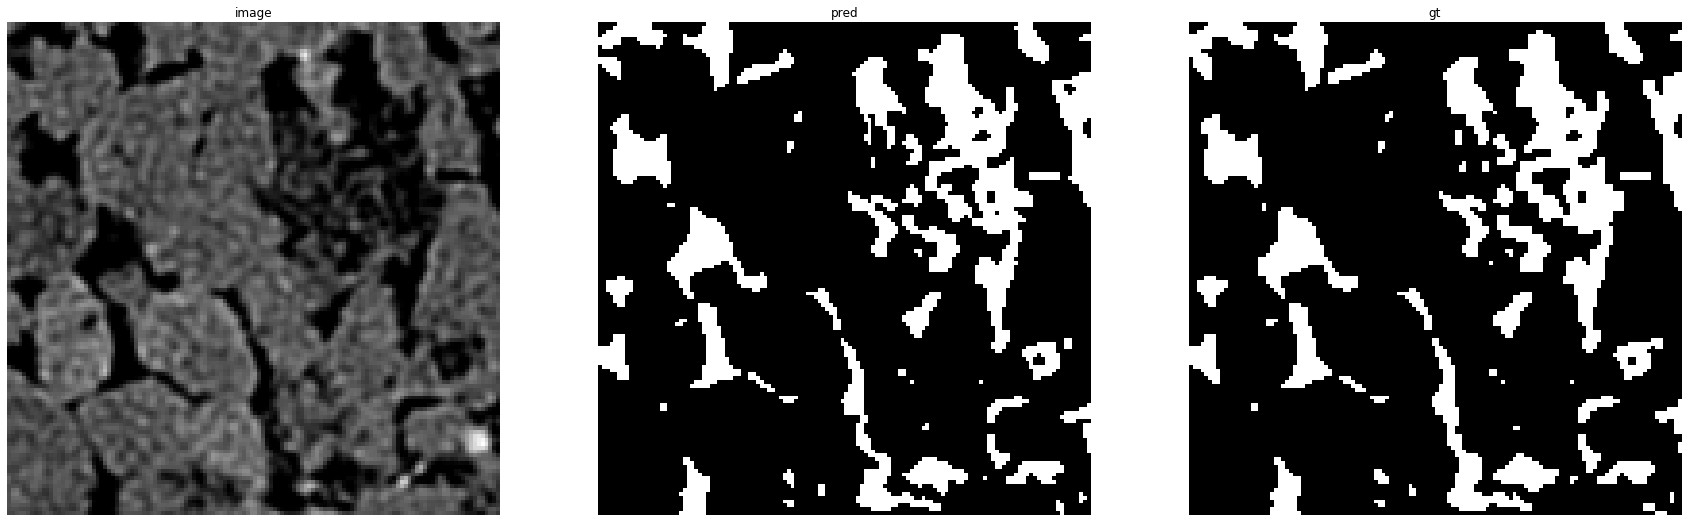

accuracy    : 0.97900390625
precision   : 0.977365608299277
recall      : 0.9195504288671991
f1          : 0.9475769582444377
pr_auc      : 0.9932327644059926
iou         : 0.9003764842166232


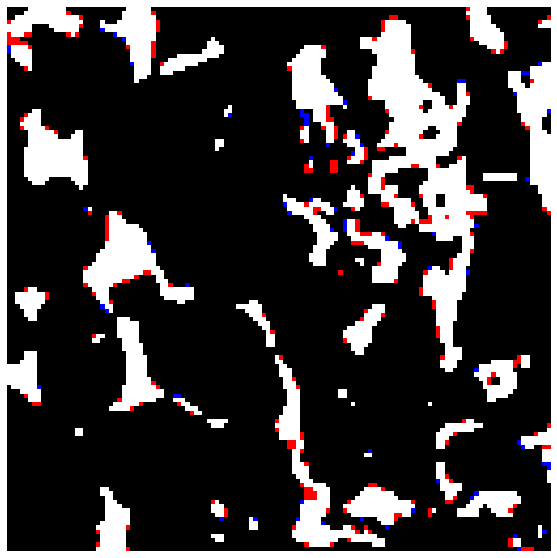

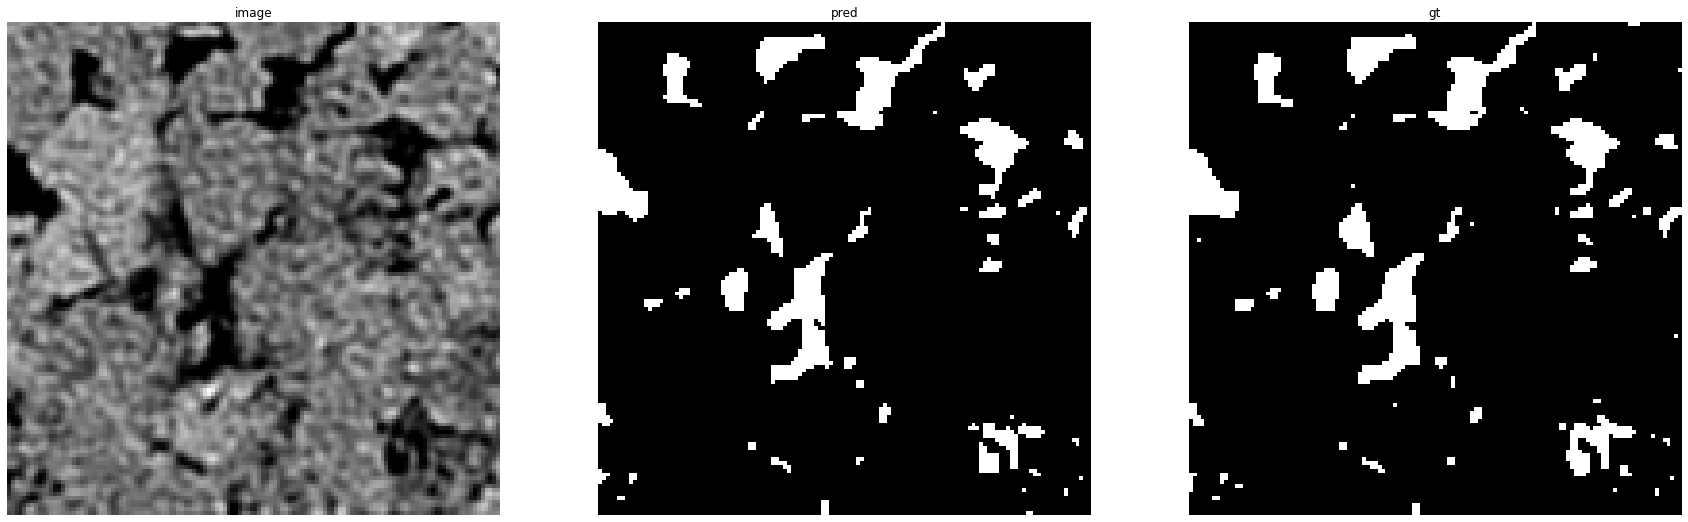

accuracy    : 0.98626708984375
precision   : 0.9654934437543133
recall      : 0.8888182973316391
f1          : 0.9255706252067483
pr_auc      : 0.9874656660698002
iou         : 0.8614532019704434


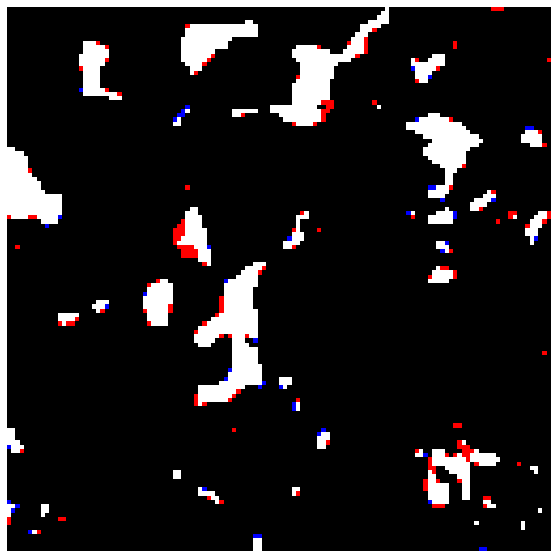

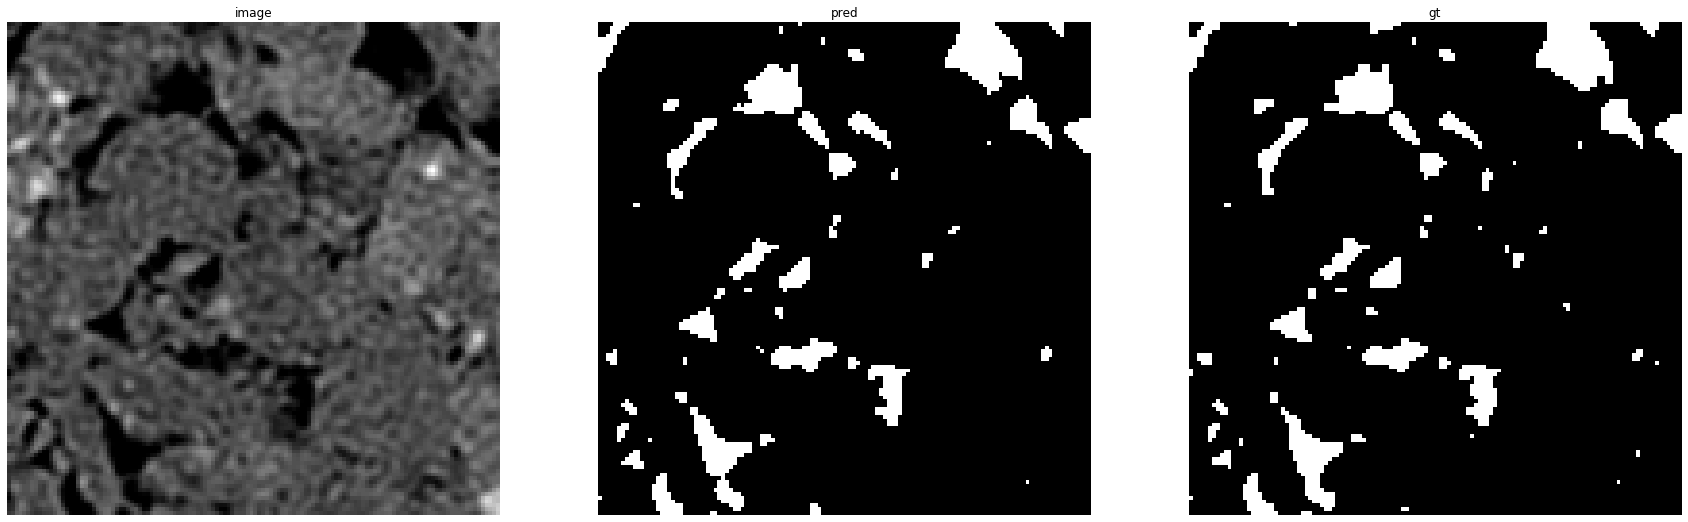

accuracy    : 0.9886474609375
precision   : 0.9648275862068966
recall      : 0.9119947848761408
f1          : 0.9376675603217158
pr_auc      : 0.9900163177624272
iou         : 0.8826498422712934


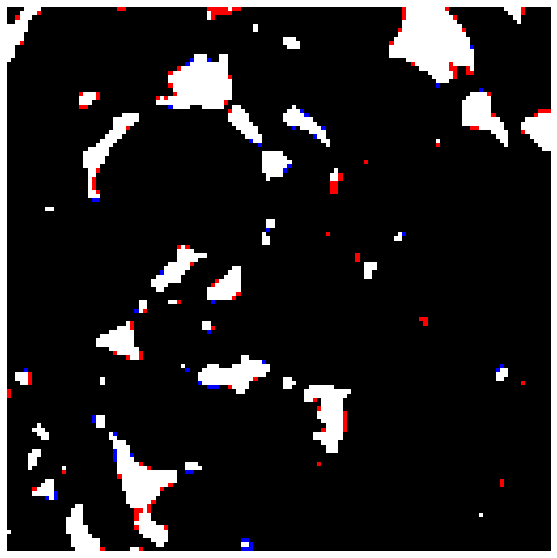

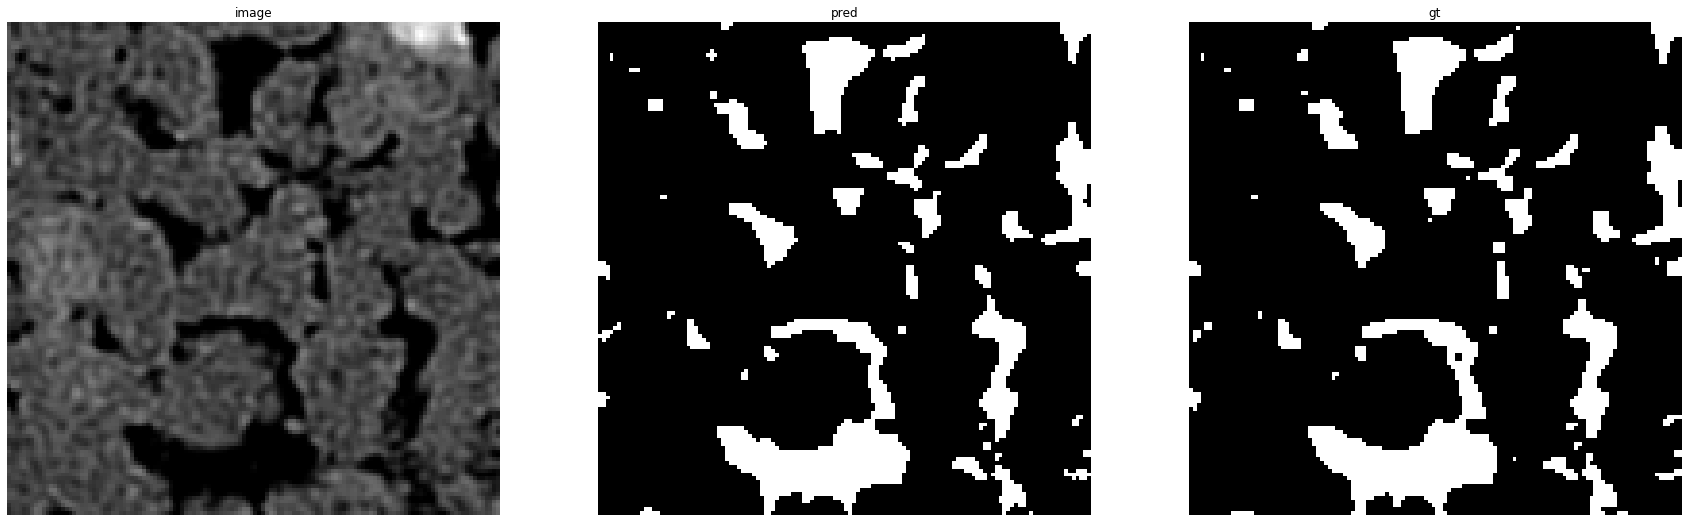

accuracy    : 0.98626708984375
precision   : 0.9759085340955492
recall      : 0.935054773082942
f1          : 0.955044955044955
pr_auc      : 0.9951041974578663
iou         : 0.9139579349904398


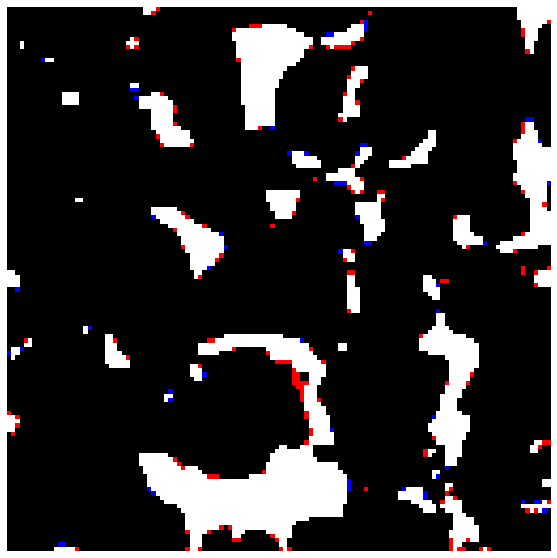

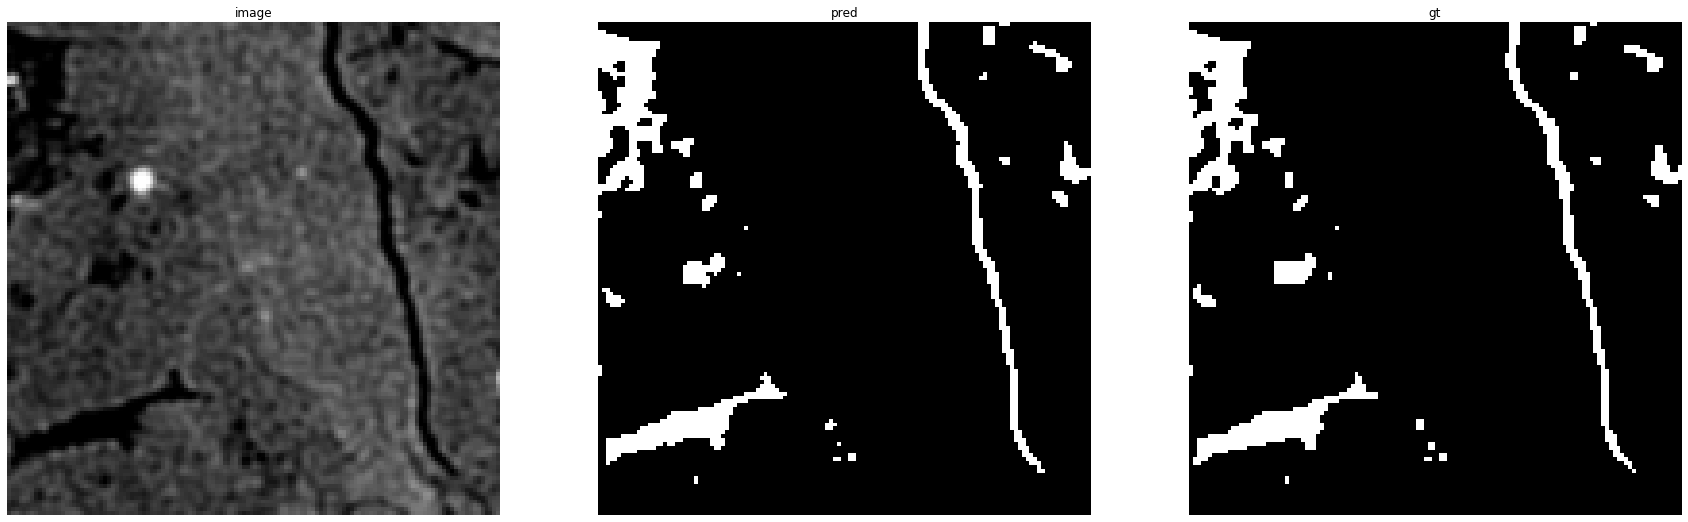

accuracy    : 0.9925537109375
precision   : 0.9656274980015987
recall      : 0.9386169386169386
f1          : 0.9519306540583137
pr_auc      : 0.9935383699212755
iou         : 0.9082706766917293


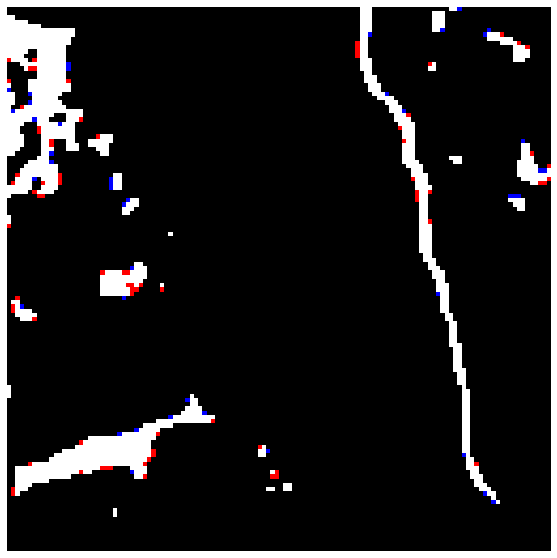

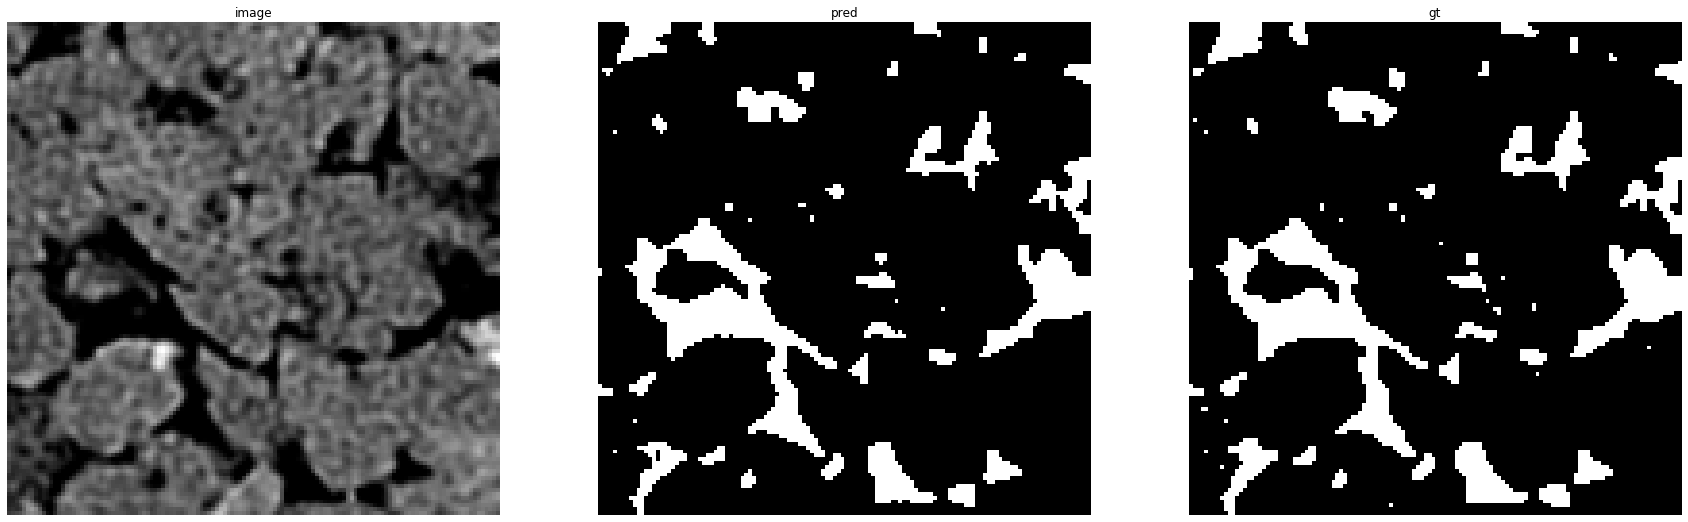

accuracy    : 0.98638916015625
precision   : 0.983578947368421
recall      : 0.926984126984127
f1          : 0.9544433094994893
pr_auc      : 0.9952537906752082
iou         : 0.9128565846033607




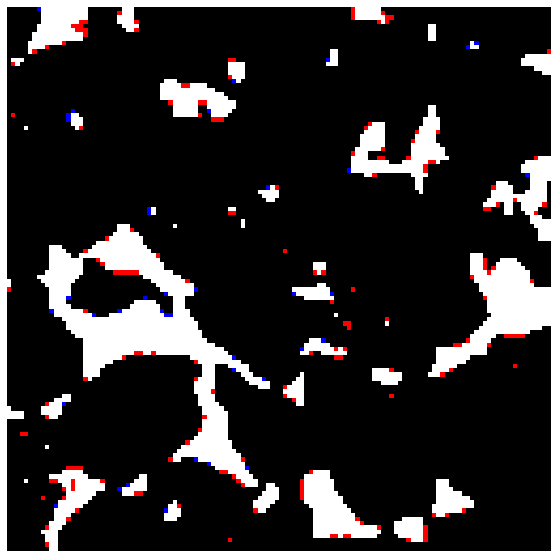

In [39]:
model.eval()

for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)

            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
            cnt -= 1
            
        if cnt ==0:
            break
    print('\n')

## Results

In [40]:
import pandas as pd

from visualization_utils import make_df

df = make_df(results, model_name=data_conf['conf_name'])
df

accuracy  precision    recall        f1    pr_auc       iou  \
0   0.995127   0.962915  0.980786  0.971769  0.997564  0.945088   
1   0.989731   0.938892  0.983092  0.960484  0.994586  0.923972   
2   0.975713   0.967865  0.814485  0.884575  0.976526  0.793039   
3   0.993988   0.996955  0.905854  0.949224  0.997145  0.903354   
4   0.991920   0.984733  0.870150  0.923902  0.990591  0.858567   
5   0.996114   0.961854  0.965953  0.963899  0.995860  0.930314   
6   0.990868   0.994407  0.925968  0.958968  0.997589  0.921170   
7   0.992961   0.995330  0.934995  0.964219  0.998239  0.930911   
8   0.989380   0.977205  0.940091  0.958288  0.995480  0.919917   
9   0.989026   0.980867  0.951592  0.966008  0.997053  0.934251   
10  0.987246   0.975738  0.929205  0.951903  0.994054  0.908221   

                 stack    model  
0            carb96558  SoilB-2  
1               carb71  SoilB-2  
2              carbRNF  SoilB-2  
3   SPE_carb10_58_box3  SoilB-2  
4             SoilAh-1  SoilB-2  
5              SoilB-2  SoilB-2  
6       TeTree_subset1  SoilB-2  
7       TiTree_subset2  SoilB-2  
8              Urna_22  SoilB-2  
9              Urna_30  SoilB-2  
10             Urna_34  SoilB-2

In [44]:
data_conf['conf_name'] = 'soilB-2'

In [45]:
df.to_html('{}.html'.format(data_conf['conf_name'].replace('-', '_')))
s = (
    'wkhtmltoimage -f png --width 0' 
    ' {exp_name}_exp/{exp_name}.html' 
    ' {exp_name}_exp/{exp_name}.png'.format(exp_name=data_conf['conf_name'].replace('-', '_'))
)
print(s)

wkhtmltoimage -f png --width 0 soilB_2_exp/soilB_2.html soilB_2_exp/soilB_2.png


## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 610.97it/s]
100%|██████████| 700/700 [00:07<00:00, 94.82it/s] 


In [33]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        patch_sizes=ps, 
        bs=32, num_workers=8, device='cuda:0',
        threshold=None)
    predicted_stack.dump('./{}_{}'.format(stack_name, d), features=False, targets=False, preds=True)

25200it [00:00, 218111.63it/s]
25200it [02:12, 190.64it/s]
100%|██████████| 700/700 [00:04<00:00, 164.21it/s]
25200it [00:00, 106624.09it/s]
25200it [02:23, 175.71it/s]
100%|██████████| 700/700 [00:04<00:00, 157.47it/s]
25200it [00:00, 219525.92it/s]
2808it [00:15, 173.99it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
predicted_stack_1 = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 244967.71it/s]
25200it [02:03, 204.21it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3206.54it/s]


In [32]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack_1.preds, 
                                    mode='stack')))

accuracy    : 0.983499
precision   : 0.960773
recall      : 0.891501
f1          : 0.924841
pr_auc      : 0.985720
iou         : 0.860191
